#### CAPSTONE PROJECT E-COMMERCE

### MARKET MIX MODEL

## Suchith K C & Shivaprasad Ashok

# Problem Statement

ElecKart is an e-commerce firm based out of Ontario, Canada specialising in electronic products. Over the last one year, they had spent a significant amount of money on marketing. Occasionally, they had also offered big-ticket promotions (similar to the Big Billion Day). They are about to create a marketing budget for the next year, which includes spending on commercials, online campaigns, and pricing & promotion strategies. The CFO feels that the money spent over the last 12 months on marketing was not sufficiently impactful, and, that they can either cut on the budget or reallocate it optimally across marketing levers to improve the revenue response.

 

Imagine that you are a part of the marketing team working on budget optimisation. You need to develop a market mix model to observe the actual impact of different marketing variables over the last year. Using your understanding of the model, you have to recommend the optimal budget allocation for different marketing levers for the next year.

In [1]:
# Importing Libraries 
import warnings
warnings.filterwarnings('ignore') # Suppressing Warnings

#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import re
import holidays

# Set ipython's max row display
pd.set_option('display.max_row', 500)

# Set iPython's max column width to 100
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', '{:0.3f}'.format)

# import for pre-processing (Standard Scaling)
from sklearn.preprocessing import StandardScaler 

# test train split and Hyperparameter Optimization
from sklearn.model_selection import train_test_split, GridSearchCV

# import for looking into seasonality in data
from statsmodels.tsa.seasonal import seasonal_decompose

# import for Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller

# import for best feature selection
from sklearn.feature_selection import RFE

# import for building model
from sklearn import linear_model
import statsmodels.api as sm

# import for model metrics and vif calculation
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

import pandas_profiling as pf


In [2]:
#Data Preparation & Loading

In [3]:
# Importing the 'ConsumerElectronics.csv' and loading the dataset
cons_data = pd.read_csv('ConsumerElectronics.csv')

In [4]:
# Importing the Ontario Climate data of year 2015-2016 and loading the datasets
ontarioclimate2015 = pd.DataFrame(pd.read_csv('ONTARIO-2015.csv',encoding="ISO-8859-1",skiprows=24))
ontarioclimate2016 = pd.DataFrame(pd.read_csv('ONTARIO-2016.csv',encoding="ISO-8859-1",skiprows=24))

In [5]:
# Importing the Media data and even the other information and loading the monthly NPS Score datasets
nps = pd.read_excel('Media data and other information.xlsx', sheet_name='Monthly NPS Score', 
                              skiprows=1)

nps.columns.values[0]='score'

nps

score  July'15   Aug'15  Sept'15   Oct'15   Nov'15   Dec'15   Jan'16  \
0          NPS   54.600   59.987   46.925   44.398   47.000   45.800   47.093   
1  Stock Index 1177.000 1206.000 1101.000 1210.000 1233.000 1038.000 1052.000   

    Feb'16   Mar'16   Apr'16   May'16  June'16  
0   50.327   49.021   51.828   47.307   50.517  
1 1222.000 1015.000 1242.000 1228.000 1194.000

In [6]:
# Importing the Media data and even the other information and loading the Media Investmente datasets
media_inv = pd.read_excel('Media data and other information.xlsx', sheet_name='Media Investment', skipfooter = 4, skiprows=2)

media_inv.drop(media_inv.columns[0], axis=1, inplace = True)

media_inv.head()

Year  Month  Total Investment    TV  Digital  Sponsorship  \
0  2015      7            17.062 0.215    2.533        7.414   
1  2015      8             5.064 0.006    1.278        1.063   
2  2015      9            96.254 3.880    1.357       62.788   
3  2015     10           170.156 6.145   12.622       84.673   
4  2015     11            51.216 4.221    1.275       14.172   

   Content Marketing  Online marketing   Affiliates    SEM  Radio  Other  
0              0.001             1.327        0.547  5.024    nan    nan  
1              0.000             0.129        0.074  2.514    nan    nan  
2              0.610            16.380        5.038  6.202    nan    nan  
3              3.444            24.372        6.974 31.927    nan    nan  
4              0.169            19.562        6.596  5.222    nan    nan

In [7]:
# Observing the first 5 rows
cons_data.head()

fsn_id           order_date  Year  Month             order_id  \
0  ACCCX3S58G7B5F6P  2015-10-17 15:11:54  2015     10 3419300926147000.000   
1  ACCCX3S58G7B5F6P  2015-10-19 10:07:22  2015     10 1420830839915200.000   
2  ACCCX3S5AHMF55FV  2015-10-20 15:45:56  2015     10 2421912925714800.000   
3  ACCCX3S5AHMF55FV  2015-10-14 12:05:15  2015     10 4416592101738400.000   
4  ACCCX3S5AHMF55FV  2015-10-17 21:25:03  2015     10 4419525153426400.000   

         order_item_id   gmv  units deliverybdays deliverycdays  \
0 3419300926147000.000  6400      1            \N            \N   
1 1420830839915200.000  6900      1            \N            \N   
2 2421912925714800.000  1990      1            \N            \N   
3 4416592101738400.000  1690      1            \N            \N   
4 4419525153426400.000  1618      1            \N            \N   

  s1_fact.order_payment_type  sla                 cust_id  \
0                        COD    5  -1.01299130778588E+018   
1                        COD    7  -8.99032457905512E+018   
2                        COD   10   -1.0404429420466E+018   
3                    Prepaid    4  -7.60496084352714E+018   
4                    Prepaid    6    2.8945572083453E+018   

                  pincode product_analytic_super_category  \
0  -7.79175582905735E+018                              CE   
1   7.33541149097431E+018                              CE   
2  -7.47768776228657E+018                              CE   
3  -5.83593163877661E+018                              CE   
4   5.34735360997242E+017                              CE   

  product_analytic_category product_analytic_sub_category  \
0           CameraAccessory               CameraAccessory   
1           CameraAccessory               CameraAccessory   
2           CameraAccessory               CameraAccessory   
3           CameraAccessory               CameraAccessory   
4           CameraAccessory               CameraAccessory   

  product_analytic_vertical  product_mrp  product_procurement_sla  
0              CameraTripod         7190                        0  
1              CameraTripod         7190                        0  
2              CameraTripod         2099                        3  
3              CameraTripod         2099                        3  
4              CameraTripod         2099                        3

In [8]:
#Data Profiling
pf.ProfileReport(cons_data)

In [9]:
#Data Profiling
#pf.ProfileReport(media_inv)

In [10]:
#Data Profiling
#pf.ProfileReport(nps)

In [11]:
#Data Profiling
#pf.ProfileReport(ontarioclimate2015)

In [12]:
#Data Profiling
#pf.ProfileReport(ontarioclimate2016)

In [13]:
# Observing the last 5 rows
cons_data.tail()

fsn_id           order_date  Year  Month  \
1648819  VPLEYAP3ZYYUVESU  2015-09-27 19:20:31  2015      9   
1648820  VPLEYAP3ZYYUVESU  2015-09-28 01:32:58  2015      9   
1648821  VPLEYAP3ZYYUVESU  2015-09-29 07:07:57  2015      9   
1648822  VPLEYAP3ZYYUVESU  2015-09-29 18:15:45  2015      9   
1648823  VPLEYAP3ZYYUVESU  2015-09-29 21:31:37  2015      9   

                    order_id        order_item_id   gmv  units deliverybdays  \
1648819 4402170060025800.000 4402170060025800.000  2200      1            \N   
1648820 1402393217090200.000 1402393217090200.000  2098      1            \N   
1648821 4403459511294400.000 4403459511294400.000  2098      1            \N   
1648822 4403860318235600.000 4403860318235600.000  2200      1            \N   
1648823 4403971467524500.000 4403971467524500.000  2295      1            \N   

        deliverycdays s1_fact.order_payment_type  sla                 cust_id  \
1648819            \N                        COD    7  -9.90634340213633E+017   
1648820            \N                        COD   10   3.04892345453077E+018   
1648821            \N                        COD    5  -4.53140379455183E+018   
1648822            \N                        COD    3  -8.94046418180233E+018   
1648823            \N                        COD    5    6.0094454082098E+018   

                        pincode product_analytic_super_category  \
1648819   7.89475898877674E+018                              CE   
1648820  -1.45758574108572E+018                              CE   
1648821   5.74649014721365E+018                              CE   
1648822   2.57294814079718E+018                              CE   
1648823   4.38373500390134E+017                              CE   

        product_analytic_category product_analytic_sub_category  \
1648819        EntertainmentSmall                  TVVideoSmall   
1648820        EntertainmentSmall                  TVVideoSmall   
1648821        EntertainmentSmall                  TVVideoSmall   
1648822        EntertainmentSmall                  TVVideoSmall   
1648823        EntertainmentSmall                  TVVideoSmall   

        product_analytic_vertical  product_mrp  product_procurement_sla  
1648819               VideoPlayer         2499                        2  
1648820               VideoPlayer         2499                        2  
1648821               VideoPlayer         2499                        2  
1648822               VideoPlayer         2499                        2  
1648823               VideoPlayer         2499                        2

In [14]:
#sampling

cons_data.sample(5)

fsn_id           order_date  Year  Month  \
1236624  ACCDNGP4TWKS26KG  2016-06-24 12:01:32  2016      6   
326362   GMCEBPZ54GGBYN3K  2015-11-23 00:03:44  2015     11   
513495   ACCDVUZFPGSGGYRD  2016-01-31 17:39:07  2016      1   
363109   ACCDX9WVGUCUWFJS  2015-12-30 21:14:34  2015     12   
1473434  ACCE39SFWGSW4WSB  2015-09-23 22:23:12  2015      9   

                    order_id        order_item_id      gmv  units  \
1236624 1636051354942000.000 1636051354942000.000 3400.000      1   
326362  4450722110904800.000 4450722110904800.000      280      1   
513495  4510967754554700.000 4510967754554700.000  438.000      2   
363109  4483436889951500.000 4483436889951500.000  329.000      1   
1473434 3398823399558500.000 3398823399558500.000      999      1   

        deliverybdays deliverycdays s1_fact.order_payment_type  sla  \
1236624            \N            \N                        COD    6   
326362             \N            \N                        COD    7   
513495             \N            \N                        COD    9   
363109             \N            \N                    Prepaid    9   
1473434            \N            \N                        COD    8   

                         cust_id                  pincode  \
1236624 -2293356353154579968.000  2625060283316270080.000   
326362     4.71106317758488E+016   -8.13320379369054E+017   
513495  -1331947575202720000.000  6007082292340009984.000   
363109   2861469945354800128.000 -3844478150613459968.000   
1473434    7.07876007237779E+018   -1.43642569344042E+018   

        product_analytic_super_category product_analytic_category  \
1236624                              CE           CameraAccessory   
326362                               CE            GamingHardware   
513495                               CE        EntertainmentSmall   
363109                               CE        EntertainmentSmall   
1473434                              CE        EntertainmentSmall   

        product_analytic_sub_category product_analytic_vertical  product_mrp  \
1236624               CameraAccessory              CameraTripod         4039   
326362                  GamingConsole     HandheldGamingConsole          489   
513495                        Speaker             LaptopSpeaker          750   
363109                        Speaker             LaptopSpeaker          599   
1473434                       Speaker             LaptopSpeaker         1500   

         product_procurement_sla  
1236624                       -1  
326362                         2  
513495                         1  
363109                         1  
1473434                        3

In [1]:
# Data Inspection

In [15]:
#Data length
print(len(cons_data))

1648824


In [16]:
#Data Dimensions
cons_data.shape

(1648824, 20)

In [17]:
#Data Statistics
cons_data.describe()

Year       Month             order_id          order_item_id  \
count 1648824.000 1648824.000          1648824.000            1648824.000   
mean     2015.519       6.586 2842444674146328.500  13756277530325384.000   
std         0.500       3.623 1269134332596894.250  55945981798631008.000   
min      2015.000       1.000         76331515.000          108016495.000   
25%      2015.000       3.000 1602588503969575.000   1606725138262300.000   
50%      2016.000       6.000 2611824528743350.000   2619185472741150.000   
75%      2016.000      10.000 3610613539366250.000   4397705931628400.000   
max      2016.000      12.000 5395076790260600.000 300037347717704000.000   

            units         sla  product_mrp  product_procurement_sla  
count 1648824.000 1648824.000  1648824.000              1648824.000  
mean        1.022       5.688     4108.309                    5.403  
std         0.254       2.983     8510.918                   53.466  
min         1.000       0.000        0.000                   -1.000  
25%         1.000       4.000      799.000                    1.000  
50%         1.000       6.000     1599.000                    2.000  
75%         1.000       7.000     3499.000                    3.000  
max        50.000    1006.000   299999.000                 1000.000

- All the numeric columns are almost normally distributed!
- We need to cap the SLAs to max and min values.

In [18]:
#Data Summary
cons_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1648824 entries, 0 to 1648823
Data columns (total 20 columns):
fsn_id                             1648824 non-null object
order_date                         1648824 non-null object
Year                               1648824 non-null int64
Month                              1648824 non-null int64
order_id                           1648824 non-null float64
order_item_id                      1648824 non-null float64
gmv                                1648824 non-null object
units                              1648824 non-null int64
deliverybdays                      1648824 non-null object
deliverycdays                      1648824 non-null object
s1_fact.order_payment_type         1648824 non-null object
sla                                1648824 non-null int64
cust_id                            1648824 non-null object
pincode                            1648824 non-null object
product_analytic_super_category    1648824 non-null object
prod

In [19]:
#List of Columns
cons_data.columns

Index(['fsn_id', 'order_date', 'Year', 'Month', 'order_id', 'order_item_id',
       'gmv', 'units', 'deliverybdays', 'deliverycdays',
       's1_fact.order_payment_type', 'sla', 'cust_id', 'pincode',
       'product_analytic_super_category', 'product_analytic_category',
       'product_analytic_sub_category', 'product_analytic_vertical',
       'product_mrp', 'product_procurement_sla'],
      dtype='object')

In [20]:
#Data types of Columns
cons_data.dtypes

fsn_id                              object
order_date                          object
Year                                 int64
Month                                int64
order_id                           float64
order_item_id                      float64
gmv                                 object
units                                int64
deliverybdays                       object
deliverycdays                       object
s1_fact.order_payment_type          object
sla                                  int64
cust_id                             object
pincode                             object
product_analytic_super_category     object
product_analytic_category           object
product_analytic_sub_category       object
product_analytic_vertical           object
product_mrp                          int64
product_procurement_sla              int64
dtype: object

In [21]:
#Data Cleaning

In [22]:
# Unique values in each Column

unique_values = pd.DataFrame(cons_data.apply(lambda x: len(x.value_counts(dropna=False)), axis=0), columns=['Unique Value Count']).sort_values(by='Unique Value Count', ascending=True)

unique_values['dtype'] = pd.DataFrame(cons_data.dtypes)

unique_values

Unique Value Count    dtype
product_analytic_super_category                   1   object
Year                                              2    int64
s1_fact.order_payment_type                        2   object
product_analytic_category                         5   object
Month                                            12    int64
product_analytic_sub_category                    14   object
product_procurement_sla                          17    int64
units                                            27    int64
sla                                              60    int64
product_analytic_vertical                        74   object
deliverybdays                                   143   object
deliverycdays                                   171   object
product_mrp                                    1929    int64
pincode                                       12973   object
gmv                                           18086   object
fsn_id                                        21219   object
order_date                                  1155192   object
cust_id                                     1253495   object
order_item_id                               1480765  float64
order_id                                    1501177  float64

In [23]:
# No. of null values in each columns
# null value percentage
round(100*(cons_data.isnull().sum()/len(cons_data.index)), 2)

fsn_id                            0.000
order_date                        0.000
Year                              0.000
Month                             0.000
order_id                          0.000
order_item_id                     0.000
gmv                               0.000
units                             0.000
deliverybdays                     0.000
deliverycdays                     0.000
s1_fact.order_payment_type        0.000
sla                               0.000
cust_id                           0.000
pincode                           0.000
product_analytic_super_category   0.000
product_analytic_category         0.000
product_analytic_sub_category     0.000
product_analytic_vertical         0.000
product_mrp                       0.000
product_procurement_sla           0.000
dtype: float64

In [24]:
#removing null values in GMV column
cons_data = cons_data.loc[~(cons_data.gmv.isnull())]

In [25]:
# Dropping duplicate values in the dataset
cons_data.drop_duplicates(inplace=True)

In [27]:
#Unique values in Year Column
cons_data['Year'].unique() 

array([2015, 2016], dtype=int64)

In [28]:
#Unique values in Month Column
cons_data['Month'].unique()

array([10, 11,  4,  3,  9,  2,  1, 12,  8,  5,  6,  7], dtype=int64)

In [29]:
#Unique values in Month Column
cons_data['gmv'].unique()

array(['6400', '6900', '1990', ..., '2686', '12330', '3225'], dtype=object)

In [31]:
#Converting the gmv datatype to numeric
cons_data['gmv'] = pd.to_numeric(cons_data['gmv'],errors='coerce')

In [32]:
# Unique values in the product_analytic_super_category 
cons_data.product_analytic_super_category.unique()

array(['CE'], dtype=object)

In [33]:
#Removing the column as it has only 1 type of value
cons_data.drop('product_analytic_super_category',1, inplace = True)

In [34]:
#unique values in units
cons_data['units'].unique()

array([ 1,  2, 10,  4,  3,  6, 50, 30,  7,  8,  5, 12, 34, 22, 17,  9, 13,
       11, 15, 21, 29, 16, 39, 20, 18, 14, 19], dtype=int64)

In [35]:
#unique values in deliverybdays
cons_data['deliverybdays'].unique()

array(['\\N', '5', '4', '12', '6', '7', '8', '3', '9', '10', '2', '16',
       '14', '13', '20', '11', '1', '18', '32', '15', '238', '153', '74',
       '128', '148', '145', '147', '135', '124', '94', '111', '101',
       '105', '104', '98', '86', '106', '103', '99', '91', '96', '93',
       '100', '102', '95', '97', '92', '88', '87', '114', '120', '115',
       '132', '70', '83', '72', '0', '73', '76', '67', '75', '68', '65',
       '84', '63', '82', '81', '79', '64', '69', '61', '59', '60', '78',
       '66', '62', '71', '77', '80', '85', '90', '22', '23', '36', '19',
       '17', '35', '26', '29', '25', '45', '40', '47', '56', '55', '42',
       '49', '57', '37', '38', '58', '34', '50', '44', '39', '54', '51',
       '52', '48', '43', '46', '53', '33', '41', '21', '27', '31', '24',
       '-71', '-72', '-53', '-40', '-39', '-41', '28', '30', '-14', '-45',
       '-56', '-73', '-75', '-12', '-22', '-44', '-42', '-43', '-74',
       '-13', '-98', '-46', '-76', '-10', '-77'], dtype=obj

In [36]:
#unique values in deliverycdays
cons_data['deliverycdays'].unique()

array(['\\N', '6', '5', '14', '7', '9', '4', '11', '12', '3', '8', '19',
       '17', '16', '23', '13', '2', '20', '10', '15', '37', '1', '18',
       '278', '178', '87', '149', '172', '169', '157', '145', '109',
       '130', '118', '123', '122', '114', '101', '120', '115', '106',
       '112', '108', '110', '117', '124', '119', '111', '113', '107',
       '100', '116', '121', '103', '102', '133', '140', '134', '154',
       '82', '97', '84', '83', '85', '89', '86', '79', '88', '76', '98',
       '74', '96', '95', '92', '75', '81', '73', '71', '69', '70', '91',
       '77', '94', '72', '80', '78', '90', '99', '21', '26', '27', '42',
       '22', '41', '31', '30', '34', '29', '24', '53', '47', '55', '65',
       '49', '57', '66', '43', '45', '68', '40', '67', '38', '59', '52',
       '51', '46', '63', '44', '60', '61', '56', '50', '64', '54', '62',
       '58', '39', '48', '32', '36', '28', '0', '-832', '-840', '-628',
       '-836', '-834', '-476', '-466', '-848', '-844', '-482', '25'

In [37]:
# Dropping the \\N from deliverybdays column
cons_data['deliverybdays'] = cons_data['deliverybdays'].replace('\\N', np.nan)

In [38]:
# Dropping the \\N from deliverycdays column
cons_data['deliverycdays'] = cons_data['deliverycdays'].replace('\\N', np.nan)

In [39]:
#unique values in s1_fact.order_payment_type column 
cons_data['s1_fact.order_payment_type'].unique()

array(['COD', 'Prepaid'], dtype=object)

In [40]:
#Renaming the column s1_fact.order_payment_type column to payment_order_type 
cons_data.rename(columns={'s1_fact.order_payment_type':'payment_order_type'}, inplace=True)

In [41]:
#Count of COD and Prepaid payment_order_type
cons_data.payment_order_type.value_counts()

COD        1111518
Prepaid     432463
Name: payment_order_type, dtype: int64

In [42]:
#unique values in sla column
cons_data['sla'].unique()

array([   5,    7,   10,    4,    6,    9,    8,    2,    3,   12,    1,
         13,   11,   14,   19,   15,   17,   16,   20,   18,    0,   21,
         25,   22,   41,   23,   39,   40,   33,  184,   38,   27,   35,
         42,   28,   37,   26,   60,  175,  145,   56,   24,   29,   30,
         31,   45,   44,   32, 1004, 1006,   34,   46,   61,   52,   51,
         36,   43,   68,  239,   47], dtype=int64)

In [43]:
#unique values in product_procurement_sla column
cons_data['product_procurement_sla'].unique()

array([   0,    3,    5,   -1,    1,    6,    2,    7,    4,   13,   14,
         10,    9,   12,    8,   15, 1000], dtype=int64)

In [44]:
#data summary
cons_data.sla.describe()

count   1543981.000
mean          5.684
std           2.993
min           0.000
25%           4.000
50%           6.000
75%           7.000
max        1006.000
Name: sla, dtype: float64

In [45]:
#data summary
cons_data.product_procurement_sla.describe()

count   1543981.000
mean          5.348
std          52.965
min          -1.000
25%           1.000
50%           2.000
75%           3.000
max        1000.000
Name: product_procurement_sla, dtype: float64

In [46]:
#Converting negative values to the positive in product_procurement_sla column
len(cons_data.loc[cons_data.product_procurement_sla<0])

70810

In [47]:
#unique values in pincode value column
cons_data['pincode'].unique()

array(['-7.79175582905735E+018', '7.33541149097431E+018',
       '-7.47768776228657E+018', ..., '-3.82849698897366E+018',
       '9.10213833569318E+018', '7.79889977174575E+018'], dtype=object)

In [48]:
# pincode is numerical, however current dtype is object, thus it contains non-numeric values
nonnumeric_values = [i for i in list(cons_data['pincode'].unique()) if not re.match(r'[+-]?([0-9]*[.])?[0-9]+', str(i))]
nonnumeric_values

[' ']

In [49]:
# Removing the blank space from pincode column
cons_data['pincode'] = cons_data['pincode'].replace(' ', np.nan)

In [50]:
#Converting the datatype to numeric
cons_data['pincode'] = pd.to_numeric(cons_data['pincode'])

In [51]:
#null values
cons_data.pincode.isnull().sum()

4038

In [52]:
#maximum value of pincode field

cons_data.pincode.max()

9.22298020233224e+18

In [53]:
#minimum value of pincode field
cons_data.pincode.min()

-9.22183035419401e+18

In [54]:
# There are negative values for pincode which we need to be taken care of.
# Converting the negative values as positive.
cons_data.pincode = cons_data.pincode.abs()

In [55]:
# The frequency of pincodes to decide if we can impute the missing pincodes with the highest frequency one.
cons_data.pincode.value_counts()

9031043207091489792.000    12475
977901032130400000.000     11195
7346497166693510144.000     6777
8649648456016409600.000     6667
922624785122211968.000      5927
                           ...  
6016033741935630336.000        1
8671600252353070080.000        1
6351221434077930496.000        1
7420129842712139776.000        1
8402259549748519936.000        1
Name: pincode, Length: 7564, dtype: int64

In [56]:
#unique values in product_analytic_category column
cons_data.product_analytic_category.unique()

array(['CameraAccessory', 'GamingHardware', 'EntertainmentSmall',
       'GameCDDVD', 'Camera'], dtype=object)

In [57]:
#unique values in product_analytic_sub_category column
cons_data.product_analytic_sub_category.unique()

array(['CameraAccessory', 'GamingAccessory', 'Speaker', 'HomeAudio',
       'CameraStorage', 'AmplifierReceiver', 'AudioMP3Player', 'Game',
       'Camera', 'GamingConsole', 'HomeTheatre', 'AudioAccessory',
       'TVVideoSmall', 'GameMembershipCards'], dtype=object)

In [58]:
#The three product sub categories for the MMM are - camera accessory, home audio and gaming accessory.
#Removing all other rows with other sub categories

cons_data = cons_data.loc[(cons_data.product_analytic_sub_category=='CameraAccessory') |
                       (cons_data.product_analytic_sub_category=='GamingAccessory')|
                       (cons_data.product_analytic_sub_category=='HomeAudio')]

In [59]:
#unique values in product_analytic_vertical column
cons_data.product_analytic_vertical.unique()

array(['CameraTripod', 'Lens', 'CameraBag', 'Flash', 'CameraBattery',
       'CameraBatteryCharger', 'GamePad', 'GamingAccessoryKit',
       'GamingHeadset', 'GamingMemoryCard', 'MotionController',
       'GamingMouse', 'GamingAdapter', 'TVOutCableAccessory', 'GamingGun',
       'JoystickGamingWheel', 'HomeAudioSpeaker', 'CameraRemoteControl',
       'Binoculars', 'Filter', 'GamingMousePad', 'Strap',
       'GamingKeyboard', 'Dock', 'SlingBox', 'GamingSpeaker',
       'CoolingPad', 'BoomBox', 'CameraBatteryGrip', 'CameraAccessory',
       'CameraFilmRolls', 'CameraMount', 'DockingStation', 'DJController',
       'ExtensionTube', 'FMRadio', 'HiFiSystem', 'KaraokePlayer',
       'Telescope', 'VoiceRecorder', 'GamingChargingStation',
       'CameraEyeCup', 'GameControlMount', 'SoundMixer', 'CameraLEDLight',
       'CameraMicrophone', 'FlashShoeAdapter', 'Softbox',
       'ReflectorUmbrella', 'Teleconverter', 'CameraHousing'],
      dtype=object)

In [61]:
# gmv is numeric entry, however dtype is object, thus it contains non-numeric values

nonnumeric_values = [i for i in list(cons_data['gmv'].unique()) if not re.match(r'[+-]?([0-9]*[.])?[0-9]+', str(i))]
nonnumeric_values

[nan]

In [62]:
#Converting the datatype to numeric
cons_data['gmv'] = pd.to_numeric(cons_data['gmv'],errors='coerce')

In [63]:
#Checking the minimum and maximum values of GMV
print(cons_data.gmv.min())
print(cons_data.gmv.max())

0.0
148050.0


In [65]:
#Dropping duplicated values
cons_data = cons_data[~cons_data.duplicated(['fsn_id','order_date','order_id','order_item_id',
                              'gmv','cust_id','pincode',
                              'product_analytic_category','product_analytic_sub_category',
                             'product_analytic_vertical'])]

In [66]:
#Checking null values in gmv value
cons_data.gmv.isnull().sum()

1362

In [67]:
#Missing values
print(cons_data.deliverybdays.isnull().sum()/len(cons_data))
print(cons_data.deliverycdays.isnull().sum()/len(cons_data))

0.7782547171596021
0.7782547171596021


In [68]:
# Removing delivercdays and deliverybdays column as it has high null values.
cons_data.drop(['deliverybdays', 'deliverycdays'],1, inplace = True)

In [69]:
# Changing the data type of order_date to datetime
cons_data['order_date'] = pd.to_datetime(cons_data['order_date'])

In [70]:
# Ensuring that the dates are between July 2015 and June 2016.
cons_data.loc[(cons_data.order_date < '2015-07-01') | (cons_data.order_date >= '2016-07-01')]

fsn_id          order_date  Year  Month  \
1071934  ACCCX3SGRHSRGTHZ 2016-07-01 01:07:36  2016      7   
1074944  ACCD6HEGVCDHXPNQ 2016-07-03 16:12:47  2016      7   
1077916  ACCDFZEJAXVJDGS7 2016-07-01 01:03:17  2016      7   
1080123  ACCDHQ8N6DGBYGKZ 2016-07-02 07:04:29  2016      7   
1082641  ACCDPYBFTPE5PRGT 2016-07-02 06:49:00  2016      7   
1084813  ACCDTKPGAUZZAW8P 2016-07-02 07:03:53  2016      7   
1085073  ACCDTREV54TU7YFE 2016-07-02 05:59:50  2016      7   
1087591  ACCDXU57QZHYSZNA 2016-07-02 05:34:22  2016      7   
1087961  ACCDY8HPXWX5DXN4 2016-07-02 04:06:18  2016      7   
1094153  ACCE4VG8A49WEZYZ 2016-07-01 00:52:19  2016      7   
1106167  ACCE9HQSWMJ8XCYZ 2016-07-02 07:03:47  2016      7   
1110837  ACCEA7JRRKMR2FFR 2016-07-02 04:06:23  2016      7   
1112866  ACCEAEA2GSFMH9JN 2016-07-02 06:09:15  2016      7   
1114565  ACCEARG3TGK3MVKZ 2016-07-01 00:49:26  2016      7   
1115517  ACCEAYTTBFDE4HVP 2016-07-02 04:10:53  2016      7   
1116102  ACCEB2GBYXXV8Y3Y 2016-07-02 04:17:32  2016      7   
1125226  ACCEBWJF2G28UJY5 2016-07-02 06:23:27  2016      7   
1125493  ACCEBWJF2G28UJY5 2016-07-02 04:23:20  2016      7   
1145431  ACCEEJ458WAXGHN3 2016-07-02 06:16:44  2016      7   
1161957  ACCEGPV4NQAMCEDP 2016-07-02 06:03:20  2016      7   
1163831  ACCEGWS7KQMRZHMH 2016-07-02 04:14:52  2016      7   
1163906  ACCEGXK6RY6UGD6X 2016-07-07 13:13:19  2016      7   
1165088  ACCEH5MY5MHHRC3A 2016-07-02 02:30:56  2016      7   
1196168  CMTEH9YDVVZEFFAH 2016-07-02 04:34:32  2016      7   
1229263  ACCCX3SHBDQGU54P 2016-07-04 20:30:03  2016      7   
1229951  ACCCZ34CBZFWKPBQ 2016-07-10 17:52:12  2016      7   
1230020  ACCCZ34CBZFWKPBQ 2016-07-08 00:40:32  2016      7   
1230166  ACCCZ3TE442VHFRH 2016-07-07 02:05:16  2016      7   
1230194  ACCCZ3TFSPGHKCUS 2016-07-09 13:07:09  2016      7   
1230498  ACCCZZC9FYZUQZTE 2016-07-04 16:16:55  2016      7   
1232378  ACCDBGH9GQJJQDKS 2016-07-06 22:37:24  2016      7   
1235660  ACCDKYFK9VJCXZH6 2016-07-10 17:48:38  2016      7   
1236042  ACCDMEU8PDYG6SA8 2016-07-07 00:55:28  2016      7   
1236197  ACCDMEU8PMVXQHCP 2016-07-07 06:38:42  2016      7   
1236488  ACCDMT7JG2XS3WE7 2016-07-08 06:01:49  2016      7   
1236538  ACCDN8VGRZGS8Q8Y 2016-07-10 00:06:01  2016      7   
1237506  ACCDQHZMXRGW2AFD 2016-07-04 11:41:32  2016      7   
1237622  ACCDQPHG6MKJQQRU 2016-07-08 10:05:18  2016      7   
1237810  ACCDRCR5MVFZBPEY 2016-07-17 15:05:33  2016      7   
1238448  ACCDSB5FBUBBZHEB 2016-07-05 20:10:41  2016      7   
1238583  ACCDTHM6EGFWSNSW 2016-07-06 13:35:21  2016      7   
1238972  ACCDTREV54TU7YFE 2016-07-08 00:06:43  2016      7   
1239393  ACCDTZ99YRQBCTJF 2016-07-05 18:29:26  2016      7   
1239593  ACCDUV6YYZFPFCQJ 2016-07-01 00:36:37  2016      7   
1240149  ACCDVZ83VBHCWFFA 2016-07-07 13:52:47  2016      7   
1240298  ACCDWDNPZKUWYSTZ 2016-07-04 17:02:08  2016      7   
1240531  ACCDWUGRVHGR2CHU 2016-07-05 13:10:47  2016      7   
1240760  ACCDXA2Z2PV2YQWX 2016-07-05 17:37:12  2016      7   
1241201  ACCDY5VXFKCT2DVH 2016-07-01 11:06:03  2016      7   
1241215  ACCDY5VXFKCT2DVH 2016-07-08 20:16:29  2016      7   
1241292  ACCDY9H9N3HHCPEB 2016-07-07 02:02:32  2016      7   
1241907  ACCDYKKYSNYZSZJW 2016-07-10 17:34:41  2016      7   
1242232  ACCDZ57ZHZNEH3TH 2016-07-07 17:10:41  2016      7   
1242236  ACCDZ6BUKR6UZ24B 2016-07-01 09:13:11  2016      7   
1243481  ACCE2MGE2WW4ZX7Z 2016-07-05 18:11:23  2016      7   
1243903  ACCE32FMWSAZZ5AQ 2016-07-08 08:04:24  2016      7   
1244102  ACCE3EYJFYZASBQZ 2016-07-08 02:11:59  2016      7   
1244403  ACCE3HTH7SSFXGSE 2016-07-08 17:23:48  2016      7   
1245713  ACCE53FQZTN9UNPG 2016-07-01 00:11:38  2016      7   
1245832  ACCE53FQZTN9UNPG 2016-07-13 01:31:26  2016      7   
1245894  ACCE55KAHHGPYH44 2016-07-01 09:11:38  2016      7   
1247265  ACCE5D5CKFZEMSYW 2016-07-08 01:10:02  2016      7   
1249036  ACCE7AV9TZHHAESC 2016-07-09 09:01:46  2016      7   
1249115  ACCE7AX4Q4YFUUKU 2016-07-01 16:09:48  2016

In [71]:
#Removing out of scope dates data
cons_data = cons_data.loc[(cons_data.order_date >= '2015-07-01')]
cons_data = cons_data.loc[(cons_data.order_date < '2016-07-01')]

In [72]:
#Dropping the cust_id and pincode columns as they are of little utility
cons_data.drop(['cust_id','pincode'], axis = 1, inplace = True)

In [73]:
#Removing values with 0 MRP, as its is impossible
cons_data = cons_data.loc[~(cons_data.product_mrp==0)]

In [74]:
#Derived Features - GMV Per Unit
cons_data['gmv_per_unit'] = cons_data.gmv/cons_data.units

In [75]:
#Replacing the values of MRP with GMV per unit where the values of GMV/unit is greater than MRP
cons_data['product_mrp'].loc[cons_data.gmv_per_unit>cons_data.product_mrp] = cons_data['gmv_per_unit']

In [76]:
cons_data.loc[cons_data.gmv_per_unit>cons_data.product_mrp]

Empty DataFrame
Columns: [fsn_id, order_date, Year, Month, order_id, order_item_id, gmv, units, payment_order_type, sla, product_analytic_category, product_analytic_sub_category, product_analytic_vertical, product_mrp, product_procurement_sla, gmv_per_unit]
Index: []

In [77]:
#dropping gmv_per_unit column
cons_data.drop(['gmv_per_unit'],1,inplace=True)

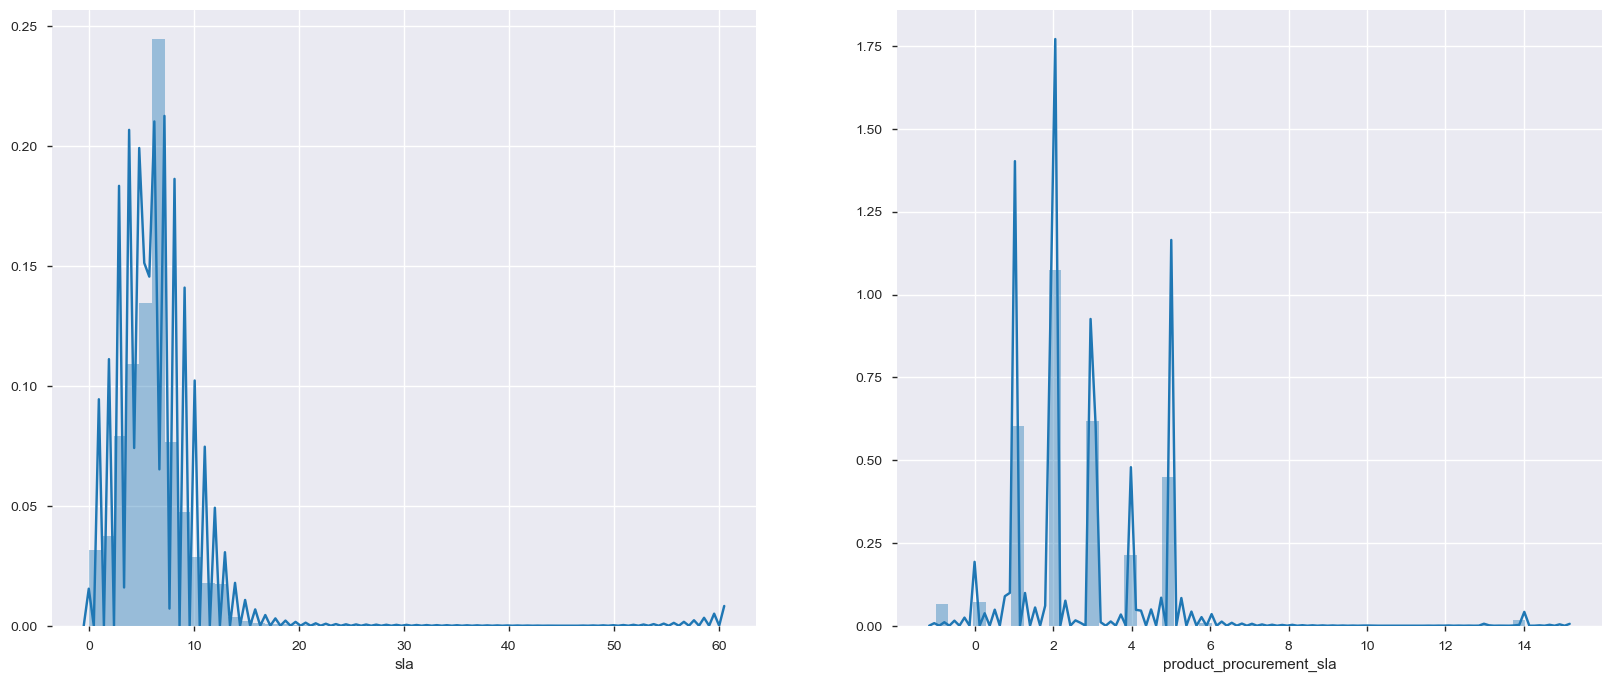

In [78]:
#Data visualisation of sla and product_procurement_sla
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sns.distplot(cons_data.sla)

plt.subplot(1,2,2)
sns.distplot(cons_data.product_procurement_sla)

In [79]:
#Standard Deviation of SLA
cons_data.sla.std()

2.6971034715244455

In [80]:
#Deriving 3 sigma values for outliers treatment
print(cons_data.sla.mean()+(3*(cons_data.sla.std())))
print(cons_data.sla.mean()-(3*(cons_data.sla.std())))

13.976187842871651
-2.2064329862750203


In [81]:
#Standard Deviation of product_procurement_sla
cons_data.product_procurement_sla.std()

1.7161106880486299

In [82]:
#Taking 3 sigma values for handling outliers 
print(cons_data.product_procurement_sla.mean()+(3*(cons_data.product_procurement_sla.std())))
print(cons_data.product_procurement_sla.mean()-(3*(cons_data.product_procurement_sla.std())))

7.70874199479586
-2.5879221334959186


In [83]:
# Limit the SLA values.
cons_data.loc[cons_data.sla > 14,'sla'] = 14

In [84]:
# Limit the product procurement SLA values
cons_data.loc[cons_data.product_procurement_sla > 7,'product_procurement_sla'] = 7

In [85]:
cons_data.loc[cons_data.duplicated()]

Empty DataFrame
Columns: [fsn_id, order_date, Year, Month, order_id, order_item_id, gmv, units, payment_order_type, sla, product_analytic_category, product_analytic_sub_category, product_analytic_vertical, product_mrp, product_procurement_sla]
Index: []

In [86]:

#Removing the combination of order id and order item id that were ordered at the same timestamp
cons_data = cons_data[~cons_data.duplicated(['order_id','order_item_id'])]

In [87]:
#Derived Feature

cons_data['gmv_per_units'] = round((cons_data.gmv/cons_data.units),2)

In [88]:
#Let's check if there are any rows with GMV Per Units > MRP

len(cons_data.loc[cons_data.gmv_per_units>cons_data.product_mrp])

0

In [89]:
# Derived Feature - discount %, ie. (mrp-list price)/mrp
cons_data['discount'] = round(((cons_data.product_mrp - cons_data.gmv_per_units)/(cons_data.product_mrp)),2)

In [90]:
#Derived Feature - Order_Item_Value
cons_data['Order_Item_Value'] = cons_data['product_mrp'] * cons_data['units']

In [91]:
# Derived Feature, Week
cons_data['week'] = np.where(cons_data.Year == 2015, (cons_data.order_date.dt.week - pd.to_datetime('2015-07-01').week + 1), cons_data.order_date.dt.week+27)

# Dates like 2016-01-01 will be 53rd week as per ISO standard, hence the week value would be 53+27=80.
# We can make those values as week 27
cons_data.week.values[(cons_data.Year == 2016) & (cons_data.week == 80)] = 27

In [92]:
### Coding Prepaid = '1' or COD = '0'
cons_data['payment_order_type'] = np.where(cons_data['payment_order_type'] == "Prepaid",1,0)

In [93]:
### Creating Sales Calendar for the required period
sales_calendar = pd.DataFrame(pd.date_range('2015-07-01','2016-06-30').tolist(), columns = ['Date'])
### Mapping week in the Sales calendar
sales_calendar['week'] = sales_calendar.Date.dt.week
### Jan 2016 should be week 54 ,not week 1.
sales_calendar['week'] = np.where((sales_calendar['week'] <= 26) & (sales_calendar.Date.dt.year == 2016), sales_calendar['week']+53, sales_calendar['week'])

In [94]:
###Creating Special Sales List Data Frame

special_sales = ["2015-07-18","2015-07-19","2015-08-15","2015-08-16","2015-08-17","2015-08-28","2015-08-29",
                      "2015-08-30","2015-10-15","2015-10-16","2015-10-17","2015-11-07","2015-11-08","2015-11-09",
                      "2015-11-10","2015-11-11","2015-11-12","2015-11-13","2015-11-14","2015-12-25","2015-12-26",
                      "2015-12-27","2015-12-28","2015-12-29","2015-12-30","2015-12-31","2016-01-01","2016-01-02",
                      "2016-01-03","2016-01-20","2016-01-21","2016-01-22","2016-02-01","2016-02-02","2016-02-14",
                      "2016-02-15","2016-02-20","2016-02-21","2016-03-07","2016-03-08","2016-03-09","2016-05-25",
                      "2016-05-26","2016-05-27"]

sslist = pd.DataFrame(special_sales,columns = ['Date'])
sslist['Date'] = pd.to_datetime(sslist['Date'])
sslist['Special_sales'] = True

In [95]:
#Merging Sales Calendar
sales_calendar = sales_calendar.merge(sslist, 'left')
sales_calendar.fillna(False, inplace = True)

In [96]:
#Int Datatype to Special_Sales values to int
sales_calendar['Special_sales'] = sales_calendar['Special_sales'].astype(int)

In [103]:
#Derived Feature - Payday
sales_calendar['Payday'] = ((sales_calendar['Date'].dt.day == 1) | (sales_calendar['Date'].dt.day == 15)).astype(int)

In [104]:
### Merge Calendar with 2015 and 2016 dataset based on week

ontarioclimate = ontarioclimate2015.append(ontarioclimate2016)
ontarioclimate = ontarioclimate.reset_index()
ontarioclimate.head()

index   Date/Time  Year  Month  Day Data Quality  Max Temp (Â°C)  \
0      0  2015-01-01  2015      1    1          â            0.000   
1      1  2015-01-02  2015      1    2          â            3.000   
2      2  2015-01-03  2015      1    3          â            2.500   
3      3  2015-01-04  2015      1    4          â            2.500   
4      4  2015-01-05  2015      1    5          â          -10.000   

  Max Temp Flag  Min Temp (Â°C) Min Temp Flag  Mean Temp (Â°C) Mean Temp Flag  \
0           NaN          -8.500           NaN           -4.300            NaN   
1           NaN          -3.000           NaN            0.000            NaN   
2           NaN          -4.000           NaN           -0.800            NaN   
3           NaN           0.000           NaN            1.300            NaN   
4           NaN         -13.500           NaN          -11.800            NaN   

   Heat Deg Days (Â°C) Heat Deg Days Flag  Cool Deg Days (Â°C)  \
0               22.300                NaN                0.000   
1               18.000                NaN                0.000   
2               18.800                NaN                0.000   
3               16.700                NaN                0.000   
4               29.800                NaN                0.000   

  Cool Deg Days Flag  Total Rain (mm) Total Rain Flag  Total Snow (cm)  \
0                NaN            0.000             NaN            0.000   
1                NaN            0.000             NaN            0.000   
2                NaN           24.000             NaN            0.000   
3                NaN            0.000             NaN            1.000   
4                NaN            0.000             NaN            3.000   

  Total Snow Flag  Total Precip (mm) Total Precip Flag  Snow on Grnd (cm)  \
0             NaN              0.000               NaN              0.000   
1             NaN              0.000               NaN              0.000   
2             NaN             24.000               NaN              0.000   
3             NaN              1.000               NaN              0.000   
4             NaN              3.000               NaN              1.000   

  Snow on Grnd Flag  Dir of Max Gust (10s deg)  Dir of Max Gust Flag  \
0               NaN                        nan                   nan   
1               NaN                        nan                   nan   
2               NaN                        nan                   nan   
3               NaN                        nan                   nan   
4               NaN                        nan                   nan   

   Spd of Max Gust (km/h)  Spd of Max Gust Flag  
0                     nan                   nan  
1                     nan                   nan  
2                     nan                   nan  
3                     nan                   nan  
4                     nan                   nan

In [105]:
#MApping Canadian Holidays in 2015
for date in holidays.Canada(years=2015).items():
    print(date)


(datetime.date(2015, 1, 1), "New Year's Day")
(datetime.date(2015, 2, 16), 'Family Day')
(datetime.date(2015, 4, 3), 'Good Friday')
(datetime.date(2015, 5, 18), 'Victoria Day')
(datetime.date(2015, 7, 1), 'Canada Day')
(datetime.date(2015, 8, 3), 'Civic Holiday')
(datetime.date(2015, 9, 7), 'Labour Day')
(datetime.date(2015, 10, 12), 'Thanksgiving')
(datetime.date(2015, 12, 25), 'Christmas Day')
(datetime.date(2015, 12, 28), 'Boxing Day (Observed)')


In [106]:
#MApping Canadian Holidays in 2016
for date in holidays.Canada(years=2016).items():
    print(date)

(datetime.date(2016, 1, 1), "New Year's Day")
(datetime.date(2016, 2, 15), 'Family Day')
(datetime.date(2016, 3, 25), 'Good Friday')
(datetime.date(2016, 5, 23), 'Victoria Day')
(datetime.date(2016, 7, 1), 'Canada Day')
(datetime.date(2016, 8, 1), 'Civic Holiday')
(datetime.date(2016, 9, 5), 'Labour Day')
(datetime.date(2016, 10, 10), 'Thanksgiving')
(datetime.date(2016, 12, 25), 'Christmas Day')
(datetime.date(2016, 12, 26), 'Christmas Day (Observed)')
(datetime.date(2016, 12, 27), 'Boxing Day (Observed)')


In [107]:
### Checking for any null values

round((ontarioclimate.isnull().sum()/len(ontarioclimate.index))*100,2)

index                         0.000
Date/Time                     0.000
Year                          0.000
Month                         0.000
Day                           0.000
Data Quality                 37.620
Max Temp (Â°C)               39.530
Max Temp Flag                98.080
Min Temp (Â°C)               44.050
Min Temp Flag                93.570
Mean Temp (Â°C)              44.050
Mean Temp Flag               93.570
Heat Deg Days (Â°C)          44.050
Heat Deg Days Flag           93.570
Cool Deg Days (Â°C)          44.050
Cool Deg Days Flag           93.570
Total Rain (mm)              37.620
Total Rain Flag              98.630
Total Snow (cm)              37.620
Total Snow Flag              97.810
Total Precip (mm)            37.620
Total Precip Flag            97.400
Snow on Grnd (cm)            37.620
Snow on Grnd Flag            98.910
Dir of Max Gust (10s deg)   100.000
Dir of Max Gust Flag        100.000
Spd of Max Gust (km/h)      100.000
Spd of Max Gust Flag        

In [108]:
### Dropping columns we do not require in the analysis.
ontarioclimate.drop(['index','Data Quality','Max Temp Flag','Min Temp Flag','Mean Temp Flag',
                      'Heat Deg Days Flag','Cool Deg Days Flag','Total Rain Flag','Total Snow Flag',
                      'Total Precip Flag','Snow on Grnd Flag','Dir of Max Gust (10s deg)','Dir of Max Gust Flag',
                      'Spd of Max Gust (km/h)','Spd of Max Gust Flag'], axis = 1, inplace = True)

In [109]:
#Renaming the columns
ontarioclimate.columns = ['Date','Year','Month','Day','MaxTempC','MinTempC','MeanTempC','HeatDegDays','CoolDegDays','TotalRainMm','TotalSnowCm','TotalPrecipMm','SnowOnGrndCm']

In [110]:
#Data type conversion to datetime
ontarioclimate['Date'] = ontarioclimate['Date'].apply(pd.to_datetime)

In [111]:
### Deriving Climate data from July 15 to June 16

ontarioclimate=ontarioclimate[(ontarioclimate['Month'] >= 7) & (ontarioclimate['Year'] == 2015) 
                               |(ontarioclimate['Month'] <= 6) & (ontarioclimate['Year'] == 2016)]

In [112]:
### Mapping week in the Climate data
ontarioclimate['week'] = ontarioclimate.Date.dt.week

### Jan 2016 should be week 54 ,not week 1.
ontarioclimate['week'] = np.where((ontarioclimate['week'] <= 26) & (ontarioclimate['Year'] == 2016), ontarioclimate['week']+53, ontarioclimate['week'])

ontarioclimate = ontarioclimate.reset_index()
ontarioclimate.drop('index',axis=1,inplace=True)
ontarioclimate.head()

Date  Year  Month  Day  MaxTempC  MinTempC  MeanTempC  HeatDegDays  \
0 2015-07-01  2015      7    1    24.500    17.000     20.800        0.000   
1 2015-07-02  2015      7    2    24.000    14.000     19.000        0.000   
2 2015-07-03  2015      7    3    25.000    10.000     17.500        0.500   
3 2015-07-04  2015      7    4    26.000    11.000     18.500        0.000   
4 2015-07-05  2015      7    5    28.000    14.000     21.000        0.000   

   CoolDegDays  TotalRainMm  TotalSnowCm  TotalPrecipMm  SnowOnGrndCm  week  
0        2.800        0.000        0.000          0.000         0.000    27  
1        1.000        0.000        0.000          0.000         0.000    27  
2        0.000        0.000        0.000          0.000         0.000    27  
3        0.500        0.000        0.000          0.000         0.000    27  
4        3.000        0.000        0.000          0.000         0.000    27

In [113]:
### Replacing Null values with mean value
ontarioclimate['MaxTempC'] = ontarioclimate['MaxTempC'].fillna(ontarioclimate['MaxTempC'].mean())
ontarioclimate['MinTempC'] = ontarioclimate['MinTempC'].fillna(ontarioclimate['MinTempC'].mean())
ontarioclimate['MeanTempC'] = ontarioclimate['MeanTempC'].fillna(ontarioclimate['MeanTempC'].mean())
ontarioclimate['HeatDegDays'] = ontarioclimate['HeatDegDays'].fillna(ontarioclimate['HeatDegDays'].mean())
ontarioclimate['CoolDegDays'] = ontarioclimate['CoolDegDays'].fillna(ontarioclimate['CoolDegDays'].mean())
ontarioclimate['TotalRainMm'] = ontarioclimate['TotalRainMm'].fillna(ontarioclimate['TotalRainMm'].mean())
ontarioclimate['TotalSnowCm'] = ontarioclimate['TotalSnowCm'].fillna(ontarioclimate['TotalSnowCm'].mean())
ontarioclimate['TotalPrecipMm'] = ontarioclimate['TotalPrecipMm'].fillna(ontarioclimate['TotalPrecipMm'].mean())
ontarioclimate['SnowOnGrndCm'] = ontarioclimate['SnowOnGrndCm'].fillna(ontarioclimate['SnowOnGrndCm'].mean())

In [114]:
### Transforming NPS and Stock_index
nps = nps.T.reset_index(drop=True)
nps.columns = ['NPS','Stock_Index']
nps = nps.drop(nps.index[[0]]).reset_index(drop=True)

In [115]:
### Adding Month and Year to NPS Score
nps['Month'] = pd.Series([7,8,9,10,11,12,1,2,3,4,5,6])
nps['Year'] = pd.Series([2015,2015,2015,2015,2015,2015,2016,2016,2016,2016,2016,2016])

In [116]:
#changing to float data tpye
nps['NPS'] = nps['NPS'].astype(float)
nps['Stock_Index'] = nps['Stock_Index'].astype(float)

In [117]:
#MErging ontarioclimate with sales_calendar
sales_calendar = sales_calendar.merge(ontarioclimate, 'left')

In [118]:
#Merging nps with sales_calendar
sales_calendar = sales_calendar.merge(nps, 'left')

In [119]:
# Deriving Week
sales_calendar['week'] = np.where(sales_calendar.Date.dt.year == 2015, (sales_calendar.Date.dt.week - pd.to_datetime('2015-07-01').week + 1), sales_calendar.Date.dt.week+27)

# Dates like 2016-01-01 will be 53rd week as per ISO standard, hence the week value would be 53+27=80.

sales_calendar.week.values[(sales_calendar.Date.dt.year == 2016) & (sales_calendar.week == 80)] = 27

In [120]:
#Pivot Sales_Calendar groupby week
sales_calendar = pd.DataFrame(sales_calendar.groupby('week').agg({'NPS':'mean','Stock_Index':'mean',
                                                             'Special_sales':'mean','Payday':'mean',
                                                             'MaxTempC':'mean','MinTempC':'mean',
                                                             'MeanTempC':'mean','HeatDegDays':'mean',
                                                             'CoolDegDays':'mean','TotalRainMm':'mean',
                                                             'TotalSnowCm':'mean','TotalPrecipMm':'mean',
                                                             'SnowOnGrndCm':'mean'}))

In [121]:
#reset values
sales_calendar.reset_index(inplace = True)

In [122]:
sales_calendar.head()

week    NPS  Stock_Index  Special_sales  Payday  MaxTempC  MinTempC  \
0     1 54.600     1177.000          0.000   0.200    25.500    13.200   
1     2 54.600     1177.000          0.000   0.000    24.025    14.385   
2     3 54.600     1177.000          0.286   0.143    27.383    16.314   
3     4 54.600     1177.000          0.000   0.000    28.240    14.342   
4     5 56.139     1185.286          0.000   0.143    29.811    16.242   

   MeanTempC  HeatDegDays  CoolDegDays  TotalRainMm  TotalSnowCm  \
0     19.360        0.100        1.460        0.000        0.000   
1     19.263        1.059        2.322        4.155        0.029   
2     21.906        0.816        4.722        1.569        0.029   
3     20.540        1.632        4.172        1.141        0.029   
4     23.092        0.816        5.908        4.341        0.029   

   TotalPrecipMm  SnowOnGrndCm  
0          0.000         0.000  
1          4.184         0.041  
2          1.598         0.041  
3          1.170         0.041  
4          4.370         0.041

In [123]:
#replace null values
media_inv.replace(np.nan,0,inplace = True)
media_inv['Date'] = pd.to_datetime(media_inv[['Year', 'Month']].assign(DAY=1))
media_inv.set_index('Date', inplace = True)
media_inv

Year  Month  Total Investment    TV  Digital  Sponsorship  \
Date                                                                    
2015-07-01  2015      7            17.062 0.215    2.533        7.414   
2015-08-01  2015      8             5.064 0.006    1.278        1.063   
2015-09-01  2015      9            96.254 3.880    1.357       62.788   
2015-10-01  2015     10           170.156 6.145   12.622       84.673   
2015-11-01  2015     11            51.216 4.221    1.275       14.172   
2015-12-01  2015     12           106.745 5.398    3.063       56.705   
2016-01-01  2016      1            74.196 4.380    0.456        4.200   
2016-02-01  2016      2            48.052 2.586    1.913       11.726   
2016-03-01  2016      3           100.025 9.300    2.100       41.590   
2016-04-01  2016      4            56.848 5.205    0.872       24.308   
2016-05-01  2016      5            78.057 1.370    0.770       31.680   
2016-06-01  2016      6            42.834 1.663    1.421       25.049   

            Content Marketing  Online marketing   Affiliates    SEM  Radio  \
Date                                                                         
2015-07-01              0.001             1.327        0.547  5.024  0.000   
2015-08-01              0.000             0.129        0.074  2.514  0.000   
2015-09-01              0.610            16.380        5.038  6.202  0.000   
2015-10-01              3.444            24.372        6.974 31.927  0.000   
2015-11-01              0.169            19.562        6.596  5.222  0.000   
2015-12-01              1.067            22.504        6.827 11.181  0.000   
2016-01-01              0.900            22.900        7.370  4.200  2.700   
2016-02-01              0.597            19.892        6.465  4.874  0.000   
2016-03-01              0.370            18.438        6.218  5.194  0.870   
2016-04-01              0.035            16.515        5.693  4.220  0.000   
2016-05-01              0.790            23.650        6.800  6.910  1.100   
2016-06-01              0.045             7.971        2.768  3.736  0.000   

            Other  
Date               
2015-07-01  0.000  
2015-08-01  0.000  
2015-09-01  0.000  
2015-10-01  0.000  
2015-11-01  0.000  
2015-12-01  0.000  
2016-01-01 27.090  
2016-02-01  0.000  
2016-03-01 15.946  
2016-04-01  0.000  
2016-05-01  4.987  
2016-06-01  0.000

In [124]:
### Renaming the columns

media_inv.columns = ['Year','Month','TotalInvestment','TV','Digital','Sponsorship','ContentMarketing',
                     'OnlineMarketing','Affiliates','SEM','Radio','Other']

In [125]:
### convert to datetime datatype
media_inv.index = pd.to_datetime(media_inv.index)

In [126]:
### add new next month for correct analysis
index = media_inv.index[-1] + pd.offsets.MonthBegin(1)
index

Timestamp('2016-07-01 00:00:00')

In [127]:
#data append
media_inv = media_inv.append(media_inv.iloc[[-1]].rename({media_inv.index[-1]: index}))
media_inv

Year  Month  TotalInvestment    TV  Digital  Sponsorship  \
Date                                                                   
2015-07-01  2015      7           17.062 0.215    2.533        7.414   
2015-08-01  2015      8            5.064 0.006    1.278        1.063   
2015-09-01  2015      9           96.254 3.880    1.357       62.788   
2015-10-01  2015     10          170.156 6.145   12.622       84.673   
2015-11-01  2015     11           51.216 4.221    1.275       14.172   
2015-12-01  2015     12          106.745 5.398    3.063       56.705   
2016-01-01  2016      1           74.196 4.380    0.456        4.200   
2016-02-01  2016      2           48.052 2.586    1.913       11.726   
2016-03-01  2016      3          100.025 9.300    2.100       41.590   
2016-04-01  2016      4           56.848 5.205    0.872       24.308   
2016-05-01  2016      5           78.057 1.370    0.770       31.680   
2016-06-01  2016      6           42.834 1.663    1.421       25.049   
2016-07-01  2016      6           42.834 1.663    1.421       25.049   

            ContentMarketing  OnlineMarketing  Affiliates    SEM  Radio  Other  
Date                                                                            
2015-07-01             0.001            1.327       0.547  5.024  0.000  0.000  
2015-08-01             0.000            0.129       0.074  2.514  0.000  0.000  
2015-09-01             0.610           16.380       5.038  6.202  0.000  0.000  
2015-10-01             3.444           24.372       6.974 31.927  0.000  0.000  
2015-11-01             0.169           19.562       6.596  5.222  0.000  0.000  
2015-12-01             1.067           22.504       6.827 11.181  0.000  0.000  
2016-01-01             0.900           22.900       7.370  4.200  2.700 27.090  
2016-02-01             0.597           19.892       6.465  4.874  0.000  0.000  
2016-03-01             0.370           18.438       6.218  5.194  0.870 15.946  
2016-04-01             0.035           16.515       5.693  4.220  0.000  0.000  
2016-05-01             0.790           23.650       6.800  6.910  1.100  4.987  
2016-06-01             0.045            7.971       2.768  3.736  0.000  0.000  
2016-07-01             0.045            7.971       2.768  3.736  0.000  0.000

In [128]:
#Resampling the data on weekly frequency
media_inv = media_inv.resample('W').ffill().iloc[:-1]
media_inv

Year  Month  TotalInvestment    TV  Digital  Sponsorship  \
Date                                                                   
2015-07-05  2015      7           17.062 0.215    2.533        7.414   
2015-07-12  2015      7           17.062 0.215    2.533        7.414   
2015-07-19  2015      7           17.062 0.215    2.533        7.414   
2015-07-26  2015      7           17.062 0.215    2.533        7.414   
2015-08-02  2015      8            5.064 0.006    1.278        1.063   
2015-08-09  2015      8            5.064 0.006    1.278        1.063   
2015-08-16  2015      8            5.064 0.006    1.278        1.063   
2015-08-23  2015      8            5.064 0.006    1.278        1.063   
2015-08-30  2015      8            5.064 0.006    1.278        1.063   
2015-09-06  2015      9           96.254 3.880    1.357       62.788   
2015-09-13  2015      9           96.254 3.880    1.357       62.788   
2015-09-20  2015      9           96.254 3.880    1.357       62.788   
2015-09-27  2015      9           96.254 3.880    1.357       62.788   
2015-10-04  2015     10          170.156 6.145   12.622       84.673   
2015-10-11  2015     10          170.156 6.145   12.622       84.673   
2015-10-18  2015     10          170.156 6.145   12.622       84.673   
2015-10-25  2015     10          170.156 6.145   12.622       84.673   
2015-11-01  2015     11           51.216 4.221    1.275       14.172   
2015-11-08  2015     11           51.216 4.221    1.275       14.172   
2015-11-15  2015     11           51.216 4.221    1.275       14.172   
2015-11-22  2015     11           51.216 4.221    1.275       14.172   
2015-11-29  2015     11           51.216 4.221    1.275       14.172   
2015-12-06  2015     12          106.745 5.398    3.063       56.705   
2015-12-13  2015     12          106.745 5.398    3.063       56.705   
2015-12-20  2015     12          106.745 5.398    3.063       56.705   
2015-12-27  2015     12          106.745 5.398    3.063       56.705   
2016-01-03  2016      1           74.196 4.380    0.456        4.200   
2016-01-10  2016      1           74.196 4.380    0.456        4.200   
2016-01-17  2016      1           74.196 4.380    0.456        4.200   
2016-01-24  2016      1           74.196 4.380    0.456        4.200   
2016-01-31  2016      1           74.196 4.380    0.456        4.200   
2016-02-07  2016      2           48.052 2.586    1.913       11.726   
2016-02-14  2016      2           48.052 2.586    1.913       11.726   
2016-02-21  2016      2           48.052 2.586    1.913       11.726   
2016-02-28  2016      2           48.052 2.586    1.913       11.726   
2016-03-06  2016      3          100.025 9.300    2.100       41.590   
2016-03-13  2016      3          100.025 9.300    2.100       41.590   
2016-03-20  2016      3          100.025 9.300    2.100       41.590   
2016-03-27  2016      3          100.025 9.300    2.100       41.590   
2016-04-03  2016      4           56.848 5.205    0.872       24.308   
2016-04-10  2016      4           56.848 5.205    0.872       24.308   
2016-04-17  2016      4           56.848 5.205    0.872       24.308   
2016-04-24  2016      4           56.848 5.205    0.872       24.308   
2016-05-01  2016      5           78.057 1.370    0.770       31.680   
2016-05-08  2016      5           78.057 1.370    0.770       31.680   
2016-05-15  2016      5           78.057 1.370    0.770       31.680   
2016-05-22  2016      5           78.057 1.370    0.770       31.680   
2016-05-29  2016      5           78.057 1.370    0.770       31.680   
2016-06-05  2016      6           42.834 1.663    1.421       25.049   
2016-06-12  2016      6           42.834 1.663    1.421       25.049   
2016-06-19  2016      6           42.834 1.663    1.421       25.049   
2016-06-26  2016      6           42.834 1.663    1.421       25.049   

            ContentMarketing  OnlineMarketing  Affiliates    SEM  Radio  Other  
Date                                      

In [129]:
### current data divided by number of months
media_inv['TotalInvestment'] /= media_inv.resample('MS')['TotalInvestment'].transform('size')
media_inv['TV'] /= media_inv.resample('MS')['TV'].transform('size')
media_inv['Digital'] /= media_inv.resample('MS')['Digital'].transform('size')
media_inv['Sponsorship'] /= media_inv.resample('MS')['Sponsorship'].transform('size')
media_inv['ContentMarketing'] /= media_inv.resample('MS')['ContentMarketing'].transform('size')
media_inv['OnlineMarketing'] /= media_inv.resample('MS')['OnlineMarketing'].transform('size')
media_inv['Affiliates'] /= media_inv.resample('MS')['Affiliates'].transform('size')
media_inv['SEM'] /= media_inv.resample('MS')['SEM'].transform('size')
media_inv['Radio'] /= media_inv.resample('MS')['Radio'].transform('size')
media_inv['Other'] /= media_inv.resample('MS')['Other'].transform('size')

In [130]:
media_inv.reset_index(inplace = True)

###  Mapping week in the marketing

media_inv['Date'] = pd.to_datetime(media_inv['Date'])
# We can create the week 
media_inv['week'] = np.where(media_inv.Date.dt.year == 2015, (media_inv.Date.dt.week - pd.to_datetime('2015-07-01').week + 1), media_inv.Date.dt.week+27)

media_inv.week.values[(media_inv.Date.dt.year == 2016) & (media_inv.week == 80)] = 27
media_inv.sort_values('week', inplace = True)

In [131]:
#Adstock Derived Feature

In [132]:
#adstock function
def adstock_adv(adstock_rate=0.5, advertising = media_inv):
    
    adstock_adv = []
    for i in range(len(advertising)):
        if i == 0: 
            adstock_adv.append(advertising.iloc[i])
        else:
            adstock_adv.append(advertising.iloc[i] + adstock_rate * advertising.iloc[i-1])            
    return adstock_adv

In [133]:
#Create new data frame
ad_stock = pd.DataFrame()

In [134]:
#Mapping ad_stock
ad_stock['TV_ads'] = adstock_adv(adstock_rate=0.5, advertising = media_inv['TV'])

ad_stock['Digital_ads'] = adstock_adv(adstock_rate=0.5, advertising = media_inv['Digital'])

ad_stock['Sponsorship_ads'] = adstock_adv(adstock_rate=0.5, advertising = media_inv['Sponsorship'])

ad_stock['Content_marketing_ads'] = adstock_adv(adstock_rate=0.5, advertising = media_inv['ContentMarketing'])

ad_stock['Online_marketing_ads'] = adstock_adv(adstock_rate=0.5, advertising = media_inv['OnlineMarketing'])

ad_stock['Affiliates_ads'] = adstock_adv(adstock_rate=0.5, advertising = media_inv['Affiliates'])

ad_stock['SEM_ads'] = adstock_adv(adstock_rate=0.5, advertising = media_inv['SEM'])

ad_stock['Radio_ads'] = adstock_adv(adstock_rate=0.5, advertising = media_inv['Radio'])

ad_stock['Other_ads'] = adstock_adv(adstock_rate=0.5, advertising = media_inv['Other'])

In [135]:
#Merging Media_Inv to ad_stock
media_inv = pd.concat([media_inv,ad_stock] ,axis=1)

In [136]:
media_inv.head()

Date  Year  Month  TotalInvestment    TV  Digital  Sponsorship  \
0 2015-07-05  2015      7            4.265 0.054    0.633        1.854   
1 2015-07-12  2015      7            4.265 0.054    0.633        1.854   
2 2015-07-19  2015      7            4.265 0.054    0.633        1.854   
3 2015-07-26  2015      7            4.265 0.054    0.633        1.854   
4 2015-08-02  2015      8            1.013 0.001    0.256        0.213   

   ContentMarketing  OnlineMarketing  Affiliates   SEM  Radio  Other  week  \
0             0.000            0.332       0.137 1.256  0.000  0.000     1   
1             0.000            0.332       0.137 1.256  0.000  0.000     2   
2             0.000            0.332       0.137 1.256  0.000  0.000     3   
3             0.000            0.332       0.137 1.256  0.000  0.000     4   
4             0.000            0.026       0.015 0.503  0.000  0.000     5   

   TV_ads  Digital_ads  Sponsorship_ads  Content_marketing_ads  \
0   0.054        0.633            1.854                  0.000   
1   0.081        0.950            2.780                  0.000   
2   0.081        0.950            2.780                  0.000   
3   0.081        0.950            2.780                  0.000   
4   0.028        0.572            1.139                  0.000   

   Online_marketing_ads  Affiliates_ads  SEM_ads  Radio_ads  Other_ads  
0                 0.332           0.137    1.256      0.000      0.000  
1                 0.498           0.205    1.884      0.000      0.000  
2                 0.498           0.205    1.884      0.000      0.000  
3                 0.498           0.205    1.884      0.000      0.000  
4                 0.192           0.083    1.131      0.000      0.000

In [137]:
# The premium-ness of the product depends on the MRP. Higher the MRP, more premium is the product.
# Let's check the percentiles of MRP in the dataset.

cons_data.product_mrp.describe()

count   512534.000
mean      2502.164
std       4703.596
min         79.000
25%        766.000
50%       1200.000
75%       2800.000
max     180000.000
Name: product_mrp, dtype: float64

In [138]:
# Let's assume that products with MRP greater than 90 percentile to be premium products.
# Create a dataframe with mrp, number of units sold and gmv against each product vertical to analyse better.
prodcateg = pd.DataFrame(pd.pivot_table(cons_data, values = ['units','product_mrp', 'gmv'], index = ['product_analytic_vertical'], 
               aggfunc={'units':np.sum, 'product_mrp':np.mean, 'gmv':np.sum}).to_records())

In [139]:
# Marking products with MRP greater than 90th percentile with 1 and rest with 0
prodcateg['premium_prod'] = np.where((prodcateg.product_mrp>cons_data.product_mrp.quantile(0.9)),1,0)

In [140]:
prodcateg.loc[prodcateg.premium_prod==1]

product_analytic_vertical         gmv  product_mrp  units  premium_prod
10            CameraLEDLight   20215.000     6738.333      3             1
16              DJController 2335536.000    17754.638    193             1
39             KaraokePlayer   23500.000    12000.000      2             1
41          MotionController 4134009.000     5834.638   1060             1
43                  SlingBox   20495.000     7999.000      5             1
45                SoundMixer  638073.000    12271.377     69             1
48             Teleconverter   15299.000    20490.000      1             1

In [141]:
#visualise how the premium products contribute towards the GMV.

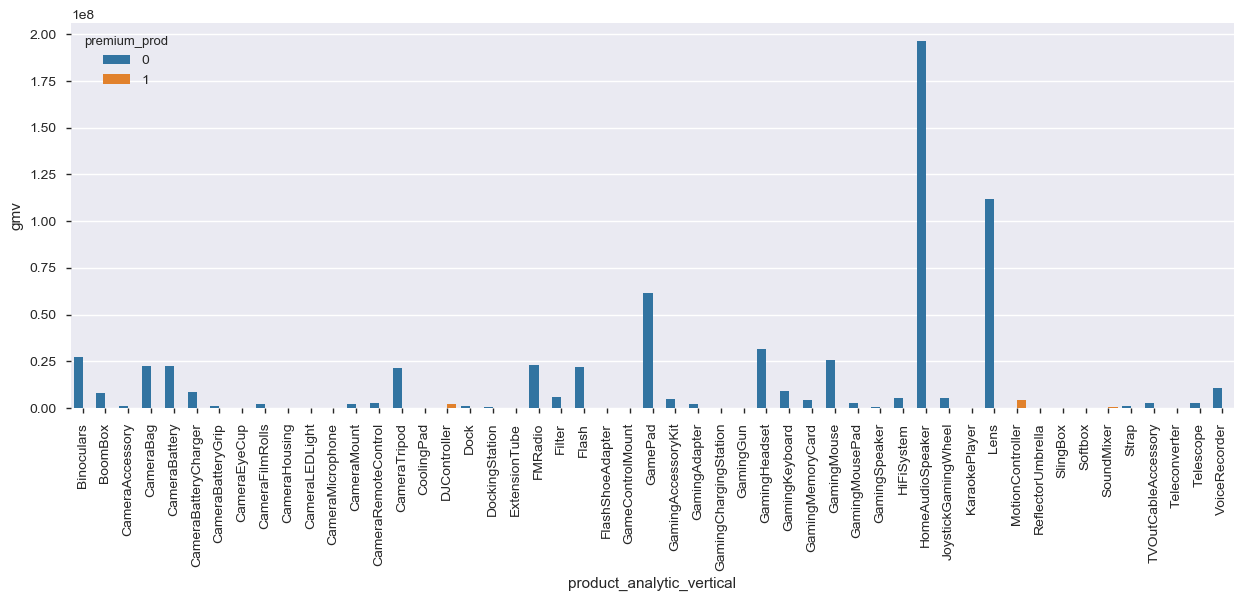

In [142]:
plt.figure(figsize=(15,5))
sns.barplot(x = prodcateg.product_analytic_vertical, y=prodcateg.gmv, hue=prodcateg.premium_prod)
plt.xticks(rotation=90)
plt.show()

- We can clearly see that, maximum revenue is generated through mass producs like HomeAudioSpeaker, Lens, GamingPad, etc and not premium products that contibute quite less towards revenue.
- The company hence should focus more on mass products than premium products.

In [143]:
cons_data = cons_data.merge(prodcateg[['product_analytic_vertical', 'premium_prod']] , left_on='product_analytic_vertical', 
            right_on='product_analytic_vertical',
                   how = 'inner')

In [144]:
sales_data = cons_data.copy()

In [145]:
cons_data.drop(['product_analytic_vertical'],1,inplace=True)

In [146]:
#Data Summation

In [147]:
camera = cons_data[cons_data['product_analytic_sub_category'] == 'CameraAccessory']
gamingacc = cons_data[cons_data['product_analytic_sub_category'] == 'GamingAccessory']
homeaudio = cons_data[cons_data['product_analytic_sub_category'] == 'HomeAudio']

In [148]:
#Camera Sub-Category

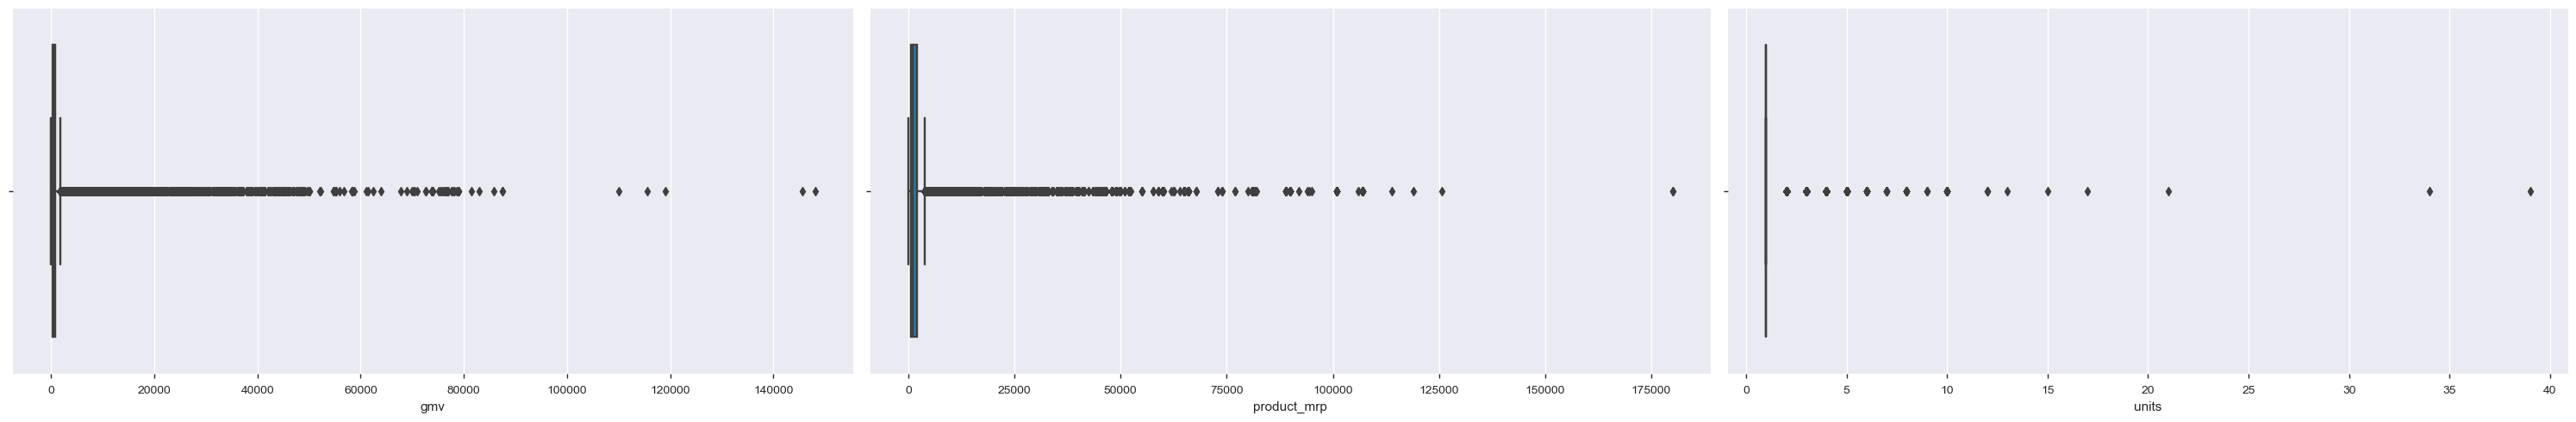

In [149]:
### Outlier Analysis
fig, axs = plt.subplots(1,3, figsize = (30,5))
plt1 = sns.boxplot(camera['gmv'], ax = axs[0])
plt2 = sns.boxplot(camera['units'], ax = axs[2])
plt3 = sns.boxplot(camera['product_mrp'], ax = axs[1])
plt.tight_layout()

In [150]:
### Treating outliers
### Outlier treatment for gmv & product_mrp
Q1 = camera.gmv.quantile(0.25)
Q3 = camera.gmv.quantile(0.75)
IQR = Q3 - Q1
cameradf = camera[(camera.gmv >= Q1 - 1.5*IQR) & (camera.gmv <= Q3 + 1.5*IQR)]
Q1 = camera.product_mrp.quantile(0.25)
Q3 = camera.product_mrp.quantile(0.75)
IQR = Q3 - Q1
cameradf = camera[(camera.product_mrp >= Q1 - 1.5*IQR) & (camera.product_mrp <= Q3 + 1.5*IQR)]

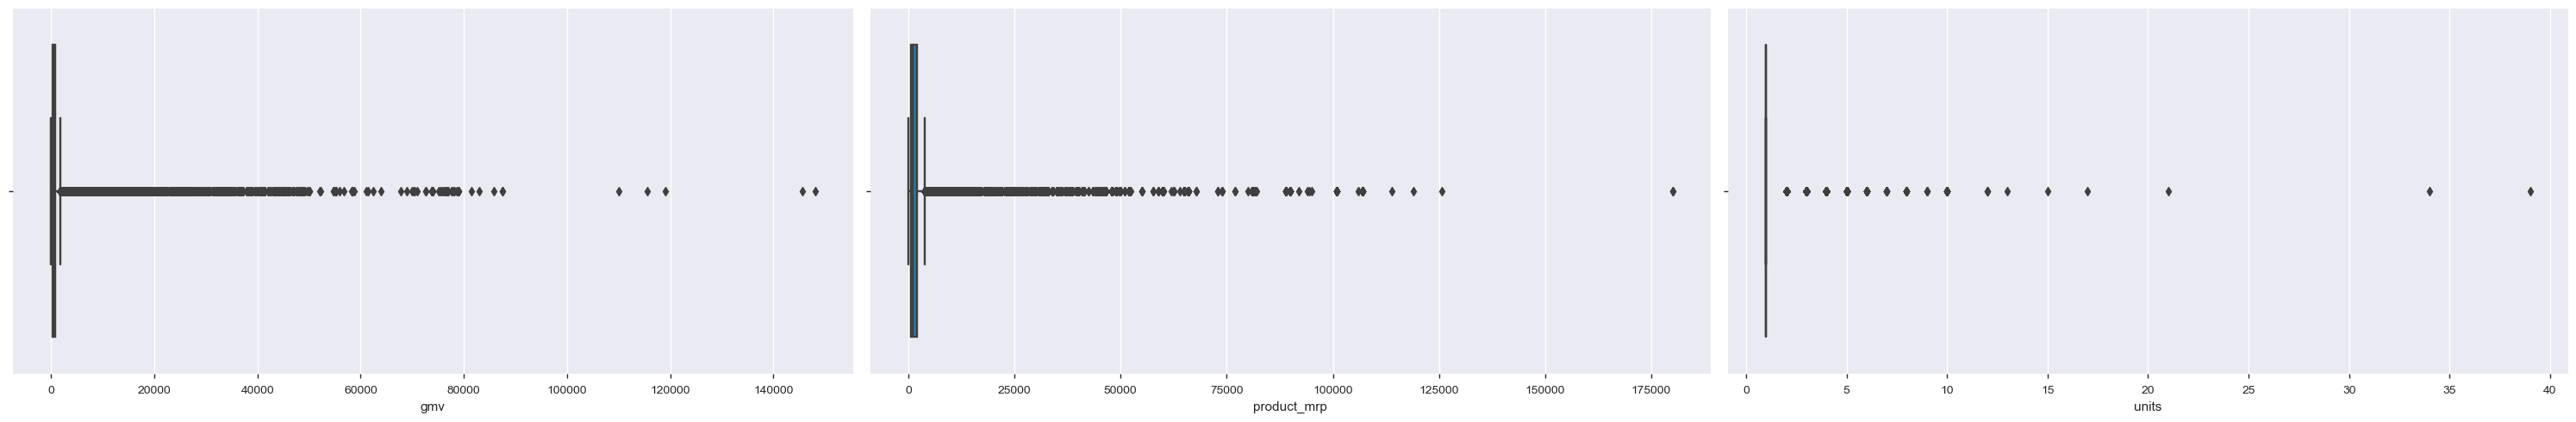

In [151]:
### Outlier Analysis
fig, axs = plt.subplots(1,3, figsize = (30,5))
plt1 = sns.boxplot(camera['gmv'], ax = axs[0])
plt2 = sns.boxplot(camera['units'], ax = axs[2])
plt3 = sns.boxplot(camera['product_mrp'], ax = axs[1])
plt.tight_layout()

In [152]:
camera.columns

Index(['fsn_id', 'order_date', 'Year', 'Month', 'order_id', 'order_item_id',
       'gmv', 'units', 'payment_order_type', 'sla',
       'product_analytic_category', 'product_analytic_sub_category',
       'product_mrp', 'product_procurement_sla', 'gmv_per_units', 'discount',
       'Order_Item_Value', 'week', 'premium_prod'],
      dtype='object')

In [153]:
### Aggregating dataset on weekly level

weeklycam = pd.DataFrame(camera.groupby('week').agg({'gmv':'sum',
                                                             'product_mrp':'mean','discount':'mean',
                                                             'sla':'mean','product_procurement_sla':'mean',
                                                             'fsn_id':pd.Series.nunique,'order_item_id':pd.Series.nunique,
                                                             'order_id': pd.Series.nunique,
                                                             'payment_order_type':'sum',
                                                            'premium_prod':'sum'}))

weeklycam.reset_index( inplace = True)

In [154]:
### Sum of GMV / No of unique Orders

weeklycam['gmvpo'] = weeklycam['gmv']/weeklycam['order_id']

In [155]:
weeklycam['onlineordershare'] = weeklycam['payment_order_type']*100/weeklycam['order_item_id']

In [156]:

sales_calendar['week'] = sales_calendar['week'].astype(int)
weeklycam['week'] = weeklycam['week'].astype(int)

In [157]:
weeklycam = weeklycam.merge(media_inv, how = 'left', on = 'week')

In [158]:
weeklycam = weeklycam.merge(sales_calendar, how = 'left', on = 'week')

In [159]:
#EDA - Camera Accessory

In [160]:
weeklycam_vis = weeklycam.round(2)

In [161]:
#Univariate Analysis

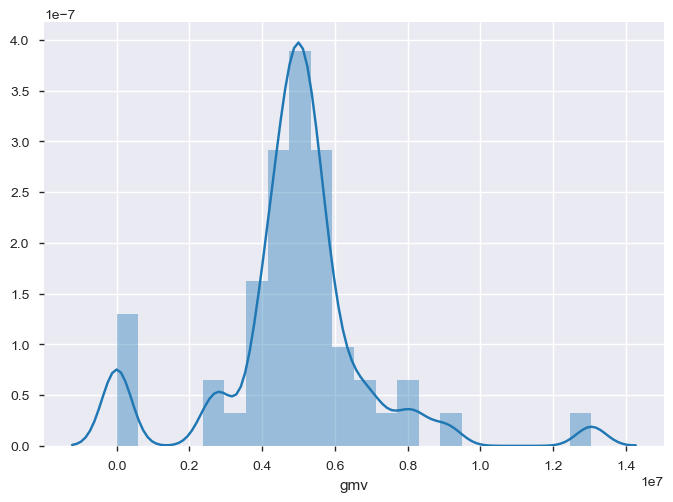

In [162]:
#GMV across weeks - normally distributed
sns.distplot(weeklycam_vis['gmv'],kde=True)

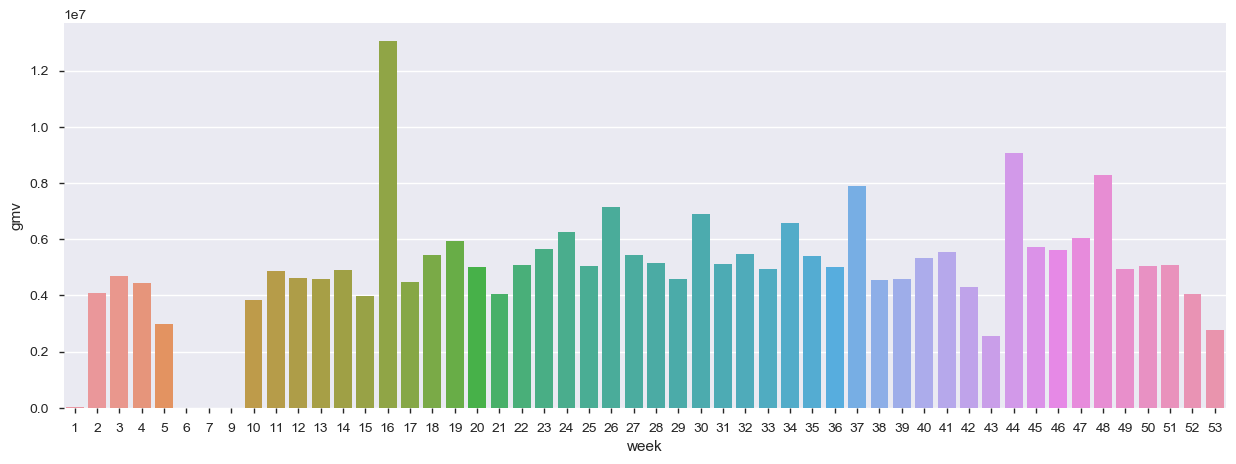

In [163]:
#GMV across weeks
plt.figure(figsize=(15, 5))
sns.barplot(weeklycam_vis['week'],weeklycam_vis['gmv'])

In [164]:
weeklycam_vis.columns

Index(['week', 'gmv', 'product_mrp', 'discount', 'sla',
       'product_procurement_sla', 'fsn_id', 'order_item_id', 'order_id',
       'payment_order_type', 'premium_prod', 'gmvpo', 'onlineordershare',
       'Date', 'Year', 'Month', 'TotalInvestment', 'TV', 'Digital',
       'Sponsorship', 'ContentMarketing', 'OnlineMarketing', 'Affiliates',
       'SEM', 'Radio', 'Other', 'TV_ads', 'Digital_ads', 'Sponsorship_ads',
       'Content_marketing_ads', 'Online_marketing_ads', 'Affiliates_ads',
       'SEM_ads', 'Radio_ads', 'Other_ads', 'NPS', 'Stock_Index',
       'Special_sales', 'Payday', 'MaxTempC', 'MinTempC', 'MeanTempC',
       'HeatDegDays', 'CoolDegDays', 'TotalRainMm', 'TotalSnowCm',
       'TotalPrecipMm', 'SnowOnGrndCm'],
      dtype='object')

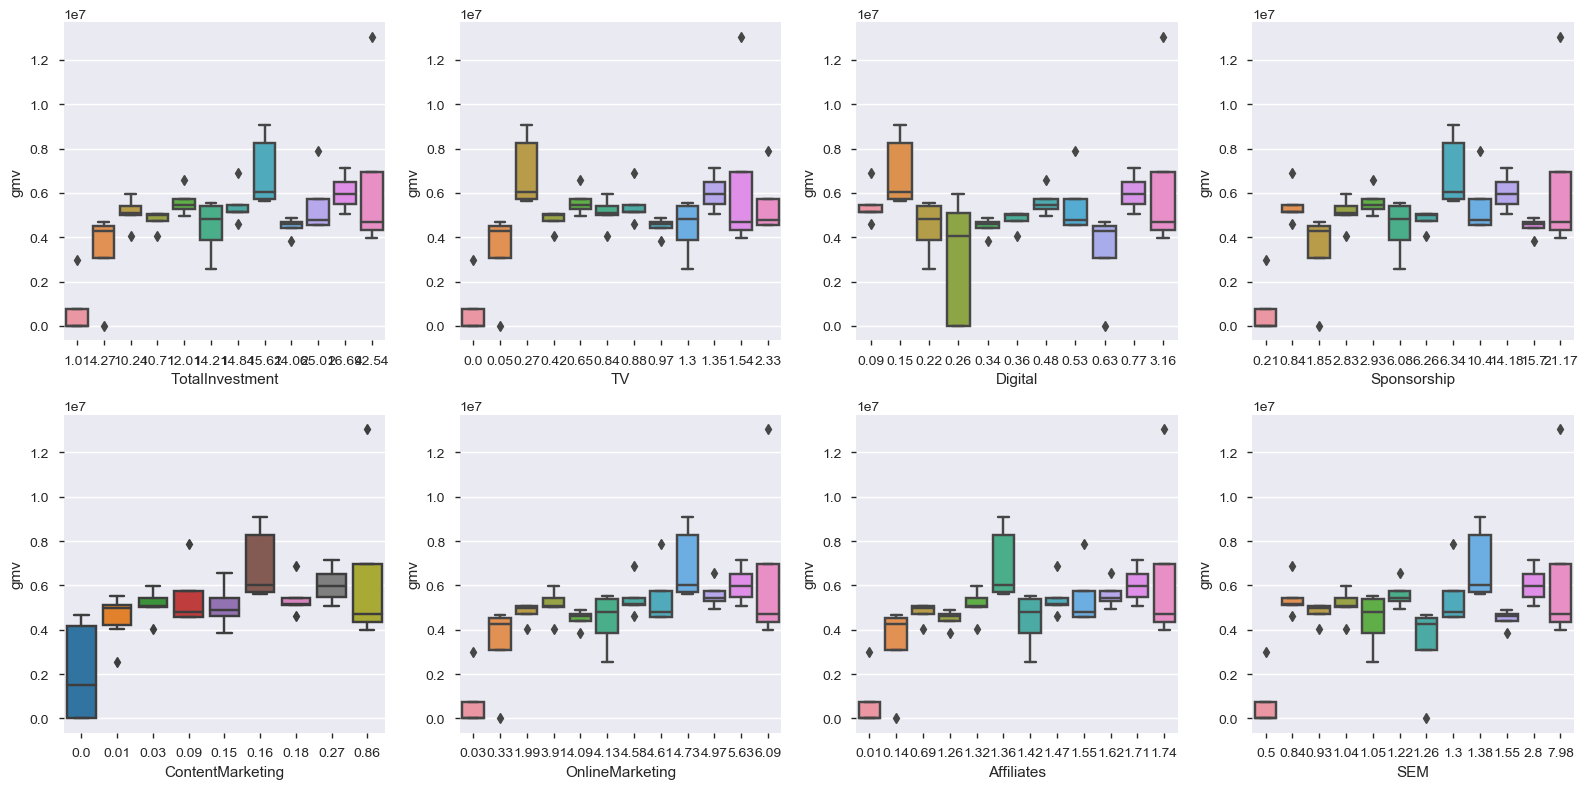

In [165]:
fig, axs = plt.subplots(2,4,figsize=(16,8))

plt1 = sns.boxplot(x = 'TotalInvestment', y = 'gmv', data = weeklycam_vis, ax = axs[0,0])

plt2 = sns.boxplot(x = 'TV', y = 'gmv', data = weeklycam_vis, ax = axs[0,1])

plt3 = sns.boxplot(x = 'Digital', y = 'gmv', data = weeklycam_vis, ax = axs[0,2])

plt4 = sns.boxplot(x = 'Sponsorship', y = 'gmv', data = weeklycam_vis, ax = axs[0,3])

plt5 = sns.boxplot(x = 'ContentMarketing', y = 'gmv', data = weeklycam_vis, ax = axs[1,0])

plt6 = sns.boxplot(x = 'OnlineMarketing', y = 'gmv', data = weeklycam_vis, ax = axs[1,1])

plt7 = sns.boxplot(x = 'Affiliates', y = 'gmv', data = weeklycam_vis, ax = axs[1,2])

plt8 = sns.boxplot(x = 'SEM', y = 'gmv', data = weeklycam_vis, ax = axs[1,3])

plt.tight_layout()

In [166]:
#bivariate analysis

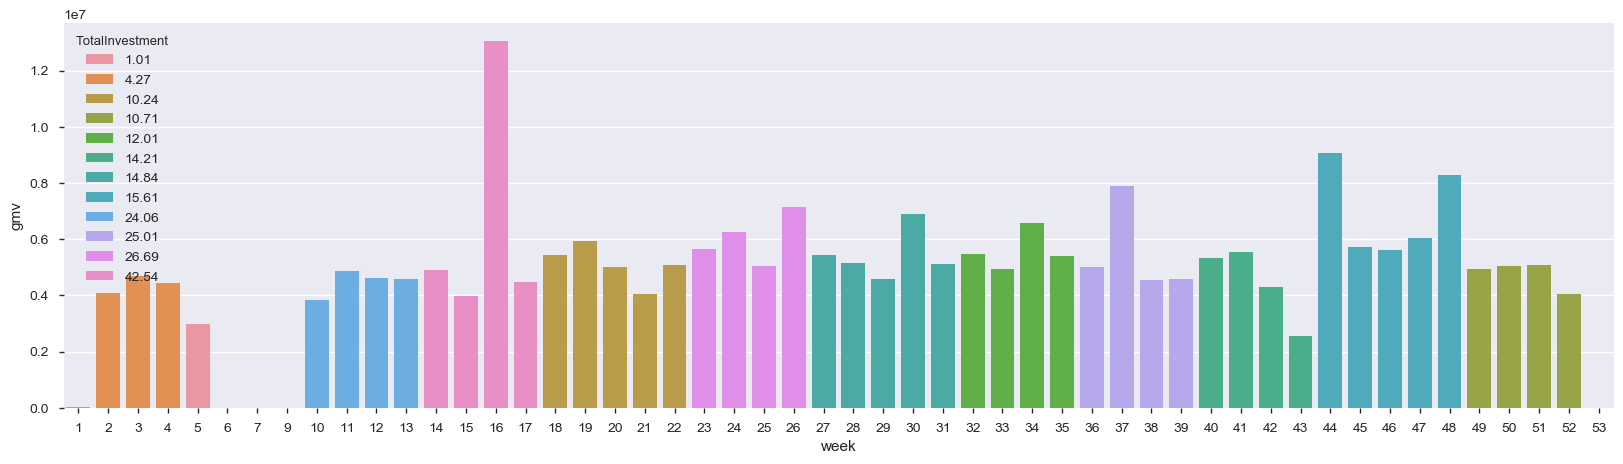

In [167]:
plt.figure(figsize=(20, 5))
sns.barplot(x= weeklycam_vis['week'], y =weeklycam_vis['gmv'], hue = weeklycam_vis['TotalInvestment'], dodge = False)
plt.show()

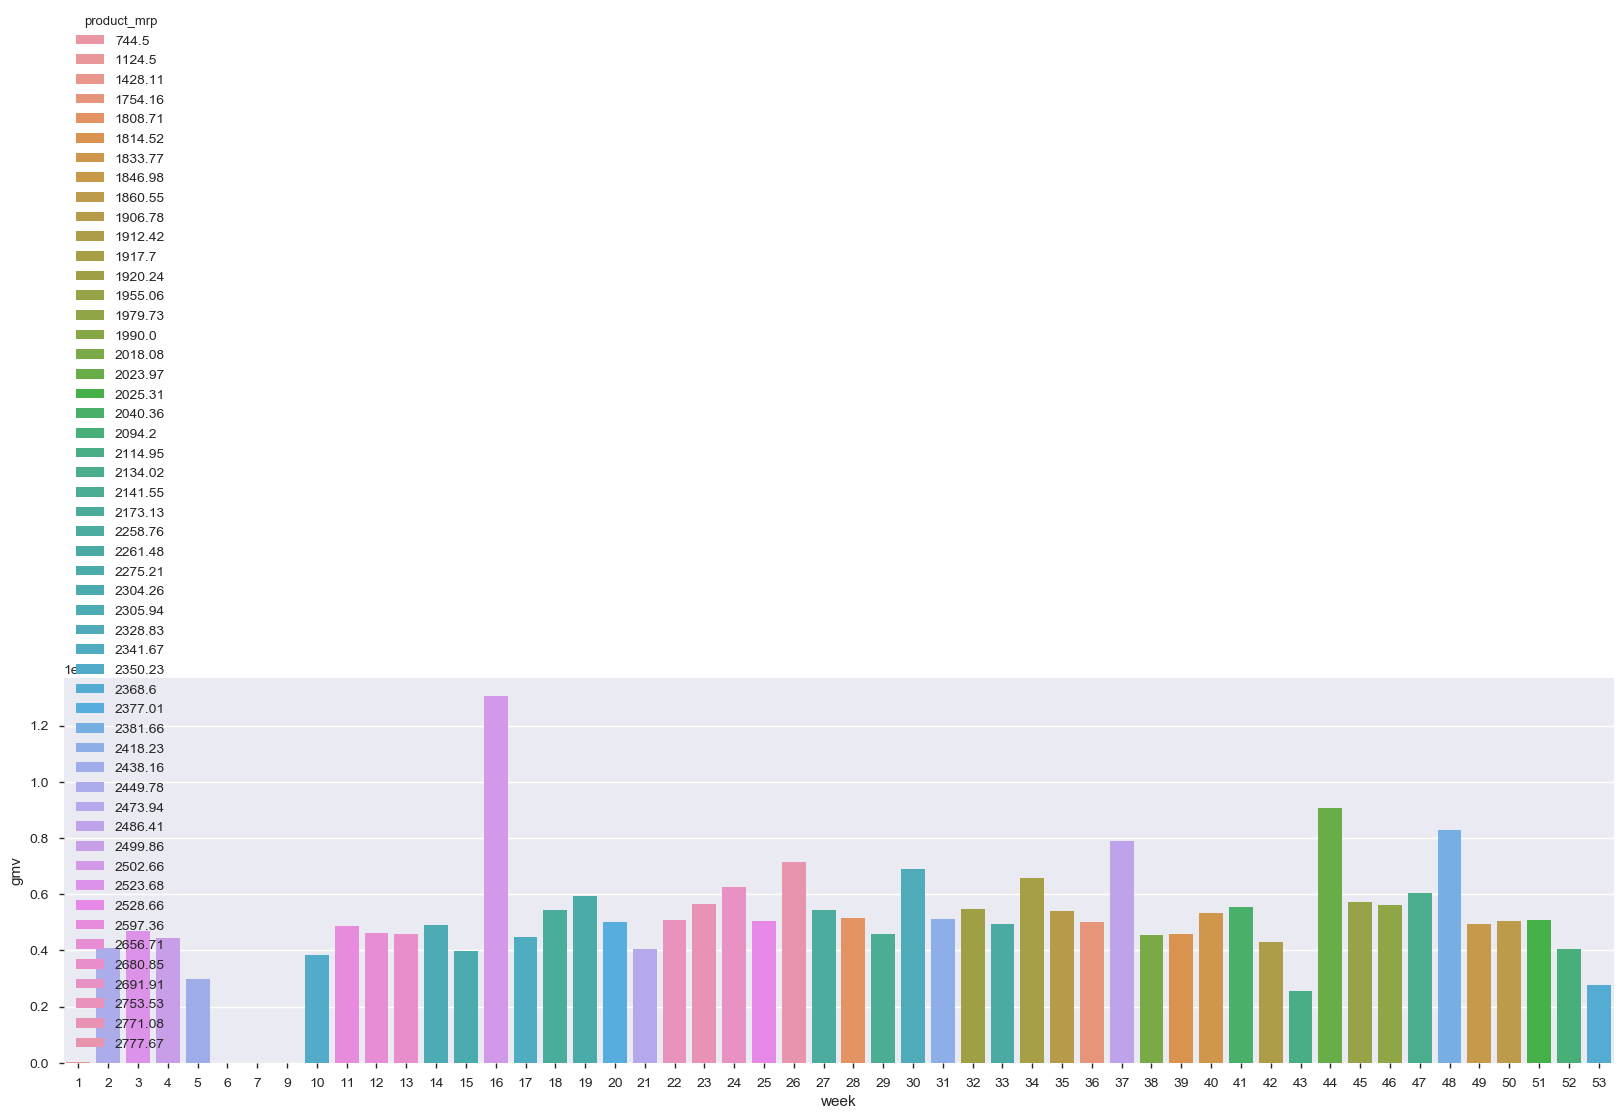

In [168]:
plt.figure(figsize=(20, 5))
sns.barplot(x= weeklycam_vis['week'], y =weeklycam_vis['gmv'], hue = weeklycam_vis['product_mrp'], dodge = False)
plt.show()

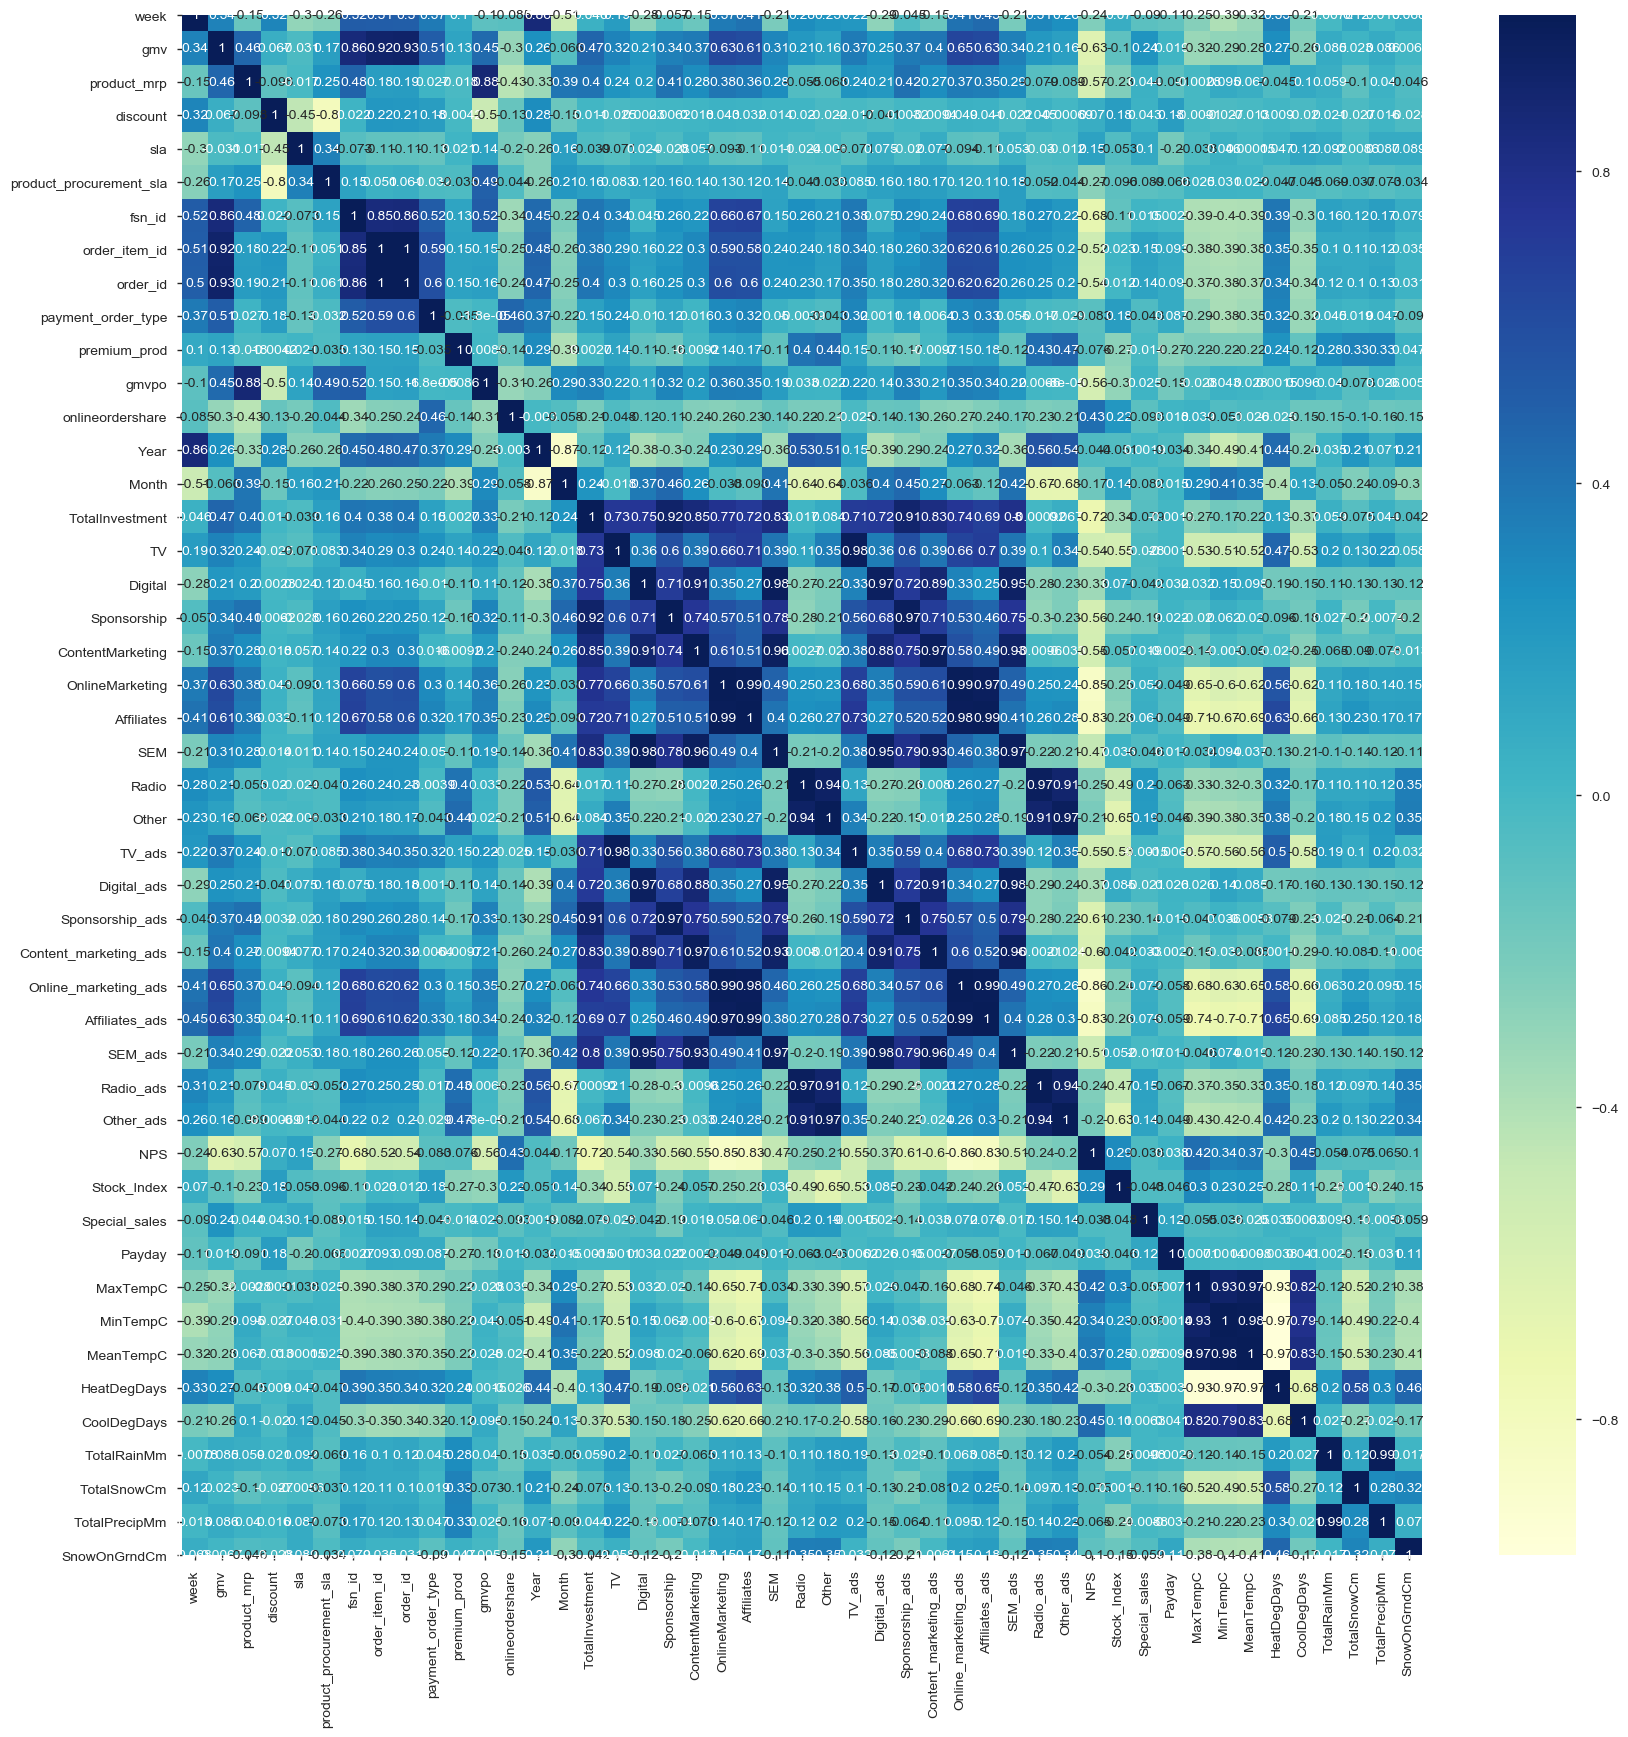

In [169]:
# ### To identify multicollinearity between variable - Correlation Map
plt.figure(figsize=(20,20))
sns.heatmap(weeklycam.corr(),annot = True, cmap="YlGnBu")
plt.show()

In [170]:
### Highly Correlated Columns should be dropped

weeklycam.drop(['TV', 'Digital', 'Sponsorship', 'ContentMarketing','OnlineMarketing', 'Affiliates', 'SEM','Radio',
              'Other'], axis = 1, inplace = True)

In [172]:
### Highly Correlated Columns should be dropped
weeklycam.drop(['Affiliates_ads','SEM_ads','Digital_ads','Radio_ads','Other_ads','MeanTempC','MinTempC',
              'order_id','order_item_id','TotalPrecipMm','TotalInvestment','MaxTempC'],1,inplace=True)

In [173]:
#Successfully removed columns having more than 90% correlation

In [388]:
### Lag of entities - Camera Accessories



weeklycam['lag1disc'] = weeklycam['discount'].shift(-1).fillna(0)
weeklycam['lag2disc'] = weeklycam['discount'].shift(-2).fillna(0)
weeklycam['lag3disc'] = weeklycam['discount'].shift(-3).fillna(0)

weeklycam['lag1NPS'] = weeklycam['NPS'].shift(-1).fillna(0)
weeklycam['lag2NPS'] = weeklycam['NPS'].shift(-2).fillna(0)
weeklycam['lag3NPS'] = weeklycam['NPS'].shift(-3).fillna(0)

weeklycam['lag1StockIndex'] = weeklycam['Stock_Index'].shift(-1).fillna(0)
weeklycam['lag2StockIndex'] = weeklycam['Stock_Index'].shift(-2).fillna(0)
weeklycam['lag3StockIndex'] = weeklycam['Stock_Index'].shift(-3).fillna(0)

weeklycam['lag1Ssales'] = weeklycam['Special_sales'].shift(-1).fillna(0)
weeklycam['lag2Ssales'] = weeklycam['Special_sales'].shift(-2).fillna(0)
weeklycam['lag3Ssales'] = weeklycam['Special_sales'].shift(-3).fillna(0)

weeklycam['lag1Pd'] = weeklycam['Payday'].shift(-1).fillna(0)
weeklycam['lag2Pd'] = weeklycam['Payday'].shift(-2).fillna(0)
weeklycam['lag3Pd'] = weeklycam['Payday'].shift(-3).fillna(0)

In [2]:
# Gaming Sub Category

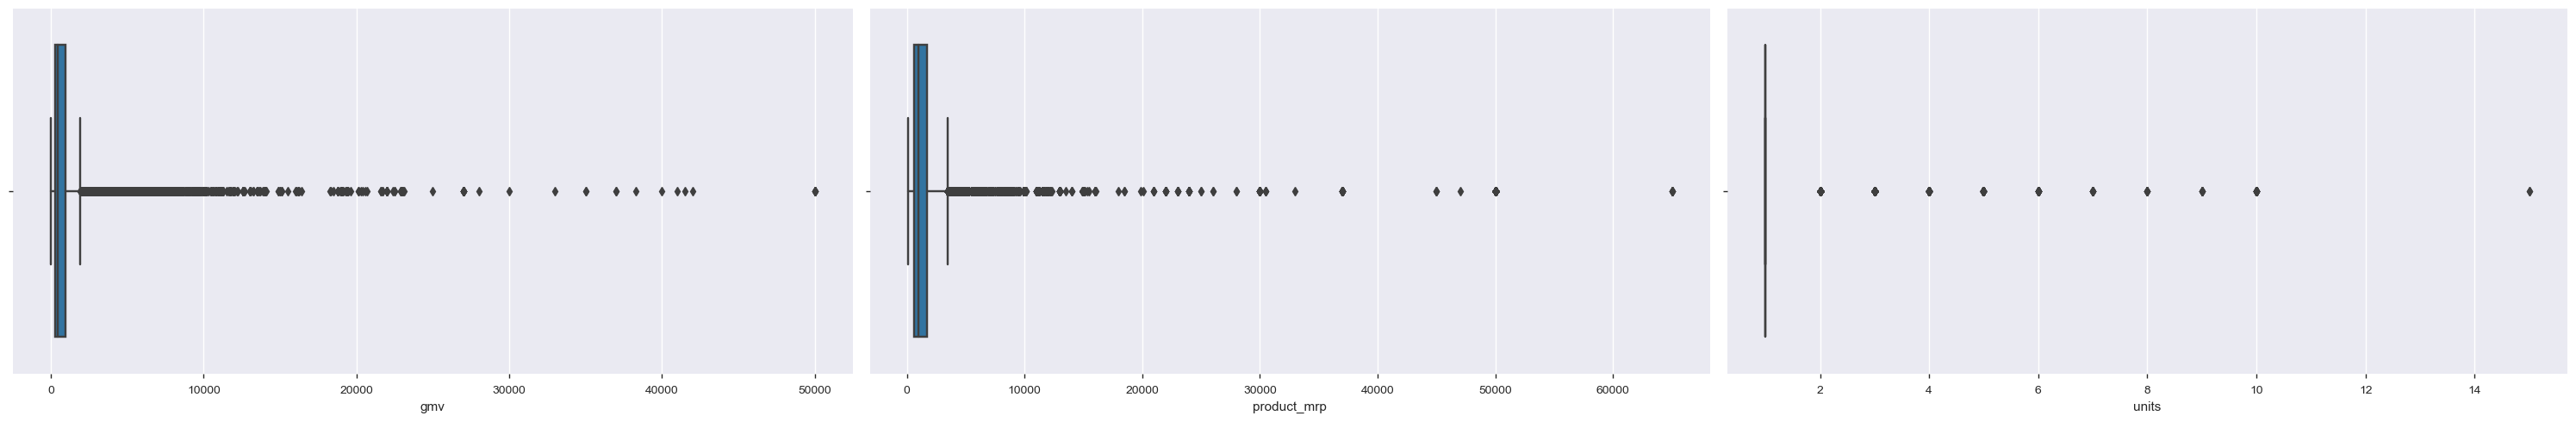

In [174]:
### Outlier Analysis
fig, axs = plt.subplots(1,3, figsize = (30,5))
plt1 = sns.boxplot(gamingacc['gmv'], ax = axs[0])
plt2 = sns.boxplot(gamingacc['units'], ax = axs[2])
plt3 = sns.boxplot(gamingacc['product_mrp'], ax = axs[1])
plt.tight_layout()

In [175]:
### Treating outliers
### Outlier treatment for gmv & product_mrp
Q1 = gamingacc.gmv.quantile(0.25)
Q3 = gamingacc.gmv.quantile(0.75)
IQR = Q3 - Q1
gamingacc = gamingacc[(gamingacc.gmv >= Q1 - 1.5*IQR) & (gamingacc.gmv <= Q3 + 1.5*IQR)]
Q1 = gamingacc.product_mrp.quantile(0.25)
Q3 = gamingacc.product_mrp.quantile(0.75)
IQR = Q3 - Q1
gamingacc = gamingacc[(gamingacc.product_mrp >= Q1 - 1.5*IQR) & (gamingacc.product_mrp <= Q3 + 1.5*IQR)]

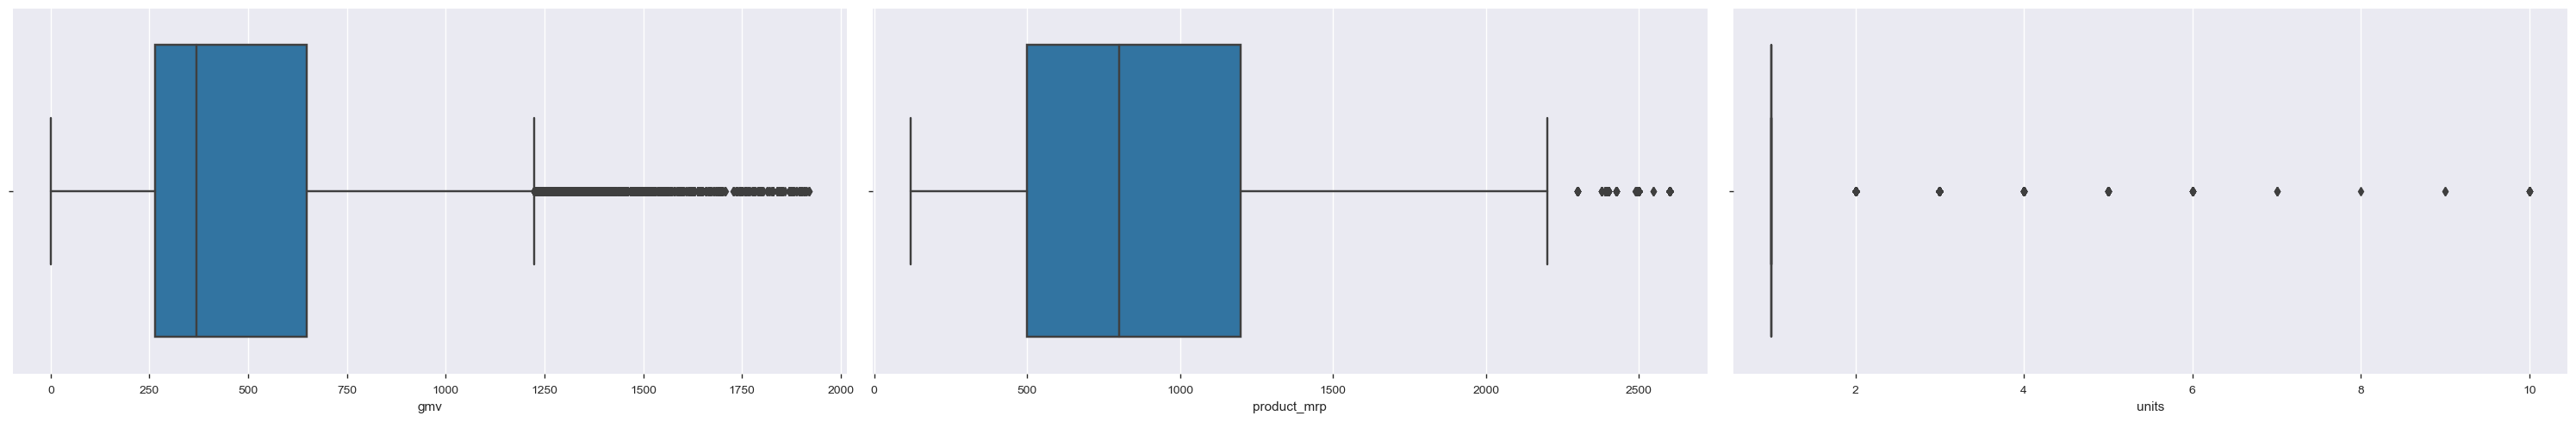

In [176]:
### Outlier Analysis
fig, axs = plt.subplots(1,3, figsize = (30,5))
plt1 = sns.boxplot(gamingacc['gmv'], ax = axs[0])
plt2 = sns.boxplot(gamingacc['units'], ax = axs[2])
plt3 = sns.boxplot(gamingacc['product_mrp'], ax = axs[1])
plt.tight_layout()

In [177]:
gamingacc.columns

Index(['fsn_id', 'order_date', 'Year', 'Month', 'order_id', 'order_item_id',
       'gmv', 'units', 'payment_order_type', 'sla',
       'product_analytic_category', 'product_analytic_sub_category',
       'product_mrp', 'product_procurement_sla', 'gmv_per_units', 'discount',
       'Order_Item_Value', 'week', 'premium_prod'],
      dtype='object')

In [178]:
### Aggregating dataset on weekly level

weeklygam = pd.DataFrame(gamingacc.groupby('week').agg({'gmv':'sum',
                                                             'product_mrp':'mean','discount':'mean',
                                                             'sla':'mean','product_procurement_sla':'mean',
                                                             'fsn_id':pd.Series.nunique,'order_item_id':pd.Series.nunique,
                                                             'order_id': pd.Series.nunique,
                                                             'payment_order_type':'sum'}))

weeklygam.reset_index( inplace = True)

In [179]:
### Sum of GMV / No of unique Orders

weeklygam['gmvpo'] = weeklygam['gmv']/weeklygam['order_id']

In [180]:

#KPI
weeklygam['onlineordershare'] = weeklygam['payment_order_type']*100/weeklygam['order_item_id']

In [181]:
weeklygam = weeklygam.merge(media_inv, how = 'left', on = 'week')

In [182]:
weeklygam = weeklygam.merge(sales_calendar, how = 'left', on = 'week')

In [183]:
#EDA - Gaming Accessories

In [184]:
weeklygam_vis = weeklygam.round(2)

In [185]:
#Univariate analysis

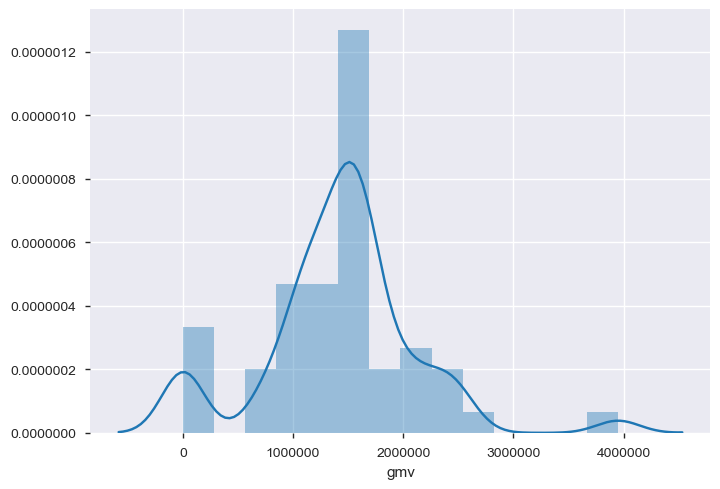

In [186]:
#GMV distribution
sns.distplot(weeklygam_vis['gmv'],kde=True)

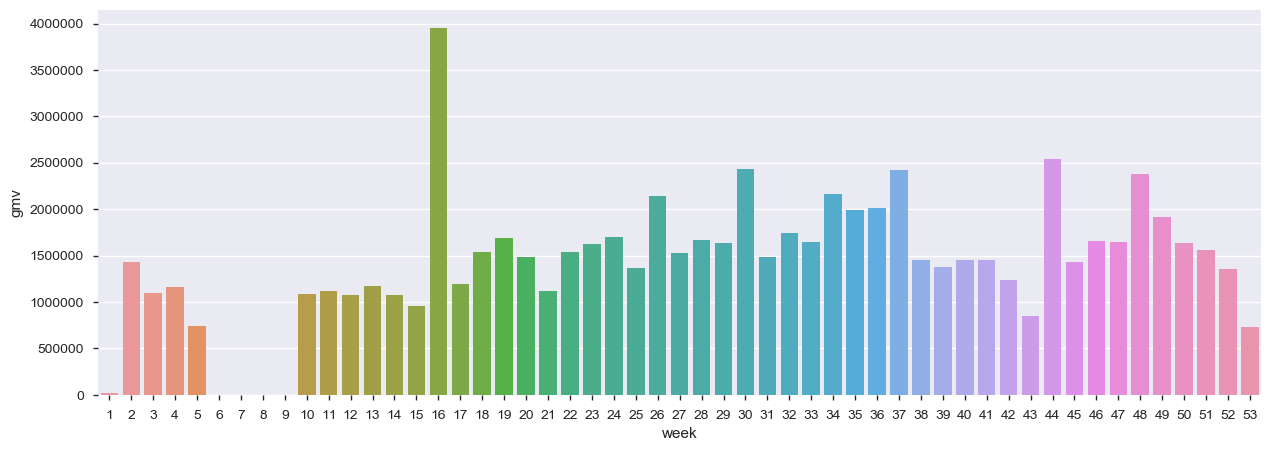

In [187]:
#weekly GMV
plt.figure(figsize=(15, 5))
sns.barplot(weeklygam_vis['week'],weeklygam_vis['gmv'])

In [188]:
weeklygam_vis.columns

Index(['week', 'gmv', 'product_mrp', 'discount', 'sla',
       'product_procurement_sla', 'fsn_id', 'order_item_id', 'order_id',
       'payment_order_type', 'gmvpo', 'onlineordershare', 'Date', 'Year',
       'Month', 'TotalInvestment', 'TV', 'Digital', 'Sponsorship',
       'ContentMarketing', 'OnlineMarketing', 'Affiliates', 'SEM', 'Radio',
       'Other', 'TV_ads', 'Digital_ads', 'Sponsorship_ads',
       'Content_marketing_ads', 'Online_marketing_ads', 'Affiliates_ads',
       'SEM_ads', 'Radio_ads', 'Other_ads', 'NPS', 'Stock_Index',
       'Special_sales', 'Payday', 'MaxTempC', 'MinTempC', 'MeanTempC',
       'HeatDegDays', 'CoolDegDays', 'TotalRainMm', 'TotalSnowCm',
       'TotalPrecipMm', 'SnowOnGrndCm'],
      dtype='object')

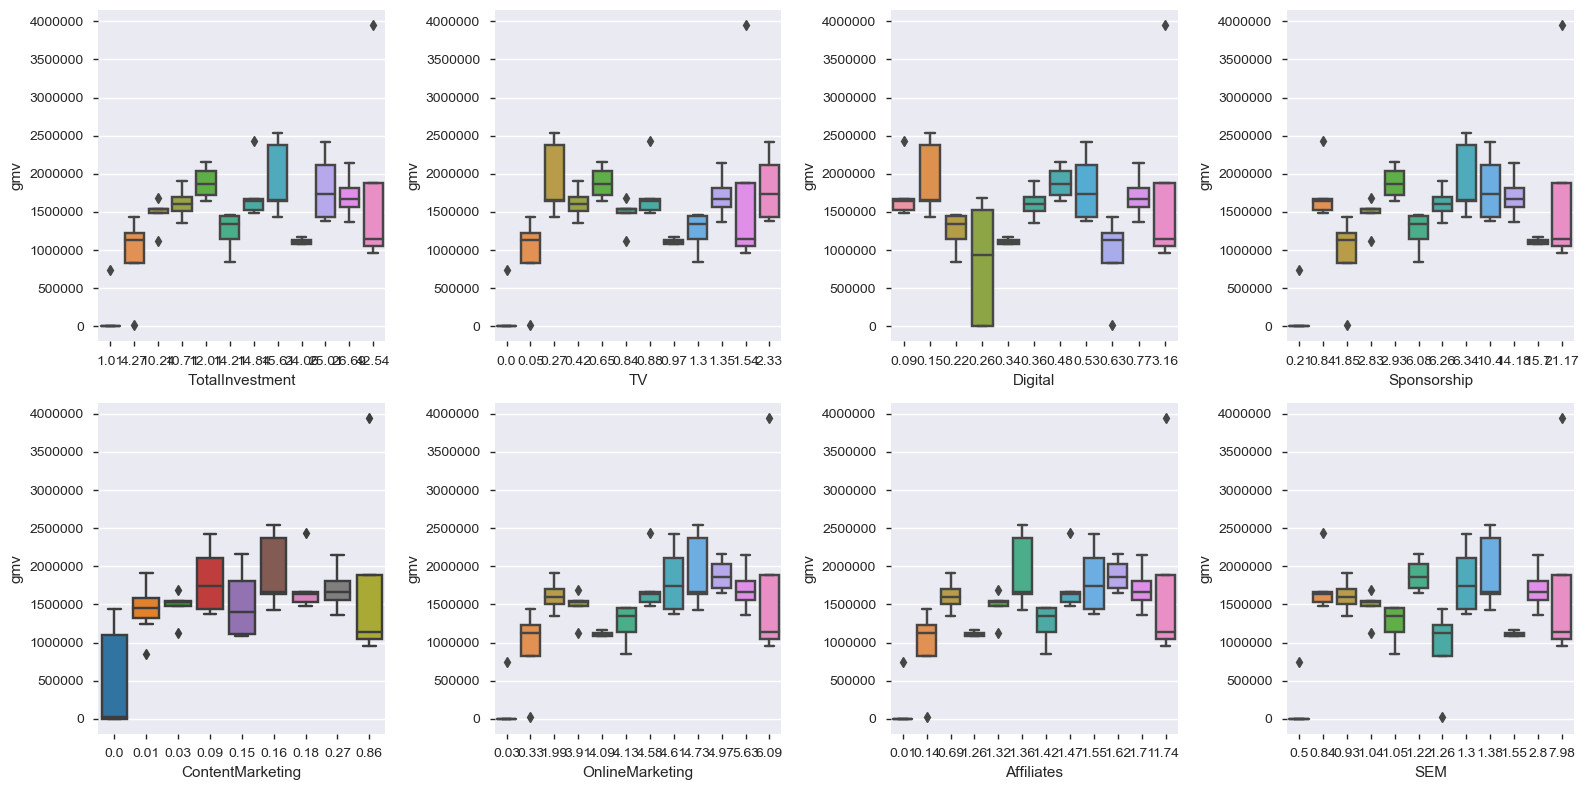

In [189]:
fig, axs = plt.subplots(2,4,figsize=(16,8))

plt1 = sns.boxplot(x = 'TotalInvestment', y = 'gmv', data = weeklygam_vis, ax = axs[0,0])

plt2 = sns.boxplot(x = 'TV', y = 'gmv', data = weeklygam_vis, ax = axs[0,1])

plt3 = sns.boxplot(x = 'Digital', y = 'gmv', data = weeklygam_vis, ax = axs[0,2])

plt4 = sns.boxplot(x = 'Sponsorship', y = 'gmv', data = weeklygam_vis, ax = axs[0,3])

plt5 = sns.boxplot(x = 'ContentMarketing', y = 'gmv', data = weeklygam_vis, ax = axs[1,0])

plt6 = sns.boxplot(x = 'OnlineMarketing', y = 'gmv', data = weeklygam_vis, ax = axs[1,1])

plt7 = sns.boxplot(x = 'Affiliates', y = 'gmv', data = weeklygam_vis, ax = axs[1,2])

plt8 = sns.boxplot(x = 'SEM', y = 'gmv', data = weeklygam_vis, ax = axs[1,3])

plt.tight_layout()

In [190]:
#Bivariate ANalysis

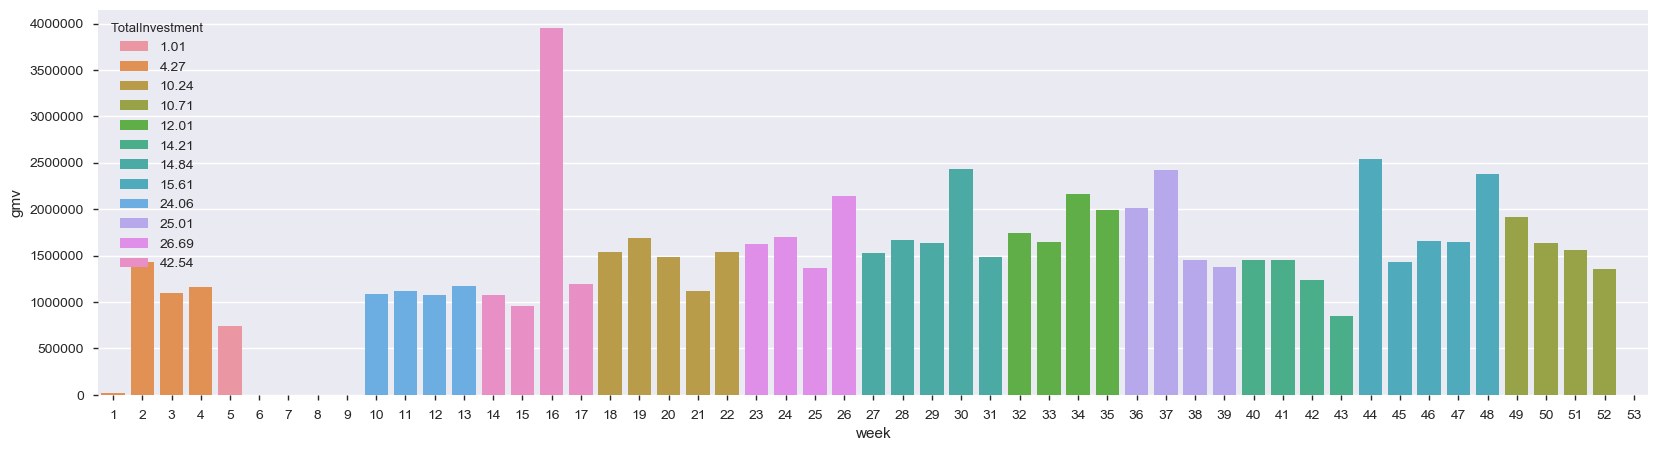

In [191]:
plt.figure(figsize=(20, 5))
sns.barplot(x= weeklygam_vis['week'], y =weeklygam_vis['gmv'], hue = weeklygam_vis['TotalInvestment'], dodge = False)
plt.show()

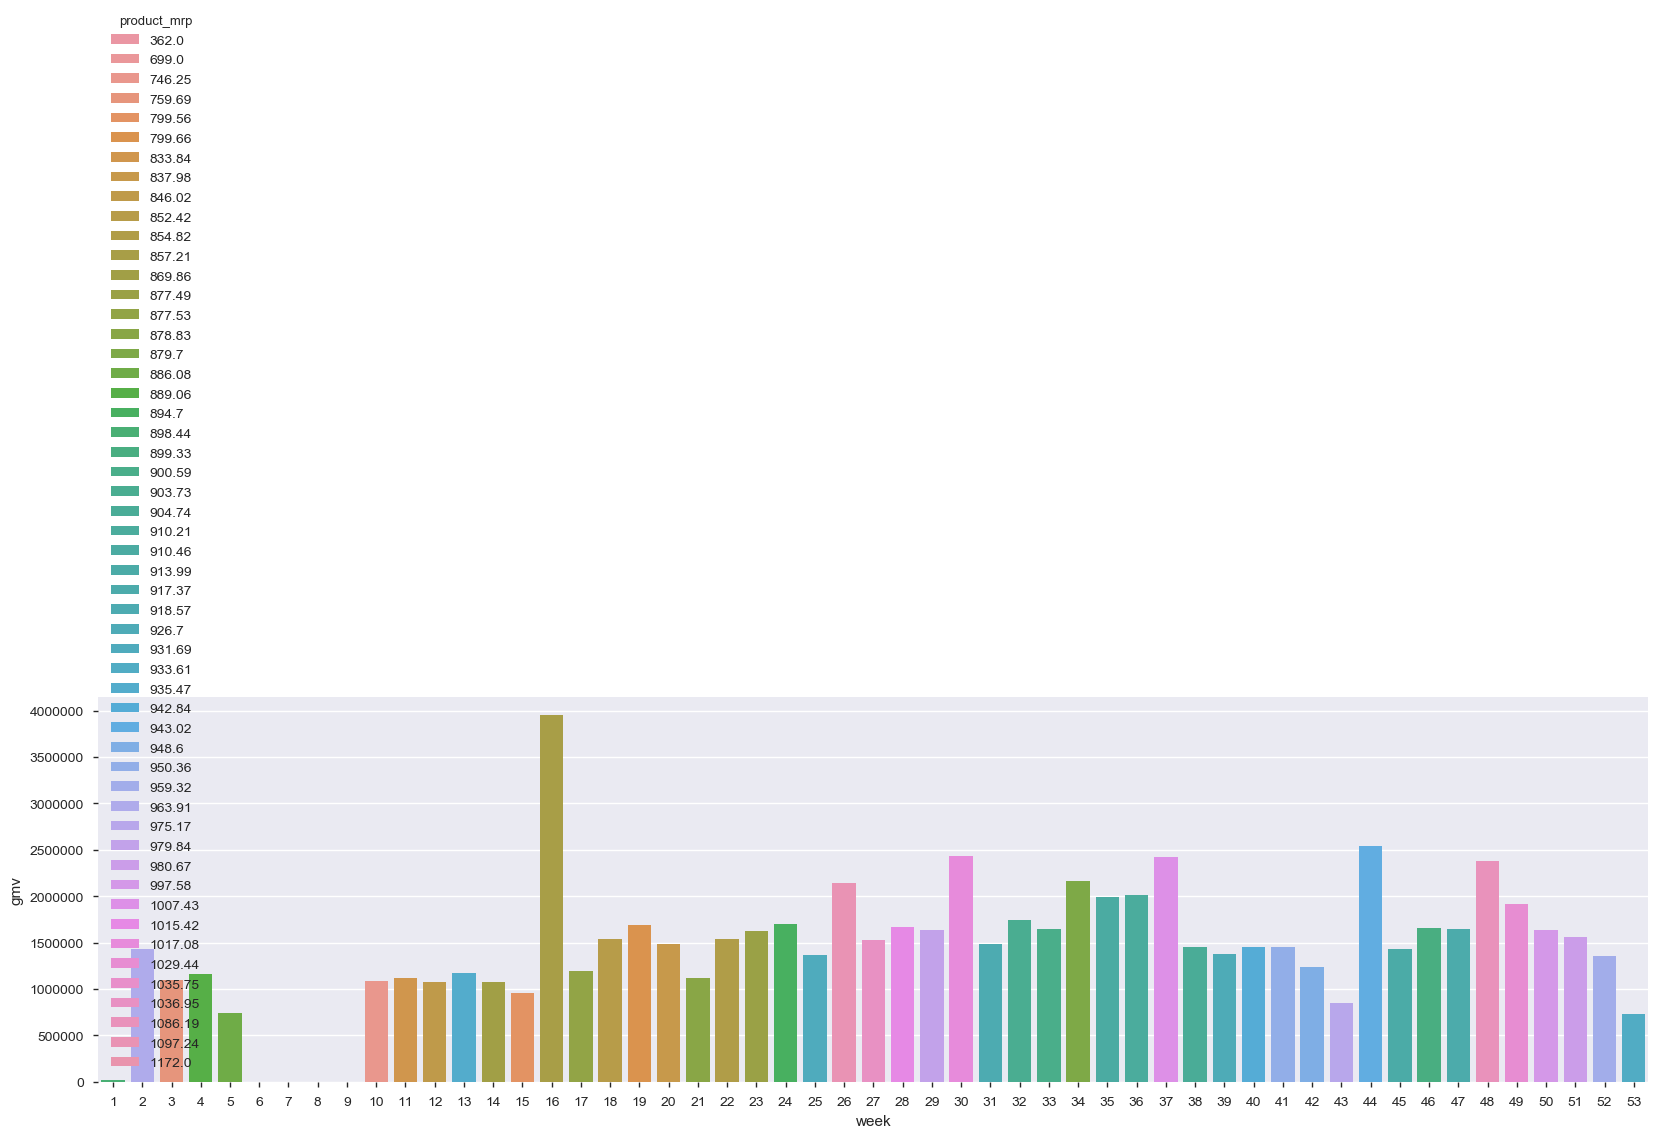

In [192]:
plt.figure(figsize=(20, 5))
sns.barplot(x= weeklygam_vis['week'], y =weeklygam_vis['gmv'], hue = weeklygam_vis['product_mrp'], dodge = False)
plt.show()

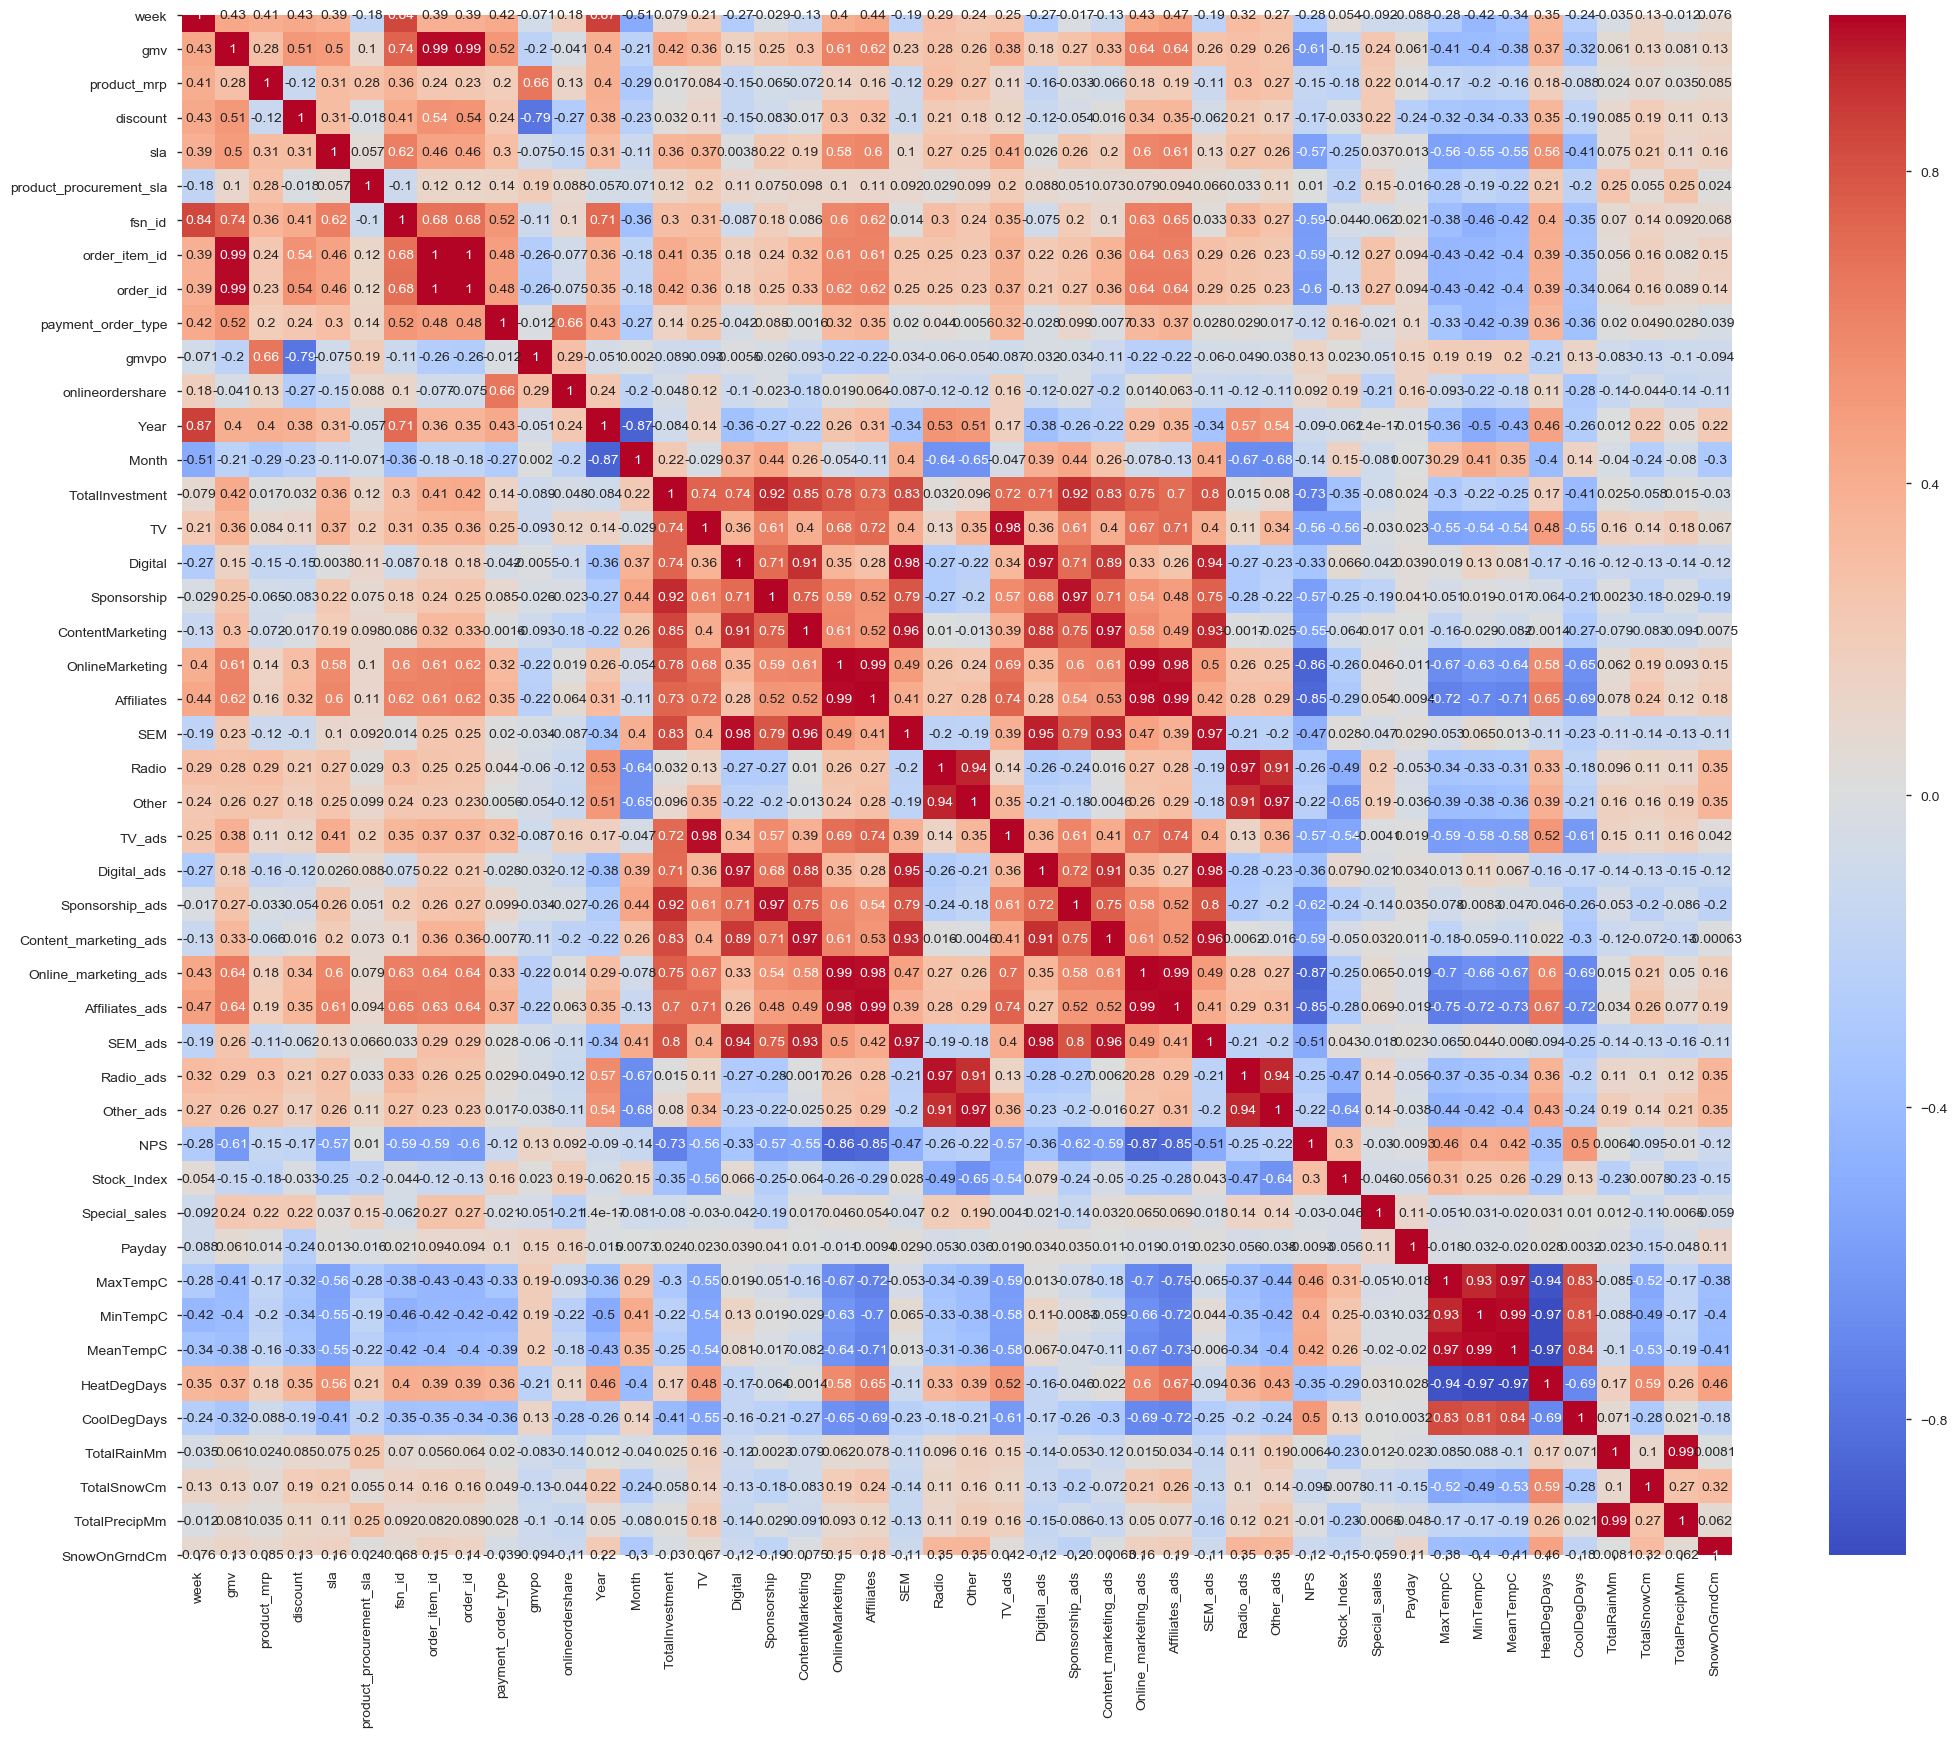

In [193]:
plt.figure(figsize=(25,20))

### Correlation Heatmap
sns.heatmap(weeklygam.corr(), cmap="coolwarm", annot=True)
plt.show()

In [194]:
weeklygam.drop(['TV', 'Digital', 'Sponsorship', 'ContentMarketing','OnlineMarketing', 'Affiliates', 'SEM','Radio',
              'Other','Affiliates_ads','SEM_ads','Digital_ads','Radio_ads','Other_ads','MeanTempC','MinTempC',
              'order_id','order_item_id','TotalPrecipMm','TotalInvestment','MaxTempC'], axis = 1, inplace = True)

In [195]:
###  Successfully removed more than 90% highly correlated variables from dataset.

In [387]:
### Lag of entities - GAming Accessories



weeklygam['lag1disc'] = weeklygam['discount'].shift(-1).fillna(0)
weeklygam['lag2disc'] = weeklygam['discount'].shift(-2).fillna(0)
weeklygam['lag3disc'] = weeklygam['discount'].shift(-3).fillna(0)

weeklygam['lag1NPS'] = weeklygam['NPS'].shift(-1).fillna(0)
weeklygam['lag2NPS'] = weeklygam['NPS'].shift(-2).fillna(0)
weeklygam['lag3NPS'] = weeklygam['NPS'].shift(-3).fillna(0)

weeklygam['lag1StockIndex'] = weeklygam['Stock_Index'].shift(-1).fillna(0)
weeklygam['lag2StockIndex'] = weeklygam['Stock_Index'].shift(-2).fillna(0)
weeklygam['lag3StockIndex'] = weeklygam['Stock_Index'].shift(-3).fillna(0)

weeklygam['lag1Ssales'] = weeklygam['Special_sales'].shift(-1).fillna(0)
weeklygam['lag2Ssales'] = weeklygam['Special_sales'].shift(-2).fillna(0)
weeklygam['lag3Ssales'] = weeklygam['Special_sales'].shift(-3).fillna(0)

weeklygam['lag1Pd'] = weeklycam['Payday'].shift(-1).fillna(0)
weeklygam['lag2Pd'] = weeklygam['Payday'].shift(-2).fillna(0)
weeklygam['lag3Pd'] = weeklygam['Payday'].shift(-3).fillna(0)

In [197]:
#HomeAudio Subcategory

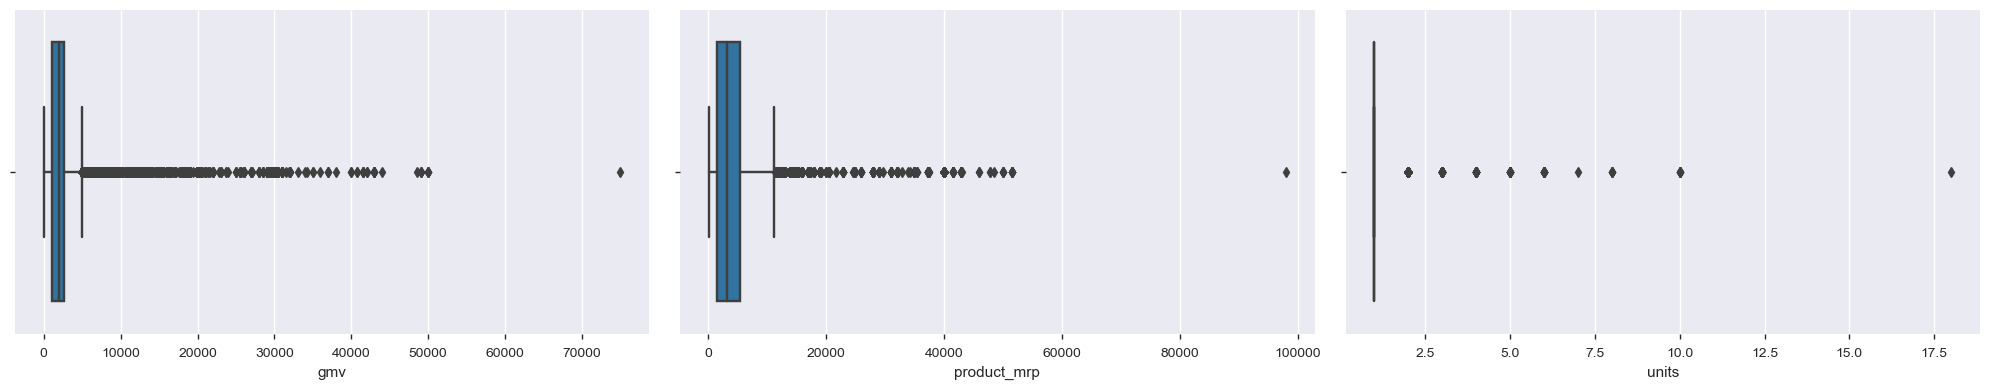

In [198]:
### Outlier Analysis
fig, axs = plt.subplots(1,3, figsize = (20,4))
plt1 = sns.boxplot(homeaudio['gmv'], ax = axs[0])
plt2 = sns.boxplot(homeaudio['units'], ax = axs[2])
plt3 = sns.boxplot(homeaudio['product_mrp'], ax = axs[1])
plt.tight_layout()

In [199]:
### Treating outliers
### Outlier treatment for gmv & product_mrp
Q1 = homeaudio.gmv.quantile(0.25)
Q3 = homeaudio.gmv.quantile(0.75)
IQR = Q3 - Q1
home_audio = homeaudio[(homeaudio.gmv >= Q1 - 1.5*IQR) & (homeaudio.gmv <= Q3 + 1.5*IQR)]
Q1 = homeaudio.product_mrp.quantile(0.25)
Q3 = homeaudio.product_mrp.quantile(0.75)
IQR = Q3 - Q1
homeaudio = homeaudio[(homeaudio.product_mrp >= Q1 - 1.5*IQR) & (homeaudio.product_mrp <= Q3 + 1.5*IQR)]

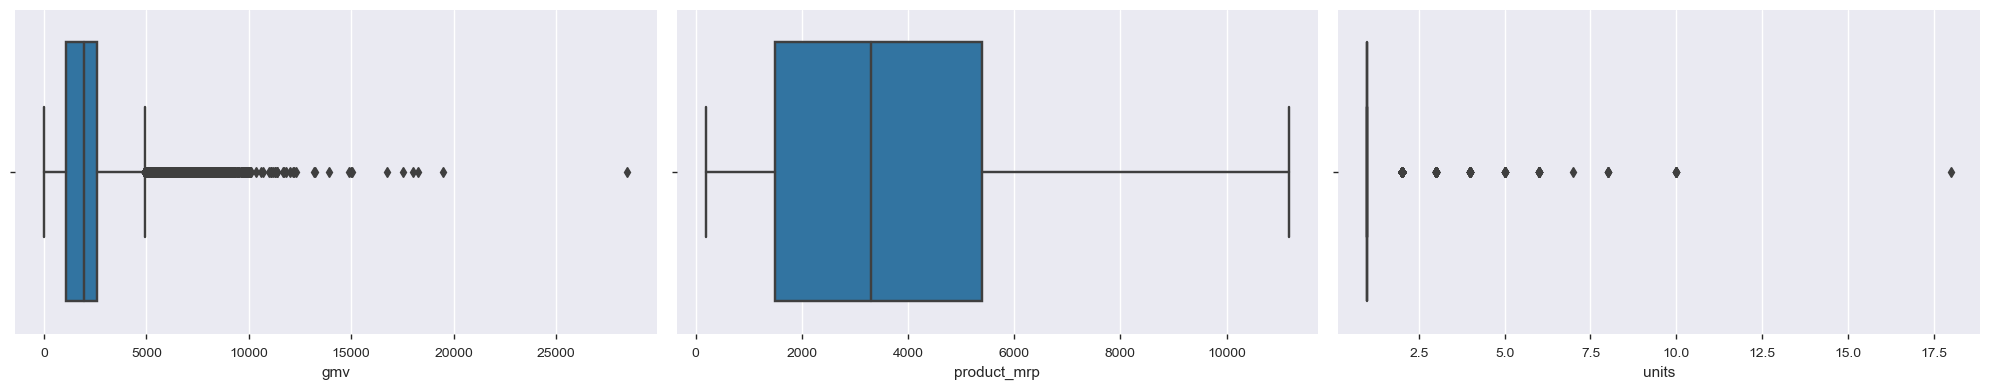

In [200]:
### Outlier Analysis
fig, axs = plt.subplots(1,3, figsize = (20,4))
plt1 = sns.boxplot(homeaudio['gmv'], ax = axs[0])
plt2 = sns.boxplot(homeaudio['units'], ax = axs[2])
plt3 = sns.boxplot(homeaudio['product_mrp'], ax = axs[1])
plt.tight_layout()

In [201]:
homeaudio.columns

Index(['fsn_id', 'order_date', 'Year', 'Month', 'order_id', 'order_item_id',
       'gmv', 'units', 'payment_order_type', 'sla',
       'product_analytic_category', 'product_analytic_sub_category',
       'product_mrp', 'product_procurement_sla', 'gmv_per_units', 'discount',
       'Order_Item_Value', 'week', 'premium_prod'],
      dtype='object')

In [202]:
### Aggregating dataset on weekly level

weeklyhome = pd.DataFrame(homeaudio.groupby('week').agg({'gmv':'sum',
                                                             'product_mrp':'mean','discount':'mean',
                                                             'sla':'mean','product_procurement_sla':'mean',
                                                             'fsn_id':pd.Series.nunique,'order_item_id':pd.Series.nunique,
                                                             'order_id': pd.Series.nunique,
                                                             'payment_order_type':'sum'}))

weeklyhome.reset_index( inplace = True)

In [203]:
### Sum of GMV / No of unique Orders

weeklyhome['gmvpo'] = weeklyhome['gmv']/weeklyhome['order_id']

In [204]:
weeklyhome['onlineordershare'] = weeklyhome['payment_order_type']*100/weeklyhome['order_item_id']

In [205]:
weeklyhome = weeklyhome.merge(media_inv, how = 'left', on = 'week')

In [206]:
weeklyhome = weeklyhome.merge(sales_calendar, how = 'left', on = 'week')

In [207]:
#EDA - Home Audio 

In [208]:
weeklyhome_vis = weeklyhome.round(2)

In [209]:
#Univariate Analysis

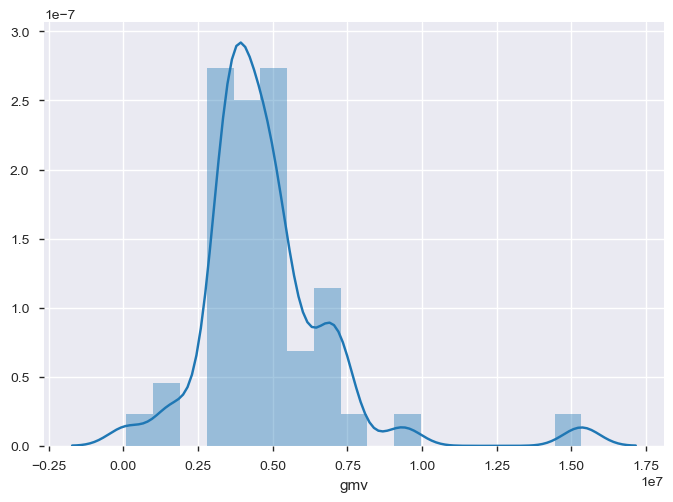

In [210]:
sns.distplot(weeklyhome_vis['gmv'],kde=True)

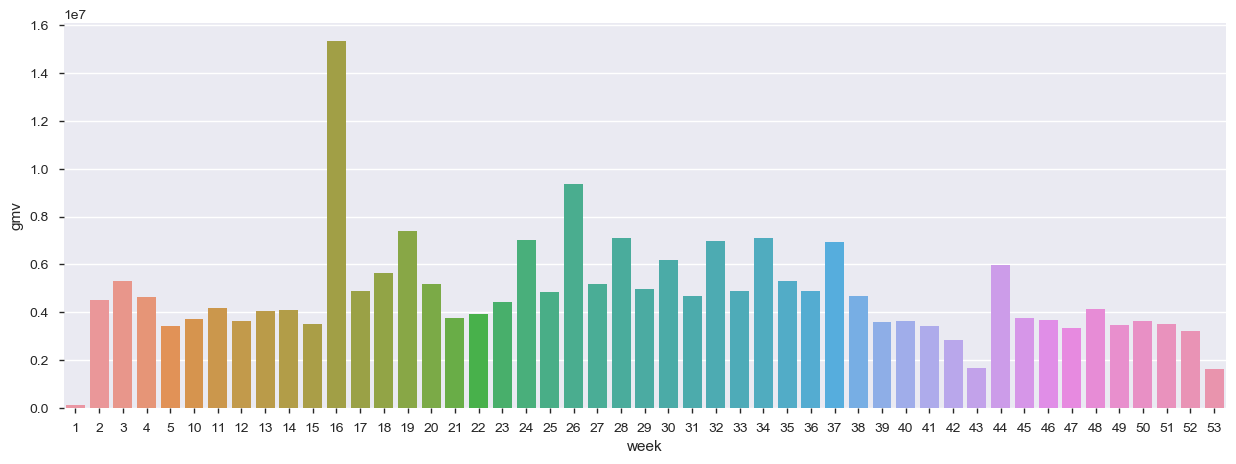

In [211]:
plt.figure(figsize=(15, 5))
sns.barplot(weeklyhome_vis['week'],weeklyhome_vis['gmv'])

In [212]:
weeklyhome_vis.columns

Index(['week', 'gmv', 'product_mrp', 'discount', 'sla',
       'product_procurement_sla', 'fsn_id', 'order_item_id', 'order_id',
       'payment_order_type', 'gmvpo', 'onlineordershare', 'Date', 'Year',
       'Month', 'TotalInvestment', 'TV', 'Digital', 'Sponsorship',
       'ContentMarketing', 'OnlineMarketing', 'Affiliates', 'SEM', 'Radio',
       'Other', 'TV_ads', 'Digital_ads', 'Sponsorship_ads',
       'Content_marketing_ads', 'Online_marketing_ads', 'Affiliates_ads',
       'SEM_ads', 'Radio_ads', 'Other_ads', 'NPS', 'Stock_Index',
       'Special_sales', 'Payday', 'MaxTempC', 'MinTempC', 'MeanTempC',
       'HeatDegDays', 'CoolDegDays', 'TotalRainMm', 'TotalSnowCm',
       'TotalPrecipMm', 'SnowOnGrndCm'],
      dtype='object')

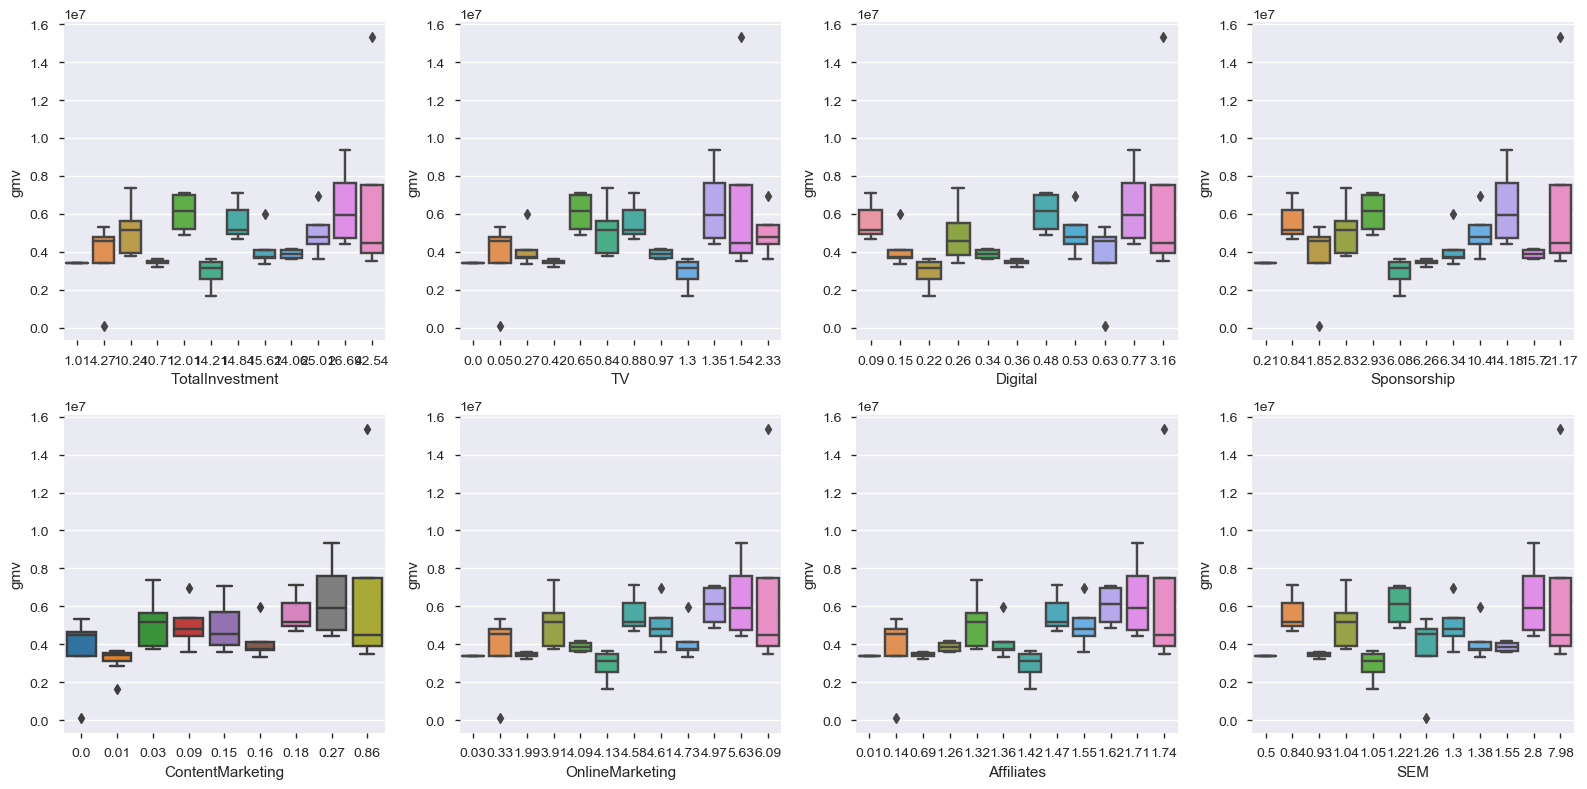

In [213]:
fig, axs = plt.subplots(2,4,figsize=(16,8))

plt1 = sns.boxplot(x = 'TotalInvestment', y = 'gmv', data = weeklyhome_vis, ax = axs[0,0])

plt2 = sns.boxplot(x = 'TV', y = 'gmv', data = weeklyhome_vis, ax = axs[0,1])

plt3 = sns.boxplot(x = 'Digital', y = 'gmv', data = weeklyhome_vis, ax = axs[0,2])

plt4 = sns.boxplot(x = 'Sponsorship', y = 'gmv', data = weeklyhome_vis, ax = axs[0,3])

plt5 = sns.boxplot(x = 'ContentMarketing', y = 'gmv', data = weeklyhome_vis, ax = axs[1,0])

plt6 = sns.boxplot(x = 'OnlineMarketing', y = 'gmv', data = weeklyhome_vis, ax = axs[1,1])

plt7 = sns.boxplot(x = 'Affiliates', y = 'gmv', data = weeklyhome_vis, ax = axs[1,2])

plt8 = sns.boxplot(x = 'SEM', y = 'gmv', data = weeklyhome_vis, ax = axs[1,3])

plt.tight_layout()

In [214]:
#Bivariate Analyis

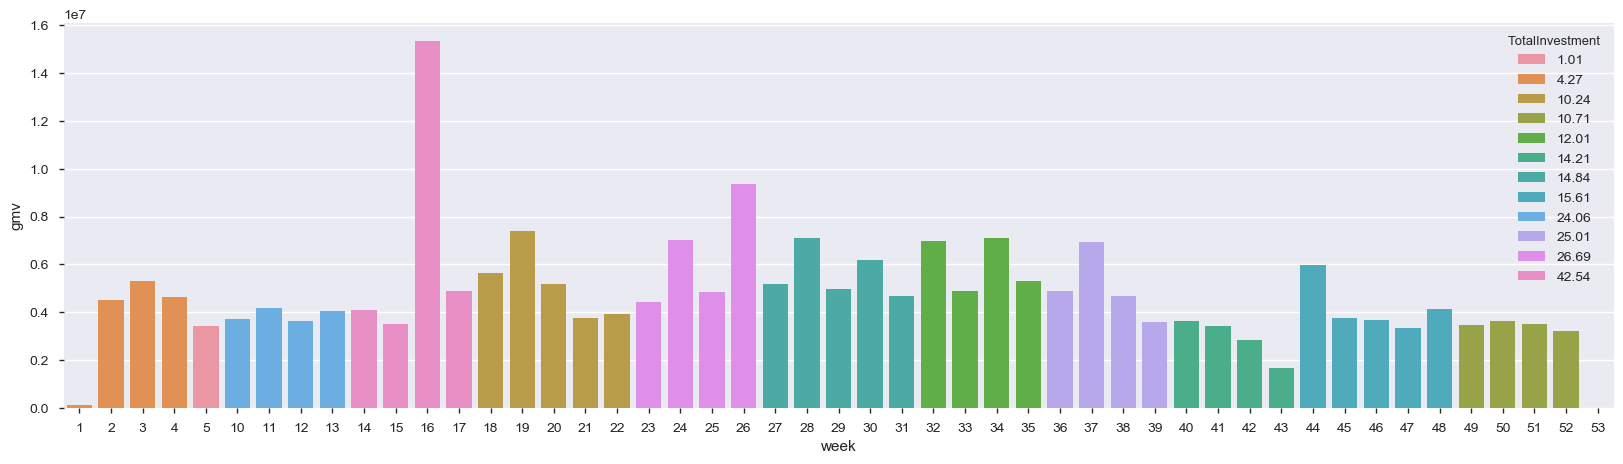

In [215]:
plt.figure(figsize=(20, 5))
sns.barplot(x= weeklyhome_vis['week'], y =weeklyhome_vis['gmv'], hue = weeklyhome_vis['TotalInvestment'], dodge = False)
plt.show()

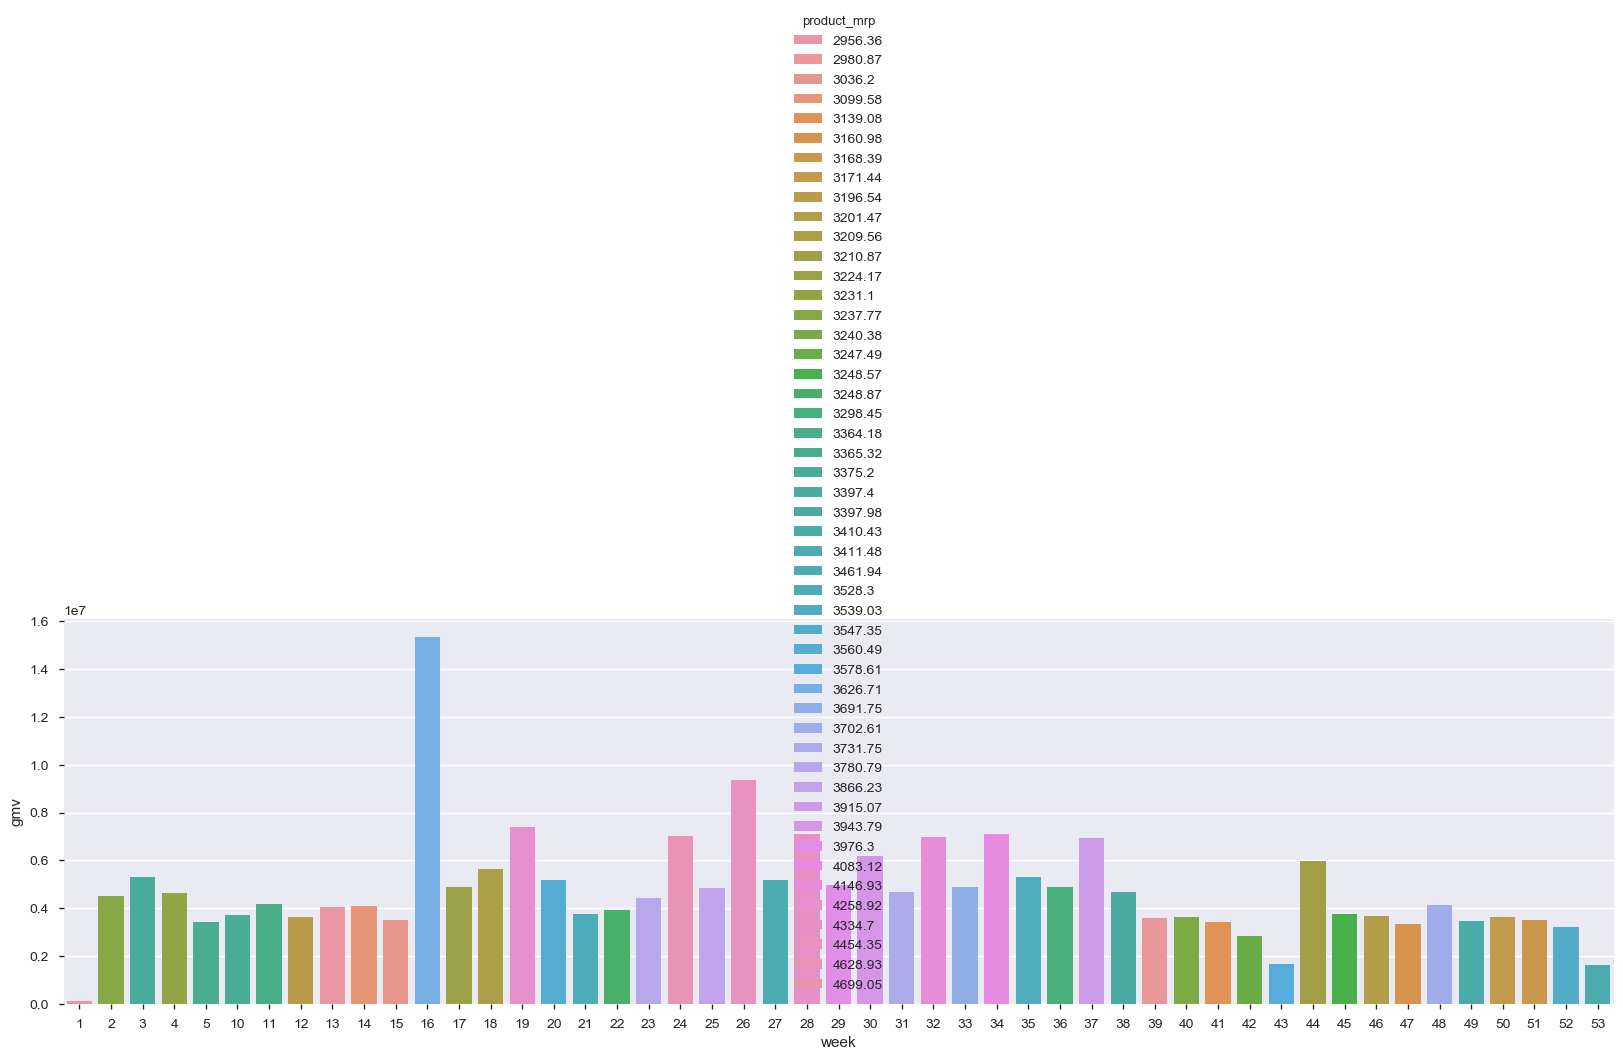

In [216]:
plt.figure(figsize=(20, 5))
sns.barplot(x= weeklyhome_vis['week'], y =weeklyhome_vis['gmv'], hue = weeklyhome_vis['product_mrp'], dodge = False)
plt.show()

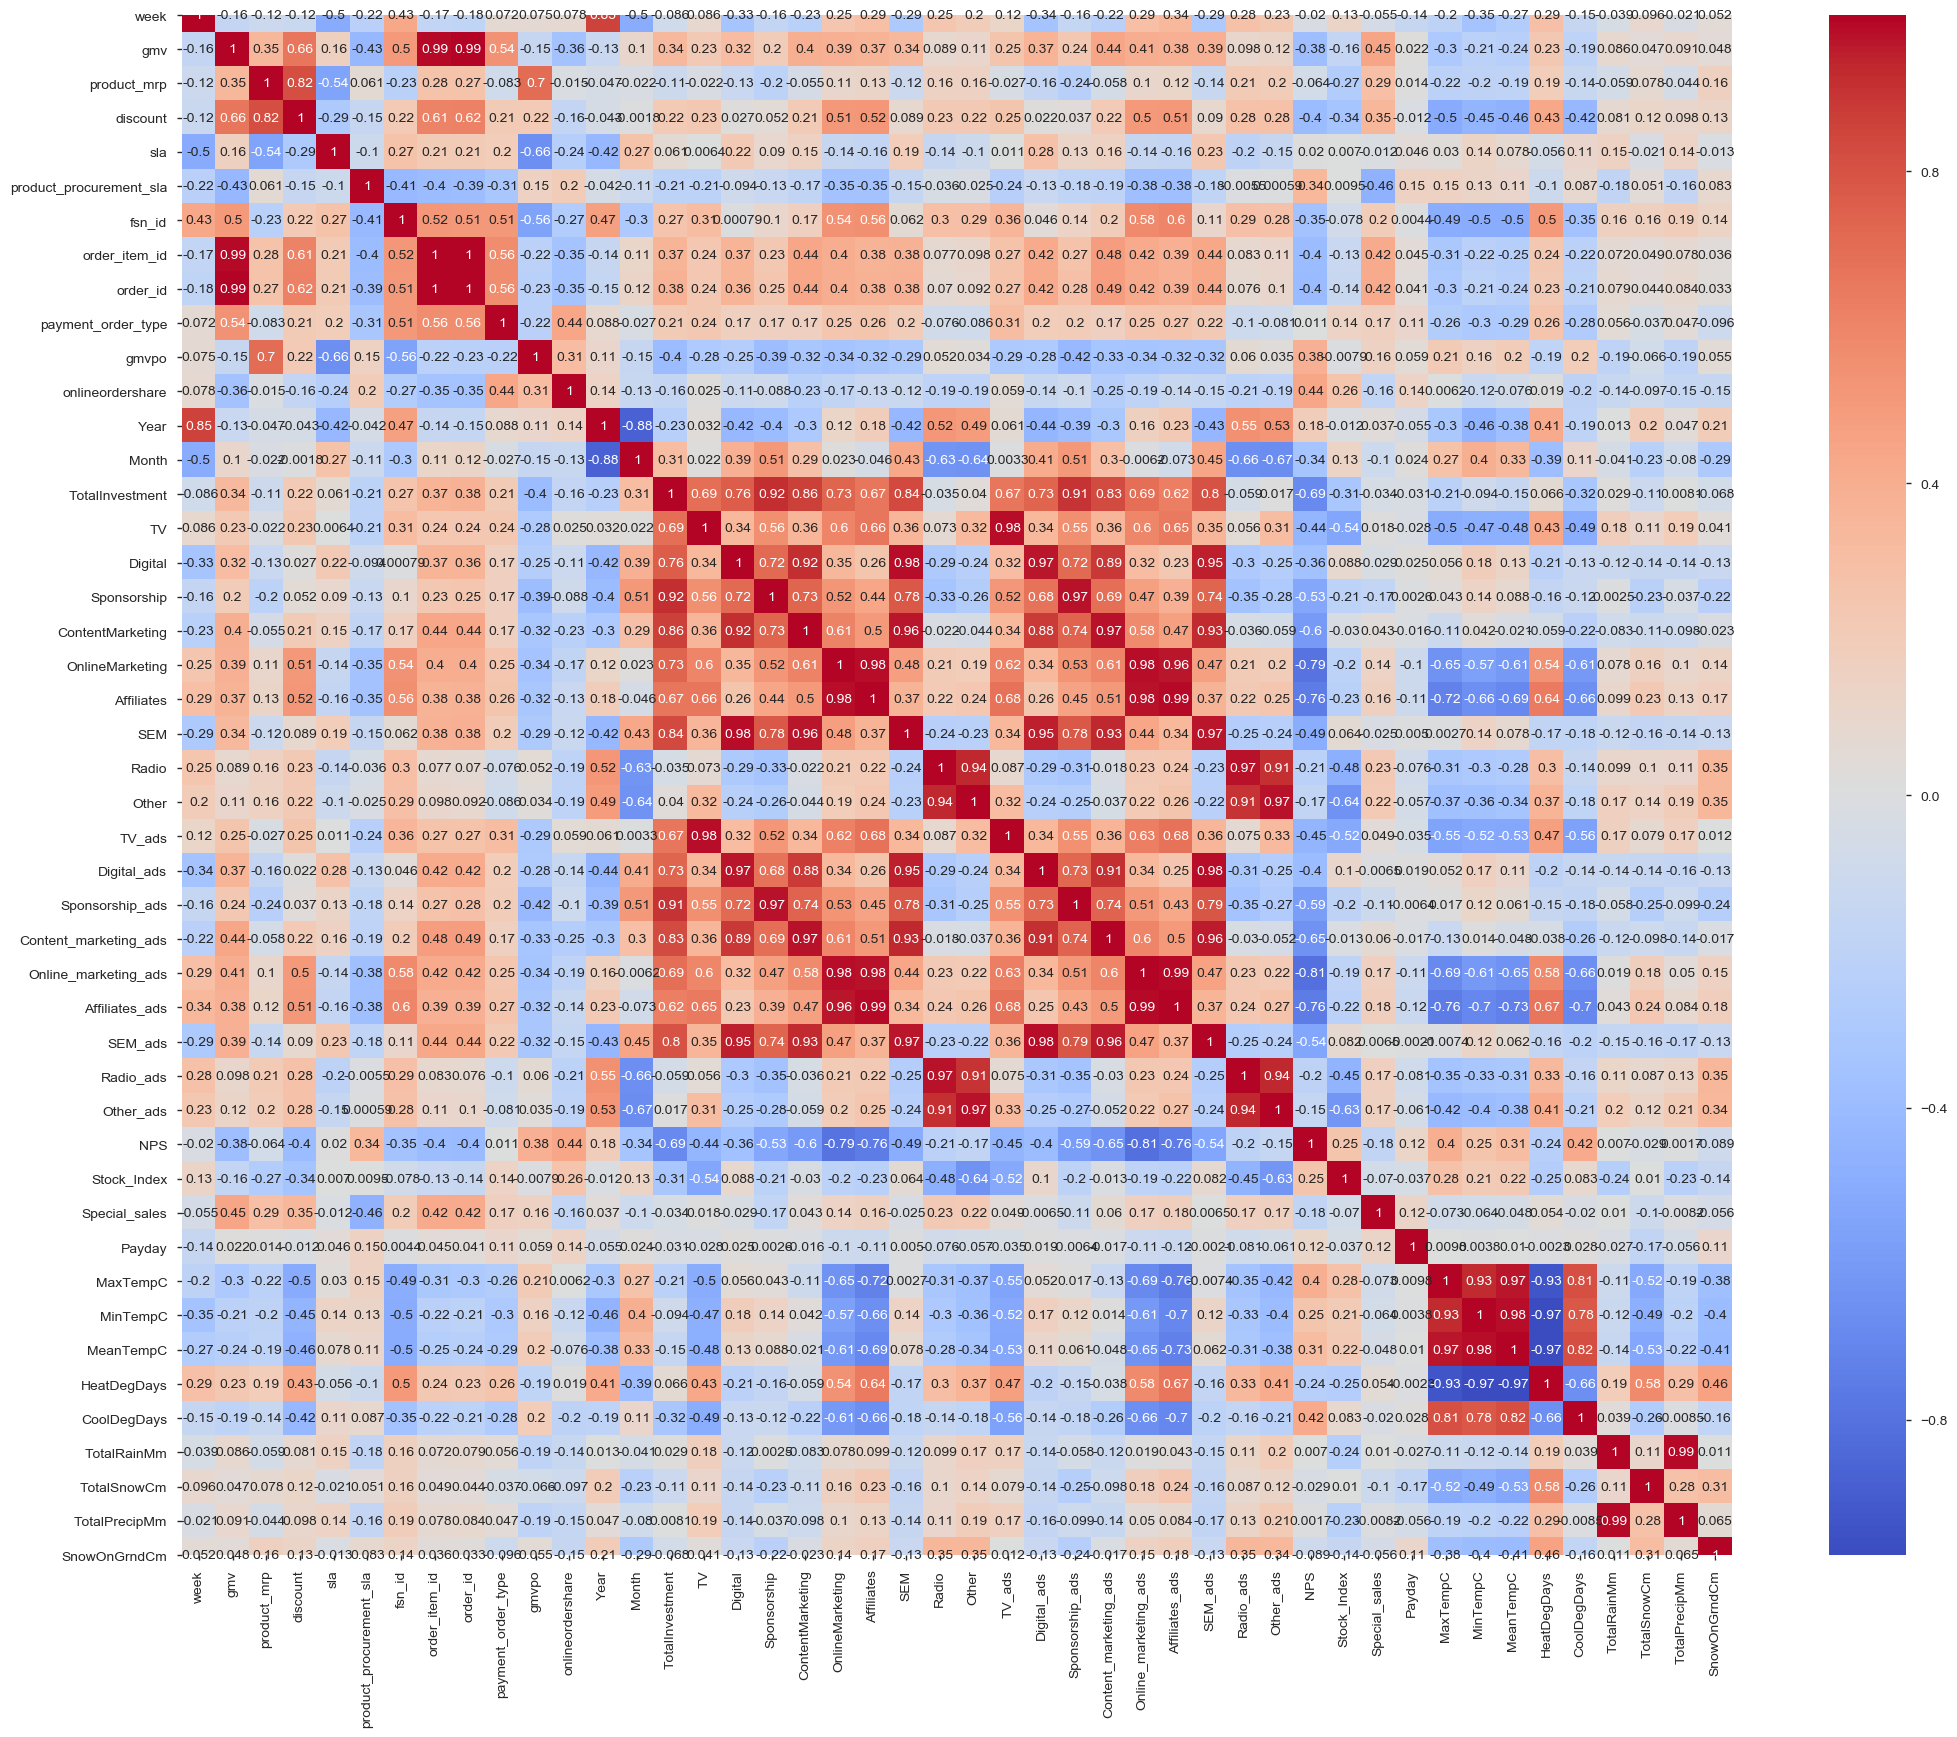

In [217]:
plt.figure(figsize=(25,20))

### Heatmap
sns.heatmap(weeklyhome.corr(), cmap="coolwarm", annot=True)
plt.show()

In [218]:
weeklyhome.drop(['TV', 'Digital', 'Sponsorship', 'ContentMarketing','OnlineMarketing', 'Affiliates', 'SEM','Radio',
              'Other','Affiliates_ads','SEM_ads','Digital_ads','Radio_ads','Other_ads','MeanTempC','MinTempC',
              'order_id','order_item_id','TotalPrecipMm','TotalInvestment','MaxTempC'], axis = 1, inplace = True)

In [220]:
###  Successfully removed more than 90% highly correlated variables from dataset.

In [385]:
### Lag of entities - Home Audio



weeklyhome['lag1disc'] = weeklyhome['discount'].shift(-1).fillna(0)
weeklyhome['lag2disc'] = weeklyhome['discount'].shift(-2).fillna(0)
weeklyhome['lag3disc'] = weeklyhome['discount'].shift(-3).fillna(0)

weeklyhome['lag1NPS'] = weeklyhome['NPS'].shift(-1).fillna(0)
weeklyhome['lag2NPS'] = weeklyhome['NPS'].shift(-2).fillna(0)
weeklyhome['lag3NPS'] = weeklyhome['NPS'].shift(-3).fillna(0)

weeklyhome['lag1StockIndex'] = weeklyhome['Stock_Index'].shift(-1).fillna(0)
weeklyhome['lag2StockIndex'] = weeklyhome['Stock_Index'].shift(-2).fillna(0)
weeklyhome['lag3StockIndex'] = weeklyhome['Stock_Index'].shift(-3).fillna(0)

weeklyhome['lag1Ssales'] = weeklyhome['Special_sales'].shift(-1).fillna(0)
weeklyhome['lag2Ssales'] = weeklyhome['Special_sales'].shift(-2).fillna(0)
weeklyhome['lag3Ssales'] = weeklyhome['Special_sales'].shift(-3).fillna(0)

weeklyhome['lag1Pd'] = weeklyhome['Payday'].shift(-1).fillna(0)
weeklyhome['lag2Pd'] = weeklyhome['Payday'].shift(-2).fillna(0)
weeklyhome['lag3Pd'] = weeklyhome['Payday'].shift(-3).fillna(0)

In [221]:
#Model - Camera Accessory


In [222]:
#Linear Model

In [223]:
###  Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [224]:
weeklycam.columns

Index(['week', 'gmv', 'product_mrp', 'discount', 'sla',
       'product_procurement_sla', 'fsn_id', 'payment_order_type',
       'premium_prod', 'gmvpo', 'onlineordershare', 'Date', 'Year', 'Month',
       'TV_ads', 'Sponsorship_ads', 'Content_marketing_ads',
       'Online_marketing_ads', 'NPS', 'Stock_Index', 'Special_sales', 'Payday',
       'HeatDegDays', 'CoolDegDays', 'TotalRainMm', 'TotalSnowCm',
       'SnowOnGrndCm'],
      dtype='object')

In [225]:
cam_lin_mod = weeklycam[['gmv', 'discount', 'sla','product_procurement_sla', 'payment_order_type',
       'onlineordershare', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'HeatDegDays', 'CoolDegDays', 
       'TotalRainMm', 'TotalSnowCm','SnowOnGrndCm', 
       'premium_prod']]
                            
    
cam_lin_mod.head()

gmv  discount   sla  product_procurement_sla  payment_order_type  \
0   18196.000     0.479 2.500                    2.607                  28   
1 4081557.000     0.433 7.026                    2.672                1003   
2 4675000.000     0.438 6.410                    2.704                1097   
3 4452052.000     0.431 6.432                    2.740                1036   
4 2974282.000     0.425 6.396                    2.715                 637   

   onlineordershare  TV_ads  Sponsorship_ads  Content_marketing_ads  \
0           100.000   0.054            1.854                  0.000   
1            34.081   0.081            2.780                  0.000   
2            34.881   0.081            2.780                  0.000   
3            33.312   0.081            2.780                  0.000   
4            30.877   0.028            1.139                  0.000   

   Online_marketing_ads    NPS  Stock_Index  Special_sales  Payday  \
0                 0.332 54.600     1177.000          0.000   0.200   
1                 0.498 54.600     1177.000          0.000   0.000   
2                 0.498 54.600     1177.000          0.286   0.143   
3                 0.498 54.600     1177.000          0.000   0.000   
4                 0.192 56.139     1185.286          0.000   0.143   

   HeatDegDays  CoolDegDays  TotalRainMm  TotalSnowCm  SnowOnGrndCm  \
0        0.100        1.460        0.000        0.000         0.000   
1        1.059        2.322        4.155        0.029         0.041   
2        0.816        4.722        1.569        0.029         0.041   
3        1.632        4.172        1.141        0.029         0.041   
4        0.816        5.908        4.341        0.029         0.041   

   premium_prod  
0             0  
1             0  
2             0  
3             0  
4             0

In [226]:
### Checking NaN

cam_lin_mod.isnull().sum()

gmv                        0
discount                   0
sla                        0
product_procurement_sla    0
payment_order_type         0
onlineordershare           0
TV_ads                     1
Sponsorship_ads            1
Content_marketing_ads      1
Online_marketing_ads       1
NPS                        0
Stock_Index                0
Special_sales              0
Payday                     0
HeatDegDays                0
CoolDegDays                0
TotalRainMm                0
TotalSnowCm                0
SnowOnGrndCm               0
premium_prod               0
dtype: int64

In [227]:
cam_lin_mod.fillna(0, inplace = True)

In [228]:
from sklearn.model_selection import train_test_split


np.random.seed(0)
df_train, df_test = train_test_split(cam_lin_mod, train_size = 0.7, test_size = 0.3, random_state = 100)

In [229]:
### Import the StandardScaler()
# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

### Create a scaling object
# scaler = StandardScaler()
scaler = MinMaxScaler()


### Create a list of the variables that you need to scale
varlist = ['gmv', 'discount', 'sla','product_procurement_sla', 'payment_order_type',
       'onlineordershare', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'HeatDegDays', 'CoolDegDays', 
       'TotalRainMm', 'TotalSnowCm','SnowOnGrndCm', 
       'premium_prod']
                                      

### Scale these variables using 'fit_transform'
df_train[varlist] = scaler.fit_transform(df_train[varlist])

In [230]:
df_train.head()

gmv  discount   sla  product_procurement_sla  payment_order_type  \
40 0.329     0.670 0.360                    0.617               0.806   
44 0.432     0.887 0.332                    0.590               0.234   
37 0.351     0.456 0.376                    0.633               0.290   
17 0.456     0.395 0.487                    0.869               0.205   
7  0.000     0.328 1.000                    0.000               0.000   

    onlineordershare  TV_ads  Sponsorship_ads  Content_marketing_ads  \
40             0.978   0.559            0.280                  0.010   
44             0.021   0.117            0.292                  0.184   
37             0.156   1.000            0.486                  0.107   
17             0.030   0.363            0.125                  0.039   
7              1.000   0.000            0.000                  0.000   

    Online_marketing_ads   NPS  Stock_Index  Special_sales  Payday  \
40                 0.676 0.477        1.000          0.000   1.000   
44                 0.775 0.187        0.938          0.000   1.000   
37                 0.755 0.297        0.000          0.000   0.000   
17                 0.641 0.167        0.960          0.667   0.000   
7                  0.000 1.000        0.841          1.000   0.000   

    HeatDegDays  CoolDegDays  TotalRainMm  TotalSnowCm  SnowOnGrndCm  \
40        0.560        0.000        0.009        0.020         0.009   
44        0.393        0.060        0.312        0.039         0.018   
37        0.815        0.000        1.000        0.020         0.009   
17        0.317        0.000        0.142        0.020         0.009   
7         0.296        0.317        0.129        0.079         0.036   

    premium_prod  
40         0.000  
44         0.000  
37         0.000  
17         0.000  
7          0.000

In [231]:
### Split the train dataset into X and y
from sklearn.model_selection import train_test_split
X_train = df_train.drop('gmv',axis=1)
y_train = df_train['gmv']

In [232]:
#RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [233]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm, 10)
rfe = rfe.fit(X_train, y_train)

In [234]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('discount', True, 1),
 ('sla', False, 6),
 ('product_procurement_sla', True, 1),
 ('payment_order_type', True, 1),
 ('onlineordershare', True, 1),
 ('TV_ads', True, 1),
 ('Sponsorship_ads', True, 1),
 ('Content_marketing_ads', False, 5),
 ('Online_marketing_ads', False, 2),
 ('NPS', True, 1),
 ('Stock_Index', True, 1),
 ('Special_sales', True, 1),
 ('Payday', False, 10),
 ('HeatDegDays', False, 3),
 ('CoolDegDays', False, 7),
 ('TotalRainMm', False, 4),
 ('TotalSnowCm', False, 8),
 ('SnowOnGrndCm', False, 9),
 ('premium_prod', True, 1)]

In [235]:
X_train.columns[rfe.support_]

Index(['discount', 'product_procurement_sla', 'payment_order_type',
       'onlineordershare', 'TV_ads', 'Sponsorship_ads', 'NPS', 'Stock_Index',
       'Special_sales', 'premium_prod'],
      dtype='object')

In [236]:
#### Building model using statsmodel, for the detailed statistics

In [237]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

discount  product_procurement_sla  payment_order_type  onlineordershare  \
40     0.670                    0.617               0.806             0.978   
44     0.887                    0.590               0.234             0.021   
37     0.456                    0.633               0.290             0.156   
17     0.395                    0.869               0.205             0.030   
7      0.328                    0.000               0.000             1.000   

    TV_ads  Sponsorship_ads   NPS  Stock_Index  Special_sales  premium_prod  
40   0.559            0.280 0.477        1.000          0.000         0.000  
44   0.117            0.292 0.187        0.938          0.000         0.000  
37   1.000            0.486 0.297        0.000          0.000         0.000  
17   0.363            0.125 0.167        0.960          0.667         0.000  
7    0.000            0.000 1.000        0.841          1.000         0.000

In [238]:
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [239]:
#Model1

In [240]:
X_Train_new = build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     27.43
Date:                Sat, 29 Feb 2020   Prob (F-statistic):           5.04e-11
Time:                        16:13:52   Log-Likelihood:                 60.932
No. Observations:                  36   AIC:                            -99.86
Df Residuals:                      25   BIC:                            -82.45
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [241]:
checkVIF(X_Train_new)

Features     VIF
0                     const 122.580
4          onlineordershare   4.270
7                       NPS   4.170
2   product_procurement_sla   3.430
3        payment_order_type   3.330
1                  discount   3.300
5                    TV_ads   3.160
6           Sponsorship_ads   2.520
8               Stock_Index   2.390
10             premium_prod   1.330
9             Special_sales   1.070

In [242]:
X_Train_new = X_train_rfe.drop(["NPS"], axis = 1)

In [243]:
#Model2

In [244]:
X_Train_new = build_model(X_Train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     30.76
Date:                Sat, 29 Feb 2020   Prob (F-statistic):           1.22e-11
Time:                        16:13:56   Log-Likelihood:                 60.439
No. Observations:                  36   AIC:                            -100.9
Df Residuals:                      26   BIC:                            -85.04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [245]:
checkVIF(X_Train_new)

Features    VIF
0                    const 70.710
4         onlineordershare  3.660
3       payment_order_type  3.320
2  product_procurement_sla  3.130
1                 discount  3.040
5                   TV_ads  2.820
7              Stock_Index  2.380
6          Sponsorship_ads  1.990
9             premium_prod  1.180
8            Special_sales  1.050

In [246]:
X_Train_new = X_Train_new.drop(["premium_prod"], axis = 1)

In [247]:
#Model3

In [248]:
X_Train_new = build_model(X_Train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     32.09
Date:                Sat, 29 Feb 2020   Prob (F-statistic):           7.58e-12
Time:                        16:13:58   Log-Likelihood:                 58.585
No. Observations:                  36   AIC:                            -99.17
Df Residuals:                      27   BIC:                            -84.92
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [249]:
checkVIF(X_Train_new)

Features    VIF
0                    const 66.320
4         onlineordershare  3.560
3       payment_order_type  3.260
2  product_procurement_sla  3.070
1                 discount  2.930
5                   TV_ads  2.810
7              Stock_Index  2.360
6          Sponsorship_ads  1.920
8            Special_sales  1.050

In [250]:
X_Train_new = X_Train_new.drop(["Sponsorship_ads"], axis = 1)

In [251]:
#Model 4

In [252]:
X_Train_new = build_model(X_Train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     27.91
Date:                Sat, 29 Feb 2020   Prob (F-statistic):           5.12e-11
Time:                        16:13:59   Log-Likelihood:                 53.627
No. Observations:                  36   AIC:                            -91.25
Df Residuals:                      28   BIC:                            -78.59
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [253]:
checkVIF(X_Train_new)

Features    VIF
0                    const 62.390
4         onlineordershare  3.560
3       payment_order_type  3.140
1                 discount  2.890
2  product_procurement_sla  2.880
6              Stock_Index  2.250
5                   TV_ads  1.900
7            Special_sales  1.050

In [254]:
X_Train_new = X_Train_new.drop(["Stock_Index"], axis = 1)

In [255]:
#Model 5

In [256]:
X_Train_new = build_model(X_Train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     31.96
Date:                Sat, 29 Feb 2020   Prob (F-statistic):           1.62e-11
Time:                        16:14:01   Log-Likelihood:                 52.785
No. Observations:                  36   AIC:                            -91.57
Df Residuals:                      29   BIC:                            -80.48
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [257]:
checkVIF(X_Train_new)

Features    VIF
0                    const 62.390
3       payment_order_type  3.140
4         onlineordershare  3.070
2  product_procurement_sla  2.530
1                 discount  2.240
5                   TV_ads  1.110
6            Special_sales  1.040

In [258]:
X_Train_new = X_Train_new.drop(["TV_ads"], axis = 1)

In [259]:
#Model6

In [260]:
X_Train_new = build_model(X_Train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     39.28
Date:                Sat, 29 Feb 2020   Prob (F-statistic):           2.76e-12
Time:                        16:14:02   Log-Likelihood:                 52.626
No. Observations:                  36   AIC:                            -93.25
Df Residuals:                      30   BIC:                            -83.75
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [261]:
checkVIF(X_Train_new)

Features    VIF
0                    const 62.320
3       payment_order_type  3.120
4         onlineordershare  3.070
2  product_procurement_sla  2.480
1                 discount  2.210
5            Special_sales  1.020

In [263]:
#Model7

In [264]:
X_Train_new = build_model(X_Train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     39.28
Date:                Sat, 29 Feb 2020   Prob (F-statistic):           2.76e-12
Time:                        16:14:14   Log-Likelihood:                 52.626
No. Observations:                  36   AIC:                            -93.25
Df Residuals:                      30   BIC:                            -83.75
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [265]:
checkVIF(X_Train_new)

Features    VIF
0                    const 62.320
3       payment_order_type  3.120
4         onlineordershare  3.070
2  product_procurement_sla  2.480
1                 discount  2.210
5            Special_sales  1.020

In [266]:
X_Train_new = X_Train_new.drop(["payment_order_type"], axis = 1)

In [267]:
#Model8

In [268]:
X_Train_new = build_model(X_Train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     14.18
Date:                Sat, 29 Feb 2020   Prob (F-statistic):           1.09e-06
Time:                        16:14:18   Log-Likelihood:                 34.974
No. Observations:                  36   AIC:                            -59.95
Df Residuals:                      31   BIC:                            -52.03
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [269]:
checkVIF(X_Train_new)

Features    VIF
0                    const 43.410
2  product_procurement_sla  1.520
3         onlineordershare  1.270
1                 discount  1.210
4            Special_sales  1.020

In [270]:
X_Train_new = X_Train_new.drop(["Special_sales"], axis = 1)

In [271]:
#Model9

In [272]:
X_Train_new = build_model(X_Train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     9.872
Date:                Sat, 29 Feb 2020   Prob (F-statistic):           9.24e-05
Time:                        16:14:26   Log-Likelihood:                 28.041
No. Observations:                  36   AIC:                            -48.08
Df Residuals:                      32   BIC:                            -41.75
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [275]:
checkVIF(X_Train_new)

Features    VIF
0                    const 42.270
2  product_procurement_sla  1.500
3         onlineordershare  1.270
1                 discount  1.210

In [276]:
X_Train_new = X_Train_new.drop(["const"], axis = 1)

In [277]:
#Model10

In [278]:
X_Train_new = build_model(X_Train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     9.872
Date:                Sat, 29 Feb 2020   Prob (F-statistic):           9.24e-05
Time:                        16:15:04   Log-Likelihood:                 28.041
No. Observations:                  36   AIC:                            -48.08
Df Residuals:                      32   BIC:                            -41.75
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [279]:
checkVIF(X_Train_new)

Features    VIF
0                    const 42.270
2  product_procurement_sla  1.500
3         onlineordershare  1.270
1                 discount  1.210

In [280]:
#Residual Analysis of Model

In [281]:
lm = sm.OLS(y_train,X_Train_new).fit()
y_train_price = lm.predict(X_Train_new)

Text(0.5, 0, 'Errors')

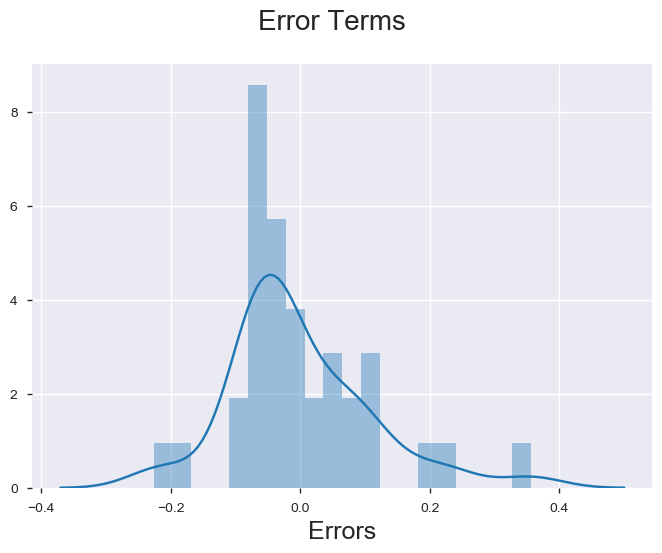

In [282]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

#Error terms seem to be approximately normally distributed, so the assumption on the linear modeling seems to be fulfilled.

In [283]:
#Prediction & Evaluation

In [284]:
#Scaling the test set
num_vars = ['gmv', 'discount', 'sla','product_procurement_sla', 'payment_order_type',
       'onlineordershare', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'HeatDegDays', 'CoolDegDays', 
       'TotalRainMm', 'TotalSnowCm','SnowOnGrndCm', 
       'premium_prod']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [285]:
#Dividing into X and y
y_test = df_test.pop('gmv')
X_test = df_test

In [286]:
# Now let's use our model to make predictions.
X_Train_new = X_Train_new.drop('const',axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_Train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [287]:
# Making predictions
y_pred = lm.predict(X_test_new)

In [288]:
#### Evaluation of test via comparison of y_pred and y_test

In [289]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

-0.9205759203336576

Text(0, 0.5, 'y_pred')

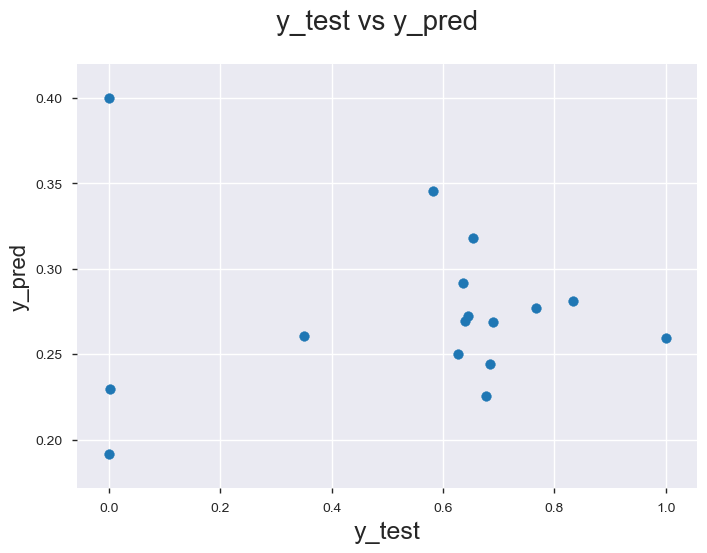

In [290]:
#EVALUATION OF THE MODEL
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) 

In [291]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     9.872
Date:                Sat, 29 Feb 2020   Prob (F-statistic):           9.24e-05
Time:                        16:15:40   Log-Likelihood:                 28.041
No. Observations:                  36   AIC:                            -48.08
Df Residuals:                      32   BIC:                            -41.75
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [292]:
###  Linear Model - Stepwise Selection for feature selection

In [293]:
###  Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [294]:
weeklycam.columns

Index(['week', 'gmv', 'product_mrp', 'discount', 'sla',
       'product_procurement_sla', 'fsn_id', 'payment_order_type',
       'premium_prod', 'gmvpo', 'onlineordershare', 'Date', 'Year', 'Month',
       'TV_ads', 'Sponsorship_ads', 'Content_marketing_ads',
       'Online_marketing_ads', 'NPS', 'Stock_Index', 'Special_sales', 'Payday',
       'HeatDegDays', 'CoolDegDays', 'TotalRainMm', 'TotalSnowCm',
       'SnowOnGrndCm'],
      dtype='object')

In [295]:
cam_lin_mod = weeklycam[['gmv', 'discount', 'sla','product_procurement_sla', 'payment_order_type',
       'onlineordershare', 'TV_ads', 'Sponsorship_ads', 'Content_marketing_ads',
       'Online_marketing_ads', 'NPS', 'Stock_Index', 'Special_sales', 'Payday',
       'HeatDegDays', 'CoolDegDays', 'TotalRainMm', 'TotalSnowCm',
       'SnowOnGrndCm' ]]
                            
    
cam_lin_mod.head()

gmv  discount   sla  product_procurement_sla  payment_order_type  \
0   18196.000     0.479 2.500                    2.607                  28   
1 4081557.000     0.433 7.026                    2.672                1003   
2 4675000.000     0.438 6.410                    2.704                1097   
3 4452052.000     0.431 6.432                    2.740                1036   
4 2974282.000     0.425 6.396                    2.715                 637   

   onlineordershare  TV_ads  Sponsorship_ads  Content_marketing_ads  \
0           100.000   0.054            1.854                  0.000   
1            34.081   0.081            2.780                  0.000   
2            34.881   0.081            2.780                  0.000   
3            33.312   0.081            2.780                  0.000   
4            30.877   0.028            1.139                  0.000   

   Online_marketing_ads    NPS  Stock_Index  Special_sales  Payday  \
0                 0.332 54.600     1177.000          0.000   0.200   
1                 0.498 54.600     1177.000          0.000   0.000   
2                 0.498 54.600     1177.000          0.286   0.143   
3                 0.498 54.600     1177.000          0.000   0.000   
4                 0.192 56.139     1185.286          0.000   0.143   

   HeatDegDays  CoolDegDays  TotalRainMm  TotalSnowCm  SnowOnGrndCm  
0        0.100        1.460        0.000        0.000         0.000  
1        1.059        2.322        4.155        0.029         0.041  
2        0.816        4.722        1.569        0.029         0.041  
3        1.632        4.172        1.141        0.029         0.041  
4        0.816        5.908        4.341        0.029         0.041

In [296]:
### Checking NaN
cam_lin_mod.isnull().sum()

gmv                        0
discount                   0
sla                        0
product_procurement_sla    0
payment_order_type         0
onlineordershare           0
TV_ads                     1
Sponsorship_ads            1
Content_marketing_ads      1
Online_marketing_ads       1
NPS                        0
Stock_Index                0
Special_sales              0
Payday                     0
HeatDegDays                0
CoolDegDays                0
TotalRainMm                0
TotalSnowCm                0
SnowOnGrndCm               0
dtype: int64

In [297]:
cam_lin_mod.fillna(0, inplace = True)

In [300]:
### Import the StandardScaler()
# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

### Create a scaling object
# scaler = StandardScaler()
scaler = MinMaxScaler()


### Create a list of the variables that you need to scale
varlist = ['gmv', 'discount', 'sla','product_procurement_sla', 'payment_order_type',
       'onlineordershare', 'TV_ads', 'Sponsorship_ads', 'Content_marketing_ads',
       'Online_marketing_ads', 'NPS', 'Stock_Index', 'Special_sales', 'Payday',
       'HeatDegDays', 'CoolDegDays', 'TotalRainMm', 'TotalSnowCm',
       'SnowOnGrndCm']
                                      

### Scale these variables using 'fit_transform'
cam_lin_mod[varlist] = scaler.fit_transform(cam_lin_mod[varlist])

In [301]:
cam_lin_mod.head()

gmv  discount   sla  product_procurement_sla  payment_order_type  \
0 0.001     0.370 0.000                    0.536               0.005   
1 0.313     0.294 0.647                    0.557               0.196   
2 0.358     0.302 0.559                    0.568               0.215   
3 0.341     0.290 0.562                    0.580               0.203   
4 0.228     0.280 0.557                    0.572               0.125   

   onlineordershare  TV_ads  Sponsorship_ads  Content_marketing_ads  \
0             1.000   0.015            0.058                  0.000   
1             0.341   0.023            0.088                  0.000   
2             0.349   0.023            0.088                  0.000   
3             0.333   0.023            0.088                  0.000   
4             0.309   0.008            0.036                  0.000   

   Online_marketing_ads   NPS  Stock_Index  Special_sales  Payday  \
0                 0.036 0.654        0.714          0.000   1.000   
1                 0.054 0.654        0.714          0.000   0.000   
2                 0.054 0.654        0.714          0.286   0.714   
3                 0.054 0.654        0.714          0.000   0.000   
4                 0.021 0.753        0.750          0.000   0.714   

   HeatDegDays  CoolDegDays  TotalRainMm  TotalSnowCm  SnowOnGrndCm  
0        0.000        0.247        0.000        0.000         0.000  
1        0.069        0.393        0.420        0.019         0.009  
2        0.051        0.799        0.159        0.019         0.009  
3        0.109        0.706        0.115        0.019         0.009  
4        0.051        1.000        0.439        0.019         0.009

In [302]:
### Split the train dataset into X and y
from sklearn.model_selection import train_test_split
x = cam_lin_mod.drop('gmv',axis=1)
y = cam_lin_mod['gmv']

camera_train_lm = cam_lin_mod

In [303]:
print("x dataset: ",x.shape)
print("y dataset: ",y.shape)

x dataset:  (52, 18)
y dataset:  (52,)


In [304]:
###  Represent
lm = LinearRegression()

###  Fit a line
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [305]:
###  Coefficient values

coef = pd.DataFrame(x.columns)
coef['Coefficient'] = pd.Series(lm.coef_)
coef

0  Coefficient
0                  discount       -0.386
1                       sla       -0.284
2   product_procurement_sla       -0.045
3        payment_order_type        0.733
4          onlineordershare       -0.454
5                    TV_ads       -0.142
6           Sponsorship_ads        0.057
7     Content_marketing_ads        0.035
8      Online_marketing_ads        0.179
9                       NPS        0.006
10              Stock_Index       -0.067
11            Special_sales        0.182
12                   Payday       -0.032
13              HeatDegDays       -0.130
14              CoolDegDays       -0.020
15              TotalRainMm       -0.000
16              TotalSnowCm        0.011
17             SnowOnGrndCm        0.068

In [306]:
col = x.columns
col

Index(['discount', 'sla', 'product_procurement_sla', 'payment_order_type',
       'onlineordershare', 'TV_ads', 'Sponsorship_ads',
       'Content_marketing_ads', 'Online_marketing_ads', 'NPS', 'Stock_Index',
       'Special_sales', 'Payday', 'HeatDegDays', 'CoolDegDays', 'TotalRainMm',
       'TotalSnowCm', 'SnowOnGrndCm'],
      dtype='object')

In [307]:
#### Model Building - Stepwise selection for feature selection

In [308]:
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [309]:
def stepwise_selection(x, y,
                       initial_list=[ 'discount', 'sla','product_procurement_sla', 'payment_order_type',
       'onlineordershare', 'TV_ads', 'Sponsorship_ads', 'Content_marketing_ads',
       'Online_marketing_ads', 'NPS', 'Stock_Index', 'Special_sales', 'Payday',
       'HeatDegDays', 'CoolDegDays', 'TotalRainMm', 'TotalSnowCm',
       'SnowOnGrndCm'],
                       threshold_in=0.01,threshold_out = 0.05, verbose=True):
    
    included = list(initial_list)
    while True:
        changed=False
        ###forward step
        excluded = list(set(x.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
                
                
        ###backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included]))).fit()
        ###use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() ###null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [310]:
import statsmodels.api as sm  

final_features = stepwise_selection(x, y)

print("\n","final_selected_features:",final_features)

Drop TotalRainMm                    with p-value 0.99452
Drop NPS                            with p-value 0.965803
Drop TotalSnowCm                    with p-value 0.880813
Drop CoolDegDays                    with p-value 0.853549
Drop product_procurement_sla        with p-value 0.834669
Drop Content_marketing_ads          with p-value 0.643154
Drop SnowOnGrndCm                   with p-value 0.423798
Drop Sponsorship_ads                with p-value 0.407207
Drop Payday                         with p-value 0.430914
Drop Stock_Index                    with p-value 0.181498
Drop TV_ads                         with p-value 0.364785

 final_selected_features: ['discount', 'sla', 'payment_order_type', 'onlineordershare', 'Online_marketing_ads', 'Special_sales', 'HeatDegDays']


In [311]:
###  Import statsmodels
import statsmodels.api as sm  

###  Subsetting training data for 15 selected columns
x_rfe1 = x[final_features]

x_rfe1 = sm.add_constant(x_rfe1)

###  Fitting the model with selected variables
lm1 = sm.OLS(y, x_rfe1).fit() 

print(lm1.params)

const                   0.554
discount               -0.353
sla                    -0.239
payment_order_type      0.657
onlineordershare       -0.453
Online_marketing_ads    0.192
Special_sales           0.162
HeatDegDays            -0.141
dtype: float64


In [312]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     28.01
Date:                Sat, 29 Feb 2020   Prob (F-statistic):           3.15e-14
Time:                        16:16:29   Log-Likelihood:                 64.263
No. Observations:                  52   AIC:                            -112.5
Df Residuals:                      44   BIC:                            -96.92
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5537 

In [313]:
###  Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                 const 94.800
5  Online_marketing_ads  2.080
4      onlineordershare  2.040
3    payment_order_type  1.970
7           HeatDegDays  1.620
1              discount  1.570
2                   sla  1.510
6         Special_sales  1.040

In [314]:
features = list(x_rfe1.columns)
features.remove('const')
features

['discount',
 'sla',
 'payment_order_type',
 'onlineordershare',
 'Online_marketing_ads',
 'Special_sales',
 'HeatDegDays']

In [315]:
###  Model Evaluation on testing data
x_2 = x[features]


###  Predicition with selected features on the test data
y_pred = lm1.predict(sm.add_constant(x_2))

In [316]:
###  Mean square error (MSE)

mse = np.mean((y_pred - y)**2)
mse

0.004944236343104833

In [317]:
###  Coefficient values

coef = pd.DataFrame(x_rfe1.columns)
coef['Coefficient'] = pd.Series(lm.coef_)
coef

0  Coefficient
0                 const       -0.386
1              discount       -0.284
2                   sla       -0.045
3    payment_order_type        0.733
4      onlineordershare       -0.454
5  Online_marketing_ads       -0.142
6         Special_sales        0.057
7           HeatDegDays        0.035

In [318]:
### Mean Square Error 
###  Using K-Fold Cross validation evaluating on selected dataset

# lm = LinearRegression()
fold = KFold(10,shuffle = True, random_state = 100)

cv_scores = -cross_val_score(lm,x[features],y,cv=fold,scoring='neg_mean_squared_error')

print("Neg. of MSE:",cv_scores,"\n")
print("Mean of 5 KFold CV - MSE:",cv_scores.mean())

Neg. of MSE: [0.02844543 0.0133744  0.0074809  0.03436373 0.00722319 0.00179729
 0.0011773  0.02897983 0.00359022 0.00373553] 

Mean of 5 KFold CV - MSE: 0.013016781695342294


In [319]:
def elasticity(model,x):
    
    features_df = pd.DataFrame(model.params)
    features_df = features_df.rename(columns={0:'coef'})
    
    features_df['imp_feature'] = model.params.index
    features_df = features_df[features_df.imp_feature != 'const'][['imp_feature','coef']]
    features_df.index = range(len(features_df))
#    features

    elasticity_list = list()
    
    for i in range(len(features_df)):
        elasticity_list.append(((features_df.coef[i] * np.mean(x[features_df.imp_feature[i]])) / np.mean(x['gmv'])))

    features_df['elasticity'] = np.round(elasticity_list,3)
    
    sns.barplot(x='elasticity',y='imp_feature',data=features_df)
    plt.show()
    
    return features_df

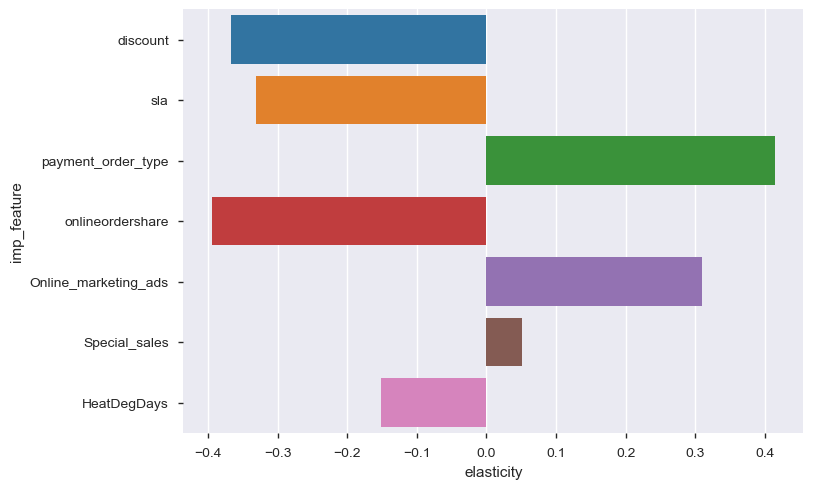

imp_feature   coef  elasticity
0              discount -0.353      -0.367
1                   sla -0.239      -0.331
2    payment_order_type  0.657       0.415
3      onlineordershare -0.453      -0.395
4  Online_marketing_ads  0.192       0.310
5         Special_sales  0.162       0.051
6           HeatDegDays -0.141      -0.151

In [320]:
elasticity(lm1,camera_train_lm)

Text(0, 0.5, 'y_pred')

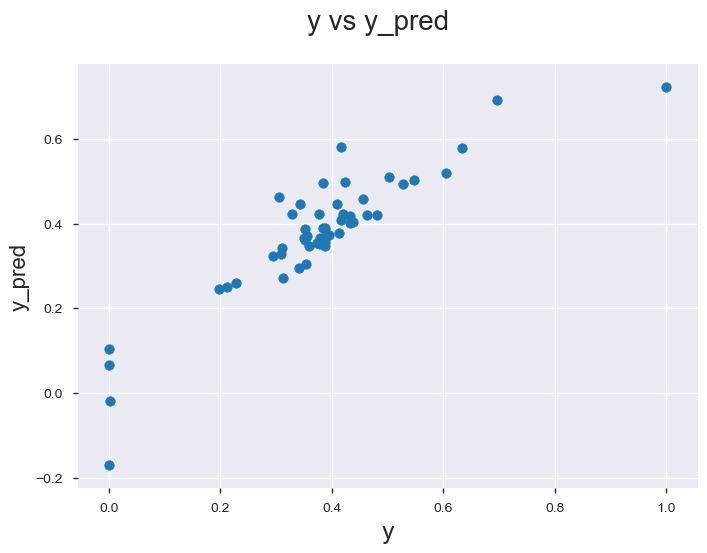

In [321]:
# Plotting y and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y, y_pred)
fig.suptitle('y vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 

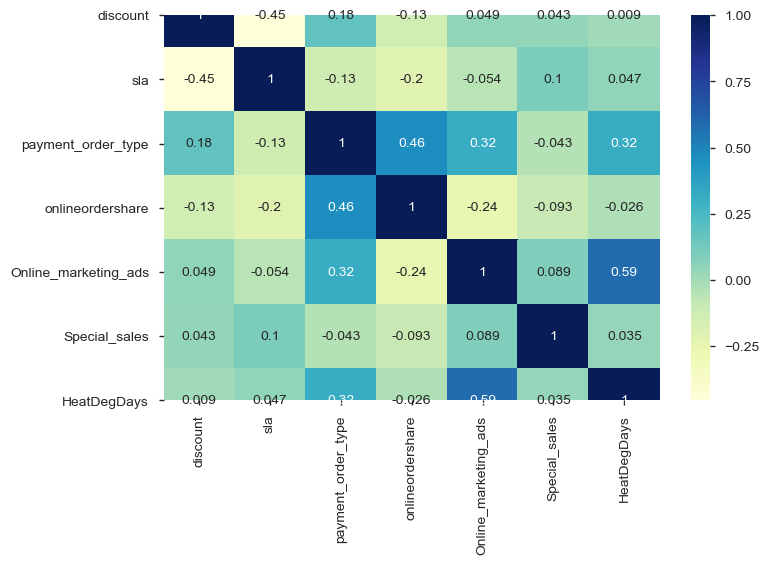

In [322]:
# Figure size
plt.figure(figsize=(8,5))

# Heatmap
sns.heatmap(camera_train_lm[features].corr(), cmap="YlGnBu", annot=True)
plt.show()

In [323]:
#2. Multiplicative Model

In [324]:
weeklycam.columns

Index(['week', 'gmv', 'product_mrp', 'discount', 'sla',
       'product_procurement_sla', 'fsn_id', 'payment_order_type',
       'premium_prod', 'gmvpo', 'onlineordershare', 'Date', 'Year', 'Month',
       'TV_ads', 'Sponsorship_ads', 'Content_marketing_ads',
       'Online_marketing_ads', 'NPS', 'Stock_Index', 'Special_sales', 'Payday',
       'HeatDegDays', 'CoolDegDays', 'TotalRainMm', 'TotalSnowCm',
       'SnowOnGrndCm'],
      dtype='object')

In [325]:
camera_multi_mod = weeklycam[['gmv', 'discount', 'sla','product_procurement_sla', 'payment_order_type',
       'onlineordershare', 'TV_ads', 'Sponsorship_ads', 'Content_marketing_ads',
       'Online_marketing_ads', 'NPS', 'Stock_Index', 'Special_sales', 'Payday',
       'HeatDegDays', 'CoolDegDays', 'TotalRainMm', 'TotalSnowCm',
       'SnowOnGrndCm']]         

camera_multi_mod.head()

gmv  discount   sla  product_procurement_sla  payment_order_type  \
0   18196.000     0.479 2.500                    2.607                  28   
1 4081557.000     0.433 7.026                    2.672                1003   
2 4675000.000     0.438 6.410                    2.704                1097   
3 4452052.000     0.431 6.432                    2.740                1036   
4 2974282.000     0.425 6.396                    2.715                 637   

   onlineordershare  TV_ads  Sponsorship_ads  Content_marketing_ads  \
0           100.000   0.054            1.854                  0.000   
1            34.081   0.081            2.780                  0.000   
2            34.881   0.081            2.780                  0.000   
3            33.312   0.081            2.780                  0.000   
4            30.877   0.028            1.139                  0.000   

   Online_marketing_ads    NPS  Stock_Index  Special_sales  Payday  \
0                 0.332 54.600     1177.000          0.000   0.200   
1                 0.498 54.600     1177.000          0.000   0.000   
2                 0.498 54.600     1177.000          0.286   0.143   
3                 0.498 54.600     1177.000          0.000   0.000   
4                 0.192 56.139     1185.286          0.000   0.143   

   HeatDegDays  CoolDegDays  TotalRainMm  TotalSnowCm  SnowOnGrndCm  
0        0.100        1.460        0.000        0.000         0.000  
1        1.059        2.322        4.155        0.029         0.041  
2        0.816        4.722        1.569        0.029         0.041  
3        1.632        4.172        1.141        0.029         0.041  
4        0.816        5.908        4.341        0.029         0.041

In [326]:
### Applying Log 
camera_multi_mod=np.log(camera_multi_mod)

camera_multi_mod = camera_multi_mod.fillna(0)
camera_multi_mod = camera_multi_mod.replace([np.inf, -np.inf], 0)

In [327]:
camera_multi_mod.head()

gmv  discount   sla  product_procurement_sla  payment_order_type  \
0  9.809    -0.737 0.916                    0.958               3.332   
1 15.222    -0.836 1.950                    0.983               6.911   
2 15.358    -0.826 1.858                    0.995               7.000   
3 15.309    -0.841 1.861                    1.008               6.943   
4 14.906    -0.856 1.856                    0.999               6.457   

   onlineordershare  TV_ads  Sponsorship_ads  Content_marketing_ads  \
0             4.605  -2.922            0.617                 -8.364   
1             3.529  -2.516            1.023                 -7.958   
2             3.552  -2.516            1.023                 -7.958   
3             3.506  -2.516            1.023                 -7.958   
4             3.430  -3.568            0.131                 -9.046   

   Online_marketing_ads   NPS  Stock_Index  Special_sales  Payday  \
0                -1.103 4.000        7.071          0.000  -1.609   
1                -0.698 4.000        7.071          0.000   0.000   
2                -0.698 4.000        7.071         -1.253  -1.946   
3                -0.698 4.000        7.071          0.000   0.000   
4                -1.652 4.028        7.078          0.000  -1.946   

   HeatDegDays  CoolDegDays  TotalRainMm  TotalSnowCm  SnowOnGrndCm  
0       -2.303        0.378        0.000        0.000         0.000  
1        0.057        0.842        1.424       -3.532        -3.189  
2       -0.203        1.552        0.451       -3.532        -3.189  
3        0.490        1.428        0.131       -3.532        -3.189  
4       -0.203        1.776        1.468       -3.532        -3.189

In [328]:
###  Import the StandardScaler()
# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

###  Create a scaling object
# scaler = StandardScaler()
scaler = MinMaxScaler()

###  Create a list of the variables that you need to scale
varlist = ['gmv', 'discount', 'sla','product_procurement_sla', 'payment_order_type',
       'onlineordershare', 'TV_ads', 'Sponsorship_ads', 'Content_marketing_ads',
       'Online_marketing_ads', 'NPS', 'Stock_Index', 'Special_sales', 'Payday',
       'HeatDegDays', 'CoolDegDays', 'TotalRainMm', 'TotalSnowCm',
       'SnowOnGrndCm']      



### Scale these variables using 'fit_transform'
camera_multi_mod[varlist] = scaler.fit_transform(camera_multi_mod[varlist])

In [329]:
camera_multi_mod.head()

gmv  discount   sla  product_procurement_sla  payment_order_type  \
0 0.385     0.515 0.000                    0.691               0.390   
1 0.891     0.431 0.774                    0.709               0.809   
2 0.904     0.440 0.705                    0.717               0.820   
3 0.899     0.427 0.708                    0.727               0.813   
4 0.862     0.415 0.704                    0.720               0.756   

   onlineordershare  TV_ads  Sponsorship_ads  Content_marketing_ads  \
0             1.000   0.444            0.382                  0.358   
1             0.766   0.498            0.471                  0.388   
2             0.771   0.498            0.471                  0.388   
3             0.761   0.498            0.471                  0.388   
4             0.745   0.358            0.277                  0.307   

   Online_marketing_ads   NPS  Stock_Index  Special_sales  Payday  \
0                 0.393 0.687        0.734          1.000   0.173   
1                 0.467 0.687        0.734          1.000   1.000   
2                 0.467 0.687        0.734          0.356   0.000   
3                 0.467 0.687        0.734          1.000   1.000   
4                 0.293 0.780        0.768          1.000   0.000   

   HeatDegDays  CoolDegDays  TotalRainMm  TotalSnowCm  SnowOnGrndCm  
0        0.000        0.408        0.303        0.895         0.677  
1        0.477        0.604        0.736        0.000         0.000  
2        0.424        0.905        0.440        0.000         0.000  
3        0.564        0.853        0.343        0.000         0.000  
4        0.424        1.000        0.750        0.000         0.000

In [330]:
### Split the train dataset into X and y
from sklearn.model_selection import train_test_split

x = camera_multi_mod.drop('gmv',axis=1)
y = camera_multi_mod['gmv']

camera_train_mm = camera_multi_mod

In [331]:
print("X = Independent variable & Y = Target variable")
print(x.shape,y.shape)

X = Independent variable & Y = Target variable
(52, 18) (52,)


In [332]:
### Represent
mm = LinearRegression()

### Fit a line
mm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [333]:
### Coefficient values

coef = pd.DataFrame(x.columns)
coef['Coefficient'] = pd.Series(mm.coef_)
coef

0  Coefficient
0                  discount       -0.331
1                       sla       -0.064
2   product_procurement_sla       -0.002
3        payment_order_type        1.023
4          onlineordershare       -0.235
5                    TV_ads       -0.109
6           Sponsorship_ads       -0.007
7     Content_marketing_ads        0.141
8      Online_marketing_ads       -0.028
9                       NPS       -0.066
10              Stock_Index       -0.005
11            Special_sales       -0.002
12                   Payday        0.015
13              HeatDegDays        0.025
14              CoolDegDays        0.038
15              TotalRainMm       -0.005
16              TotalSnowCm       -0.028
17             SnowOnGrndCm        0.021

In [334]:
col = x.columns
col

Index(['discount', 'sla', 'product_procurement_sla', 'payment_order_type',
       'onlineordershare', 'TV_ads', 'Sponsorship_ads',
       'Content_marketing_ads', 'Online_marketing_ads', 'NPS', 'Stock_Index',
       'Special_sales', 'Payday', 'HeatDegDays', 'CoolDegDays', 'TotalRainMm',
       'TotalSnowCm', 'SnowOnGrndCm'],
      dtype='object')

In [335]:
#### Model Building - Stepwise selection for feature selection

In [336]:
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [337]:
def stepwise_selection(x, y,
                       initial_list=['discount', 'sla','product_procurement_sla', 'payment_order_type',
       'onlineordershare', 'TV_ads', 'Sponsorship_ads', 'Content_marketing_ads',
       'Online_marketing_ads', 'NPS', 'Stock_Index', 'Special_sales', 'Payday',
       'HeatDegDays', 'CoolDegDays', 'TotalRainMm', 'TotalSnowCm',
       'SnowOnGrndCm'],
                       threshold_in=0.01,threshold_out = 0.05, verbose=True):
    
    included = list(initial_list)
    while True:
        changed=False
        ###forward step
        excluded = list(set(x.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
                
                
        ###backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included]))).fit()
        ###use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() ###null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included


In [338]:
import statsmodels.api as sm  

final_features = stepwise_selection(x, y)

print("\n","final_selected_features:",final_features)

Drop product_procurement_sla        with p-value 0.983716
Drop Special_sales                  with p-value 0.892823
Drop TotalRainMm                    with p-value 0.776557
Drop Sponsorship_ads                with p-value 0.776105
Drop Stock_Index                    with p-value 0.745403
Drop Online_marketing_ads           with p-value 0.622359
Drop HeatDegDays                    with p-value 0.563763
Drop SnowOnGrndCm                   with p-value 0.347866
Drop TotalSnowCm                    with p-value 0.5161
Drop sla                            with p-value 0.343511
Drop NPS                            with p-value 0.143379
Drop Payday                         with p-value 0.0739699

 final_selected_features: ['discount', 'payment_order_type', 'onlineordershare', 'TV_ads', 'Content_marketing_ads', 'CoolDegDays']


In [339]:
### Import statsmodels
import statsmodels.api as sm  

### Subsetting training data for 15 selected columns
x_rfe1 = x[final_features]

x_rfe1 = sm.add_constant(x_rfe1)


### Fitting the model with selected variables
mm1 = sm.OLS(y, x_rfe1).fit() 

print(mm1.params)

const                    0.357
discount                -0.329
payment_order_type       0.991
onlineordershare        -0.234
TV_ads                  -0.099
Content_marketing_ads    0.187
CoolDegDays              0.032
dtype: float64


In [340]:
print(mm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     599.0
Date:                Sat, 29 Feb 2020   Prob (F-statistic):           3.34e-41
Time:                        16:17:12   Log-Likelihood:                 122.62
No. Observations:                  52   AIC:                            -231.2
Df Residuals:                      45   BIC:                            -217.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.35

In [341]:
x_rfe1.drop('TV_ads',1,inplace=True)

x_rfe1 = sm.add_constant(x_rfe1)


### Fitting the model with selected variables
mm1 = sm.OLS(y, x_rfe1).fit() 

print(mm1.params)

const                    0.349
discount                -0.325
payment_order_type       0.951
onlineordershare        -0.239
Content_marketing_ads    0.130
CoolDegDays              0.045
dtype: float64


In [342]:
print(mm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     668.5
Date:                Sat, 29 Feb 2020   Prob (F-statistic):           9.97e-42
Time:                        16:17:14   Log-Likelihood:                 120.19
No. Observations:                  52   AIC:                            -228.4
Df Residuals:                      46   BIC:                            -216.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.34

In [343]:
### Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0                  const 132.610
4  Content_marketing_ads   3.130
2     payment_order_type   3.000
3       onlineordershare   1.860
1               discount   1.460
5            CoolDegDays   1.390

In [344]:
features = list(x_rfe1.columns)
features.remove('const')
features

['discount',
 'payment_order_type',
 'onlineordershare',
 'Content_marketing_ads',
 'CoolDegDays']

In [345]:
### Model Evaluation on testing data
x_2 = x[features]


### Predicition with selected features on the test data
y_pred = mm1.predict(sm.add_constant(x_2))

In [346]:
### Mean square error (MSE)
mse = np.mean((y_pred - y)**2)
mse

0.0005752654528469812

In [347]:
### Coefficient values

coef = pd.DataFrame(x_rfe1.columns)
coef['Coefficient'] = pd.Series(mm.coef_)
coef


0  Coefficient
0                  const       -0.331
1               discount       -0.064
2     payment_order_type       -0.002
3       onlineordershare        1.023
4  Content_marketing_ads       -0.235
5            CoolDegDays       -0.109

In [348]:
### Mean Square Error 
###  Using K-Fold Cross validation evaluating on selected dataset

# lm = LinearRegression()
fold = KFold(10,shuffle = True, random_state = 100)

cv_scores = -cross_val_score(mm,x[features],y,cv=fold,scoring='neg_mean_squared_error')

print("Neg. of MSE:",cv_scores,"\n")
print("Mean of 5 KFold CV - MSE:",cv_scores.mean())

Neg. of MSE: [0.02407137 0.00191389 0.0003825  0.00271269 0.00020368 0.00073579
 0.00038373 0.00065518 0.00021289 0.00095202] 

Mean of 5 KFold CV - MSE: 0.003222373728775669


In [349]:
def elasticity(model,x):
    
    features_df = pd.DataFrame(model.params)
    features_df = features_df.rename(columns={0:'coef'})
    
    features_df['imp_feature'] = model.params.index
    features_df = features_df[features_df.imp_feature != 'const'][['imp_feature','coef']]
    features_df.index = range(len(features_df))
#     features

    elasticity_list = list()
    
    for i in range(len(features_df)):
        elasticity_list.append(((features_df.coef[i] * np.mean(x[features_df.imp_feature[i]])) / np.mean(x['gmv'])))

    features_df['elasticity'] = np.round(elasticity_list,3)
    
    sns.barplot(x='elasticity',y='imp_feature',data=features_df)
    plt.show()
    
    return features_df

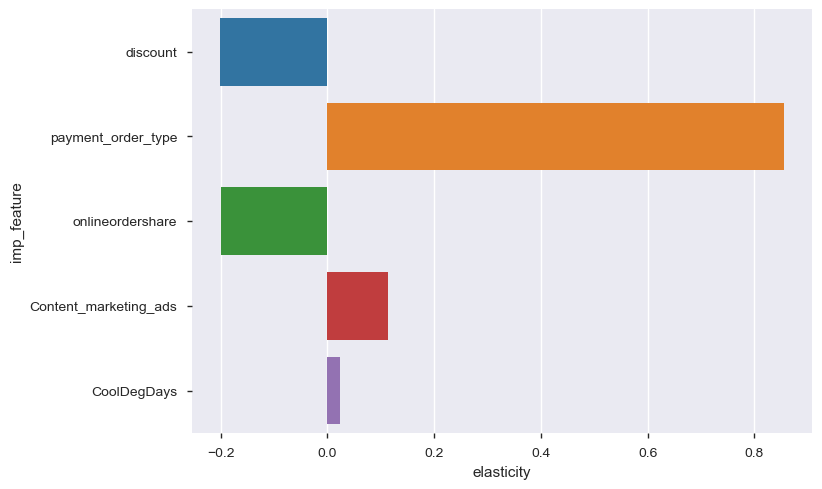

imp_feature   coef  elasticity
0               discount -0.325      -0.201
1     payment_order_type  0.951       0.855
2       onlineordershare -0.239      -0.200
3  Content_marketing_ads  0.130       0.114
4            CoolDegDays  0.045       0.023

In [350]:
elasticity(mm1,camera_train_mm)

Text(0, 0.5, 'y_pred')

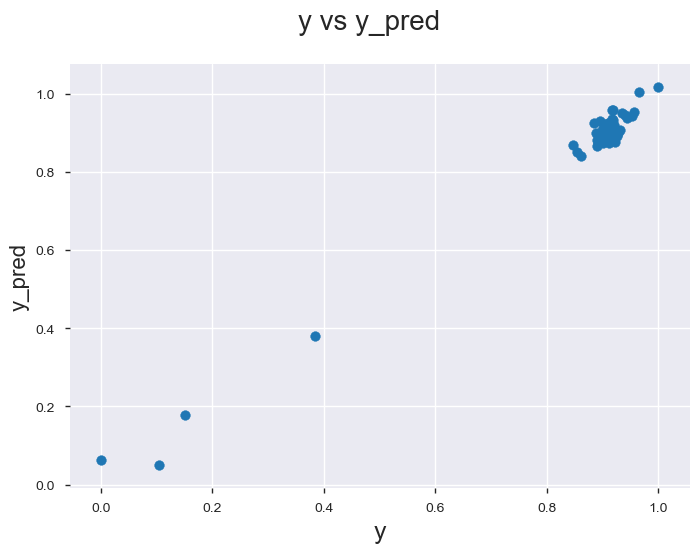

In [351]:
# Plotting y and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y, y_pred)
fig.suptitle('y vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 

In [352]:
#3.Kyock Model

In [353]:
weeklycam.columns

Index(['week', 'gmv', 'product_mrp', 'discount', 'sla',
       'product_procurement_sla', 'fsn_id', 'payment_order_type',
       'premium_prod', 'gmvpo', 'onlineordershare', 'Date', 'Year', 'Month',
       'TV_ads', 'Sponsorship_ads', 'Content_marketing_ads',
       'Online_marketing_ads', 'NPS', 'Stock_Index', 'Special_sales', 'Payday',
       'HeatDegDays', 'CoolDegDays', 'TotalRainMm', 'TotalSnowCm',
       'SnowOnGrndCm'],
      dtype='object')

In [354]:
camera_kyock_mod = weeklycam[['gmv', 'discount', 'sla','product_procurement_sla', 'payment_order_type',
       'onlineordershare', 'TV_ads', 'Sponsorship_ads', 'Content_marketing_ads',
       'Online_marketing_ads', 'NPS', 'Stock_Index', 'Special_sales', 'Payday',
       'HeatDegDays', 'CoolDegDays', 'TotalRainMm', 'TotalSnowCm',
       'SnowOnGrndCm']]           


camera_kyock_mod.head()

gmv  discount   sla  product_procurement_sla  payment_order_type  \
0   18196.000     0.479 2.500                    2.607                  28   
1 4081557.000     0.433 7.026                    2.672                1003   
2 4675000.000     0.438 6.410                    2.704                1097   
3 4452052.000     0.431 6.432                    2.740                1036   
4 2974282.000     0.425 6.396                    2.715                 637   

   onlineordershare  TV_ads  Sponsorship_ads  Content_marketing_ads  \
0           100.000   0.054            1.854                  0.000   
1            34.081   0.081            2.780                  0.000   
2            34.881   0.081            2.780                  0.000   
3            33.312   0.081            2.780                  0.000   
4            30.877   0.028            1.139                  0.000   

   Online_marketing_ads    NPS  Stock_Index  Special_sales  Payday  \
0                 0.332 54.600     1177.000          0.000   0.200   
1                 0.498 54.600     1177.000          0.000   0.000   
2                 0.498 54.600     1177.000          0.286   0.143   
3                 0.498 54.600     1177.000          0.000   0.000   
4                 0.192 56.139     1185.286          0.000   0.143   

   HeatDegDays  CoolDegDays  TotalRainMm  TotalSnowCm  SnowOnGrndCm  
0        0.100        1.460        0.000        0.000         0.000  
1        1.059        2.322        4.155        0.029         0.041  
2        0.816        4.722        1.569        0.029         0.041  
3        1.632        4.172        1.141        0.029         0.041  
4        0.816        5.908        4.341        0.029         0.041

In [355]:
camera_kyock_mod['lag1gmv'] = camera_kyock_mod['gmv'].shift(-1)

In [356]:
### Checking NaN

camera_kyock_mod.isnull().sum()

gmv                        0
discount                   0
sla                        0
product_procurement_sla    0
payment_order_type         0
onlineordershare           0
TV_ads                     1
Sponsorship_ads            1
Content_marketing_ads      1
Online_marketing_ads       1
NPS                        0
Stock_Index                0
Special_sales              0
Payday                     0
HeatDegDays                0
CoolDegDays                0
TotalRainMm                0
TotalSnowCm                0
SnowOnGrndCm               0
lag1gmv                    1
dtype: int64

In [357]:
camera_kyock_mod = camera_kyock_mod.fillna(0)

In [358]:
camera_kyock_mod.head()

gmv  discount   sla  product_procurement_sla  payment_order_type  \
0   18196.000     0.479 2.500                    2.607                  28   
1 4081557.000     0.433 7.026                    2.672                1003   
2 4675000.000     0.438 6.410                    2.704                1097   
3 4452052.000     0.431 6.432                    2.740                1036   
4 2974282.000     0.425 6.396                    2.715                 637   

   onlineordershare  TV_ads  Sponsorship_ads  Content_marketing_ads  \
0           100.000   0.054            1.854                  0.000   
1            34.081   0.081            2.780                  0.000   
2            34.881   0.081            2.780                  0.000   
3            33.312   0.081            2.780                  0.000   
4            30.877   0.028            1.139                  0.000   

   Online_marketing_ads    NPS  Stock_Index  Special_sales  Payday  \
0                 0.332 54.600     1177.000          0.000   0.200   
1                 0.498 54.600     1177.000          0.000   0.000   
2                 0.498 54.600     1177.000          0.286   0.143   
3                 0.498 54.600     1177.000          0.000   0.000   
4                 0.192 56.139     1185.286          0.000   0.143   

   HeatDegDays  CoolDegDays  TotalRainMm  TotalSnowCm  SnowOnGrndCm  \
0        0.100        1.460        0.000        0.000         0.000   
1        1.059        2.322        4.155        0.029         0.041   
2        0.816        4.722        1.569        0.029         0.041   
3        1.632        4.172        1.141        0.029         0.041   
4        0.816        5.908        4.341        0.029         0.041   

      lag1gmv  
0 4081557.000  
1 4675000.000  
2 4452052.000  
3 2974282.000  
4    1498.000

In [359]:
###  Import the StandardScaler()
# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

### Create a scaling object
# scaler = StandardScaler()
scaler = MinMaxScaler()

### Create a list of the variables that you need to scale
varlist = ['gmv', 'discount', 'sla','product_procurement_sla', 'payment_order_type',
       'onlineordershare', 'TV_ads', 'Sponsorship_ads', 'Content_marketing_ads',
       'Online_marketing_ads', 'NPS', 'Stock_Index', 'Special_sales', 'Payday',
       'HeatDegDays', 'CoolDegDays', 'TotalRainMm', 'TotalSnowCm',
       'SnowOnGrndCm','lag1gmv']

### Scale these variables using 'fit_transform'
camera_kyock_mod[varlist] = scaler.fit_transform(camera_kyock_mod[varlist])



In [360]:
camera_kyock_mod.head()

gmv  discount   sla  product_procurement_sla  payment_order_type  \
0 0.001     0.370 0.000                    0.536               0.005   
1 0.313     0.294 0.647                    0.557               0.196   
2 0.358     0.302 0.559                    0.568               0.215   
3 0.341     0.290 0.562                    0.580               0.203   
4 0.228     0.280 0.557                    0.572               0.125   

   onlineordershare  TV_ads  Sponsorship_ads  Content_marketing_ads  \
0             1.000   0.015            0.058                  0.000   
1             0.341   0.023            0.088                  0.000   
2             0.349   0.023            0.088                  0.000   
3             0.333   0.023            0.088                  0.000   
4             0.309   0.008            0.036                  0.000   

   Online_marketing_ads   NPS  Stock_Index  Special_sales  Payday  \
0                 0.036 0.654        0.714          0.000   1.000   
1                 0.054 0.654        0.714          0.000   0.000   
2                 0.054 0.654        0.714          0.286   0.714   
3                 0.054 0.654        0.714          0.000   0.000   
4                 0.021 0.753        0.750          0.000   0.714   

   HeatDegDays  CoolDegDays  TotalRainMm  TotalSnowCm  SnowOnGrndCm  lag1gmv  
0        0.000        0.247        0.000        0.000         0.000    0.313  
1        0.069        0.393        0.420        0.019         0.009    0.358  
2        0.051        0.799        0.159        0.019         0.009    0.341  
3        0.109        0.706        0.115        0.019         0.009    0.228  
4        0.051        1.000        0.439        0.019         0.009    0.000

In [361]:
### Split the train dataset into X and y
from sklearn.model_selection import train_test_split
x = camera_kyock_mod.drop('gmv',axis=1)
y = camera_kyock_mod['gmv']

camera_train_km = camera_kyock_mod

In [362]:
print("X = Independent variable & Y = Target variable")
print(x.shape,y.shape)

X = Independent variable & Y = Target variable
(52, 19) (52,)


In [363]:
###  Represent
km = LinearRegression()

###  Fit a line
km.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [364]:
###  Coefficient values

coef = pd.DataFrame(x.columns)
coef['Coefficient'] = pd.Series(km.coef_)
coef

0  Coefficient
0                  discount       -0.425
1                       sla       -0.300
2   product_procurement_sla       -0.075
3        payment_order_type        0.735
4          onlineordershare       -0.459
5                    TV_ads       -0.144
6           Sponsorship_ads        0.059
7     Content_marketing_ads        0.033
8      Online_marketing_ads        0.201
9                       NPS        0.013
10              Stock_Index       -0.066
11            Special_sales        0.179
12                   Payday       -0.032
13              HeatDegDays       -0.145
14              CoolDegDays       -0.031
15              TotalRainMm       -0.000
16              TotalSnowCm        0.013
17             SnowOnGrndCm        0.080
18                  lag1gmv       -0.042

In [365]:
col = x.columns
col

Index(['discount', 'sla', 'product_procurement_sla', 'payment_order_type',
       'onlineordershare', 'TV_ads', 'Sponsorship_ads',
       'Content_marketing_ads', 'Online_marketing_ads', 'NPS', 'Stock_Index',
       'Special_sales', 'Payday', 'HeatDegDays', 'CoolDegDays', 'TotalRainMm',
       'TotalSnowCm', 'SnowOnGrndCm', 'lag1gmv'],
      dtype='object')

In [366]:
#### Model Building - Stepwise selection for feature selection

In [367]:
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [368]:
def stepwise_selection(x, y,
                       initial_list=['discount', 'sla','product_procurement_sla', 'payment_order_type',
       'onlineordershare', 'TV_ads', 'Sponsorship_ads', 'Content_marketing_ads',
       'Online_marketing_ads', 'NPS', 'Stock_Index', 'Special_sales', 'Payday',
       'HeatDegDays', 'CoolDegDays', 'TotalRainMm', 'TotalSnowCm',
       'SnowOnGrndCm','lag1gmv'],
                       threshold_in=0.01,threshold_out = 0.05, verbose=True):
    
    included = list(initial_list)
    while True:
        changed=False
        ### forward step
        excluded = list(set(x.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
                
                
        ###backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included]))).fit()
        ###use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() ###null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [369]:
import statsmodels.api as sm  

final_features = stepwise_selection(x, y)

print("\n","final_selected_features:",final_features)

Drop TotalRainMm                    with p-value 0.996042
Drop NPS                            with p-value 0.928178
Drop TotalSnowCm                    with p-value 0.859571
Drop CoolDegDays                    with p-value 0.783816
Drop product_procurement_sla        with p-value 0.773979
Drop lag1gmv                        with p-value 0.833217
Drop Content_marketing_ads          with p-value 0.643154
Drop SnowOnGrndCm                   with p-value 0.423798
Drop Sponsorship_ads                with p-value 0.407207
Drop Payday                         with p-value 0.430914
Drop Stock_Index                    with p-value 0.181498
Drop TV_ads                         with p-value 0.364785

 final_selected_features: ['discount', 'sla', 'payment_order_type', 'onlineordershare', 'Online_marketing_ads', 'Special_sales', 'HeatDegDays']


In [370]:
### Import statsmodels
import statsmodels.api as sm  

### Subsetting training data for 15 selected columns
x_rfe1 = x[final_features]

x_rfe1 = sm.add_constant(x_rfe1)

### Fitting the model with selected variables
km1 = sm.OLS(y, x_rfe1).fit() 

print(km1.params)

const                   0.554
discount               -0.353
sla                    -0.239
payment_order_type      0.657
onlineordershare       -0.453
Online_marketing_ads    0.192
Special_sales           0.162
HeatDegDays            -0.141
dtype: float64


In [371]:
print(km1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     28.01
Date:                Sat, 29 Feb 2020   Prob (F-statistic):           3.15e-14
Time:                        16:22:12   Log-Likelihood:                 64.263
No. Observations:                  52   AIC:                            -112.5
Df Residuals:                      44   BIC:                            -96.92
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5537 

In [372]:
### Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                 const 94.800
5  Online_marketing_ads  2.080
4      onlineordershare  2.040
3    payment_order_type  1.970
7           HeatDegDays  1.620
1              discount  1.570
2                   sla  1.510
6         Special_sales  1.040

In [373]:
features = list(x_rfe1.columns)
features.remove('const')
features

['discount',
 'sla',
 'payment_order_type',
 'onlineordershare',
 'Online_marketing_ads',
 'Special_sales',
 'HeatDegDays']

In [374]:
### Model Evaluation on testing data
x_2 = x[features]


### Predicition with selected features on the test data
y_pred = km1.predict(sm.add_constant(x_2))

In [375]:
### Mean square error (MSE)
mse = np.mean((y_pred - y)**2)
mse

0.004944236343104828

In [376]:
### Coefficient values

coef = pd.DataFrame(x_rfe1.columns)
coef['Coefficient'] = pd.Series(km.coef_)
coef

0  Coefficient
0                 const       -0.425
1              discount       -0.300
2                   sla       -0.075
3    payment_order_type        0.735
4      onlineordershare       -0.459
5  Online_marketing_ads       -0.144
6         Special_sales        0.059
7           HeatDegDays        0.033

In [377]:
### Using K-Fold Cross validation evaluating on whole dataset

# lm = LinearRegression()
fold = KFold(10,shuffle = True, random_state = 100)

cv_scores = -cross_val_score(km,x[features],y,cv=fold,scoring='neg_mean_squared_error')

print("Neg. of MSE:",cv_scores,"\n")
print("Mean of 5 KFold CV - MSE:",cv_scores.mean())

Neg. of MSE: [0.02844543 0.0133744  0.0074809  0.03436373 0.00722319 0.00179729
 0.0011773  0.02897983 0.00359022 0.00373553] 

Mean of 5 KFold CV - MSE: 0.013016781695342294


In [378]:
def elasticity(model,x):
    
    features_df = pd.DataFrame(model.params)
    features_df = features_df.rename(columns={0:'coef'})
    
    features_df['imp_feature'] = model.params.index
    features_df = features_df[features_df.imp_feature != 'const'][['imp_feature','coef']]
    features_df.index = range(len(features_df))
#      features

    elasticity_list = list()
    
    for i in range(len(features_df)):
        elasticity_list.append(((features_df.coef[i] * np.mean(x[features_df.imp_feature[i]])) / np.mean(x['gmv'])))

    features_df['elasticity'] = np.round(elasticity_list,3)
    
    sns.barplot(x='elasticity',y='imp_feature',data=features_df)
    plt.show()
    
    return features_df

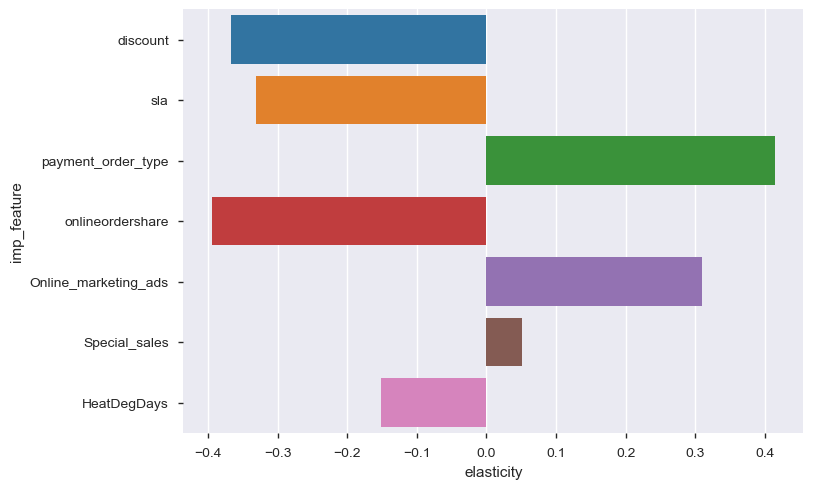

imp_feature   coef  elasticity
0              discount -0.353      -0.367
1                   sla -0.239      -0.331
2    payment_order_type  0.657       0.415
3      onlineordershare -0.453      -0.395
4  Online_marketing_ads  0.192       0.310
5         Special_sales  0.162       0.051
6           HeatDegDays -0.141      -0.151

In [379]:
elasticity(km1,camera_train_km)

Text(0, 0.5, 'y_pred')

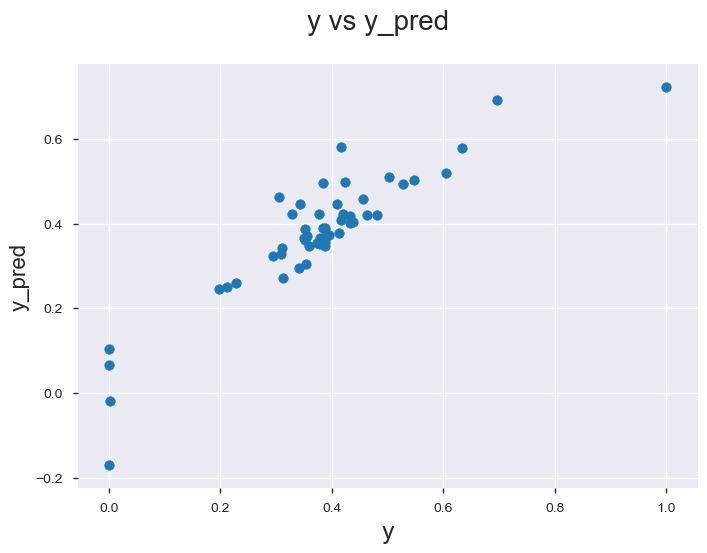

In [380]:
# Plotting y and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y, y_pred)
fig.suptitle('y vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

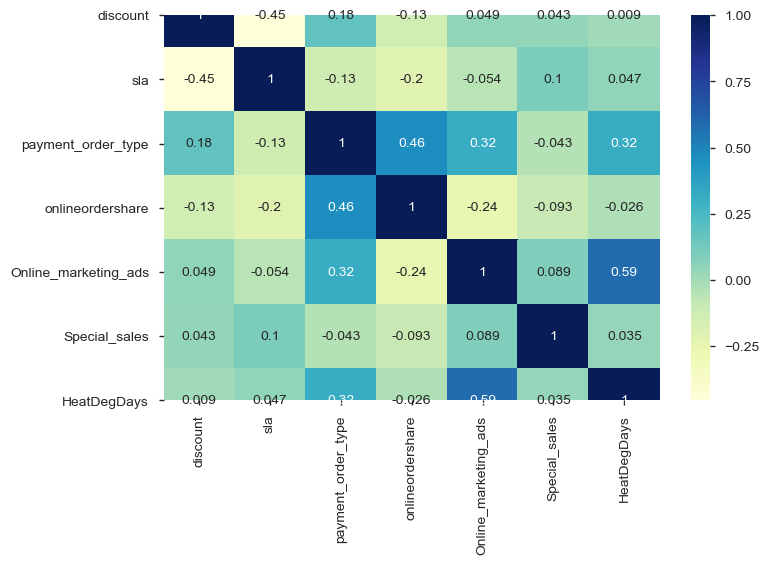

In [381]:
# Figure size
plt.figure(figsize=(8,5))

# Heatmap
sns.heatmap(camera_train_km[features].corr(), cmap="YlGnBu", annot=True)
plt.show()

In [429]:
#  Modeling - Gaming Accessory

In [430]:
### Linear Model

In [431]:
###  Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [432]:
weeklygam.columns

Index(['week', 'gmv', 'product_mrp', 'discount', 'sla',
       'product_procurement_sla', 'fsn_id', 'payment_order_type', 'gmvpo',
       'onlineordershare', 'Date', 'Year', 'Month', 'TV_ads',
       'Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'HeatDegDays',
       'CoolDegDays', 'TotalRainMm', 'TotalSnowCm', 'SnowOnGrndCm', 'lag1disc',
       'lag2disc', 'lag3disc', 'lag1NPS', 'lag2NPS', 'lag3NPS',
       'lag1StockIndex', 'lag2StockIndex', 'lag3StockIndex', 'lag1Ssales',
       'lag2Ssales', 'lag3Ssales', 'lag1Pd', 'lag2Pd', 'lag3Pd'],
      dtype='object')

In [433]:
gam_lin_mod = weeklygam[['gmv', 'discount', 'sla','product_procurement_sla', 'payment_order_type',
       'onlineordershare', 'TV_ads', 'Sponsorship_ads', 'Content_marketing_ads',
       'Online_marketing_ads', 'NPS', 'Stock_Index', 'Special_sales', 'Payday',
       'HeatDegDays', 'CoolDegDays', 'TotalRainMm', 'TotalSnowCm',
       'SnowOnGrndCm']]
                            
    
gam_lin_mod.head()

gmv  discount   sla  product_procurement_sla  payment_order_type  \
0   17466.000     0.220 2.960                    2.400                  25   
1 1435300.000     0.414 5.170                    2.882                 689   
2 1097388.359     0.429 5.115                    2.406                 534   
3 1158166.000     0.352 5.179                    2.191                 425   
4  742062.000     0.363 5.552                    2.158                 246   

   onlineordershare  TV_ads  Sponsorship_ads  Content_marketing_ads  \
0           100.000   0.054            1.854                  0.000   
1            26.208   0.081            2.780                  0.000   
2            22.418   0.081            2.780                  0.000   
3            21.008   0.081            2.780                  0.000   
4            18.880   0.028            1.139                  0.000   

   Online_marketing_ads    NPS  Stock_Index  Special_sales  Payday  \
0                 0.332 54.600     1177.000          0.000   0.200   
1                 0.498 54.600     1177.000          0.000   0.000   
2                 0.498 54.600     1177.000          0.286   0.143   
3                 0.498 54.600     1177.000          0.000   0.000   
4                 0.192 56.139     1185.286          0.000   0.143   

   HeatDegDays  CoolDegDays  TotalRainMm  TotalSnowCm  SnowOnGrndCm  
0        0.100        1.460        0.000        0.000         0.000  
1        1.059        2.322        4.155        0.029         0.041  
2        0.816        4.722        1.569        0.029         0.041  
3        1.632        4.172        1.141        0.029         0.041  
4        0.816        5.908        4.341        0.029         0.041

In [434]:
### Checking NaN
gam_lin_mod.isnull().sum()

gmv                        0
discount                   0
sla                        0
product_procurement_sla    0
payment_order_type         0
onlineordershare           0
TV_ads                     1
Sponsorship_ads            1
Content_marketing_ads      1
Online_marketing_ads       1
NPS                        0
Stock_Index                0
Special_sales              0
Payday                     0
HeatDegDays                0
CoolDegDays                0
TotalRainMm                0
TotalSnowCm                0
SnowOnGrndCm               0
dtype: int64

In [435]:
gam_lin_mod.fillna(0, inplace = True)

In [436]:
### Import the StandardScaler()
# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

### Create a scaling object
# scaler = StandardScaler()
scaler = MinMaxScaler()


### Create a list of the variables that you need to scale
varlist = ['gmv', 'discount', 'sla','product_procurement_sla', 'payment_order_type',
       'onlineordershare', 'TV_ads', 'Sponsorship_ads', 'Content_marketing_ads',
       'Online_marketing_ads', 'NPS', 'Stock_Index', 'Special_sales', 'Payday',
       'HeatDegDays', 'CoolDegDays', 'TotalRainMm', 'TotalSnowCm',
       'SnowOnGrndCm']
                                      

### Scale these variables using 'fit_transform'
gam_lin_mod[varlist] = scaler.fit_transform(gam_lin_mod[varlist])

In [437]:
gam_lin_mod.head()

gmv  discount   sla  product_procurement_sla  payment_order_type  \
0 0.004     0.000 0.000                    0.622               0.009   
1 0.363     0.615 0.596                    0.836               0.235   
2 0.278     0.663 0.581                    0.625               0.182   
3 0.293     0.421 0.598                    0.529               0.145   
4 0.188     0.456 0.699                    0.515               0.084   

   onlineordershare  TV_ads  Sponsorship_ads  Content_marketing_ads  \
0             1.000   0.015            0.058                  0.000   
1             0.262   0.023            0.088                  0.000   
2             0.224   0.023            0.088                  0.000   
3             0.210   0.023            0.088                  0.000   
4             0.189   0.008            0.036                  0.000   

   Online_marketing_ads   NPS  Stock_Index  Special_sales  Payday  \
0                 0.036 0.654        0.714          0.000   1.000   
1                 0.054 0.654        0.714          0.000   0.000   
2                 0.054 0.654        0.714          0.286   0.714   
3                 0.054 0.654        0.714          0.000   0.000   
4                 0.021 0.753        0.750          0.000   0.714   

   HeatDegDays  CoolDegDays  TotalRainMm  TotalSnowCm  SnowOnGrndCm  
0        0.000        0.247        0.000        0.000         0.000  
1        0.069        0.393        0.420        0.019         0.009  
2        0.051        0.799        0.159        0.019         0.009  
3        0.109        0.706        0.115        0.019         0.009  
4        0.051        1.000        0.439        0.019         0.009

In [438]:
### Split the train dataset into X and y
from sklearn.model_selection import train_test_split
x = gam_lin_mod.drop('gmv',axis=1)
y = gam_lin_mod['gmv']

gaming_train_lm = gam_lin_mod

In [439]:
print("x dataset: ",x.shape)
print("y dataset: ",y.shape)

x dataset:  (53, 18)
y dataset:  (53,)


In [440]:
###  Represent
lm = LinearRegression()

###  Fit a line
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [441]:
###  Coefficient values

coef = pd.DataFrame(x.columns)
coef['Coefficient'] = pd.Series(lm.coef_)
coef

0  Coefficient
0                  discount        0.131
1                       sla       -0.146
2   product_procurement_sla        0.096
3        payment_order_type        0.796
4          onlineordershare       -0.384
5                    TV_ads        0.006
6           Sponsorship_ads       -0.159
7     Content_marketing_ads        0.029
8      Online_marketing_ads        0.059
9                       NPS       -0.412
10              Stock_Index       -0.071
11            Special_sales        0.052
12                   Payday        0.045
13              HeatDegDays       -0.173
14              CoolDegDays        0.032
15              TotalRainMm       -0.051
16              TotalSnowCm        0.090
17             SnowOnGrndCm        0.036

In [442]:
col = x.columns
col

Index(['discount', 'sla', 'product_procurement_sla', 'payment_order_type',
       'onlineordershare', 'TV_ads', 'Sponsorship_ads',
       'Content_marketing_ads', 'Online_marketing_ads', 'NPS', 'Stock_Index',
       'Special_sales', 'Payday', 'HeatDegDays', 'CoolDegDays', 'TotalRainMm',
       'TotalSnowCm', 'SnowOnGrndCm'],
      dtype='object')

In [443]:
#### Model Building - Stepwise selection for feature selection

In [444]:
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [447]:
def stepwise_selection(x, y,
                       initial_list=['discount', 'sla','product_procurement_sla', 'payment_order_type',
       'onlineordershare', 'TV_ads', 'Sponsorship_ads', 'Content_marketing_ads',
       'Online_marketing_ads', 'NPS', 'Stock_Index', 'Special_sales', 'Payday',
       'HeatDegDays', 'CoolDegDays', 'TotalRainMm', 'TotalSnowCm',
       'SnowOnGrndCm'],
                       threshold_in=0.01,threshold_out = 0.05, verbose=True):
    
    included = list(initial_list)
    while True:
        changed=False
        ###forward step
        excluded = list(set(x.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
                
                
        ###backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included]))).fit()
        ###use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() ###null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [448]:
import statsmodels.api as sm  

final_features = stepwise_selection(x, y)

print("\n","final_selected_features:",final_features)

Drop TV_ads                         with p-value 0.954575
Drop Content_marketing_ads          with p-value 0.791191
Drop CoolDegDays                    with p-value 0.774573
Drop SnowOnGrndCm                   with p-value 0.673322
Drop Online_marketing_ads           with p-value 0.67037
Drop TotalRainMm                    with p-value 0.439575
Drop product_procurement_sla        with p-value 0.421674
Drop TotalSnowCm                    with p-value 0.249612
Drop Special_sales                  with p-value 0.331685
Drop HeatDegDays                    with p-value 0.265956
Drop Stock_Index                    with p-value 0.268317
Drop discount                       with p-value 0.229812
Drop Payday                         with p-value 0.30338

 final_selected_features: ['sla', 'payment_order_type', 'onlineordershare', 'Sponsorship_ads', 'NPS']


In [449]:
###  Import statsmodels
import statsmodels.api as sm  

###  Subsetting training data for 15 selected columns
x_rfe1 = x[final_features]

x_rfe1 = sm.add_constant(x_rfe1)

###  Fitting the model with selected variables
lm1 = sm.OLS(y, x_rfe1).fit() 

print(lm1.params)

const                 0.633
sla                  -0.215
payment_order_type    0.859
onlineordershare     -0.497
Sponsorship_ads      -0.120
NPS                  -0.459
dtype: float64


In [450]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     31.98
Date:                Sat, 29 Feb 2020   Prob (F-statistic):           4.79e-14
Time:                        18:39:16   Log-Likelihood:                 56.145
No. Observations:                  53   AIC:                            -100.3
Df Residuals:                      47   BIC:                            -88.47
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.6325      0

In [451]:
###  Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0               const 53.180
2  payment_order_type  2.550
3    onlineordershare  2.350
5                 NPS  2.290
1                 sla  2.060
4     Sponsorship_ads  1.660

In [452]:
features = list(x_rfe1.columns)
features.remove('const')
features

['sla', 'payment_order_type', 'onlineordershare', 'Sponsorship_ads', 'NPS']

In [453]:
###  Model Evaluation on testing data
x_2 = x[features]


###  Predicition with selected features on the test data
y_pred = lm1.predict(sm.add_constant(x_2))

In [454]:
###  Mean square error (MSE)

mse = np.mean((y_pred - y)**2)
mse

0.00703701633918003

In [455]:
###  Coefficient values

coef = pd.DataFrame(x_rfe1.columns)
coef['Coefficient'] = pd.Series(lm.coef_)
coef

0  Coefficient
0               const        0.131
1                 sla       -0.146
2  payment_order_type        0.096
3    onlineordershare        0.796
4     Sponsorship_ads       -0.384
5                 NPS        0.006

In [456]:
### Mean Square Error 
###  Using K-Fold Cross validation evaluating on selected dataset

# lm = LinearRegression()
fold = KFold(10,shuffle = True, random_state = 100)

cv_scores = -cross_val_score(lm,x[features],y,cv=fold,scoring='neg_mean_squared_error')

print("Neg. of MSE:",cv_scores,"\n")
print("Mean of 5 KFold CV - MSE:",cv_scores.mean())

Neg. of MSE: [0.00967564 0.00609919 0.03482517 0.01987497 0.00574672 0.01179431
 0.00843402 0.00767997 0.02855588 0.00205663] 

Mean of 5 KFold CV - MSE: 0.013474249428487767


In [457]:
def elasticity(model,x):
    
    features_df = pd.DataFrame(model.params)
    features_df = features_df.rename(columns={0:'coef'})
    
    features_df['imp_feature'] = model.params.index
    features_df = features_df[features_df.imp_feature != 'const'][['imp_feature','coef']]
    features_df.index = range(len(features_df))
#    features

    elasticity_list = list()
    
    for i in range(len(features_df)):
        elasticity_list.append(((features_df.coef[i] * np.mean(x[features_df.imp_feature[i]])) / np.mean(x['gmv'])))

    features_df['elasticity'] = np.round(elasticity_list,3)
    
    sns.barplot(x='elasticity',y='imp_feature',data=features_df)
    plt.show()
    
    return features_df

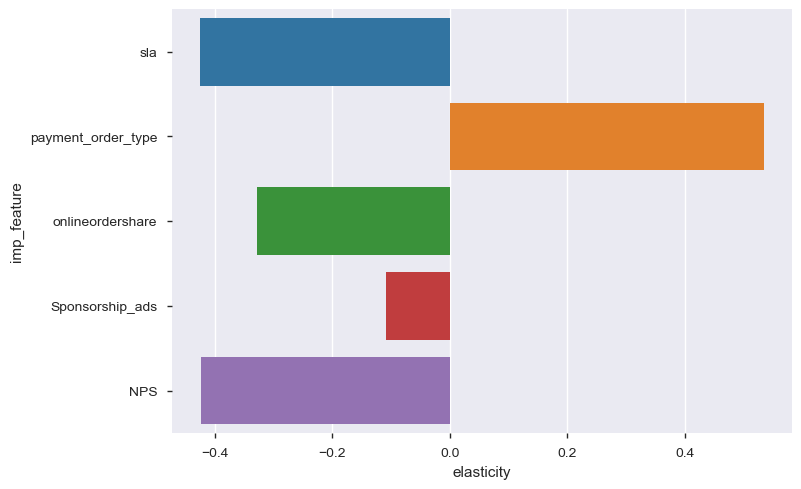

imp_feature   coef  elasticity
0                 sla -0.215      -0.425
1  payment_order_type  0.859       0.534
2    onlineordershare -0.497      -0.328
3     Sponsorship_ads -0.120      -0.108
4                 NPS -0.459      -0.424

In [458]:
elasticity(lm1,gaming_train_lm)

Text(0, 0.5, 'y_pred')

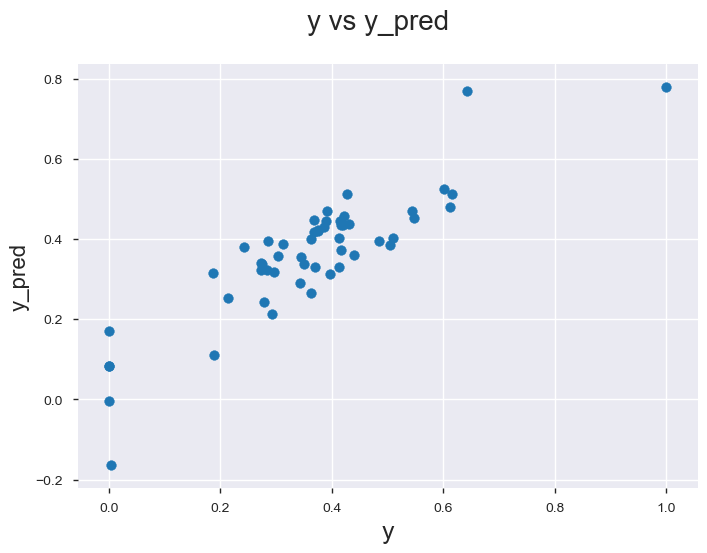

In [459]:
# Plotting y and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y, y_pred)
fig.suptitle('y vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

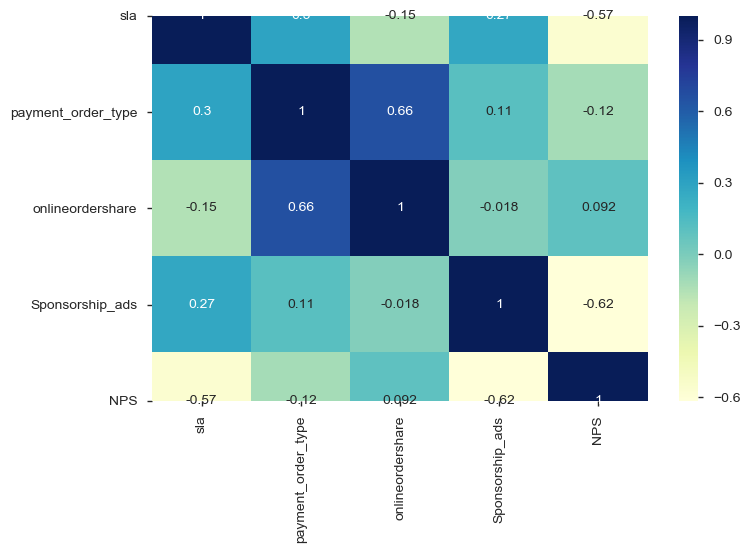

In [461]:
# Figure size
plt.figure(figsize=(8,5))

# Heatmap
sns.heatmap(gaming_train_lm[features].corr(), cmap="YlGnBu", annot=True)
plt.show()

In [462]:
#Multiplicative Model

In [463]:
weeklygam.columns

Index(['week', 'gmv', 'product_mrp', 'discount', 'sla',
       'product_procurement_sla', 'fsn_id', 'payment_order_type', 'gmvpo',
       'onlineordershare', 'Date', 'Year', 'Month', 'TV_ads',
       'Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'HeatDegDays',
       'CoolDegDays', 'TotalRainMm', 'TotalSnowCm', 'SnowOnGrndCm', 'lag1disc',
       'lag2disc', 'lag3disc', 'lag1NPS', 'lag2NPS', 'lag3NPS',
       'lag1StockIndex', 'lag2StockIndex', 'lag3StockIndex', 'lag1Ssales',
       'lag2Ssales', 'lag3Ssales', 'lag1Pd', 'lag2Pd', 'lag3Pd'],
      dtype='object')

In [464]:
gam_multi_mod = weeklygam[['gmv', 'discount', 'sla','product_procurement_sla', 'payment_order_type',
       'onlineordershare', 'TV_ads', 'Sponsorship_ads', 'Content_marketing_ads',
       'Online_marketing_ads', 'NPS', 'Stock_Index', 'Special_sales', 'Payday',
       'HeatDegDays', 'CoolDegDays', 'TotalRainMm', 'TotalSnowCm',
       'SnowOnGrndCm']]         

gam_multi_mod.head()

gmv  discount   sla  product_procurement_sla  payment_order_type  \
0   17466.000     0.220 2.960                    2.400                  25   
1 1435300.000     0.414 5.170                    2.882                 689   
2 1097388.359     0.429 5.115                    2.406                 534   
3 1158166.000     0.352 5.179                    2.191                 425   
4  742062.000     0.363 5.552                    2.158                 246   

   onlineordershare  TV_ads  Sponsorship_ads  Content_marketing_ads  \
0           100.000   0.054            1.854                  0.000   
1            26.208   0.081            2.780                  0.000   
2            22.418   0.081            2.780                  0.000   
3            21.008   0.081            2.780                  0.000   
4            18.880   0.028            1.139                  0.000   

   Online_marketing_ads    NPS  Stock_Index  Special_sales  Payday  \
0                 0.332 54.600     1177.000          0.000   0.200   
1                 0.498 54.600     1177.000          0.000   0.000   
2                 0.498 54.600     1177.000          0.286   0.143   
3                 0.498 54.600     1177.000          0.000   0.000   
4                 0.192 56.139     1185.286          0.000   0.143   

   HeatDegDays  CoolDegDays  TotalRainMm  TotalSnowCm  SnowOnGrndCm  
0        0.100        1.460        0.000        0.000         0.000  
1        1.059        2.322        4.155        0.029         0.041  
2        0.816        4.722        1.569        0.029         0.041  
3        1.632        4.172        1.141        0.029         0.041  
4        0.816        5.908        4.341        0.029         0.041

In [465]:
### Applying Log 
gam_multi_mod=np.log(gam_multi_mod)

gam_multi_mod = gam_multi_mod.fillna(0)
gam_multi_mod = gam_multi_mod.replace([np.inf, -np.inf], 0)

In [466]:
gam_multi_mod.head()

gmv  discount   sla  product_procurement_sla  payment_order_type  \
0  9.768    -1.516 1.085                    0.875               3.219   
1 14.177    -0.883 1.643                    1.059               6.535   
2 13.908    -0.847 1.632                    0.878               6.280   
3 13.962    -1.043 1.645                    0.784               6.052   
4 13.517    -1.012 1.714                    0.769               5.505   

   onlineordershare  TV_ads  Sponsorship_ads  Content_marketing_ads  \
0             4.605  -2.922            0.617                 -8.364   
1             3.266  -2.516            1.023                 -7.958   
2             3.110  -2.516            1.023                 -7.958   
3             3.045  -2.516            1.023                 -7.958   
4             2.938  -3.568            0.131                 -9.046   

   Online_marketing_ads   NPS  Stock_Index  Special_sales  Payday  \
0                -1.103 4.000        7.071          0.000  -1.609   
1                -0.698 4.000        7.071          0.000   0.000   
2                -0.698 4.000        7.071         -1.253  -1.946   
3                -0.698 4.000        7.071          0.000   0.000   
4                -1.652 4.028        7.078          0.000  -1.946   

   HeatDegDays  CoolDegDays  TotalRainMm  TotalSnowCm  SnowOnGrndCm  
0       -2.303        0.378        0.000        0.000         0.000  
1        0.057        0.842        1.424       -3.532        -3.189  
2       -0.203        1.552        0.451       -3.532        -3.189  
3        0.490        1.428        0.131       -3.532        -3.189  
4       -0.203        1.776        1.468       -3.532        -3.189

In [467]:
###  Import the StandardScaler()
# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

###  Create a scaling object
# scaler = StandardScaler()
scaler = MinMaxScaler()

###  Create a list of the variables that you need to scale
varlist = ['gmv', 'discount', 'sla','product_procurement_sla', 'payment_order_type',
       'onlineordershare', 'TV_ads', 'Sponsorship_ads', 'Content_marketing_ads',
       'Online_marketing_ads', 'NPS', 'Stock_Index', 'Special_sales', 'Payday',
       'HeatDegDays', 'CoolDegDays', 'TotalRainMm', 'TotalSnowCm',
       'SnowOnGrndCm']      



### Scale these variables using 'fit_transform'
gam_multi_mod[varlist] = scaler.fit_transform(gam_multi_mod[varlist])

In [468]:
gam_multi_mod.head()

gmv  discount   sla  product_procurement_sla  payment_order_type  \
0 0.417     0.000 0.000                    0.743               0.403   
1 0.891     0.711 0.687                    0.898               0.819   
2 0.862     0.751 0.674                    0.745               0.787   
3 0.868     0.531 0.689                    0.665               0.758   
4 0.820     0.566 0.774                    0.653               0.690   

   onlineordershare  TV_ads  Sponsorship_ads  Content_marketing_ads  \
0             1.000   0.444            0.382                  0.358   
1             0.709   0.498            0.471                  0.388   
2             0.675   0.498            0.471                  0.388   
3             0.661   0.498            0.471                  0.388   
4             0.638   0.358            0.277                  0.307   

   Online_marketing_ads   NPS  Stock_Index  Special_sales  Payday  \
0                 0.393 0.687        0.734          1.000   0.173   
1                 0.467 0.687        0.734          1.000   1.000   
2                 0.467 0.687        0.734          0.356   0.000   
3                 0.467 0.687        0.734          1.000   1.000   
4                 0.293 0.780        0.768          1.000   0.000   

   HeatDegDays  CoolDegDays  TotalRainMm  TotalSnowCm  SnowOnGrndCm  
0        0.000        0.408        0.303        0.895         0.677  
1        0.477        0.604        0.736        0.000         0.000  
2        0.424        0.905        0.440        0.000         0.000  
3        0.564        0.853        0.343        0.000         0.000  
4        0.424        1.000        0.750        0.000         0.000

In [469]:
### Split the train dataset into X and y
from sklearn.model_selection import train_test_split

x = gam_multi_mod.drop('gmv',axis=1)
y = gam_multi_mod['gmv']

gaming_train_mm = gam_multi_mod

In [470]:
print("X = Independent variable & Y = Target variable")
print(x.shape,y.shape)

X = Independent variable & Y = Target variable
(53, 18) (53,)


In [471]:
### Represent
mm = LinearRegression()

### Fit a line
mm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [472]:
### Coefficient values

coef = pd.DataFrame(x.columns)
coef['Coefficient'] = pd.Series(mm.coef_)
coef

0  Coefficient
0                  discount       -0.160
1                       sla        0.180
2   product_procurement_sla        0.059
3        payment_order_type        1.248
4          onlineordershare       -0.478
5                    TV_ads        0.040
6           Sponsorship_ads       -0.032
7     Content_marketing_ads        0.110
8      Online_marketing_ads       -0.053
9                       NPS       -0.020
10              Stock_Index       -0.010
11            Special_sales        0.008
12                   Payday        0.008
13              HeatDegDays       -0.251
14              CoolDegDays       -0.018
15              TotalRainMm       -0.007
16              TotalSnowCm        0.022
17             SnowOnGrndCm        0.051

In [473]:
col = x.columns
col

Index(['discount', 'sla', 'product_procurement_sla', 'payment_order_type',
       'onlineordershare', 'TV_ads', 'Sponsorship_ads',
       'Content_marketing_ads', 'Online_marketing_ads', 'NPS', 'Stock_Index',
       'Special_sales', 'Payday', 'HeatDegDays', 'CoolDegDays', 'TotalRainMm',
       'TotalSnowCm', 'SnowOnGrndCm'],
      dtype='object')

In [474]:
#### Model Building - Stepwise selection for feature selection

In [475]:
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [476]:
def stepwise_selection(x, y,
                       initial_list=['discount', 'sla','product_procurement_sla', 'payment_order_type',
       'onlineordershare', 'TV_ads', 'Sponsorship_ads', 'Content_marketing_ads',
       'Online_marketing_ads', 'NPS', 'Stock_Index', 'Special_sales', 'Payday',
       'HeatDegDays', 'CoolDegDays', 'TotalRainMm', 'TotalSnowCm',
       'SnowOnGrndCm'],
                       threshold_in=0.01,threshold_out = 0.05, verbose=True):
    
    included = list(initial_list)
    while True:
        changed=False
        ###forward step
        excluded = list(set(x.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
                
                
        ###backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included]))).fit()
        ###use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() ###null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [477]:
import statsmodels.api as sm  

final_features = stepwise_selection(x, y)

print("\n","final_selected_features:",final_features)

Drop TotalRainMm                    with p-value 0.779116
Drop Special_sales                  with p-value 0.765299
Drop NPS                            with p-value 0.663374
Drop Online_marketing_ads           with p-value 0.566142
Drop TV_ads                         with p-value 0.616985
Drop TotalSnowCm                    with p-value 0.478159
Drop CoolDegDays                    with p-value 0.486768
Drop Stock_Index                    with p-value 0.327495
Drop Sponsorship_ads                with p-value 0.296471
Drop Payday                         with p-value 0.112116
Drop product_procurement_sla        with p-value 0.0555248

 final_selected_features: ['discount', 'sla', 'payment_order_type', 'onlineordershare', 'Content_marketing_ads', 'HeatDegDays', 'SnowOnGrndCm']


In [478]:
### Import statsmodels
import statsmodels.api as sm  

### Subsetting training data for 15 selected columns
x_rfe1 = x[final_features]

x_rfe1 = sm.add_constant(x_rfe1)


### Fitting the model with selected variables
mm1 = sm.OLS(y, x_rfe1).fit() 

print(mm1.params)

const                    0.265
discount                -0.169
sla                      0.171
payment_order_type       1.210
onlineordershare        -0.447
Content_marketing_ads    0.108
HeatDegDays             -0.211
SnowOnGrndCm             0.071
dtype: float64


In [479]:
print(mm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     457.4
Date:                Sat, 29 Feb 2020   Prob (F-statistic):           1.30e-39
Time:                        18:41:40   Log-Likelihood:                 117.68
No. Observations:                  53   AIC:                            -219.4
Df Residuals:                      45   BIC:                            -203.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.26

In [480]:
### Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                  const 64.020
3     payment_order_type 17.390
4       onlineordershare  9.780
2                    sla  3.470
5  Content_marketing_ads  3.400
6            HeatDegDays  3.330
1               discount  2.320
7           SnowOnGrndCm  1.500

In [481]:
x_rfe1.drop('payment_order_type', axis = 1, inplace = True)

In [482]:
### Model2

In [483]:
# Refitting with final selected variables
x_rfe1 = sm.add_constant(x_rfe1)

# Fitting the model with final selected variables
mm1 = sm.OLS(y, x_rfe1).fit()   
print(mm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     68.65
Date:                Sat, 29 Feb 2020   Prob (F-statistic):           2.72e-21
Time:                        18:41:43   Log-Likelihood:                 65.185
No. Observations:                  53   AIC:                            -116.4
Df Residuals:                      46   BIC:                            -102.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.06

In [484]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                  const 39.430
5            HeatDegDays  3.320
2                    sla  2.620
4  Content_marketing_ads  2.250
3       onlineordershare  1.570
1               discount  1.520
6           SnowOnGrndCm  1.430

In [485]:
x_rfe1.drop('SnowOnGrndCm', axis = 1, inplace = True)

In [486]:
### Model 3

In [487]:
# Refitting with final selected variables
x_rfe1 = sm.add_constant(x_rfe1)

# Fitting the model with final selected variables
mm1 = sm.OLS(y, x_rfe1).fit()   
print(mm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     84.13
Date:                Sat, 29 Feb 2020   Prob (F-statistic):           2.83e-22
Time:                        18:41:46   Log-Likelihood:                 65.173
No. Observations:                  53   AIC:                            -118.3
Df Residuals:                      47   BIC:                            -106.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.06

In [488]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                  const 39.140
5            HeatDegDays  2.440
2                    sla  2.360
4  Content_marketing_ads  2.240
3       onlineordershare  1.570
1               discount  1.450

In [489]:
features = list(x_rfe1.columns)
features.remove('discount')
features

['const', 'sla', 'onlineordershare', 'Content_marketing_ads', 'HeatDegDays']

In [490]:
#Model 4

In [491]:
# Refitting with final selected variables
x_rfe1 = sm.add_constant(x_rfe1)

# Fitting the model with final selected variables
mm1 = sm.OLS(y, x_rfe1).fit()   
print(mm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     84.13
Date:                Sat, 29 Feb 2020   Prob (F-statistic):           2.83e-22
Time:                        18:41:49   Log-Likelihood:                 65.173
No. Observations:                  53   AIC:                            -118.3
Df Residuals:                      47   BIC:                            -106.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.06

In [492]:
features = list(x_rfe1.columns)
features.remove('const')
features

['discount', 'sla', 'onlineordershare', 'Content_marketing_ads', 'HeatDegDays']

In [493]:
### Model Evaluation on testing data
x_2 = x[features]


### Predicition with selected features on the test data
y_pred = mm1.predict(sm.add_constant(x_2))

In [494]:
### Mean square error (MSE)
mse = np.mean((y_pred - y)**2)
mse

0.0050054366874615385

In [495]:
### Coefficient values

coef = pd.DataFrame(x_rfe1.columns)
coef['Coefficient'] = pd.Series(mm.coef_)
coef

0  Coefficient
0                  const       -0.160
1               discount        0.180
2                    sla        0.059
3       onlineordershare        1.248
4  Content_marketing_ads       -0.478
5            HeatDegDays        0.040

In [496]:
### Mean Square Error 
###  Using K-Fold Cross validation evaluating on selected dataset

# lm = LinearRegression()
fold = KFold(10,shuffle = True, random_state = 100)

cv_scores = -cross_val_score(mm,x[features],y,cv=fold,scoring='neg_mean_squared_error')

print("Neg. of MSE:",cv_scores,"\n")
print("Mean of 5 KFold CV - MSE:",cv_scores.mean())

Neg. of MSE: [0.01003229 0.01508932 0.0263223  0.00054561 0.0033242  0.01133251
 0.00379619 0.0009419  0.00456621 0.01563201] 

Mean of 5 KFold CV - MSE: 0.009158254868755102


In [497]:
def elasticity(model,x):
    
    features_df = pd.DataFrame(model.params)
    features_df = features_df.rename(columns={0:'coef'})
    
    features_df['imp_feature'] = model.params.index
    features_df = features_df[features_df.imp_feature != 'const'][['imp_feature','coef']]
    features_df.index = range(len(features_df))
#     features

    elasticity_list = list()
    
    for i in range(len(features_df)):
        elasticity_list.append(((features_df.coef[i] * np.mean(x[features_df.imp_feature[i]])) / np.mean(x['gmv'])))

    features_df['elasticity'] = np.round(elasticity_list,3)
    
    sns.barplot(x='elasticity',y='imp_feature',data=features_df)
    plt.show()
    
    return features_df

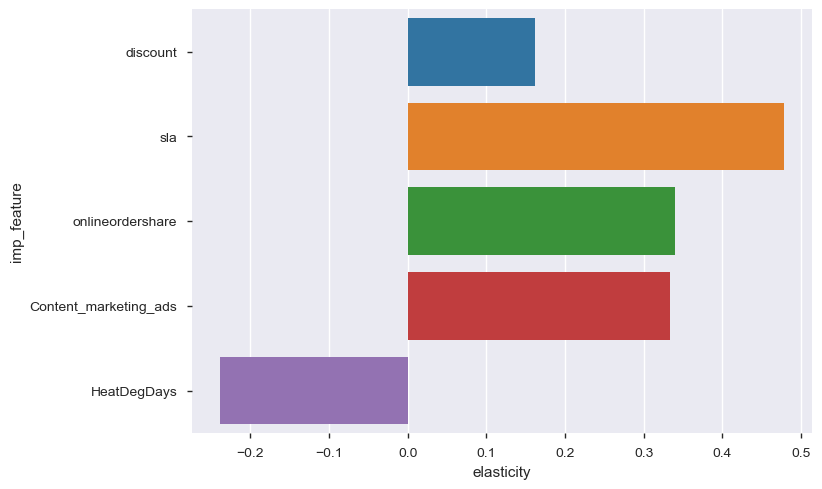

imp_feature   coef  elasticity
0               discount  0.179       0.162
1                    sla  0.509       0.478
2       onlineordershare  0.459       0.340
3  Content_marketing_ads  0.373       0.333
4            HeatDegDays -0.260      -0.238

In [498]:
elasticity(mm1,gaming_train_mm)

Text(0, 0.5, 'y_pred')

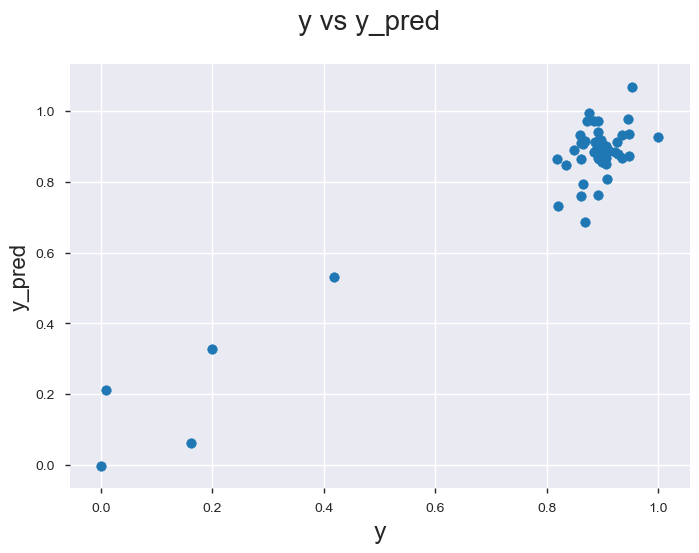

In [499]:
# Plotting y and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y, y_pred)
fig.suptitle('y vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 

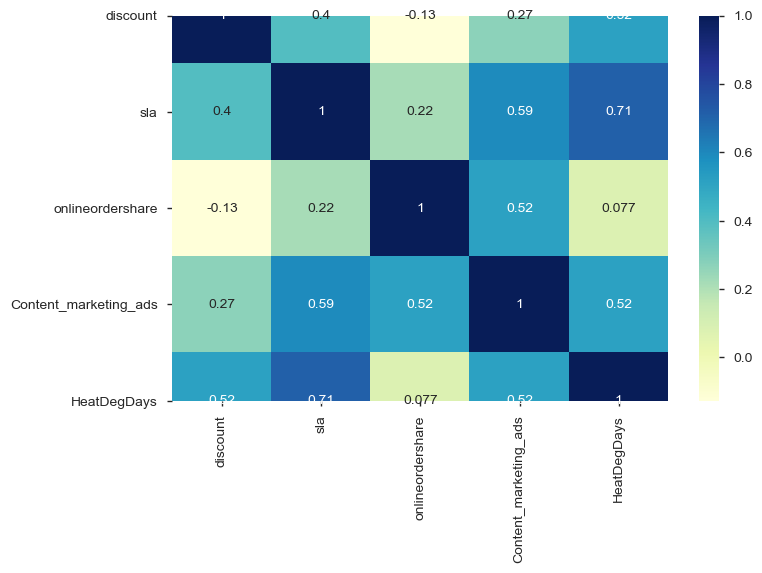

In [500]:
# Figure size
plt.figure(figsize=(8,5))

# Heatmap
sns.heatmap(gaming_train_mm[features].corr(), cmap="YlGnBu", annot=True)
plt.show()

In [501]:
#kyock Model

In [502]:
weeklygam.columns

Index(['week', 'gmv', 'product_mrp', 'discount', 'sla',
       'product_procurement_sla', 'fsn_id', 'payment_order_type', 'gmvpo',
       'onlineordershare', 'Date', 'Year', 'Month', 'TV_ads',
       'Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'HeatDegDays',
       'CoolDegDays', 'TotalRainMm', 'TotalSnowCm', 'SnowOnGrndCm', 'lag1disc',
       'lag2disc', 'lag3disc', 'lag1NPS', 'lag2NPS', 'lag3NPS',
       'lag1StockIndex', 'lag2StockIndex', 'lag3StockIndex', 'lag1Ssales',
       'lag2Ssales', 'lag3Ssales', 'lag1Pd', 'lag2Pd', 'lag3Pd'],
      dtype='object')

In [503]:
gam_kyock_mod = weeklygam[['gmv', 'discount', 'sla','product_procurement_sla', 'payment_order_type',
       'onlineordershare', 'TV_ads', 'Sponsorship_ads', 'Content_marketing_ads',
       'Online_marketing_ads', 'NPS', 'Stock_Index', 'Special_sales', 'Payday',
       'HeatDegDays', 'CoolDegDays', 'TotalRainMm', 'TotalSnowCm',
       'SnowOnGrndCm']]           


gam_kyock_mod.head()

gmv  discount   sla  product_procurement_sla  payment_order_type  \
0   17466.000     0.220 2.960                    2.400                  25   
1 1435300.000     0.414 5.170                    2.882                 689   
2 1097388.359     0.429 5.115                    2.406                 534   
3 1158166.000     0.352 5.179                    2.191                 425   
4  742062.000     0.363 5.552                    2.158                 246   

   onlineordershare  TV_ads  Sponsorship_ads  Content_marketing_ads  \
0           100.000   0.054            1.854                  0.000   
1            26.208   0.081            2.780                  0.000   
2            22.418   0.081            2.780                  0.000   
3            21.008   0.081            2.780                  0.000   
4            18.880   0.028            1.139                  0.000   

   Online_marketing_ads    NPS  Stock_Index  Special_sales  Payday  \
0                 0.332 54.600     1177.000          0.000   0.200   
1                 0.498 54.600     1177.000          0.000   0.000   
2                 0.498 54.600     1177.000          0.286   0.143   
3                 0.498 54.600     1177.000          0.000   0.000   
4                 0.192 56.139     1185.286          0.000   0.143   

   HeatDegDays  CoolDegDays  TotalRainMm  TotalSnowCm  SnowOnGrndCm  
0        0.100        1.460        0.000        0.000         0.000  
1        1.059        2.322        4.155        0.029         0.041  
2        0.816        4.722        1.569        0.029         0.041  
3        1.632        4.172        1.141        0.029         0.041  
4        0.816        5.908        4.341        0.029         0.041

In [504]:
gam_kyock_mod['lag1gmv'] = gam_kyock_mod['gmv'].shift(-1)

In [505]:
### Checking NaN

gam_kyock_mod.isnull().sum()

gmv                        0
discount                   0
sla                        0
product_procurement_sla    0
payment_order_type         0
onlineordershare           0
TV_ads                     1
Sponsorship_ads            1
Content_marketing_ads      1
Online_marketing_ads       1
NPS                        0
Stock_Index                0
Special_sales              0
Payday                     0
HeatDegDays                0
CoolDegDays                0
TotalRainMm                0
TotalSnowCm                0
SnowOnGrndCm               0
lag1gmv                    1
dtype: int64

In [506]:
gam_kyock_mod = gam_kyock_mod.fillna(0)

In [507]:
gam_kyock_mod.head()

gmv  discount   sla  product_procurement_sla  payment_order_type  \
0   17466.000     0.220 2.960                    2.400                  25   
1 1435300.000     0.414 5.170                    2.882                 689   
2 1097388.359     0.429 5.115                    2.406                 534   
3 1158166.000     0.352 5.179                    2.191                 425   
4  742062.000     0.363 5.552                    2.158                 246   

   onlineordershare  TV_ads  Sponsorship_ads  Content_marketing_ads  \
0           100.000   0.054            1.854                  0.000   
1            26.208   0.081            2.780                  0.000   
2            22.418   0.081            2.780                  0.000   
3            21.008   0.081            2.780                  0.000   
4            18.880   0.028            1.139                  0.000   

   Online_marketing_ads    NPS  Stock_Index  Special_sales  Payday  \
0                 0.332 54.600     1177.000          0.000   0.200   
1                 0.498 54.600     1177.000          0.000   0.000   
2                 0.498 54.600     1177.000          0.286   0.143   
3                 0.498 54.600     1177.000          0.000   0.000   
4                 0.192 56.139     1185.286          0.000   0.143   

   HeatDegDays  CoolDegDays  TotalRainMm  TotalSnowCm  SnowOnGrndCm  \
0        0.100        1.460        0.000        0.000         0.000   
1        1.059        2.322        4.155        0.029         0.041   
2        0.816        4.722        1.569        0.029         0.041   
3        1.632        4.172        1.141        0.029         0.041   
4        0.816        5.908        4.341        0.029         0.041   

      lag1gmv  
0 1435300.000  
1 1097388.359  
2 1158166.000  
3  742062.000  
4     391.000

In [508]:
###  Import the StandardScaler()
# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

### Create a scaling object
# scaler = StandardScaler()
scaler = MinMaxScaler()

### Create a list of the variables that you need to scale
varlist = ['gmv', 'discount', 'sla','product_procurement_sla', 'payment_order_type',
       'onlineordershare', 'TV_ads', 'Sponsorship_ads', 'Content_marketing_ads',
       'Online_marketing_ads', 'NPS', 'Stock_Index', 'Special_sales', 'Payday',
       'HeatDegDays', 'CoolDegDays', 'TotalRainMm', 'TotalSnowCm',
       'SnowOnGrndCm','lag1gmv']

### Scale these variables using 'fit_transform'
gam_kyock_mod[varlist] = scaler.fit_transform(gam_kyock_mod[varlist])

In [509]:
gam_kyock_mod.head()

gmv  discount   sla  product_procurement_sla  payment_order_type  \
0 0.004     0.000 0.000                    0.622               0.009   
1 0.363     0.615 0.596                    0.836               0.235   
2 0.278     0.663 0.581                    0.625               0.182   
3 0.293     0.421 0.598                    0.529               0.145   
4 0.188     0.456 0.699                    0.515               0.084   

   onlineordershare  TV_ads  Sponsorship_ads  Content_marketing_ads  \
0             1.000   0.015            0.058                  0.000   
1             0.262   0.023            0.088                  0.000   
2             0.224   0.023            0.088                  0.000   
3             0.210   0.023            0.088                  0.000   
4             0.189   0.008            0.036                  0.000   

   Online_marketing_ads   NPS  Stock_Index  Special_sales  Payday  \
0                 0.036 0.654        0.714          0.000   1.000   
1                 0.054 0.654        0.714          0.000   0.000   
2                 0.054 0.654        0.714          0.286   0.714   
3                 0.054 0.654        0.714          0.000   0.000   
4                 0.021 0.753        0.750          0.000   0.714   

   HeatDegDays  CoolDegDays  TotalRainMm  TotalSnowCm  SnowOnGrndCm  lag1gmv  
0        0.000        0.247        0.000        0.000         0.000    0.363  
1        0.069        0.393        0.420        0.019         0.009    0.278  
2        0.051        0.799        0.159        0.019         0.009    0.293  
3        0.109        0.706        0.115        0.019         0.009    0.188  
4        0.051        1.000        0.439        0.019         0.009    0.000

In [510]:
### Split the train dataset into X and y
from sklearn.model_selection import train_test_split
x = gam_kyock_mod.drop('gmv',axis=1)
y = gam_kyock_mod['gmv']

gaming_train_km = gam_kyock_mod

In [511]:
print("X = Independent variable & Y = Target variable")
print(x.shape,y.shape)

X = Independent variable & Y = Target variable
(53, 19) (53,)


In [512]:
###  Represent
km = LinearRegression()

###  Fit a line
km.fit(x,y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [513]:
###  Coefficient values

coef = pd.DataFrame(x.columns)
coef['Coefficient'] = pd.Series(km.coef_)
coef

0  Coefficient
0                  discount        0.120
1                       sla       -0.158
2   product_procurement_sla        0.083
3        payment_order_type        0.826
4          onlineordershare       -0.409
5                    TV_ads        0.004
6           Sponsorship_ads       -0.141
7     Content_marketing_ads        0.026
8      Online_marketing_ads        0.002
9                       NPS       -0.420
10              Stock_Index       -0.072
11            Special_sales        0.057
12                   Payday        0.045
13              HeatDegDays       -0.133
14              CoolDegDays        0.048
15              TotalRainMm       -0.046
16              TotalSnowCm        0.078
17             SnowOnGrndCm        0.003
18                  lag1gmv        0.097

In [514]:
col = x.columns
col

Index(['discount', 'sla', 'product_procurement_sla', 'payment_order_type',
       'onlineordershare', 'TV_ads', 'Sponsorship_ads',
       'Content_marketing_ads', 'Online_marketing_ads', 'NPS', 'Stock_Index',
       'Special_sales', 'Payday', 'HeatDegDays', 'CoolDegDays', 'TotalRainMm',
       'TotalSnowCm', 'SnowOnGrndCm', 'lag1gmv'],
      dtype='object')

In [515]:
#### Model Building - Stepwise selection for feature selection

In [516]:
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [517]:
def stepwise_selection(x, y,
                       initial_list=['discount', 'sla','product_procurement_sla', 'payment_order_type',
       'onlineordershare', 'TV_ads', 'Sponsorship_ads', 'Content_marketing_ads',
       'Online_marketing_ads', 'NPS', 'Stock_Index', 'Special_sales', 'Payday',
       'HeatDegDays', 'CoolDegDays', 'TotalRainMm', 'TotalSnowCm',
       'SnowOnGrndCm','lag1gmv'],
                       threshold_in=0.01,threshold_out = 0.05, verbose=True):
    
    included = list(initial_list)
    while True:
        changed=False
        ### forward step
        excluded = list(set(x.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
                
                
        ###backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included]))).fit()
        ###use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() ###null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [518]:
import statsmodels.api as sm  

final_features = stepwise_selection(x, y)

print("\n","final_selected_features:",final_features)

Drop Online_marketing_ads           with p-value 0.989173
Drop SnowOnGrndCm                   with p-value 0.985306
Drop TV_ads                         with p-value 0.969159
Drop Content_marketing_ads          with p-value 0.794961
Drop CoolDegDays                    with p-value 0.639155
Drop TotalRainMm                    with p-value 0.54653
Drop product_procurement_sla        with p-value 0.511695
Drop discount                       with p-value 0.281333
Drop Payday                         with p-value 0.325302
Drop TotalSnowCm                    with p-value 0.375047
Drop HeatDegDays                    with p-value 0.22802
Drop lag1gmv                        with p-value 0.287469
Drop Stock_Index                    with p-value 0.239892
Drop Special_sales                  with p-value 0.171878

 final_selected_features: ['sla', 'payment_order_type', 'onlineordershare', 'Sponsorship_ads', 'NPS']


In [519]:
### Import statsmodels
import statsmodels.api as sm  

### Subsetting training data for 15 selected columns
x_rfe1 = x[final_features]

x_rfe1 = sm.add_constant(x_rfe1)

### Fitting the model with selected variables
km1 = sm.OLS(y, x_rfe1).fit() 

print(km1.params)

const                 0.633
sla                  -0.215
payment_order_type    0.859
onlineordershare     -0.497
Sponsorship_ads      -0.120
NPS                  -0.459
dtype: float64


In [520]:
print(km1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     31.98
Date:                Sat, 29 Feb 2020   Prob (F-statistic):           4.79e-14
Time:                        18:43:16   Log-Likelihood:                 56.145
No. Observations:                  53   AIC:                            -100.3
Df Residuals:                      47   BIC:                            -88.47
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.6325      0

In [521]:
### Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0               const 53.180
2  payment_order_type  2.550
3    onlineordershare  2.350
5                 NPS  2.290
1                 sla  2.060
4     Sponsorship_ads  1.660

In [522]:
features = list(x_rfe1.columns)
features.remove('const')
features

['sla', 'payment_order_type', 'onlineordershare', 'Sponsorship_ads', 'NPS']

In [523]:
### Model Evaluation on testing data
x_2 = x[features]


### Predicition with selected features on the test data
y_pred = km1.predict(sm.add_constant(x_2))

In [524]:
### Mean square error (MSE)
mse = np.mean((y_pred - y)**2)
mse

0.00703701633918003

In [525]:
### Coefficient values

coef = pd.DataFrame(x_rfe1.columns)
coef['Coefficient'] = pd.Series(km.coef_)
coef

0  Coefficient
0               const        0.120
1                 sla       -0.158
2  payment_order_type        0.083
3    onlineordershare        0.826
4     Sponsorship_ads       -0.409
5                 NPS        0.004

In [526]:
### Using K-Fold Cross validation evaluating on whole dataset

# lm = LinearRegression()
fold = KFold(10,shuffle = True, random_state = 100)

cv_scores = -cross_val_score(km,x[features],y,cv=fold,scoring='neg_mean_squared_error')

print("Neg. of MSE:",cv_scores,"\n")
print("Mean of 5 KFold CV - MSE:",cv_scores.mean())

Neg. of MSE: [0.00967564 0.00609919 0.03482517 0.01987497 0.00574672 0.01179431
 0.00843402 0.00767997 0.02855588 0.00205663] 

Mean of 5 KFold CV - MSE: 0.013474249428487767


In [527]:
def elasticity(model,x):
    
    features_df = pd.DataFrame(model.params)
    features_df = features_df.rename(columns={0:'coef'})
    
    features_df['imp_feature'] = model.params.index
    features_df = features_df[features_df.imp_feature != 'const'][['imp_feature','coef']]
    features_df.index = range(len(features_df))
#      features

    elasticity_list = list()
    
    for i in range(len(features_df)):
        elasticity_list.append(((features_df.coef[i] * np.mean(x[features_df.imp_feature[i]])) / np.mean(x['gmv'])))

    features_df['elasticity'] = np.round(elasticity_list,3)
    
    sns.barplot(x='elasticity',y='imp_feature',data=features_df)
    plt.show()
    
    return features_df

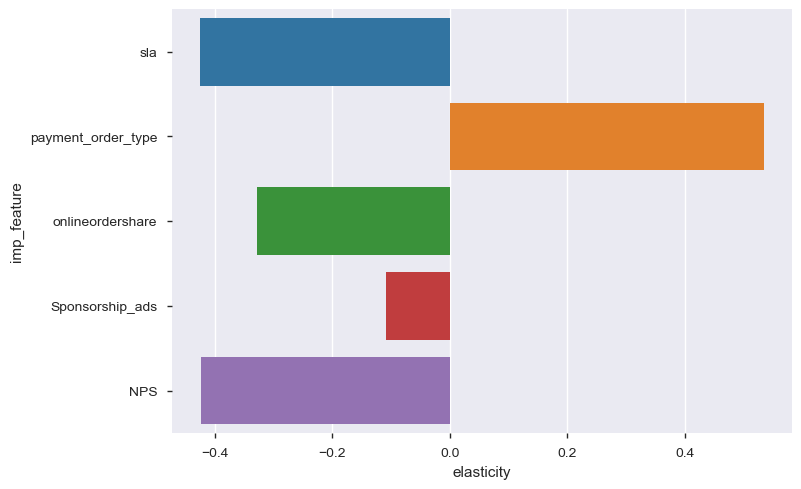

imp_feature   coef  elasticity
0                 sla -0.215      -0.425
1  payment_order_type  0.859       0.534
2    onlineordershare -0.497      -0.328
3     Sponsorship_ads -0.120      -0.108
4                 NPS -0.459      -0.424

In [528]:
elasticity(km1,gaming_train_km)

Text(0, 0.5, 'y_pred')

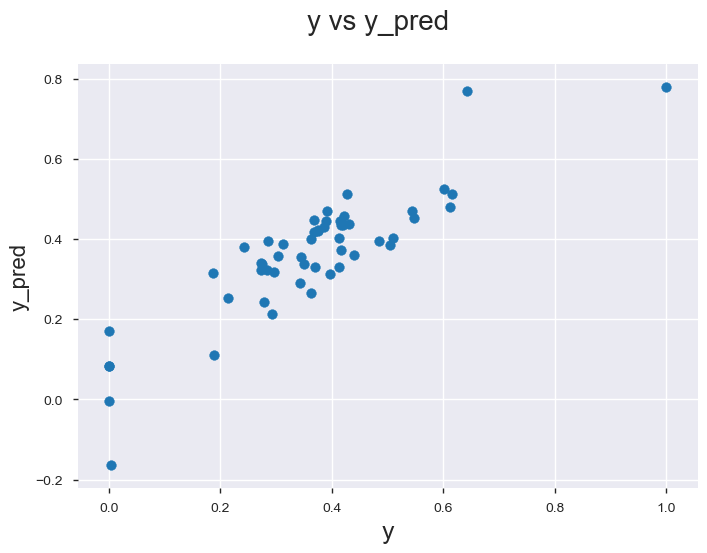

In [529]:
# Plotting y and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y, y_pred)
fig.suptitle('y vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

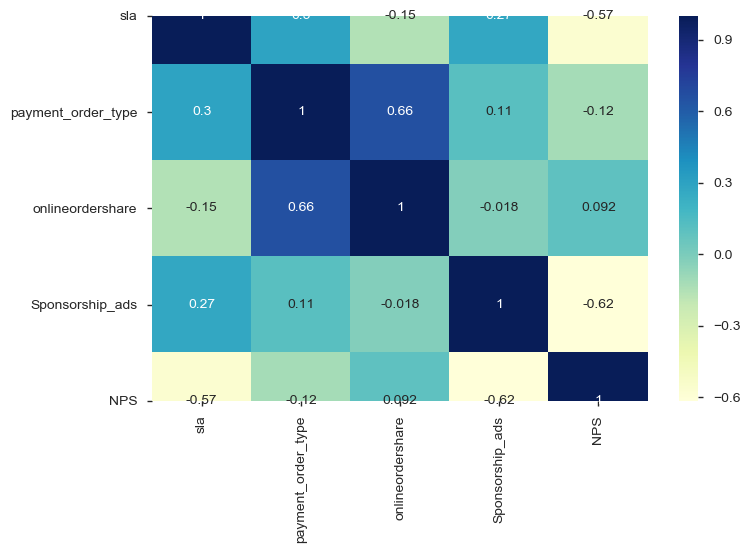

In [530]:
# Figure size
plt.figure(figsize=(8,5))

# Heatmap
sns.heatmap(gaming_train_km[features].corr(), cmap="YlGnBu", annot=True)
plt.show()

In [531]:
# Modeling - Home Audio

In [532]:
#Linear Model


In [533]:
###  Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [534]:
weeklyhome.columns

Index(['week', 'gmv', 'product_mrp', 'discount', 'sla',
       'product_procurement_sla', 'fsn_id', 'payment_order_type', 'gmvpo',
       'onlineordershare', 'Date', 'Year', 'Month', 'TV_ads',
       'Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'HeatDegDays',
       'CoolDegDays', 'TotalRainMm', 'TotalSnowCm', 'SnowOnGrndCm',
       'lag_1_discount_offer', 'lag_2_discount_offer', 'lag_3_discount_offer',
       'lag_1_NPS', 'lag_2_NPS', 'lag1disc', 'lag2disc', 'lag3disc', 'lag1NPS',
       'lag2NPS', 'lag3NPS', 'lag1StockIndex', 'lag2StockIndex',
       'lag3StockIndex', 'lag1Ssales', 'lag2Ssales', 'lag3Ssales', 'lag1Pd',
       'lag2Pd', 'lag3Pd'],
      dtype='object')

In [535]:
home_lin_mod = weeklyhome[['gmv', 'discount', 'sla','product_procurement_sla', 'payment_order_type',
       'onlineordershare', 'TV_ads', 'Sponsorship_ads', 'Content_marketing_ads',
       'Online_marketing_ads', 'NPS', 'Stock_Index', 'Special_sales', 'Payday',
       'HeatDegDays', 'CoolDegDays', 'TotalRainMm', 'TotalSnowCm',
       'SnowOnGrndCm']]
                            
    
home_lin_mod.head()

gmv  discount   sla  product_procurement_sla  payment_order_type  \
0  106915.000     0.374 2.775                    3.225                  39   
1 4508352.133     0.317 7.399                    2.719                 540   
2 5323115.000     0.329 7.052                    2.634                 620   
3 4633371.000     0.320 7.144                    2.723                 509   
4 3411815.000     0.319 7.273                    2.676                 379   

   onlineordershare  TV_ads  Sponsorship_ads  Content_marketing_ads  \
0            97.500   0.054            1.854                  0.000   
1            25.012   0.081            2.780                  0.000   
2            24.574   0.081            2.780                  0.000   
3            22.063   0.081            2.780                  0.000   
4            23.237   0.028            1.139                  0.000   

   Online_marketing_ads    NPS  Stock_Index  Special_sales  Payday  \
0                 0.332 54.600     1177.000          0.000   0.200   
1                 0.498 54.600     1177.000          0.000   0.000   
2                 0.498 54.600     1177.000          0.286   0.143   
3                 0.498 54.600     1177.000          0.000   0.000   
4                 0.192 56.139     1185.286          0.000   0.143   

   HeatDegDays  CoolDegDays  TotalRainMm  TotalSnowCm  SnowOnGrndCm  
0        0.100        1.460        0.000        0.000         0.000  
1        1.059        2.322        4.155        0.029         0.041  
2        0.816        4.722        1.569        0.029         0.041  
3        1.632        4.172        1.141        0.029         0.041  
4        0.816        5.908        4.341        0.029         0.041

In [536]:
### Checking NaN

home_lin_mod.isnull().sum()

gmv                        0
discount                   0
sla                        0
product_procurement_sla    0
payment_order_type         0
onlineordershare           0
TV_ads                     1
Sponsorship_ads            1
Content_marketing_ads      1
Online_marketing_ads       1
NPS                        0
Stock_Index                0
Special_sales              0
Payday                     0
HeatDegDays                0
CoolDegDays                0
TotalRainMm                0
TotalSnowCm                0
SnowOnGrndCm               0
dtype: int64

In [537]:
home_lin_mod.fillna(0, inplace = True)

In [538]:
### Import the StandardScaler()
# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

### Create a scaling object
# scaler = StandardScaler()
scaler = MinMaxScaler()


### Create a list of the variables that you need to scale
varlist = ['gmv', 'discount', 'sla','product_procurement_sla', 'payment_order_type',
       'onlineordershare', 'TV_ads', 'Sponsorship_ads', 'Content_marketing_ads',
       'Online_marketing_ads', 'NPS', 'Stock_Index', 'Special_sales', 'Payday',
       'HeatDegDays', 'CoolDegDays', 'TotalRainMm', 'TotalSnowCm',
       'SnowOnGrndCm']
                                      

### Scale these variables using 'fit_transform'
home_lin_mod[varlist] = scaler.fit_transform(home_lin_mod[varlist])

In [539]:
home_lin_mod.head()

gmv  discount   sla  product_procurement_sla  payment_order_type  \
0 0.000     0.476 0.000                    1.000               0.000   
1 0.289     0.108 1.000                    0.703               0.262   
2 0.343     0.187 0.925                    0.653               0.304   
3 0.297     0.126 0.945                    0.706               0.246   
4 0.217     0.124 0.973                    0.678               0.178   

   onlineordershare  TV_ads  Sponsorship_ads  Content_marketing_ads  \
0             0.999   0.015            0.058                  0.000   
1             0.132   0.023            0.088                  0.000   
2             0.127   0.023            0.088                  0.000   
3             0.097   0.023            0.088                  0.000   
4             0.111   0.008            0.036                  0.000   

   Online_marketing_ads   NPS  Stock_Index  Special_sales  Payday  \
0                 0.036 0.869        0.714          0.000   1.000   
1                 0.054 0.869        0.714          0.000   0.000   
2                 0.054 0.869        0.714          0.286   0.714   
3                 0.054 0.869        0.714          0.000   0.000   
4                 0.021 1.000        0.750          0.000   0.714   

   HeatDegDays  CoolDegDays  TotalRainMm  TotalSnowCm  SnowOnGrndCm  
0        0.000        0.247        0.000        0.000         0.000  
1        0.069        0.393        0.420        0.019         0.009  
2        0.051        0.799        0.159        0.019         0.009  
3        0.109        0.706        0.115        0.019         0.009  
4        0.051        1.000        0.439        0.019         0.009

In [540]:
### Split the train dataset into X and y
from sklearn.model_selection import train_test_split
x = home_lin_mod.drop('gmv',axis=1)
y = home_lin_mod['gmv']

home_train_lm = home_lin_mod

In [541]:
print("x dataset: ",x.shape)
print("y dataset: ",y.shape)

x dataset:  (49, 18)
y dataset:  (49,)


In [542]:
### Represent
lm = LinearRegression()

###  Fit a line
lm.fit(x,y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [543]:
###  Coefficient values

coef = pd.DataFrame(x.columns)
coef['Coefficient'] = pd.Series(lm.coef_)
coef

0  Coefficient
0                  discount        0.295
1                       sla       -0.028
2   product_procurement_sla       -0.053
3        payment_order_type        0.536
4          onlineordershare       -0.349
5                    TV_ads        0.075
6           Sponsorship_ads        0.002
7     Content_marketing_ads        0.102
8      Online_marketing_ads       -0.128
9                       NPS        0.040
10              Stock_Index        0.018
11            Special_sales        0.060
12                   Payday        0.010
13              HeatDegDays       -0.081
14              CoolDegDays       -0.020
15              TotalRainMm       -0.035
16              TotalSnowCm        0.053
17             SnowOnGrndCm        0.051

In [544]:
col = x.columns
col

Index(['discount', 'sla', 'product_procurement_sla', 'payment_order_type',
       'onlineordershare', 'TV_ads', 'Sponsorship_ads',
       'Content_marketing_ads', 'Online_marketing_ads', 'NPS', 'Stock_Index',
       'Special_sales', 'Payday', 'HeatDegDays', 'CoolDegDays', 'TotalRainMm',
       'TotalSnowCm', 'SnowOnGrndCm'],
      dtype='object')

In [545]:
#### Model Building - Stepwise selection for feature selection

In [546]:
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [547]:
def stepwise_selection(x, y,
                       initial_list=['discount', 'sla','product_procurement_sla', 'payment_order_type',
       'onlineordershare', 'TV_ads', 'Sponsorship_ads', 'Content_marketing_ads',
       'Online_marketing_ads', 'NPS', 'Stock_Index', 'Special_sales', 'Payday',
       'HeatDegDays', 'CoolDegDays', 'TotalRainMm', 'TotalSnowCm',
       'SnowOnGrndCm'],
                       threshold_in=0.01,threshold_out = 0.05, verbose=True):
    
    included = list(initial_list)
    while True:
        changed=False
        ###forward step
        excluded = list(set(x.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
                
                
        ###backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included]))).fit()
        ###use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() ###null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [548]:
import statsmodels.api as sm  

final_features = stepwise_selection(x, y)

print("\n","final_selected_features:",final_features)

Drop Sponsorship_ads                with p-value 0.968135
Drop CoolDegDays                    with p-value 0.724638
Drop sla                            with p-value 0.613971
Drop Payday                         with p-value 0.614119
Drop NPS                            with p-value 0.566089
Drop product_procurement_sla        with p-value 0.521797
Drop Stock_Index                    with p-value 0.389395
Drop SnowOnGrndCm                   with p-value 0.411613
Drop HeatDegDays                    with p-value 0.351623
Drop TotalSnowCm                    with p-value 0.31331
Drop TotalRainMm                    with p-value 0.269665
Drop TV_ads                         with p-value 0.376327

 final_selected_features: ['discount', 'payment_order_type', 'onlineordershare', 'Content_marketing_ads', 'Online_marketing_ads', 'Special_sales']


In [549]:
### Import statsmodels
import statsmodels.api as sm  

### Subsetting training data for 15 selected columns
x_rfe1 = x[final_features]

x_rfe1 = sm.add_constant(x_rfe1)

### Fitting the model with selected variables
lm1 = sm.OLS(y, x_rfe1).fit() 

print(lm1.params)

const                    0.152
discount                 0.279
payment_order_type       0.531
onlineordershare        -0.315
Content_marketing_ads    0.125
Online_marketing_ads    -0.126
Special_sales            0.070
dtype: float64


In [550]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     81.22
Date:                Sat, 29 Feb 2020   Prob (F-statistic):           1.68e-21
Time:                        18:43:42   Log-Likelihood:                 87.016
No. Observations:                  49   AIC:                            -160.0
Df Residuals:                      42   BIC:                            -146.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.15

In [551]:
###  Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                  const 8.400
5   Online_marketing_ads 2.160
4  Content_marketing_ads 1.720
2     payment_order_type 1.630
3       onlineordershare 1.600
1               discount 1.580
6          Special_sales 1.210

In [552]:
features = list(x_rfe1.columns)
features.remove('const')
features

['discount',
 'payment_order_type',
 'onlineordershare',
 'Content_marketing_ads',
 'Online_marketing_ads',
 'Special_sales']

In [553]:
###  Model Evaluation on testing data
x_2 = x[features]

###  Predicition with selected features on the test data
y_pred = lm1.predict(sm.add_constant(x_2))

In [554]:
###  Mean square error (MSE)

mse = np.mean((y_pred - y)**2)
mse

0.0016789931448244054

In [555]:
###  Coefficient values

coef = pd.DataFrame(x_rfe1.columns)
coef['Coefficient'] = pd.Series(lm.coef_)
coef

0  Coefficient
0                  const        0.295
1               discount       -0.028
2     payment_order_type       -0.053
3       onlineordershare        0.536
4  Content_marketing_ads       -0.349
5   Online_marketing_ads        0.075
6          Special_sales        0.002

In [556]:
### Mean Square Error 
###  Using K-Fold Cross validation evaluating on selected dataset

# lm = LinearRegression()
fold = KFold(10,shuffle = True, random_state = 100)

cv_scores = -cross_val_score(lm,x[features],y,cv=fold,scoring='neg_mean_squared_error')

print("Neg. of MSE:",cv_scores,"\n")
print("Mean of 5 KFold CV - MSE:",cv_scores.mean())

Neg. of MSE: [0.0003847  0.00348873 0.0174097  0.00251489 0.00096053 0.0008579
 0.00048458 0.0035022  0.00324649 0.00511932] 

Mean of 5 KFold CV - MSE: 0.0037969025337669915


In [557]:
def elasticity(model,x):
    
    features_df = pd.DataFrame(model.params)
    features_df = features_df.rename(columns={0:'coef'})
    
    features_df['imp_feature'] = model.params.index
    features_df = features_df[features_df.imp_feature != 'const'][['imp_feature','coef']]
    features_df.index = range(len(features_df))
#    features

    elasticity_list = list()
    
    for i in range(len(features_df)):
        elasticity_list.append(((features_df.coef[i] * np.mean(x[features_df.imp_feature[i]])) / np.mean(x['gmv'])))

    features_df['elasticity'] = np.round(elasticity_list,3)
    
    sns.barplot(x='elasticity',y='imp_feature',data=features_df)
    plt.show()
    
    return features_df
    

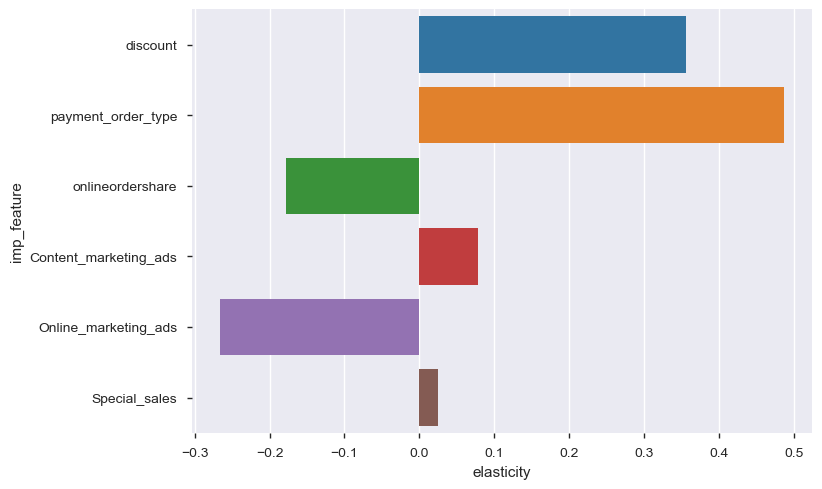

imp_feature   coef  elasticity
0               discount  0.279       0.356
1     payment_order_type  0.531       0.487
2       onlineordershare -0.315      -0.178
3  Content_marketing_ads  0.125       0.078
4   Online_marketing_ads -0.126      -0.266
5          Special_sales  0.070       0.025

In [558]:
elasticity(lm1,home_train_lm)

Text(0, 0.5, 'y_pred')

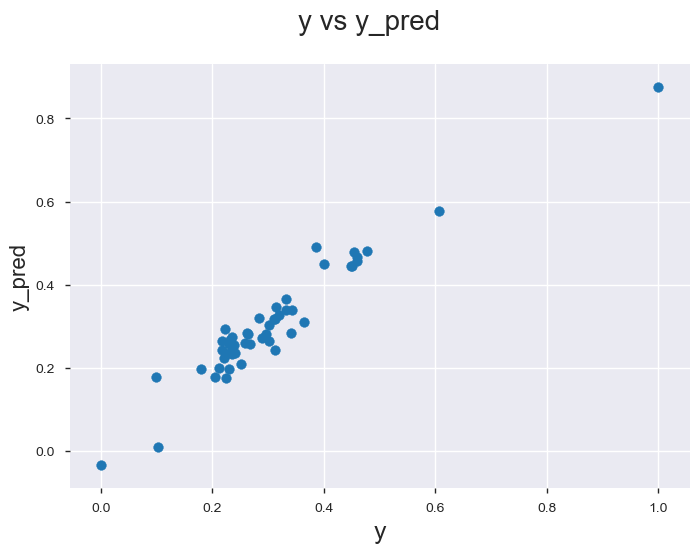

In [559]:
# Plotting y and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y, y_pred)
fig.suptitle('y vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

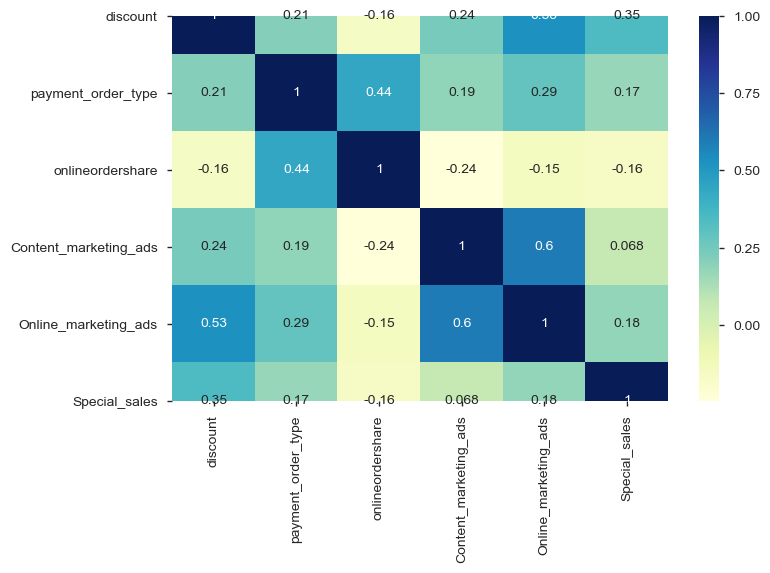

In [560]:
# Figure size
plt.figure(figsize=(8,5))

# Heatmap
sns.heatmap(home_train_lm[features].corr(), cmap="YlGnBu", annot=True)
plt.show()

In [561]:
#Multiplicative Model

In [562]:
weeklyhome.columns

Index(['week', 'gmv', 'product_mrp', 'discount', 'sla',
       'product_procurement_sla', 'fsn_id', 'payment_order_type', 'gmvpo',
       'onlineordershare', 'Date', 'Year', 'Month', 'TV_ads',
       'Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'HeatDegDays',
       'CoolDegDays', 'TotalRainMm', 'TotalSnowCm', 'SnowOnGrndCm',
       'lag_1_discount_offer', 'lag_2_discount_offer', 'lag_3_discount_offer',
       'lag_1_NPS', 'lag_2_NPS', 'lag1disc', 'lag2disc', 'lag3disc', 'lag1NPS',
       'lag2NPS', 'lag3NPS', 'lag1StockIndex', 'lag2StockIndex',
       'lag3StockIndex', 'lag1Ssales', 'lag2Ssales', 'lag3Ssales', 'lag1Pd',
       'lag2Pd', 'lag3Pd'],
      dtype='object')

In [563]:
home_multi_mod = weeklyhome[['gmv', 'discount', 'sla','product_procurement_sla', 'payment_order_type',
       'onlineordershare', 'TV_ads', 'Sponsorship_ads', 'Content_marketing_ads',
       'Online_marketing_ads', 'NPS', 'Stock_Index', 'Special_sales', 'Payday',
       'HeatDegDays', 'CoolDegDays', 'TotalRainMm', 'TotalSnowCm',
       'SnowOnGrndCm']]         

home_multi_mod.head()

gmv  discount   sla  product_procurement_sla  payment_order_type  \
0  106915.000     0.374 2.775                    3.225                  39   
1 4508352.133     0.317 7.399                    2.719                 540   
2 5323115.000     0.329 7.052                    2.634                 620   
3 4633371.000     0.320 7.144                    2.723                 509   
4 3411815.000     0.319 7.273                    2.676                 379   

   onlineordershare  TV_ads  Sponsorship_ads  Content_marketing_ads  \
0            97.500   0.054            1.854                  0.000   
1            25.012   0.081            2.780                  0.000   
2            24.574   0.081            2.780                  0.000   
3            22.063   0.081            2.780                  0.000   
4            23.237   0.028            1.139                  0.000   

   Online_marketing_ads    NPS  Stock_Index  Special_sales  Payday  \
0                 0.332 54.600     1177.000          0.000   0.200   
1                 0.498 54.600     1177.000          0.000   0.000   
2                 0.498 54.600     1177.000          0.286   0.143   
3                 0.498 54.600     1177.000          0.000   0.000   
4                 0.192 56.139     1185.286          0.000   0.143   

   HeatDegDays  CoolDegDays  TotalRainMm  TotalSnowCm  SnowOnGrndCm  
0        0.100        1.460        0.000        0.000         0.000  
1        1.059        2.322        4.155        0.029         0.041  
2        0.816        4.722        1.569        0.029         0.041  
3        1.632        4.172        1.141        0.029         0.041  
4        0.816        5.908        4.341        0.029         0.041

In [564]:
### Applying Log 
home_multi_mod=np.log(home_multi_mod)

home_multi_mod = home_multi_mod.fillna(0)
home_multi_mod = home_multi_mod.replace([np.inf, -np.inf], 0)

In [565]:
home_multi_mod.head()

gmv  discount   sla  product_procurement_sla  payment_order_type  \
0 11.580    -0.983 1.021                    1.171               3.664   
1 15.321    -1.150 2.001                    1.000               6.292   
2 15.488    -1.111 1.953                    0.968               6.430   
3 15.349    -1.141 1.966                    1.002               6.232   
4 15.043    -1.142 1.984                    0.984               5.938   

   onlineordershare  TV_ads  Sponsorship_ads  Content_marketing_ads  \
0             4.580  -2.922            0.617                 -8.364   
1             3.219  -2.516            1.023                 -7.958   
2             3.202  -2.516            1.023                 -7.958   
3             3.094  -2.516            1.023                 -7.958   
4             3.146  -3.568            0.131                 -9.046   

   Online_marketing_ads   NPS  Stock_Index  Special_sales  Payday  \
0                -1.103 4.000        7.071          0.000  -1.609   
1                -0.698 4.000        7.071          0.000   0.000   
2                -0.698 4.000        7.071         -1.253  -1.946   
3                -0.698 4.000        7.071          0.000   0.000   
4                -1.652 4.028        7.078          0.000  -1.946   

   HeatDegDays  CoolDegDays  TotalRainMm  TotalSnowCm  SnowOnGrndCm  
0       -2.303        0.378        0.000        0.000         0.000  
1        0.057        0.842        1.424       -3.532        -3.189  
2       -0.203        1.552        0.451       -3.532        -3.189  
3        0.490        1.428        0.131       -3.532        -3.189  
4       -0.203        1.776        1.468       -3.532        -3.189

In [566]:
###  Import the StandardScaler()
# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

###  Create a scaling object
# scaler = StandardScaler()
scaler = MinMaxScaler()

###  Create a list of the variables that you need to scale
varlist = ['gmv', 'discount', 'sla','product_procurement_sla', 'payment_order_type',
       'onlineordershare', 'TV_ads', 'Sponsorship_ads', 'Content_marketing_ads',
       'Online_marketing_ads', 'NPS', 'Stock_Index', 'Special_sales', 'Payday',
       'HeatDegDays', 'CoolDegDays', 'TotalRainMm', 'TotalSnowCm',
       'SnowOnGrndCm']      



### Scale these variables using 'fit_transform'
home_multi_mod[varlist] = scaler.fit_transform(home_multi_mod[varlist])

In [567]:
home_multi_mod.head()

gmv  discount   sla  product_procurement_sla  payment_order_type  \
0 0.000     0.528 0.000                    1.000               0.000   
1 0.753     0.131 1.000                    0.773               0.672   
2 0.787     0.222 0.951                    0.730               0.707   
3 0.759     0.152 0.964                    0.775               0.656   
4 0.697     0.149 0.982                    0.752               0.581   

   onlineordershare  TV_ads  Sponsorship_ads  Content_marketing_ads  \
0             0.999   0.134            0.178                  0.073   
1             0.300   0.218            0.296                  0.117   
2             0.291   0.218            0.296                  0.117   
3             0.236   0.218            0.296                  0.117   
4             0.262   0.000            0.038                  0.000   

   Online_marketing_ads   NPS  Stock_Index  Special_sales  Payday  \
0                 0.142 0.882        0.734          1.000   0.173   
1                 0.247 0.882        0.734          1.000   1.000   
2                 0.247 0.882        0.734          0.356   0.000   
3                 0.247 0.882        0.734          1.000   1.000   
4                 0.000 1.000        0.768          1.000   0.000   

   HeatDegDays  CoolDegDays  TotalRainMm  TotalSnowCm  SnowOnGrndCm  
0        0.000        0.408        0.303        0.895         0.677  
1        0.477        0.604        0.736        0.000         0.000  
2        0.424        0.905        0.440        0.000         0.000  
3        0.564        0.853        0.343        0.000         0.000  
4        0.424        1.000        0.750        0.000         0.000

In [568]:
### Split the train dataset into X and y
from sklearn.model_selection import train_test_split

x = home_multi_mod.drop('gmv',axis=1)
y = home_multi_mod['gmv']

home_train_mm = home_multi_mod

In [569]:
print("X = Independent variable & Y = Target variable")
print(x.shape,y.shape)

X = Independent variable & Y = Target variable
(49, 18) (49,)


In [570]:
##Represent
mm = LinearRegression()

### Fit a line
mm.fit(x,y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [571]:
### Coefficient values

coef = pd.DataFrame(x.columns)
coef['Coefficient'] = pd.Series(mm.coef_)
coef

0  Coefficient
0                  discount        0.029
1                       sla       -0.031
2   product_procurement_sla       -0.005
3        payment_order_type        0.767
4          onlineordershare       -0.383
5                    TV_ads        0.021
6           Sponsorship_ads       -0.001
7     Content_marketing_ads       -0.026
8      Online_marketing_ads        0.012
9                       NPS        0.007
10              Stock_Index        0.002
11            Special_sales        0.005
12                   Payday        0.003
13              HeatDegDays       -0.018
14              CoolDegDays        0.023
15              TotalRainMm        0.005
16              TotalSnowCm       -0.010
17             SnowOnGrndCm        0.015

In [572]:
col = x.columns
col

Index(['discount', 'sla', 'product_procurement_sla', 'payment_order_type',
       'onlineordershare', 'TV_ads', 'Sponsorship_ads',
       'Content_marketing_ads', 'Online_marketing_ads', 'NPS', 'Stock_Index',
       'Special_sales', 'Payday', 'HeatDegDays', 'CoolDegDays', 'TotalRainMm',
       'TotalSnowCm', 'SnowOnGrndCm'],
      dtype='object')

In [573]:
#### Model Building - Stepwise selection for feature selection

In [574]:
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [575]:
def stepwise_selection(x, y,
                       initial_list=['discount', 'sla','product_procurement_sla', 'payment_order_type',
       'onlineordershare', 'TV_ads', 'Sponsorship_ads', 'Content_marketing_ads',
       'Online_marketing_ads', 'NPS', 'Stock_Index', 'Special_sales', 'Payday',
       'HeatDegDays', 'CoolDegDays', 'TotalRainMm', 'TotalSnowCm',
       'SnowOnGrndCm'],
                       threshold_in=0.01,threshold_out = 0.05, verbose=True):
    
    included = list(initial_list)
    while True:
        changed=False
        ###forward step
        excluded = list(set(x.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
                
                
        ###backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included]))).fit()
        ###use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() ###null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [576]:
import statsmodels.api as sm  

final_features = stepwise_selection(x, y)

print("\n","final_selected_features:",final_features)

Drop Sponsorship_ads                with p-value 0.944472
Drop product_procurement_sla        with p-value 0.718928
Drop NPS                            with p-value 0.696606
Drop Stock_Index                    with p-value 0.708725
Drop Special_sales                  with p-value 0.736315
Drop Online_marketing_ads           with p-value 0.544935
Drop HeatDegDays                    with p-value 0.462425
Drop TotalRainMm                    with p-value 0.514203
Drop Payday                         with p-value 0.219166
Drop SnowOnGrndCm                   with p-value 0.350083
Drop TotalSnowCm                    with p-value 0.595192
Drop TV_ads                         with p-value 0.199462
Drop Content_marketing_ads          with p-value 0.0581434

 final_selected_features: ['discount', 'sla', 'payment_order_type', 'onlineordershare', 'CoolDegDays']


In [577]:
### Import statsmodels
import statsmodels.api as sm  

### Subsetting training data for 15 selected columns
x_rfe1 = x[final_features]

x_rfe1 = sm.add_constant(x_rfe1)


### Fitting the model with selected variables
mm1 = sm.OLS(y, x_rfe1).fit() 

print(mm1.params)

const                 0.349
discount              0.026
sla                  -0.027
payment_order_type    0.761
onlineordershare     -0.369
CoolDegDays           0.025
dtype: float64


In [578]:
print(mm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     2397.
Date:                Sat, 29 Feb 2020   Prob (F-statistic):           2.03e-51
Time:                        18:44:25   Log-Likelihood:                 168.33
No. Observations:                  49   AIC:                            -324.7
Df Residuals:                      43   BIC:                            -313.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3493      0

In [579]:
### Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0               const 50.850
2                 sla  2.490
3  payment_order_type  2.440
1            discount  2.050
4    onlineordershare  1.750
5         CoolDegDays  1.340

In [580]:
features = list(x_rfe1.columns)
features.remove('const')
features

['discount', 'sla', 'payment_order_type', 'onlineordershare', 'CoolDegDays']

In [581]:
### Model Evaluation on testing data
x_2 = x[features]


### Predicition with selected features on the test data
y_pred = mm1.predict(sm.add_constant(x_2))

In [582]:
### Mean square error (MSE)
mse = np.mean((y_pred - y)**2)
mse

6.0758666700147404e-05

In [583]:
### Coefficient values

coef = pd.DataFrame(x_rfe1.columns)
coef['Coefficient'] = pd.Series(mm.coef_)
coef

0  Coefficient
0               const        0.029
1            discount       -0.031
2                 sla       -0.005
3  payment_order_type        0.767
4    onlineordershare       -0.383
5         CoolDegDays        0.021

In [584]:
### Mean Square Error 
###  Using K-Fold Cross validation evaluating on selected dataset

# lm = LinearRegression()
fold = KFold(10,shuffle = True, random_state = 100)

cv_scores = -cross_val_score(mm,x[features],y,cv=fold,scoring='neg_mean_squared_error')

print("Neg. of MSE:",cv_scores,"\n")
print("Mean of 5 KFold CV - MSE:",cv_scores.mean())

Neg. of MSE: [1.77560619e-04 2.31084325e-05 1.42802180e-04 6.73161079e-05
 3.06277162e-05 7.84409637e-05 4.02959448e-05 7.09836572e-05
 4.20102237e-05 1.88462552e-04] 

Mean of 5 KFold CV - MSE: 8.616083964003925e-05


In [585]:
def elasticity(model,x):
    
    features_df = pd.DataFrame(model.params)
    features_df = features_df.rename(columns={0:'coef'})
    
    features_df['imp_feature'] = model.params.index
    features_df = features_df[features_df.imp_feature != 'const'][['imp_feature','coef']]
    features_df.index = range(len(features_df))
#     features

    elasticity_list = list()
    
    for i in range(len(features_df)):
        elasticity_list.append(((features_df.coef[i] * np.mean(x[features_df.imp_feature[i]])) / np.mean(x['gmv'])))

    features_df['elasticity'] = np.round(elasticity_list,3)
    
    sns.barplot(x='elasticity',y='imp_feature',data=features_df)
    plt.show()
    
    return features_df

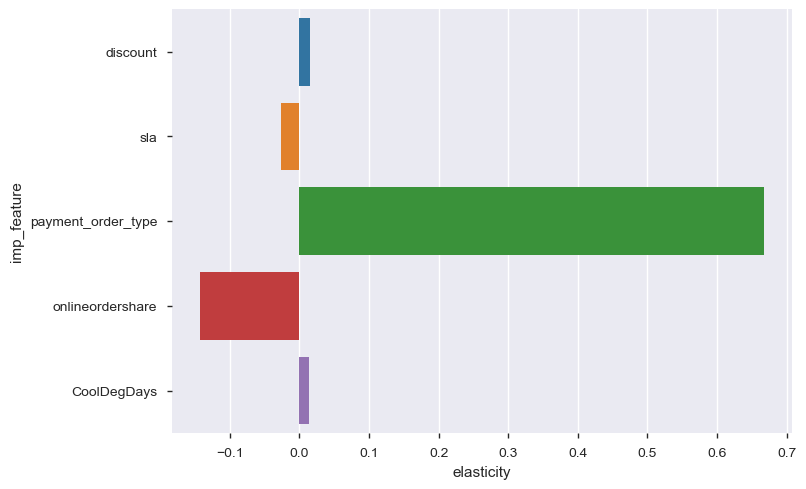

imp_feature   coef  elasticity
0            discount  0.026       0.015
1                 sla -0.027      -0.026
2  payment_order_type  0.761       0.667
3    onlineordershare -0.369      -0.143
4         CoolDegDays  0.025       0.014

In [586]:
elasticity(mm1,home_train_mm)

Text(0, 0.5, 'y_pred')

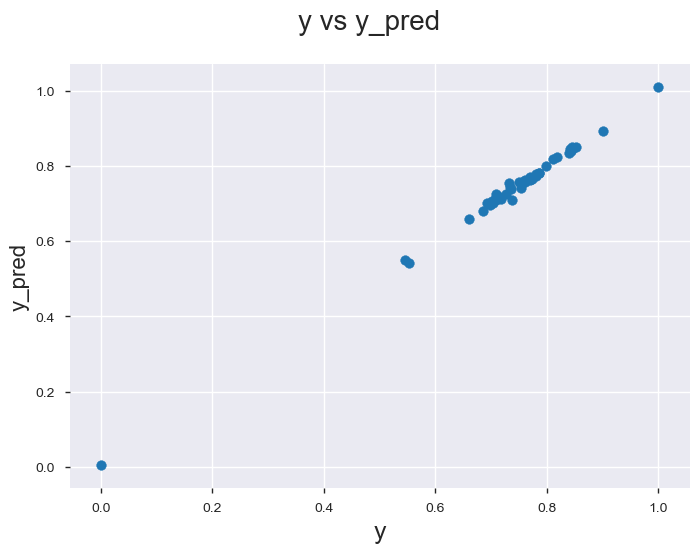

In [587]:
# Plotting y and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y, y_pred)
fig.suptitle('y vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

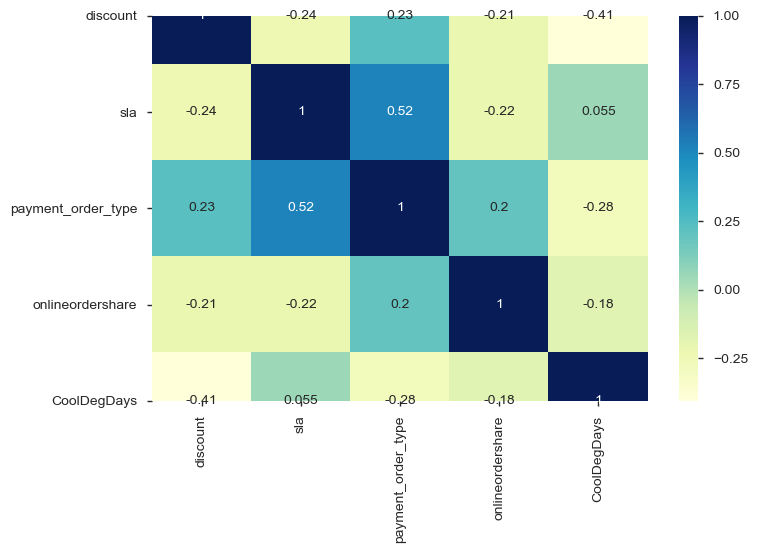

In [588]:
# Figure size
plt.figure(figsize=(8,5))

# Heatmap
sns.heatmap(home_train_mm[features].corr(), cmap="YlGnBu", annot=True)
plt.show()

In [589]:
#Kyock Model

In [590]:
weeklyhome.columns

Index(['week', 'gmv', 'product_mrp', 'discount', 'sla',
       'product_procurement_sla', 'fsn_id', 'payment_order_type', 'gmvpo',
       'onlineordershare', 'Date', 'Year', 'Month', 'TV_ads',
       'Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'HeatDegDays',
       'CoolDegDays', 'TotalRainMm', 'TotalSnowCm', 'SnowOnGrndCm',
       'lag_1_discount_offer', 'lag_2_discount_offer', 'lag_3_discount_offer',
       'lag_1_NPS', 'lag_2_NPS', 'lag1disc', 'lag2disc', 'lag3disc', 'lag1NPS',
       'lag2NPS', 'lag3NPS', 'lag1StockIndex', 'lag2StockIndex',
       'lag3StockIndex', 'lag1Ssales', 'lag2Ssales', 'lag3Ssales', 'lag1Pd',
       'lag2Pd', 'lag3Pd'],
      dtype='object')

In [591]:
home_kyock_mod = weeklyhome[['gmv', 'discount', 'sla','product_procurement_sla', 'payment_order_type',
       'onlineordershare', 'TV_ads', 'Sponsorship_ads', 'Content_marketing_ads',
       'Online_marketing_ads', 'NPS', 'Stock_Index', 'Special_sales', 'Payday',
       'HeatDegDays', 'CoolDegDays', 'TotalRainMm', 'TotalSnowCm',
       'SnowOnGrndCm']]           


home_kyock_mod.head()

gmv  discount   sla  product_procurement_sla  payment_order_type  \
0  106915.000     0.374 2.775                    3.225                  39   
1 4508352.133     0.317 7.399                    2.719                 540   
2 5323115.000     0.329 7.052                    2.634                 620   
3 4633371.000     0.320 7.144                    2.723                 509   
4 3411815.000     0.319 7.273                    2.676                 379   

   onlineordershare  TV_ads  Sponsorship_ads  Content_marketing_ads  \
0            97.500   0.054            1.854                  0.000   
1            25.012   0.081            2.780                  0.000   
2            24.574   0.081            2.780                  0.000   
3            22.063   0.081            2.780                  0.000   
4            23.237   0.028            1.139                  0.000   

   Online_marketing_ads    NPS  Stock_Index  Special_sales  Payday  \
0                 0.332 54.600     1177.000          0.000   0.200   
1                 0.498 54.600     1177.000          0.000   0.000   
2                 0.498 54.600     1177.000          0.286   0.143   
3                 0.498 54.600     1177.000          0.000   0.000   
4                 0.192 56.139     1185.286          0.000   0.143   

   HeatDegDays  CoolDegDays  TotalRainMm  TotalSnowCm  SnowOnGrndCm  
0        0.100        1.460        0.000        0.000         0.000  
1        1.059        2.322        4.155        0.029         0.041  
2        0.816        4.722        1.569        0.029         0.041  
3        1.632        4.172        1.141        0.029         0.041  
4        0.816        5.908        4.341        0.029         0.041

In [592]:

home_kyock_mod['lag1gmv'] = home_kyock_mod['gmv'].shift(-1)

In [593]:
### Checking NaN

home_kyock_mod.isnull().sum()

gmv                        0
discount                   0
sla                        0
product_procurement_sla    0
payment_order_type         0
onlineordershare           0
TV_ads                     1
Sponsorship_ads            1
Content_marketing_ads      1
Online_marketing_ads       1
NPS                        0
Stock_Index                0
Special_sales              0
Payday                     0
HeatDegDays                0
CoolDegDays                0
TotalRainMm                0
TotalSnowCm                0
SnowOnGrndCm               0
lag1gmv                    1
dtype: int64

In [594]:
home_kyock_mod = home_kyock_mod.fillna(0)

In [595]:
home_kyock_mod.head()

gmv  discount   sla  product_procurement_sla  payment_order_type  \
0  106915.000     0.374 2.775                    3.225                  39   
1 4508352.133     0.317 7.399                    2.719                 540   
2 5323115.000     0.329 7.052                    2.634                 620   
3 4633371.000     0.320 7.144                    2.723                 509   
4 3411815.000     0.319 7.273                    2.676                 379   

   onlineordershare  TV_ads  Sponsorship_ads  Content_marketing_ads  \
0            97.500   0.054            1.854                  0.000   
1            25.012   0.081            2.780                  0.000   
2            24.574   0.081            2.780                  0.000   
3            22.063   0.081            2.780                  0.000   
4            23.237   0.028            1.139                  0.000   

   Online_marketing_ads    NPS  Stock_Index  Special_sales  Payday  \
0                 0.332 54.600     1177.000          0.000   0.200   
1                 0.498 54.600     1177.000          0.000   0.000   
2                 0.498 54.600     1177.000          0.286   0.143   
3                 0.498 54.600     1177.000          0.000   0.000   
4                 0.192 56.139     1185.286          0.000   0.143   

   HeatDegDays  CoolDegDays  TotalRainMm  TotalSnowCm  SnowOnGrndCm  \
0        0.100        1.460        0.000        0.000         0.000   
1        1.059        2.322        4.155        0.029         0.041   
2        0.816        4.722        1.569        0.029         0.041   
3        1.632        4.172        1.141        0.029         0.041   
4        0.816        5.908        4.341        0.029         0.041   

      lag1gmv  
0 4508352.133  
1 5323115.000  
2 4633371.000  
3 3411815.000  
4 3702848.000

In [596]:
###  Import the StandardScaler()
# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

### Create a scaling object
# scaler = StandardScaler()
scaler = MinMaxScaler()

### Create a list of the variables that you need to scale
varlist = ['gmv', 'discount', 'sla','product_procurement_sla', 'payment_order_type',
       'onlineordershare', 'TV_ads', 'Sponsorship_ads', 'Content_marketing_ads',
       'Online_marketing_ads', 'NPS', 'Stock_Index', 'Special_sales', 'Payday',
       'HeatDegDays', 'CoolDegDays', 'TotalRainMm', 'TotalSnowCm',
       'SnowOnGrndCm','lag1gmv']

### Scale these variables using 'fit_transform'
home_kyock_mod[varlist] = scaler.fit_transform(home_kyock_mod[varlist])

In [597]:
home_kyock_mod.head()

gmv  discount   sla  product_procurement_sla  payment_order_type  \
0 0.000     0.476 0.000                    1.000               0.000   
1 0.289     0.108 1.000                    0.703               0.262   
2 0.343     0.187 0.925                    0.653               0.304   
3 0.297     0.126 0.945                    0.706               0.246   
4 0.217     0.124 0.973                    0.678               0.178   

   onlineordershare  TV_ads  Sponsorship_ads  Content_marketing_ads  \
0             0.999   0.015            0.058                  0.000   
1             0.132   0.023            0.088                  0.000   
2             0.127   0.023            0.088                  0.000   
3             0.097   0.023            0.088                  0.000   
4             0.111   0.008            0.036                  0.000   

   Online_marketing_ads   NPS  Stock_Index  Special_sales  Payday  \
0                 0.036 0.869        0.714          0.000   1.000   
1                 0.054 0.869        0.714          0.000   0.000   
2                 0.054 0.869        0.714          0.286   0.714   
3                 0.054 0.869        0.714          0.000   0.000   
4                 0.021 1.000        0.750          0.000   0.714   

   HeatDegDays  CoolDegDays  TotalRainMm  TotalSnowCm  SnowOnGrndCm  lag1gmv  
0        0.000        0.247        0.000        0.000         0.000    0.294  
1        0.069        0.393        0.420        0.019         0.009    0.347  
2        0.051        0.799        0.159        0.019         0.009    0.302  
3        0.109        0.706        0.115        0.019         0.009    0.222  
4        0.051        1.000        0.439        0.019         0.009    0.241

In [598]:
### Split the train dataset into X and y
from sklearn.model_selection import train_test_split
x = home_kyock_mod.drop('gmv',axis=1)
y = home_kyock_mod['gmv']

home_train_km = home_kyock_mod

In [599]:
print("X = Independent variable & Y = Target variable")
print(x.shape,y.shape)

X = Independent variable & Y = Target variable
(49, 19) (49,)


In [600]:
###  Represent
km = LinearRegression()

###  Fit a line
km.fit(x,y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [601]:
###  Coefficient values

coef = pd.DataFrame(x.columns)
coef['Coefficient'] = pd.Series(km.coef_)
coef

0  Coefficient
0                  discount        0.295
1                       sla       -0.030
2   product_procurement_sla       -0.054
3        payment_order_type        0.539
4          onlineordershare       -0.350
5                    TV_ads        0.075
6           Sponsorship_ads        0.004
7     Content_marketing_ads        0.099
8      Online_marketing_ads       -0.130
9                       NPS        0.039
10              Stock_Index        0.019
11            Special_sales        0.059
12                   Payday        0.010
13              HeatDegDays       -0.081
14              CoolDegDays       -0.019
15              TotalRainMm       -0.035
16              TotalSnowCm        0.052
17             SnowOnGrndCm        0.050
18                  lag1gmv        0.010

In [602]:
col = x.columns
col

Index(['discount', 'sla', 'product_procurement_sla', 'payment_order_type',
       'onlineordershare', 'TV_ads', 'Sponsorship_ads',
       'Content_marketing_ads', 'Online_marketing_ads', 'NPS', 'Stock_Index',
       'Special_sales', 'Payday', 'HeatDegDays', 'CoolDegDays', 'TotalRainMm',
       'TotalSnowCm', 'SnowOnGrndCm', 'lag1gmv'],
      dtype='object')

In [603]:
#### Model Building - Stepwise selection for feature selection

In [604]:
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [605]:
def stepwise_selection(x, y,
                       initial_list=['discount', 'sla','product_procurement_sla', 'payment_order_type',
       'onlineordershare', 'TV_ads', 'Sponsorship_ads', 'Content_marketing_ads',
       'Online_marketing_ads', 'NPS', 'Stock_Index', 'Special_sales', 'Payday',
       'HeatDegDays', 'CoolDegDays', 'TotalRainMm', 'TotalSnowCm',
       'SnowOnGrndCm','lag1gmv'],
                       threshold_in=0.01,threshold_out = 0.05, verbose=True):
    
    included = list(initial_list)
    while True:
        changed=False
        ### forward step
        excluded = list(set(x.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
                
                
        ###backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included]))).fit()
        ###use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() ###null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [606]:
import statsmodels.api as sm  

final_features = stepwise_selection(x, y)

print("\n","final_selected_features:",final_features)

Drop Sponsorship_ads                with p-value 0.955521
Drop lag1gmv                        with p-value 0.893104
Drop CoolDegDays                    with p-value 0.724638
Drop sla                            with p-value 0.613971
Drop Payday                         with p-value 0.614119
Drop NPS                            with p-value 0.566089
Drop product_procurement_sla        with p-value 0.521797
Drop Stock_Index                    with p-value 0.389395
Drop SnowOnGrndCm                   with p-value 0.411613
Drop HeatDegDays                    with p-value 0.351623
Drop TotalSnowCm                    with p-value 0.31331
Drop TotalRainMm                    with p-value 0.269665
Drop TV_ads                         with p-value 0.376327

 final_selected_features: ['discount', 'payment_order_type', 'onlineordershare', 'Content_marketing_ads', 'Online_marketing_ads', 'Special_sales']


In [607]:
### Import statsmodels
import statsmodels.api as sm  

### Subsetting training data for 15 selected columns
x_rfe1 = x[final_features]

x_rfe1 = sm.add_constant(x_rfe1)

### Fitting the model with selected variables
km1 = sm.OLS(y, x_rfe1).fit() 

print(km1.params)

const                    0.152
discount                 0.279
payment_order_type       0.531
onlineordershare        -0.315
Content_marketing_ads    0.125
Online_marketing_ads    -0.126
Special_sales            0.070
dtype: float64


In [608]:
print(km1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     81.22
Date:                Sat, 29 Feb 2020   Prob (F-statistic):           1.68e-21
Time:                        18:46:07   Log-Likelihood:                 87.016
No. Observations:                  49   AIC:                            -160.0
Df Residuals:                      42   BIC:                            -146.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.15

In [609]:
### Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                  const 8.400
5   Online_marketing_ads 2.160
4  Content_marketing_ads 1.720
2     payment_order_type 1.630
3       onlineordershare 1.600
1               discount 1.580
6          Special_sales 1.210

In [610]:
features = list(x_rfe1.columns)
features.remove('const')
features

['discount',
 'payment_order_type',
 'onlineordershare',
 'Content_marketing_ads',
 'Online_marketing_ads',
 'Special_sales']

In [611]:
### Model Evaluation on testing data
x_2 = x[features]


### Predicition with selected features on the test data
y_pred = km1.predict(sm.add_constant(x_2))

In [612]:
### Mean square error (MSE)
mse = np.mean((y_pred - y)**2)
mse

0.0016789931448244054

In [613]:
### Coefficient values

coef = pd.DataFrame(x_rfe1.columns)
coef['Coefficient'] = pd.Series(km.coef_)
coef


0  Coefficient
0                  const        0.295
1               discount       -0.030
2     payment_order_type       -0.054
3       onlineordershare        0.539
4  Content_marketing_ads       -0.350
5   Online_marketing_ads        0.075
6          Special_sales        0.004

In [614]:
### Using K-Fold Cross validation evaluating on whole dataset

# lm = LinearRegression()
fold = KFold(10,shuffle = True, random_state = 100)

cv_scores = -cross_val_score(km,x[features],y,cv=fold,scoring='neg_mean_squared_error')

print("Neg. of MSE:",cv_scores,"\n")
print("Mean of 5 KFold CV - MSE:",cv_scores.mean())

Neg. of MSE: [0.0003847  0.00348873 0.0174097  0.00251489 0.00096053 0.0008579
 0.00048458 0.0035022  0.00324649 0.00511932] 

Mean of 5 KFold CV - MSE: 0.0037969025337669915


In [615]:
def elasticity(model,x):
    
    features_df = pd.DataFrame(model.params)
    features_df = features_df.rename(columns={0:'coef'})
    
    features_df['imp_feature'] = model.params.index
    features_df = features_df[features_df.imp_feature != 'const'][['imp_feature','coef']]
    features_df.index = range(len(features_df))
#      features

    elasticity_list = list()
    
    for i in range(len(features_df)):
        elasticity_list.append(((features_df.coef[i] * np.mean(x[features_df.imp_feature[i]])) / np.mean(x['gmv'])))

    features_df['elasticity'] = np.round(elasticity_list,3)
    
    sns.barplot(x='elasticity',y='imp_feature',data=features_df)
    plt.show()
    
    return features_df
    

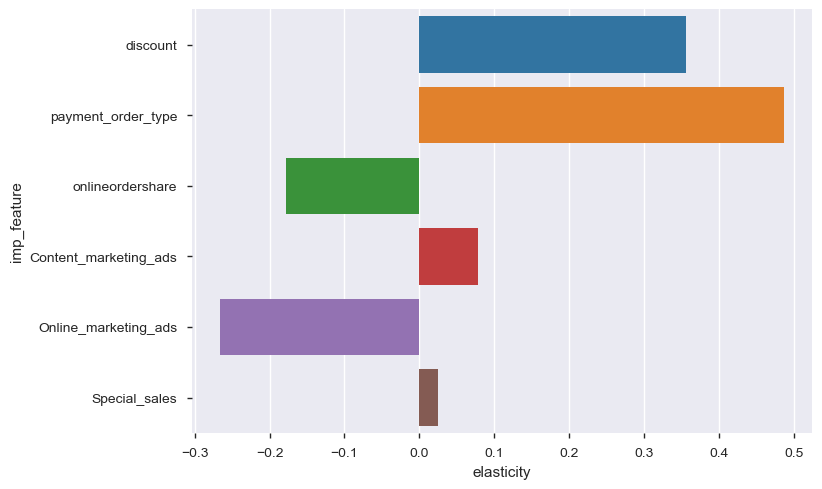

imp_feature   coef  elasticity
0               discount  0.279       0.356
1     payment_order_type  0.531       0.487
2       onlineordershare -0.315      -0.178
3  Content_marketing_ads  0.125       0.078
4   Online_marketing_ads -0.126      -0.266
5          Special_sales  0.070       0.025

In [616]:
elasticity(km1,home_train_km)

Text(0, 0.5, 'y_pred')

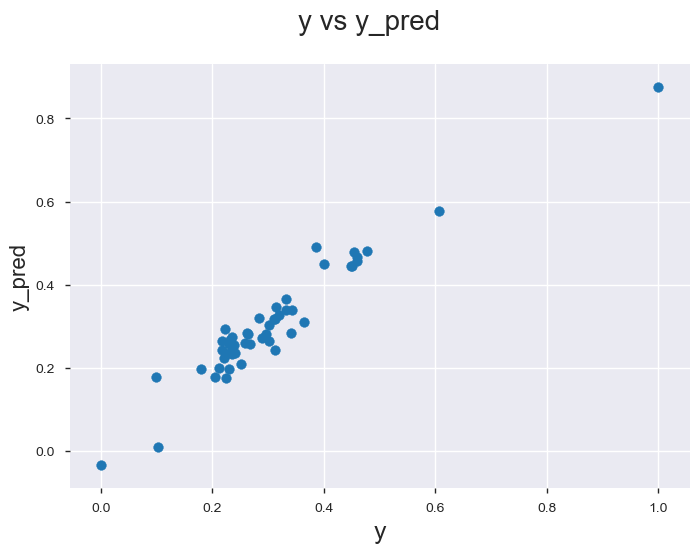

In [617]:
# Plotting y and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y, y_pred)
fig.suptitle('y vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

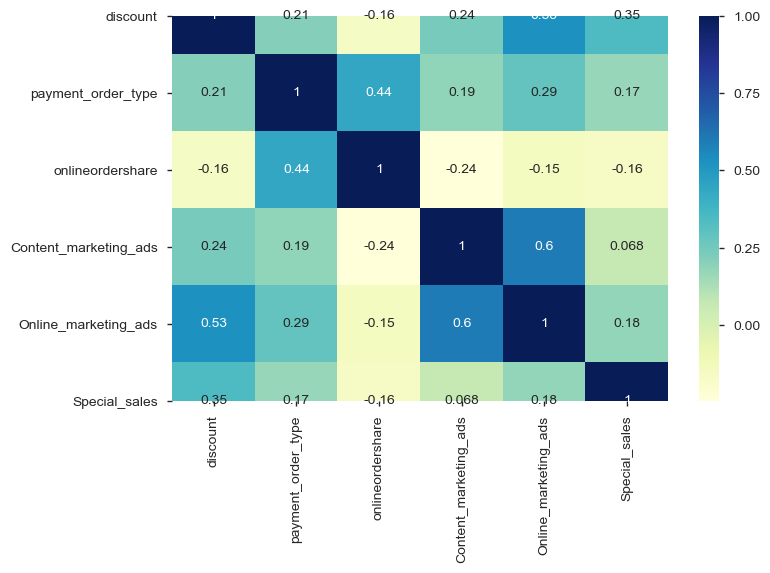

In [618]:
# Figure size
plt.figure(figsize=(8,5))

# Heatmap
sns.heatmap(home_train_km[features].corr(), cmap="YlGnBu", annot=True)
plt.show()

In [619]:
#Distribution Lag Model(Additive)

In [ ]:
#Creating function to create Lagged KPIs for the Distributed Lag Model
def createKPiForDistributedLag(df):

    

    
    df['gmv_lag1'] = df['gmv'].shift(1)   
    df['gmv_lag2'] = df['gmv'].shift(2)
    df['gmv_lag3'] = df['gmv'].shift(3)
    
    df['sla_lag1'] = df['sla'].shift(1)   
    df['sla_lag2'] = df['sla'].shift(2)
    df['sla_lag3'] = df['sla'].shift(3)
    
    df['product_procurement_sla_lag1'] = df['product_procurement_sla'].shift(1)   
    df['product_procurement_sla_lag2'] = df['product_procurement_sla'].shift(2)
    df['product_procurement_sla_lag3'] = df['product_procurement_sla'].shift(3)
    
    df['discount_lag1'] = df['discount'].shift(1)   
    df['discount_lag2'] = df['discount'].shift(2)
    df['discount_lag3'] = df['discount'].shift(3)
    
    df['NPS_lag1'] = df['NPS'].shift(1)   
    df['NPS_lag2'] = df['NPS'].shift(2)
    df['NPS_lag3'] = df['NPS'].shift(3)
    
    df['pct_online_transactions_lag1'] = df['pct_online_transactions'].shift(1)   
    df['pct_online_transactions_lag2'] = df['pct_online_transactions'].shift(2)
    df['pct_online_transactions_lag3'] = df['pct_online_transactions'].shift(3)
    
    return df.fillna(0)

In [3]:
#Camera Accessory

In [620]:
weeklycam.columns

Index(['week', 'gmv', 'product_mrp', 'discount', 'sla',
       'product_procurement_sla', 'fsn_id', 'payment_order_type',
       'premium_prod', 'gmvpo', 'onlineordershare', 'Date', 'Year', 'Month',
       'TV_ads', 'Sponsorship_ads', 'Content_marketing_ads',
       'Online_marketing_ads', 'NPS', 'Stock_Index', 'Special_sales', 'Payday',
       'HeatDegDays', 'CoolDegDays', 'TotalRainMm', 'TotalSnowCm',
       'SnowOnGrndCm', 'lag1disc', 'lag2disc', 'lag3disc', 'lag1NPS',
       'lag2NPS', 'lag3NPS', 'lag1StockIndex', 'lag2StockIndex',
       'lag3StockIndex', 'lag1Pd', 'lag2Pd', 'lag3Pd', 'lag1Ssales',
       'lag2Ssales', 'lag3Ssales'],
      dtype='object')

In [621]:
cameradlagm = weeklycam[['gmv', 'discount', 'sla','product_procurement_sla', 'payment_order_type',
       'onlineordershare', 'TV_ads', 'Sponsorship_ads', 'Content_marketing_ads',
       'Online_marketing_ads', 'NPS', 'Stock_Index', 'Special_sales', 'Payday',
       'HeatDegDays', 'CoolDegDays', 'TotalRainMm', 'TotalSnowCm',
       'SnowOnGrndCm', 'lag1disc', 'lag2disc', 'lag3disc', 'lag1NPS',
       'lag2NPS', 'lag3NPS', 'lag1StockIndex', 'lag2StockIndex',
       'lag3StockIndex', 'lag1Pd', 'lag2Pd', 'lag3Pd', 'lag1Ssales',
       'lag2Ssales', 'lag3Ssales']]           


cameradlagm.head()


gmv  discount   sla  product_procurement_sla  payment_order_type  \
0   18196.000     0.479 2.500                    2.607                  28   
1 4081557.000     0.433 7.026                    2.672                1003   
2 4675000.000     0.438 6.410                    2.704                1097   
3 4452052.000     0.431 6.432                    2.740                1036   
4 2974282.000     0.425 6.396                    2.715                 637   

   onlineordershare  TV_ads  Sponsorship_ads  Content_marketing_ads  \
0           100.000   0.054            1.854                  0.000   
1            34.081   0.081            2.780                  0.000   
2            34.881   0.081            2.780                  0.000   
3            33.312   0.081            2.780                  0.000   
4            30.877   0.028            1.139                  0.000   

   Online_marketing_ads    NPS  Stock_Index  Special_sales  Payday  \
0                 0.332 54.600     1177.000          0.000   0.200   
1                 0.498 54.600     1177.000          0.000   0.000   
2                 0.498 54.600     1177.000          0.286   0.143   
3                 0.498 54.600     1177.000          0.000   0.000   
4                 0.192 56.139     1185.286          0.000   0.143   

   HeatDegDays  CoolDegDays  TotalRainMm  TotalSnowCm  SnowOnGrndCm  lag1disc  \
0        0.100        1.460        0.000        0.000         0.000     0.433   
1        1.059        2.322        4.155        0.029         0.041     0.438   
2        0.816        4.722        1.569        0.029         0.041     0.431   
3        1.632        4.172        1.141        0.029         0.041     0.425   
4        0.816        5.908        4.341        0.029         0.041     0.260   

   lag2disc  lag3disc  lag1NPS  lag2NPS  lag3NPS  lag1StockIndex  \
0     0.438     0.431   54.600   54.600   54.600        1177.000   
1     0.431     0.425   54.600   54.600   56.139        1177.000   
2     0.425     0.260   54.600   56.139   59.987        1177.000   
3     0.260     0.850   56.139   59.987   59.987        1185.286   
4     0.850     0.475   59.987   59.987   59.987        1206.000   

   lag2StockIndex  lag3StockIndex  lag1Pd  lag2Pd  lag3Pd  lag1Ssales  \
0        1177.000        1177.000   0.000   0.143   0.000       0.000   
1        1177.000        1185.286   0.143   0.000   0.143       0.286   
2        1185.286        1206.000   0.000   0.143   0.000       0.000   
3        1206.000        1206.000   0.143   0.000   0.143       0.000   
4        1206.000        1206.000   0.000   0.143   0.000       0.000   

   lag2Ssales  lag3Ssales  
0       0.286       0.000  
1       0.000       0.000  
2       0.000       0.000  
3       0.000       0.286  
4       0.286       0.429

In [622]:
cameradlagm['lag1gmv'] = cameradlagm['gmv'].shift(-1)
cameradlagm['lag2gmv'] = cameradlagm['gmv'].shift(-2)
cameradlagm['lag3gmv'] = cameradlagm['gmv'].shift(-3)

In [623]:
### Checking NaN

cameradlagm.isnull().sum()

gmv                        0
discount                   0
sla                        0
product_procurement_sla    0
payment_order_type         0
onlineordershare           0
TV_ads                     1
Sponsorship_ads            1
Content_marketing_ads      1
Online_marketing_ads       1
NPS                        0
Stock_Index                0
Special_sales              0
Payday                     0
HeatDegDays                0
CoolDegDays                0
TotalRainMm                0
TotalSnowCm                0
SnowOnGrndCm               0
lag1disc                   0
lag2disc                   0
lag3disc                   0
lag1NPS                    0
lag2NPS                    0
lag3NPS                    0
lag1StockIndex             0
lag2StockIndex             0
lag3StockIndex             0
lag1Pd                     0
lag2Pd                     0
lag3Pd                     0
lag1Ssales                 0
lag2Ssales                 0
lag3Ssales                 0
lag1gmv       

In [624]:
cameradlagm = cameradlagm.fillna(0)

In [625]:
cameradlagm.columns

Index(['gmv', 'discount', 'sla', 'product_procurement_sla',
       'payment_order_type', 'onlineordershare', 'TV_ads', 'Sponsorship_ads',
       'Content_marketing_ads', 'Online_marketing_ads', 'NPS', 'Stock_Index',
       'Special_sales', 'Payday', 'HeatDegDays', 'CoolDegDays', 'TotalRainMm',
       'TotalSnowCm', 'SnowOnGrndCm', 'lag1disc', 'lag2disc', 'lag3disc',
       'lag1NPS', 'lag2NPS', 'lag3NPS', 'lag1StockIndex', 'lag2StockIndex',
       'lag3StockIndex', 'lag1Pd', 'lag2Pd', 'lag3Pd', 'lag1Ssales',
       'lag2Ssales', 'lag3Ssales', 'lag1gmv', 'lag2gmv', 'lag3gmv'],
      dtype='object')

In [628]:
###  Import the StandardScaler()
# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

###  Create a scaling object
# scaler = StandardScaler()
scaler = MinMaxScaler()


###  Create a list of the variables that you need to scale
varlist = ['gmv', 'discount', 'sla','product_procurement_sla', 'payment_order_type',
       'onlineordershare', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday','HeatDegDays', 'CoolDegDays', 'TotalRainMm',
       'TotalSnowCm', 'SnowOnGrndCm','lag1disc', 'lag2disc', 'lag3disc','lag1NPS', 'lag2NPS', 'lag3NPS','lag1StockIndex', 'lag2StockIndex',
       'lag3StockIndex',
       'lag1Pd', 'lag2Pd', 'lag3Pd']


###  Scale these variables using 'fit_transform'
cameradlagm[varlist] = scaler.fit_transform(cameradlagm[varlist])

In [629]:
cameradlagm.head()

gmv  discount   sla  product_procurement_sla  payment_order_type  \
0 0.001     0.370 0.000                    0.536               0.005   
1 0.313     0.294 0.647                    0.557               0.196   
2 0.358     0.302 0.559                    0.568               0.215   
3 0.341     0.290 0.562                    0.580               0.203   
4 0.228     0.280 0.557                    0.572               0.125   

   onlineordershare  TV_ads  Sponsorship_ads  Content_marketing_ads  \
0             1.000   0.015            0.058                  0.000   
1             0.341   0.023            0.088                  0.000   
2             0.349   0.023            0.088                  0.000   
3             0.333   0.023            0.088                  0.000   
4             0.309   0.008            0.036                  0.000   

   Online_marketing_ads   NPS  Stock_Index  Special_sales  Payday  \
0                 0.036 0.654        0.714          0.000   1.000   
1                 0.054 0.654        0.714          0.000   0.000   
2                 0.054 0.654        0.714          0.286   0.714   
3                 0.054 0.654        0.714          0.000   0.000   
4                 0.021 0.753        0.750          0.000   0.714   

   HeatDegDays  CoolDegDays  TotalRainMm  TotalSnowCm  SnowOnGrndCm  lag1disc  \
0        0.000        0.247        0.000        0.000         0.000     0.510   
1        0.069        0.393        0.420        0.019         0.009     0.515   
2        0.051        0.799        0.159        0.019         0.009     0.507   
3        0.109        0.706        0.115        0.019         0.009     0.500   
4        0.051        1.000        0.439        0.019         0.009     0.306   

   lag2disc  lag3disc  lag1NPS  lag2NPS  lag3NPS  lag1StockIndex  \
0     0.515     0.507    0.910    0.910    0.910           0.948   
1     0.507     0.500    0.910    0.910    0.936           0.948   
2     0.500     0.306    0.910    0.936    1.000           0.948   
3     0.306     1.000    0.936    1.000    1.000           0.954   
4     1.000     0.559    1.000    1.000    1.000           0.971   

   lag2StockIndex  lag3StockIndex  lag1Pd  lag2Pd  lag3Pd  lag1Ssales  \
0           0.948           0.948   0.000   1.000   0.000       0.000   
1           0.948           0.954   1.000   0.000   1.000       0.286   
2           0.954           0.971   0.000   1.000   0.000       0.000   
3           0.971           0.971   1.000   0.000   1.000       0.000   
4           0.971           0.971   0.000   1.000   0.000       0.000   

   lag2Ssales  lag3Ssales     lag1gmv     lag2gmv     lag3gmv  
0       0.286       0.000 4081557.000 4675000.000 4452052.000  
1       0.000       0.000 4675000.000 4452052.000 2974282.000  
2       0.000       0.000 4452052.000 2974282.000    1498.000  
3       0.000       0.286 2974282.000    1498.000     299.000  
4       0.286       0.429    1498.000     299.000     905.000

In [630]:
###  Split the train dataset into X and y
from sklearn.model_selection import train_test_split
x = cameradlagm.drop('gmv',axis=1)
y = cameradlagm['gmv']

cameratraindlm = cameradlagm

In [631]:
print("X = Independent variable & Y = Target variable")
print(x.shape,y.shape)

X = Independent variable & Y = Target variable
(52, 36) (52,)


In [632]:
###  Represent
dlm = LinearRegression()

###  Fit a line
dlm.fit(x,y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [633]:
###  Coefficient values

coef = pd.DataFrame(x.columns)
coef['Coefficient'] = pd.Series(dlm.coef_)
coef

0  Coefficient
0                  discount        1.083
1                       sla        0.738
2   product_procurement_sla        0.591
3        payment_order_type        0.330
4          onlineordershare        0.098
5                    TV_ads       -0.162
6           Sponsorship_ads       -0.209
7     Content_marketing_ads        0.027
8      Online_marketing_ads        0.759
9                       NPS       -0.187
10              Stock_Index       -0.311
11            Special_sales       -0.088
12                   Payday        0.075
13              HeatDegDays       -0.573
14              CoolDegDays       -0.422
15              TotalRainMm       -0.075
16              TotalSnowCm       -0.281
17             SnowOnGrndCm        0.662
18                 lag1disc       -0.149
19                 lag2disc        0.159
20                 lag3disc        0.010
21                  lag1NPS       -1.124
22                  lag2NPS       -2.452
23                  lag3NPS        3.771
24           lag1StockIndex        1.027
25           lag2StockIndex        2.065
26           lag3StockIndex       -3.572
27                   lag1Pd        0.398
28                   lag2Pd        0.315
29                   lag3Pd        0.003
30               lag1Ssales       -0.242
31               lag2Ssales       -0.061
32               lag3Ssales       -0.336
33                  lag1gmv       -0.000
34                  lag2gmv       -0.000
35                  lag3gmv       -0.000

In [634]:
col = x.columns
col

Index(['discount', 'sla', 'product_procurement_sla', 'payment_order_type',
       'onlineordershare', 'TV_ads', 'Sponsorship_ads',
       'Content_marketing_ads', 'Online_marketing_ads', 'NPS', 'Stock_Index',
       'Special_sales', 'Payday', 'HeatDegDays', 'CoolDegDays', 'TotalRainMm',
       'TotalSnowCm', 'SnowOnGrndCm', 'lag1disc', 'lag2disc', 'lag3disc',
       'lag1NPS', 'lag2NPS', 'lag3NPS', 'lag1StockIndex', 'lag2StockIndex',
       'lag3StockIndex', 'lag1Pd', 'lag2Pd', 'lag3Pd', 'lag1Ssales',
       'lag2Ssales', 'lag3Ssales', 'lag1gmv', 'lag2gmv', 'lag3gmv'],
      dtype='object')

In [635]:
#### Model Building - Stepwise selection for feature selection

In [636]:
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [637]:
def stepwise_selection(x, y,
                       initial_list=['discount', 'sla','product_procurement_sla', 'payment_order_type',
       'onlineordershare', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday','HeatDegDays', 'CoolDegDays', 'TotalRainMm',
       'TotalSnowCm', 'SnowOnGrndCm','lag1disc', 'lag2disc', 'lag3disc','lag1NPS', 'lag2NPS', 'lag3NPS','lag1StockIndex', 'lag2StockIndex',
       'lag3StockIndex','lag1Ssales',
       'lag2Ssales', 'lag3Ssales',
       'lag1Pd', 'lag2Pd', 'lag3Pd'],
                     threshold_in=0.01,threshold_out = 0.05, verbose=True):
    
    included = list(initial_list)
    while True:
        changed=False
        ###  forward step
        excluded = list(set(x.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
                
                
        ###  backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included]))).fit()
        ###  use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() ###  null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [638]:
import statsmodels.api as sm  

final_features = stepwise_selection(x, y)

print("\n","final_selected_features:",final_features)

Drop Payday                         with p-value 0.939417
Drop lag2Ssales                     with p-value 0.857702
Drop NPS                            with p-value 0.807866
Drop Sponsorship_ads                with p-value 0.842413
Drop lag3disc                       with p-value 0.866228
Drop Content_marketing_ads          with p-value 0.884924
Drop lag2disc                       with p-value 0.698835
Drop lag2NPS                        with p-value 0.664981
Drop lag2StockIndex                 with p-value 0.799693
Drop lag3Pd                         with p-value 0.634892
Drop sla                            with p-value 0.483341
Drop discount                       with p-value 0.655819
Drop TotalRainMm                    with p-value 0.425646
Drop CoolDegDays                    with p-value 0.314903
Drop TotalSnowCm                    with p-value 0.279176
Drop lag2Pd                         with p-value 0.397748
Drop lag1Ssales                     with p-value 0.399781
Drop lag3Ssale

In [639]:
###  Import statsmodels
import statsmodels.api as sm  

###  Subsetting training data for 15 selected columns
x_rfe1 = x[final_features]

x_rfe1 = sm.add_constant(x_rfe1)

###  Fitting the model with selected variables
dlm1 = sm.OLS(y, x_rfe1).fit() 

print(dlm1.params)

const                   0.246
payment_order_type      0.585
onlineordershare       -0.323
Online_marketing_ads    0.324
Special_sales           0.119
HeatDegDays            -0.217
lag3NPS                 0.502
lag3StockIndex         -0.470
dtype: float64


In [640]:
print(dlm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     25.15
Date:                Sat, 29 Feb 2020   Prob (F-statistic):           2.03e-13
Time:                        20:55:04   Log-Likelihood:                 62.001
No. Observations:                  52   AIC:                            -108.0
Df Residuals:                      44   BIC:                            -92.39
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2463 

In [641]:
###  Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                 const 19.990
7        lag3StockIndex 14.960
6               lag3NPS 13.570
3  Online_marketing_ads  3.020
5           HeatDegDays  1.940
2      onlineordershare  1.790
1    payment_order_type  1.730
4         Special_sales  1.060

In [642]:
x_rfe1.drop('lag3StockIndex', axis = 1, inplace = True)

In [643]:
### Model 2

In [644]:
# Refitting with final selected variables
x_rfe1 = sm.add_constant(x_rfe1)

# Fitting the model with final selected variables
dlm1 = sm.OLS(y, x_rfe1).fit()   
print(dlm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     25.40
Date:                Sat, 29 Feb 2020   Prob (F-statistic):           6.28e-13
Time:                        20:56:09   Log-Likelihood:                 58.593
No. Observations:                  52   AIC:                            -103.2
Df Residuals:                      45   BIC:                            -89.53
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2522 

In [645]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                 const 19.940
3  Online_marketing_ads  1.950
1    payment_order_type  1.720
2      onlineordershare  1.680
5           HeatDegDays  1.600
6               lag3NPS  1.080
4         Special_sales  1.030

In [646]:
x_rfe1.drop('lag3NPS', axis = 1, inplace = True)

In [647]:
### Model 3

In [648]:
# Refitting with final selected variables
x_rfe1 = sm.add_constant(x_rfe1)

# Fitting the model with final selected variables
dlm1 = sm.OLS(y, x_rfe1).fit()   
print(dlm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     31.09
Date:                Sat, 29 Feb 2020   Prob (F-statistic):           1.10e-13
Time:                        20:59:15   Log-Likelihood:                 58.549
No. Observations:                  52   AIC:                            -105.1
Df Residuals:                      46   BIC:                            -93.39
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2626 

In [649]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                 const 9.640
3  Online_marketing_ads 1.930
1    payment_order_type 1.720
2      onlineordershare 1.620
5           HeatDegDays 1.590
4         Special_sales 1.020

In [650]:
x_rfe1.drop('HeatDegDays', axis = 1, inplace = True)

In [651]:
### Model 4

In [652]:
# Refitting with final selected variables
x_rfe1 = sm.add_constant(x_rfe1)

# Fitting the model with final selected variables
dlm1 = sm.OLS(y, x_rfe1).fit()   
print(dlm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     33.33
Date:                Sat, 29 Feb 2020   Prob (F-statistic):           3.48e-13
Time:                        21:01:15   Log-Likelihood:                 55.110
No. Observations:                  52   AIC:                            -100.2
Df Residuals:                      47   BIC:                            -90.46
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2519 

In [653]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                 const 9.500
1    payment_order_type 1.690
2      onlineordershare 1.610
3  Online_marketing_ads 1.420
4         Special_sales 1.020

In [654]:
features = list(x_rfe1.columns)
features.remove('const')
features

['payment_order_type',
 'onlineordershare',
 'Online_marketing_ads',
 'Special_sales']

In [655]:
###  Model Evaluation on testing data
x_2 = x[features]

###  Predicition with selected features on the test data
y_pred = dlm1.predict(sm.add_constant(x_2))

In [656]:
###  Mean square error (MSE)
mse = np.mean((y_pred - y)**2)
mse

0.007030466112164246

In [657]:
###  Coefficient values

coef = pd.DataFrame(x_rfe1.columns)
coef['Coefficient'] = pd.Series(dlm.coef_)
coef

0  Coefficient
0                 const        1.083
1    payment_order_type        0.738
2      onlineordershare        0.591
3  Online_marketing_ads        0.330
4         Special_sales        0.098

In [658]:
###  Using K-Fold Cross validation evaluating on whole dataset

# lm = LinearRegression()
fold = KFold(10,shuffle = True, random_state = 100)

cv_scores = -cross_val_score(dlm,x[features],y,cv=fold,scoring='neg_mean_squared_error')

print("Neg. of MSE:",cv_scores,"\n")
print("Mean of 5 KFold CV - MSE:",cv_scores.mean())

Neg. of MSE: [0.02550673 0.0076865  0.01214403 0.0033503  0.00363493 0.00260108
 0.00226256 0.03459684 0.00352466 0.00918928] 

Mean of 5 KFold CV - MSE: 0.0104496923791047


In [659]:
def elasticity(model,x):
    
    features_df = pd.DataFrame(model.params)
    features_df = features_df.rename(columns={0:'coef'})
    
    features_df['imp_feature'] = model.params.index
    features_df = features_df[features_df.imp_feature != 'const'][['imp_feature','coef']]
    features_df.index = range(len(features_df))
#      features

    elasticity_list = list()
    
    for i in range(len(features_df)):
        elasticity_list.append(((features_df.coef[i] * np.mean(x[features_df.imp_feature[i]])) / np.mean(x['gmv'])))

    features_df['elasticity'] = np.round(elasticity_list,3)
    
    sns.barplot(x='elasticity',y='imp_feature',data=features_df)
    plt.show()
    
    return features_df

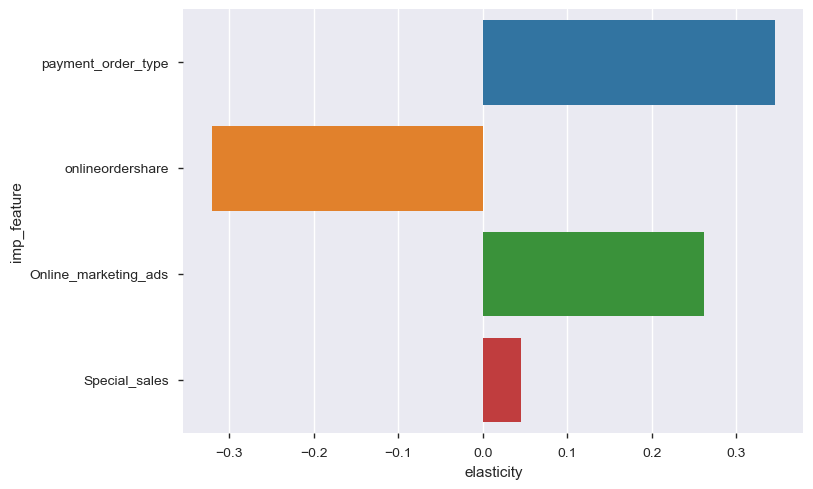

imp_feature   coef  elasticity
0    payment_order_type  0.547       0.346
1      onlineordershare -0.368      -0.321
2  Online_marketing_ads  0.163       0.262
3         Special_sales  0.144       0.045

In [660]:
elasticity(dlm1,camera_train_dlm)

Text(0, 0.5, 'y_pred')

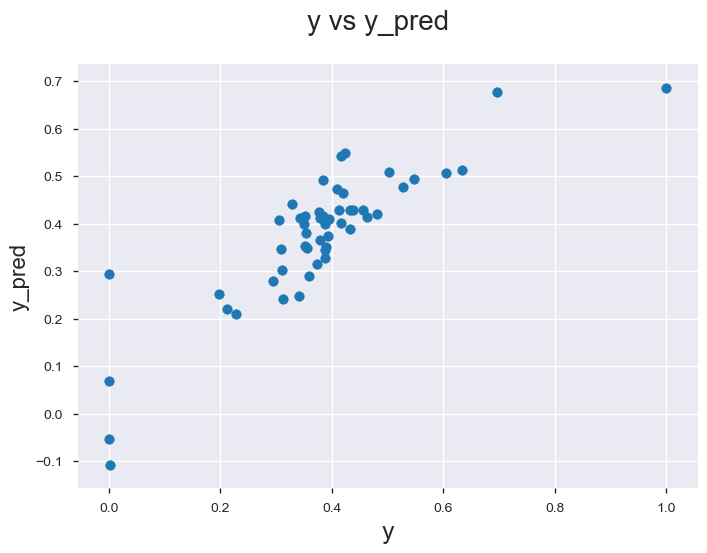

In [661]:
# Plotting y and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y, y_pred)
fig.suptitle('y vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

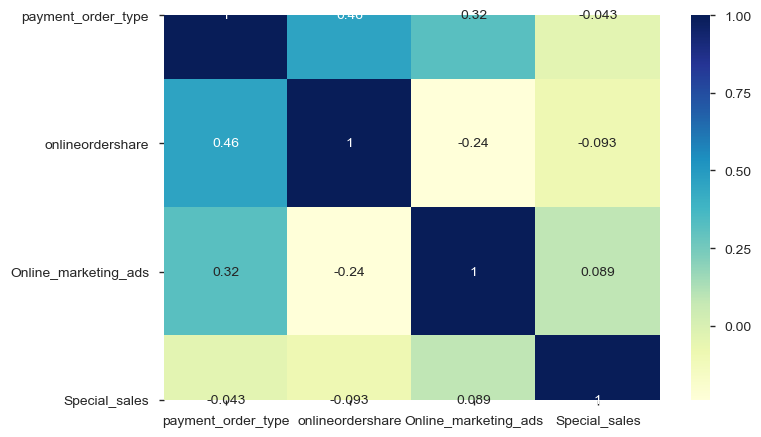

In [662]:
# Figure size
plt.figure(figsize=(8,5))

# Heatmap
sns.heatmap(camera_train_dlm[features].corr(), cmap="YlGnBu", annot=True)
plt.show()

In [663]:
### 5. Distributed Lag (Multiplicative) Model

In [664]:
weeklycam.columns

Index(['week', 'gmv', 'product_mrp', 'discount', 'sla',
       'product_procurement_sla', 'fsn_id', 'payment_order_type',
       'premium_prod', 'gmvpo', 'onlineordershare', 'Date', 'Year', 'Month',
       'TV_ads', 'Sponsorship_ads', 'Content_marketing_ads',
       'Online_marketing_ads', 'NPS', 'Stock_Index', 'Special_sales', 'Payday',
       'HeatDegDays', 'CoolDegDays', 'TotalRainMm', 'TotalSnowCm',
       'SnowOnGrndCm', 'lag1disc', 'lag2disc', 'lag3disc', 'lag1NPS',
       'lag2NPS', 'lag3NPS', 'lag1StockIndex', 'lag2StockIndex',
       'lag3StockIndex', 'lag1Pd', 'lag2Pd', 'lag3Pd', 'lag1Ssales',
       'lag2Ssales', 'lag3Ssales'],
      dtype='object')

In [666]:
cameradlmm = weeklycam[['gmv', 'discount', 'sla','product_procurement_sla', 'payment_order_type',
       'onlineordershare', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday','HeatDegDays', 'CoolDegDays', 'TotalRainMm', 'TotalSnowCm',
       'SnowOnGrndCm','lag1disc', 'lag2disc', 'lag3disc','lag1NPS',
       'lag2NPS', 'lag3NPS','lag1StockIndex', 'lag2StockIndex',
       'lag3StockIndex','lag1Ssales',
       'lag2Ssales', 'lag3Ssales',
       'lag1Pd', 'lag2Pd', 'lag3Pd']]           


cameradlmm.head()


gmv  discount   sla  product_procurement_sla  payment_order_type  \
0   18196.000     0.479 2.500                    2.607                  28   
1 4081557.000     0.433 7.026                    2.672                1003   
2 4675000.000     0.438 6.410                    2.704                1097   
3 4452052.000     0.431 6.432                    2.740                1036   
4 2974282.000     0.425 6.396                    2.715                 637   

   onlineordershare  TV_ads  Sponsorship_ads  Content_marketing_ads  \
0           100.000   0.054            1.854                  0.000   
1            34.081   0.081            2.780                  0.000   
2            34.881   0.081            2.780                  0.000   
3            33.312   0.081            2.780                  0.000   
4            30.877   0.028            1.139                  0.000   

   Online_marketing_ads    NPS  Stock_Index  Special_sales  Payday  \
0                 0.332 54.600     1177.000          0.000   0.200   
1                 0.498 54.600     1177.000          0.000   0.000   
2                 0.498 54.600     1177.000          0.286   0.143   
3                 0.498 54.600     1177.000          0.000   0.000   
4                 0.192 56.139     1185.286          0.000   0.143   

   HeatDegDays  CoolDegDays  TotalRainMm  TotalSnowCm  SnowOnGrndCm  lag1disc  \
0        0.100        1.460        0.000        0.000         0.000     0.433   
1        1.059        2.322        4.155        0.029         0.041     0.438   
2        0.816        4.722        1.569        0.029         0.041     0.431   
3        1.632        4.172        1.141        0.029         0.041     0.425   
4        0.816        5.908        4.341        0.029         0.041     0.260   

   lag2disc  lag3disc  lag1NPS  lag2NPS  lag3NPS  lag1StockIndex  \
0     0.438     0.431   54.600   54.600   54.600        1177.000   
1     0.431     0.425   54.600   54.600   56.139        1177.000   
2     0.425     0.260   54.600   56.139   59.987        1177.000   
3     0.260     0.850   56.139   59.987   59.987        1185.286   
4     0.850     0.475   59.987   59.987   59.987        1206.000   

   lag2StockIndex  lag3StockIndex  lag1Ssales  lag2Ssales  lag3Ssales  lag1Pd  \
0        1177.000        1177.000       0.000       0.286       0.000   0.000   
1        1177.000        1185.286       0.286       0.000       0.000   0.143   
2        1185.286        1206.000       0.000       0.000       0.000   0.000   
3        1206.000        1206.000       0.000       0.000       0.286   0.143   
4        1206.000        1206.000       0.000       0.286       0.429   0.000   

   lag2Pd  lag3Pd  
0   0.143   0.000  
1   0.000   0.143  
2   0.143   0.000  
3   0.000   0.143  
4   0.143   0.000

In [667]:
cameradlmm['lag1gmv'] = cameradlmm['gmv'].shift(-1)
cameradlmm['lag2gmv'] = cameradlmm['gmv'].shift(-2)
cameradlmm['lag3gmv'] = cameradlmm['gmv'].shift(-3)

In [668]:
### Checking NaN

cameradlmm.isnull().sum()

gmv                        0
discount                   0
sla                        0
product_procurement_sla    0
payment_order_type         0
onlineordershare           0
TV_ads                     1
Sponsorship_ads            1
Content_marketing_ads      1
Online_marketing_ads       1
NPS                        0
Stock_Index                0
Special_sales              0
Payday                     0
HeatDegDays                0
CoolDegDays                0
TotalRainMm                0
TotalSnowCm                0
SnowOnGrndCm               0
lag1disc                   0
lag2disc                   0
lag3disc                   0
lag1NPS                    0
lag2NPS                    0
lag3NPS                    0
lag1StockIndex             0
lag2StockIndex             0
lag3StockIndex             0
lag1Ssales                 0
lag2Ssales                 0
lag3Ssales                 0
lag1Pd                     0
lag2Pd                     0
lag3Pd                     0
lag1gmv       

In [669]:
cameradlmm = cameradlmm.fillna(0)

In [670]:
### Applying Log 
cameradlmm=np.log(cameradlmm)

cameradlmm = cameradlmm.fillna(0)
cameradlmm = cameradlmm.replace([np.inf, -np.inf], 0)

In [671]:
cameradlmm.columns

Index(['gmv', 'discount', 'sla', 'product_procurement_sla',
       'payment_order_type', 'onlineordershare', 'TV_ads', 'Sponsorship_ads',
       'Content_marketing_ads', 'Online_marketing_ads', 'NPS', 'Stock_Index',
       'Special_sales', 'Payday', 'HeatDegDays', 'CoolDegDays', 'TotalRainMm',
       'TotalSnowCm', 'SnowOnGrndCm', 'lag1disc', 'lag2disc', 'lag3disc',
       'lag1NPS', 'lag2NPS', 'lag3NPS', 'lag1StockIndex', 'lag2StockIndex',
       'lag3StockIndex', 'lag1Ssales', 'lag2Ssales', 'lag3Ssales', 'lag1Pd',
       'lag2Pd', 'lag3Pd', 'lag1gmv', 'lag2gmv', 'lag3gmv'],
      dtype='object')

In [672]:
###  Import the StandardScaler()
# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

###  Create a scaling object
# scaler = StandardScaler()
scaler = MinMaxScaler()


###  Create a list of the variables that you need to scale
varlist = ['gmv', 'discount', 'sla','product_procurement_sla', 'payment_order_type',
       'onlineordershare', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday','HeatDegDays', 'CoolDegDays', 'TotalRainMm',
       'TotalSnowCm', 'SnowOnGrndCm', 'lag1disc', 'lag2disc', 'lag3disc','lag1NPS', 'lag2NPS', 'lag3NPS','lag1StockIndex', 'lag2StockIndex',
       'lag3StockIndex','lag1Ssales', 'lag2Ssales', 'lag3Ssales',
       'lag1Pd',
       'lag2Pd', 'lag3Pd']


###  Scale these variables using 'fit_transform'
cameradlmm[varlist] = scaler.fit_transform(cameradlmm[varlist])

In [673]:
###  Split the train dataset into X and y
from sklearn.model_selection import train_test_split
x = cameradlmm.drop('gmv',axis=1)
y = cameradlmm['gmv']

camera_train_dlmm = cameradlmm

In [674]:
print("X = Independent variable & Y = Target variable")
print(x.shape,y.shape)

X = Independent variable & Y = Target variable
(52, 36) (52,)


In [675]:
### Represent
dlm = LinearRegression()

###  Fit a line
dlm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [676]:
###  Coefficient values

coef = pd.DataFrame(x.columns)
coef['Coefficient'] = pd.Series(dlm.coef_)
coef

0  Coefficient
0                  discount       -0.083
1                       sla        0.038
2   product_procurement_sla        0.221
3        payment_order_type        0.789
4          onlineordershare       -0.354
5                    TV_ads       -0.061
6           Sponsorship_ads        0.033
7     Content_marketing_ads       -0.098
8      Online_marketing_ads        0.169
9                       NPS        0.022
10              Stock_Index       -0.013
11            Special_sales        0.003
12                   Payday        0.001
13              HeatDegDays        0.028
14              CoolDegDays        0.037
15              TotalRainMm       -0.003
16              TotalSnowCm       -0.026
17             SnowOnGrndCm        0.002
18                 lag1disc       -0.099
19                 lag2disc        0.158
20                 lag3disc       -0.055
21                  lag1NPS       -1.818
22                  lag2NPS        1.960
23                  lag3NPS       -0.305
24           lag1StockIndex        1.232
25           lag2StockIndex       -1.642
26           lag3StockIndex        0.248
27               lag1Ssales       -0.002
28               lag2Ssales       -0.017
29               lag3Ssales       -0.007
30                   lag1Pd        0.013
31                   lag2Pd        0.027
32                   lag3Pd        0.006
33                  lag1gmv        0.024
34                  lag2gmv       -0.011
35                  lag3gmv        0.002

In [677]:
col = x.columns
col

Index(['discount', 'sla', 'product_procurement_sla', 'payment_order_type',
       'onlineordershare', 'TV_ads', 'Sponsorship_ads',
       'Content_marketing_ads', 'Online_marketing_ads', 'NPS', 'Stock_Index',
       'Special_sales', 'Payday', 'HeatDegDays', 'CoolDegDays', 'TotalRainMm',
       'TotalSnowCm', 'SnowOnGrndCm', 'lag1disc', 'lag2disc', 'lag3disc',
       'lag1NPS', 'lag2NPS', 'lag3NPS', 'lag1StockIndex', 'lag2StockIndex',
       'lag3StockIndex', 'lag1Ssales', 'lag2Ssales', 'lag3Ssales', 'lag1Pd',
       'lag2Pd', 'lag3Pd', 'lag1gmv', 'lag2gmv', 'lag3gmv'],
      dtype='object')

In [678]:
#### Model Building - Stepwise selection for feature selection

In [679]:
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [680]:
def stepwise_selection(x, y,
                       initial_list=['discount', 'sla','product_procurement_sla', 'payment_order_type',
       'onlineordershare', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday','HeatDegDays', 'CoolDegDays', 'TotalRainMm',
       'TotalSnowCm', 'SnowOnGrndCm', 'lag1disc', 'lag2disc', 'lag3disc','lag1NPS', 'lag2NPS', 'lag3NPS','lag1StockIndex', 'lag2StockIndex',
       'lag3StockIndex','lag1Ssales', 'lag2Ssales', 'lag3Ssales',
       'lag1Pd','lag2Pd', 'lag3Pd'],
                     threshold_in=0.01,threshold_out = 0.05, verbose=True):
    
    included = list(initial_list)
    while True:
        changed=False
        ###  forward step
        excluded = list(set(x.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
                
                
        ###  backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included]))).fit()
        ###  use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() ###  null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [681]:
import statsmodels.api as sm  

final_features = stepwise_selection(x, y)

print("\n","final_selected_features:",final_features)

Add  lag1gmv                        with p-value 0.00233227
Drop Special_sales                  with p-value 0.976828
Drop SnowOnGrndCm                   with p-value 0.974751
Drop Online_marketing_ads           with p-value 0.958112
Drop Stock_Index                    with p-value 0.958561
Drop TV_ads                         with p-value 0.944117
Drop lag3StockIndex                 with p-value 0.905933
Drop sla                            with p-value 0.872404
Drop lag1Ssales                     with p-value 0.830963
Drop NPS                            with p-value 0.788223
Drop Payday                         with p-value 0.635752
Drop TotalRainMm                    with p-value 0.457037
Drop Content_marketing_ads          with p-value 0.387496
Drop lag3Ssales                     with p-value 0.328126
Drop lag1Pd                         with p-value 0.212812
Drop Sponsorship_ads                with p-value 0.423232
Drop lag2Ssales                     with p-value 0.285297
Drop lag3Pd 

In [682]:
###  Import statsmodels
import statsmodels.api as sm  

###  Subsetting training data for 15 selected columns
x_rfe1 = x[final_features]

x_rfe1 = sm.add_constant(x_rfe1)

###  Fitting the model with selected variables
dlm1 = sm.OLS(y, x_rfe1).fit() 

print(dlm1.params)

const                      0.238
discount                  -0.115
product_procurement_sla    0.267
payment_order_type         0.812
onlineordershare          -0.342
HeatDegDays                0.057
CoolDegDays                0.040
TotalSnowCm               -0.039
lag1disc                  -0.088
lag2disc                   0.170
lag1NPS                   -1.896
lag2NPS                    1.973
lag1StockIndex             1.495
lag2StockIndex            -1.810
lag2Pd                     0.016
lag1gmv                    0.018
dtype: float64


In [683]:
print(dlm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     783.8
Date:                Sat, 29 Feb 2020   Prob (F-statistic):           1.34e-40
Time:                        21:50:17   Log-Likelihood:                 158.99
No. Observations:                  52   AIC:                            -286.0
Df Residuals:                      36   BIC:                            -254.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [684]:
###  Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features      VIF
11                  lag2NPS 1064.520
13           lag2StockIndex 1049.400
0                     const  990.120
12           lag1StockIndex  571.140
10                  lag1NPS  552.170
1                  discount    9.530
2   product_procurement_sla    9.210
15                  lag1gmv    8.470
3        payment_order_type    7.930
9                  lag2disc    3.360
5               HeatDegDays    3.030
6               CoolDegDays    2.470
4          onlineordershare    2.100
8                  lag1disc    2.100
7               TotalSnowCm    1.720
14                   lag2Pd    1.210

In [685]:
x_rfe1.drop('lag2NPS', axis = 1, inplace = True)

In [686]:
### Model 2

In [687]:
# Refitting with final selected variables
x_rfe1 = sm.add_constant(x_rfe1)

# Fitting the model with final selected variables
dlm1 = sm.OLS(y, x_rfe1).fit()   
print(dlm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     440.4
Date:                Sat, 29 Feb 2020   Prob (F-statistic):           1.06e-36
Time:                        21:51:49   Log-Likelihood:                 141.57
No. Observations:                  52   AIC:                            -253.1
Df Residuals:                      37   BIC:                            -223.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [688]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0                     const 925.710
11           lag1StockIndex 163.000
10                  lag1NPS 134.550
2   product_procurement_sla   9.010
14                  lag1gmv   8.410
1                  discount   8.270
3        payment_order_type   6.740
12           lag2StockIndex   3.940
9                  lag2disc   3.180
5               HeatDegDays   2.780
6               CoolDegDays   2.470
8                  lag1disc   2.100
4          onlineordershare   2.080
7               TotalSnowCm   1.570
13                   lag2Pd   1.210

In [689]:
x_rfe1.drop('lag1StockIndex', axis = 1, inplace = True)


In [690]:
### Model 3

In [691]:
# Refitting with final selected variables
x_rfe1 = sm.add_constant(x_rfe1)

# Fitting the model with final selected variables
dlm1 = sm.OLS(y, x_rfe1).fit()   
print(dlm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     482.0
Date:                Sat, 29 Feb 2020   Prob (F-statistic):           5.68e-38
Time:                        21:53:44   Log-Likelihood:                 141.30
No. Observations:                  52   AIC:                            -254.6
Df Residuals:                      38   BIC:                            -227.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [692]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0                     const 847.150
1                  discount   7.250
2   product_procurement_sla   7.200
3        payment_order_type   5.520
13                  lag1gmv   4.950
10                  lag1NPS   4.290
11           lag2StockIndex   3.840
9                  lag2disc   2.910
5               HeatDegDays   2.620
6               CoolDegDays   2.410
8                  lag1disc   2.070
4          onlineordershare   2.050
7               TotalSnowCm   1.410
12                   lag2Pd   1.210

In [693]:
x_rfe1.drop('HeatDegDays', axis = 1, inplace = True)

In [694]:
### Model 4

In [695]:
# Refitting with final selected variables
x_rfe1 = sm.add_constant(x_rfe1)

# Fitting the model with final selected variables
dlm1 = sm.OLS(y, x_rfe1).fit()   
print(dlm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     521.1
Date:                Sat, 29 Feb 2020   Prob (F-statistic):           4.11e-39
Time:                        21:58:47   Log-Likelihood:                 140.58
No. Observations:                  52   AIC:                            -255.2
Df Residuals:                      39   BIC:                            -229.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [696]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0                     const 638.130
2   product_procurement_sla   5.760
1                  discount   5.640
12                  lag1gmv   4.930
9                   lag1NPS   4.260
3        payment_order_type   4.180
10           lag2StockIndex   3.800
8                  lag2disc   2.900
5               CoolDegDays   1.820
7                  lag1disc   1.820
4          onlineordershare   1.640
6               TotalSnowCm   1.260
11                   lag2Pd   1.210

In [697]:
x_rfe1.drop('TotalSnowCm', axis = 1, inplace = True)

In [698]:
### model 5

In [699]:
# Refitting with final selected variables
x_rfe1 = sm.add_constant(x_rfe1)

# Fitting the model with final selected variables
dlm1 = sm.OLS(y, x_rfe1).fit()   
print(dlm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     551.0
Date:                Sat, 29 Feb 2020   Prob (F-statistic):           5.08e-40
Time:                        22:00:49   Log-Likelihood:                 139.12
No. Observations:                  52   AIC:                            -254.2
Df Residuals:                      40   BIC:                            -230.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [700]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0                     const 613.130
2   product_procurement_sla   5.750
1                  discount   5.620
11                  lag1gmv   4.720
8                   lag1NPS   4.130
3        payment_order_type   4.040
9            lag2StockIndex   3.800
7                  lag2disc   2.870
6                  lag1disc   1.820
4          onlineordershare   1.640
5               CoolDegDays   1.640
10                   lag2Pd   1.160

In [701]:
x_rfe1.drop('product_procurement_sla', axis = 1, inplace = True)

In [702]:
### Model 6

In [703]:
# Refitting with final selected variables
x_rfe1 = sm.add_constant(x_rfe1)

# Fitting the model with final selected variables
dlm1 = sm.OLS(y, x_rfe1).fit()   
print(dlm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     457.7
Date:                Sat, 29 Feb 2020   Prob (F-statistic):           9.78e-39
Time:                        22:01:52   Log-Likelihood:                 131.24
No. Observations:                  52   AIC:                            -240.5
Df Residuals:                      41   BIC:                            -219.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.5123      0

In [704]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0                const 381.530
10             lag1gmv   4.680
7              lag1NPS   4.110
8       lag2StockIndex   3.790
6             lag2disc   2.870
2   payment_order_type   2.260
5             lag1disc   1.690
4          CoolDegDays   1.640
3     onlineordershare   1.620
1             discount   1.560
9               lag2Pd   1.150

In [705]:
x_rfe1.drop('lag1disc', axis = 1, inplace = True)

In [706]:
### Model 7

In [707]:
# Refitting with final selected variables
x_rfe1 = sm.add_constant(x_rfe1)

# Fitting the model with final selected variables
dlm1 = sm.OLS(y, x_rfe1).fit()   
print(dlm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     498.1
Date:                Sat, 29 Feb 2020   Prob (F-statistic):           1.05e-39
Time:                        22:07:42   Log-Likelihood:                 130.08
No. Observations:                  52   AIC:                            -240.2
Df Residuals:                      42   BIC:                            -220.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.4632      0

In [708]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0               const 241.150
9             lag1gmv   4.670
7      lag2StockIndex   3.770
6             lag1NPS   3.700
5            lag2disc   2.860
2  payment_order_type   2.210
3    onlineordershare   1.620
1            discount   1.560
4         CoolDegDays   1.540
8              lag2Pd   1.130

In [709]:
x_rfe1.drop('lag2Pd', axis = 1, inplace = True)

In [710]:
### Model 8

In [711]:
# Refitting with final selected variables
x_rfe1 = sm.add_constant(x_rfe1)

# Fitting the model with final selected variables
dlm1 = sm.OLS(y, x_rfe1).fit()   
print(dlm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     530.6
Date:                Sat, 29 Feb 2020   Prob (F-statistic):           2.23e-40
Time:                        22:08:47   Log-Likelihood:                 128.07
No. Observations:                  52   AIC:                            -238.1
Df Residuals:                      43   BIC:                            -220.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.4914      0

In [712]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0               const 215.960
8             lag1gmv   4.670
6             lag1NPS   3.690
7      lag2StockIndex   3.610
5            lag2disc   2.820
2  payment_order_type   2.200
3    onlineordershare   1.620
1            discount   1.540
4         CoolDegDays   1.490

In [713]:
x_rfe1.drop('CoolDegDays', axis = 1, inplace = True)

In [714]:
###  model 9

In [715]:
# Refitting with final selected variables
x_rfe1 = sm.add_constant(x_rfe1)

# Fitting the model with final selected variables
dlm1 = sm.OLS(y, x_rfe1).fit()   
print(dlm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     530.6
Date:                Sat, 29 Feb 2020   Prob (F-statistic):           2.58e-40
Time:                        22:11:38   Log-Likelihood:                 124.04
No. Observations:                  52   AIC:                            -232.1
Df Residuals:                      44   BIC:                            -216.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.5415      0

In [716]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0               const 180.680
7             lag1gmv   4.140
5             lag1NPS   3.360
6      lag2StockIndex   3.190
4            lag2disc   2.740
2  payment_order_type   2.200
3    onlineordershare   1.620
1            discount   1.530

In [717]:
x_rfe1.drop('lag2StockIndex', axis = 1, inplace = True)

In [718]:
### Model 10

In [719]:
# Refitting with final selected variables
x_rfe1 = sm.add_constant(x_rfe1)

# Fitting the model with final selected variables
dlm1 = sm.OLS(y, x_rfe1).fit()   
print(dlm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     608.4
Date:                Sat, 29 Feb 2020   Prob (F-statistic):           2.37e-41
Time:                        22:13:45   Log-Likelihood:                 123.02
No. Observations:                  52   AIC:                            -232.0
Df Residuals:                      45   BIC:                            -218.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.5574      0

In [720]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0               const 168.080
6             lag1gmv   3.850
5             lag1NPS   2.230
2  payment_order_type   2.050
4            lag2disc   1.660
3    onlineordershare   1.540
1            discount   1.460

In [721]:
features = list(x_rfe1.columns)
features.remove('const')
features

['discount',
 'payment_order_type',
 'onlineordershare',
 'lag2disc',
 'lag1NPS',
 'lag1gmv']

In [722]:
###  Model Evaluation on testing data
x_2 = x[features]

###  Predicition with selected features on the test data
y_pred = dlm1.predict(sm.add_constant(x_2))

In [723]:
###  Mean square error (MSE)
mse = np.mean((y_pred - y)**2)
mse

0.0005160253182628006

In [724]:
###  Coefficient values

coef = pd.DataFrame(x_rfe1.columns)
coef['Coefficient'] = pd.Series(dlm.coef_)
coef

0  Coefficient
0               const       -0.083
1            discount        0.038
2  payment_order_type        0.221
3    onlineordershare        0.789
4            lag2disc       -0.354
5             lag1NPS       -0.061
6             lag1gmv        0.033

In [725]:
###  Using K-Fold Cross validation evaluating on whole dataset

# lm = LinearRegression()
fold = KFold(10,shuffle = True, random_state = 100)

cv_scores = -cross_val_score(dlm,x[features],y,cv=fold,scoring='neg_mean_squared_error')

print("Neg. of MSE:",cv_scores,"\n")
print("Mean of 5 KFold CV - MSE:",cv_scores.mean())

Neg. of MSE: [0.0305024  0.00050557 0.00037158 0.00109291 0.0002167  0.00283664
 0.00023268 0.00081863 0.00045321 0.00050471] 

Mean of 5 KFold CV - MSE: 0.003753501181880229


In [726]:
def elasticity(model,x):
    
    features_df = pd.DataFrame(model.params)
    features_df = features_df.rename(columns={0:'coef'})
    
    features_df['imp_feature'] = model.params.index
    features_df = features_df[features_df.imp_feature != 'const'][['imp_feature','coef']]
    features_df.index = range(len(features_df))
#      features

    elasticity_list = list()
    
    for i in range(len(features_df)):
        elasticity_list.append(((features_df.coef[i] * np.mean(x[features_df.imp_feature[i]])) / np.mean(x['gmv'])))

    features_df['elasticity'] = np.round(elasticity_list,3)
    
    sns.barplot(x='elasticity',y='imp_feature',data=features_df)
    plt.show()
    
    return features_df
    

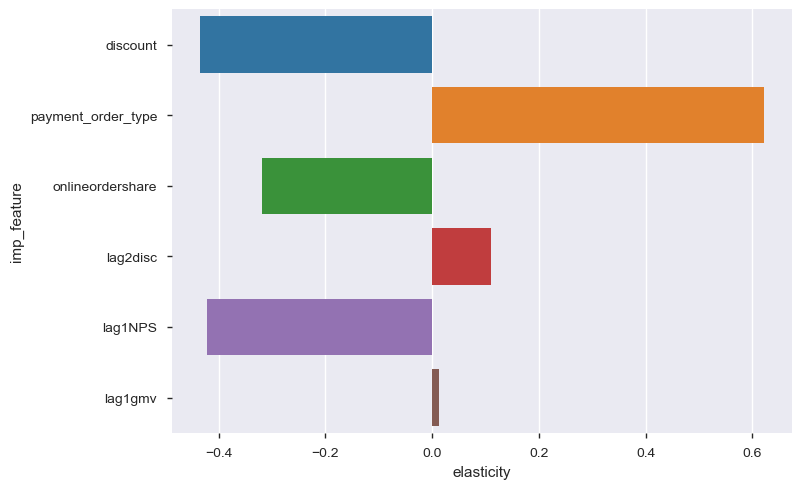

imp_feature   coef  elasticity
0            discount -0.418      -0.435
1  payment_order_type  0.982       0.621
2    onlineordershare -0.366      -0.319
3            lag2disc  0.074       0.110
4             lag1NPS -0.197      -0.421
5             lag1gmv  0.012       0.012

In [727]:
elasticity(dlm1,camera_train_dlm)

Text(0, 0.5, 'y_pred')

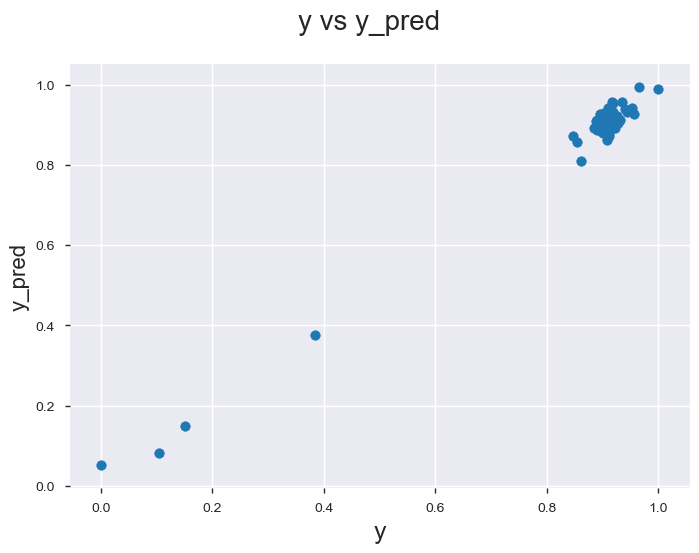

In [728]:
# Plotting y and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y, y_pred)
fig.suptitle('y vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

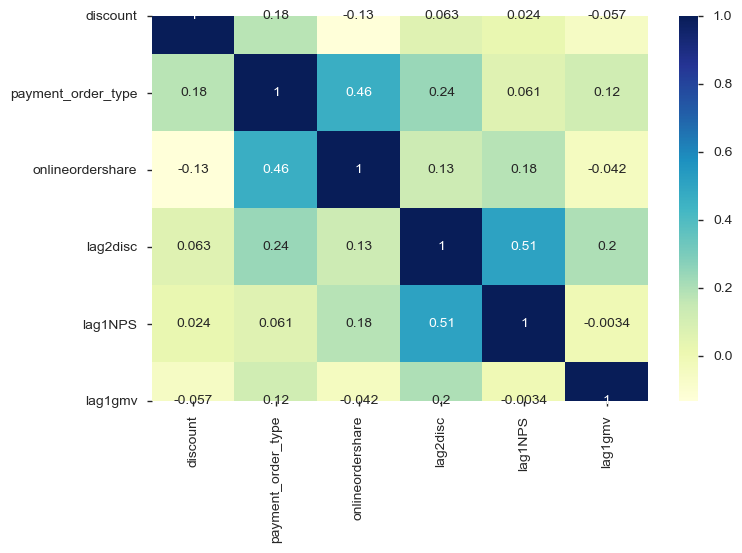

In [729]:
# Figure size
plt.figure(figsize=(8,5))

# Heatmap
sns.heatmap(camera_train_dlm[features].corr(), cmap="YlGnBu", annot=True)
plt.show()

In [730]:
#Distributed Model (Additive)- Gaming

In [731]:
weeklygam.columns

Index(['week', 'gmv', 'product_mrp', 'discount', 'sla',
       'product_procurement_sla', 'fsn_id', 'payment_order_type', 'gmvpo',
       'onlineordershare', 'Date', 'Year', 'Month', 'TV_ads',
       'Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'HeatDegDays',
       'CoolDegDays', 'TotalRainMm', 'TotalSnowCm', 'SnowOnGrndCm', 'lag1disc',
       'lag2disc', 'lag3disc', 'lag1NPS', 'lag2NPS', 'lag3NPS',
       'lag1StockIndex', 'lag2StockIndex', 'lag3StockIndex', 'lag1Ssales',
       'lag2Ssales', 'lag3Ssales', 'lag1Pd', 'lag2Pd', 'lag3Pd'],
      dtype='object')

In [732]:
gaming_dlagm = weeklygam[['gmv', 'discount', 'sla','product_procurement_sla', 'payment_order_type',
       'onlineordershare', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'HeatDegDays',
       'CoolDegDays', 'TotalRainMm', 'TotalSnowCm', 'SnowOnGrndCm','lag1disc',
       'lag2disc', 'lag3disc','lag1NPS', 'lag2NPS', 'lag3NPS','lag1StockIndex', 'lag2StockIndex', 'lag3StockIndex','lag1Ssales',
       'lag2Ssales', 'lag3Ssales',
       'lag1Pd', 'lag2Pd', 'lag3Pd']]           


gaming_dlagm.head()


gmv  discount   sla  product_procurement_sla  payment_order_type  \
0   17466.000     0.220 2.960                    2.400                  25   
1 1435300.000     0.414 5.170                    2.882                 689   
2 1097388.359     0.429 5.115                    2.406                 534   
3 1158166.000     0.352 5.179                    2.191                 425   
4  742062.000     0.363 5.552                    2.158                 246   

   onlineordershare  TV_ads  Sponsorship_ads  Content_marketing_ads  \
0           100.000   0.054            1.854                  0.000   
1            26.208   0.081            2.780                  0.000   
2            22.418   0.081            2.780                  0.000   
3            21.008   0.081            2.780                  0.000   
4            18.880   0.028            1.139                  0.000   

   Online_marketing_ads    NPS  Stock_Index  Special_sales  Payday  \
0                 0.332 54.600     1177.000          0.000   0.200   
1                 0.498 54.600     1177.000          0.000   0.000   
2                 0.498 54.600     1177.000          0.286   0.143   
3                 0.498 54.600     1177.000          0.000   0.000   
4                 0.192 56.139     1185.286          0.000   0.143   

   HeatDegDays  CoolDegDays  TotalRainMm  TotalSnowCm  SnowOnGrndCm  lag1disc  \
0        0.100        1.460        0.000        0.000         0.000     0.414   
1        1.059        2.322        4.155        0.029         0.041     0.429   
2        0.816        4.722        1.569        0.029         0.041     0.352   
3        1.632        4.172        1.141        0.029         0.041     0.363   
4        0.816        5.908        4.341        0.029         0.041     0.535   

   lag2disc  lag3disc  lag1NPS  lag2NPS  lag3NPS  lag1StockIndex  \
0     0.429     0.352   54.600   54.600   54.600        1177.000   
1     0.352     0.363   54.600   54.600   56.139        1177.000   
2     0.363     0.535   54.600   56.139   59.987        1177.000   
3     0.535     0.255   56.139   59.987   59.987        1185.286   
4     0.255     0.490   59.987   59.987   59.987        1206.000   

   lag2StockIndex  lag3StockIndex  lag1Ssales  lag2Ssales  lag3Ssales  lag1Pd  \
0        1177.000        1177.000       0.000       0.286       0.000   0.000   
1        1177.000        1185.286       0.286       0.000       0.000   0.143   
2        1185.286        1206.000       0.000       0.000       0.000   0.000   
3        1206.000        1206.000       0.000       0.000       0.286   0.143   
4        1206.000        1206.000       0.000       0.286       0.143   0.000   

   lag2Pd  lag3Pd  
0   0.143   0.000  
1   0.000   0.143  
2   0.143   0.000  
3   0.000   0.143  
4   0.143   0.000

In [733]:
gaming_dlagm['lag1gmv'] = gaming_dlagm['gmv'].shift(-1)
gaming_dlagm['lag2gmv'] = gaming_dlagm['gmv'].shift(-2)
gaming_dlagm['lag3gmv'] = gaming_dlagm['gmv'].shift(-3)

In [734]:
### Checking NaN

gaming_dlagm.isnull().sum()

gmv                        0
discount                   0
sla                        0
product_procurement_sla    0
payment_order_type         0
onlineordershare           0
TV_ads                     1
Sponsorship_ads            1
Content_marketing_ads      1
Online_marketing_ads       1
NPS                        0
Stock_Index                0
Special_sales              0
Payday                     0
HeatDegDays                0
CoolDegDays                0
TotalRainMm                0
TotalSnowCm                0
SnowOnGrndCm               0
lag1disc                   0
lag2disc                   0
lag3disc                   0
lag1NPS                    0
lag2NPS                    0
lag3NPS                    0
lag1StockIndex             0
lag2StockIndex             0
lag3StockIndex             0
lag1Ssales                 0
lag2Ssales                 0
lag3Ssales                 0
lag1Pd                     1
lag2Pd                     0
lag3Pd                     0
lag1gmv       

In [735]:
gaming_dlagm = gaming_dlagm.fillna(0)

In [736]:
gaming_dlagm.columns

Index(['gmv', 'discount', 'sla', 'product_procurement_sla',
       'payment_order_type', 'onlineordershare', 'TV_ads', 'Sponsorship_ads',
       'Content_marketing_ads', 'Online_marketing_ads', 'NPS', 'Stock_Index',
       'Special_sales', 'Payday', 'HeatDegDays', 'CoolDegDays', 'TotalRainMm',
       'TotalSnowCm', 'SnowOnGrndCm', 'lag1disc', 'lag2disc', 'lag3disc',
       'lag1NPS', 'lag2NPS', 'lag3NPS', 'lag1StockIndex', 'lag2StockIndex',
       'lag3StockIndex', 'lag1Ssales', 'lag2Ssales', 'lag3Ssales', 'lag1Pd',
       'lag2Pd', 'lag3Pd', 'lag1gmv', 'lag2gmv', 'lag3gmv'],
      dtype='object')

In [738]:
###  Import the StandardScaler()
# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

###  Create a scaling object
# scaler = StandardScaler()
scaler = MinMaxScaler()


###  Create a list of the variables that you need to scale
varlist = ['gmv', 'discount', 'sla','product_procurement_sla', 'payment_order_type',
       'onlineordershare', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'HeatDegDays', 'CoolDegDays', 'TotalRainMm',
       'TotalSnowCm', 'SnowOnGrndCm','lag1disc', 'lag2disc', 'lag3disc','lag1NPS', 'lag2NPS', 'lag3NPS','lag1StockIndex', 'lag2StockIndex',
       'lag3StockIndex','lag1Ssales', 'lag2Ssales', 'lag3Ssales',
       'lag1Pd',
       'lag2Pd', 'lag3Pd']


###  Scale these variables using 'fit_transform'
gaming_dlagm[varlist] = scaler.fit_transform(gaming_dlagm[varlist])

In [739]:
###  Split the train dataset into X and y
from sklearn.model_selection import train_test_split
x = gaming_dlagm.drop('gmv',axis=1)
y = gaming_dlagm['gmv']

gaming_train_dlm = gaming_dlagm

In [740]:
print("X = Independent variable & Y = Target variable")
print(x.shape,y.shape)

X = Independent variable & Y = Target variable
(53, 36) (53,)


In [741]:
###  Represent
dlm = LinearRegression()

###  Fit a line
dlm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [742]:
###  Coefficient values

coef = pd.DataFrame(x.columns)
coef['Coefficient'] = pd.Series(dlm.coef_)
coef

0  Coefficient
0                  discount        0.116
1                       sla       -0.259
2   product_procurement_sla        0.135
3        payment_order_type        0.915
4          onlineordershare       -0.525
5                    TV_ads       -0.031
6           Sponsorship_ads       -0.126
7     Content_marketing_ads        0.105
8      Online_marketing_ads        0.211
9                       NPS       -0.471
10              Stock_Index       -0.067
11            Special_sales       -0.038
12                   Payday       -0.006
13              HeatDegDays       -0.131
14              CoolDegDays       -0.093
15              TotalRainMm       -0.125
16              TotalSnowCm       -0.108
17             SnowOnGrndCm        0.140
18                 lag1disc        0.127
19                 lag2disc       -0.073
20                 lag3disc       -0.370
21                  lag1NPS       -0.024
22                  lag2NPS       -0.273
23                  lag3NPS        1.649
24           lag1StockIndex        0.033
25           lag2StockIndex        0.377
26           lag3StockIndex       -1.250
27               lag1Ssales       -0.147
28               lag2Ssales       -0.012
29               lag3Ssales       -0.186
30                   lag1Pd       -0.051
31                   lag2Pd        0.002
32                   lag3Pd       -0.044
33                  lag1gmv       -0.000
34                  lag2gmv       -0.000
35                  lag3gmv        0.000

In [743]:
col = x.columns
col

Index(['discount', 'sla', 'product_procurement_sla', 'payment_order_type',
       'onlineordershare', 'TV_ads', 'Sponsorship_ads',
       'Content_marketing_ads', 'Online_marketing_ads', 'NPS', 'Stock_Index',
       'Special_sales', 'Payday', 'HeatDegDays', 'CoolDegDays', 'TotalRainMm',
       'TotalSnowCm', 'SnowOnGrndCm', 'lag1disc', 'lag2disc', 'lag3disc',
       'lag1NPS', 'lag2NPS', 'lag3NPS', 'lag1StockIndex', 'lag2StockIndex',
       'lag3StockIndex', 'lag1Ssales', 'lag2Ssales', 'lag3Ssales', 'lag1Pd',
       'lag2Pd', 'lag3Pd', 'lag1gmv', 'lag2gmv', 'lag3gmv'],
      dtype='object')

In [744]:
#### Model Building - Stepwise selection for feature selection

In [745]:
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [746]:
def stepwise_selection(x, y,
                       initial_list=['discount', 'sla','product_procurement_sla', 'payment_order_type',
       'onlineordershare', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'HeatDegDays', 'CoolDegDays', 'TotalRainMm',
       'TotalSnowCm', 'SnowOnGrndCm','lag1disc', 'lag2disc', 'lag3disc','lag1NPS', 'lag2NPS', 'lag3NPS','lag1StockIndex', 'lag2StockIndex',
       'lag3StockIndex','lag1Ssales', 'lag2Ssales', 'lag3Ssales',
       'lag1Pd',
       'lag2Pd', 'lag3Pd'],
                     threshold_in=0.01,threshold_out = 0.05, verbose=True):
    
    included = list(initial_list)
    while True:
        changed=False
        ###  forward step
        excluded = list(set(x.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
                
                
        ###  backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included]))).fit()
        ###  use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() ###  null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [747]:
import statsmodels.api as sm  

final_features = stepwise_selection(x, y)

print("\n","final_selected_features:",final_features)

Drop Payday                         with p-value 0.998671
Drop lag2Ssales                     with p-value 0.978175
Drop HeatDegDays                    with p-value 0.92602
Drop lag2NPS                        with p-value 0.932876
Drop lag1StockIndex                 with p-value 0.936067
Drop lag2Pd                         with p-value 0.906314
Drop Content_marketing_ads          with p-value 0.811521
Drop lag1disc                       with p-value 0.774496
Drop Special_sales                  with p-value 0.8026
Drop SnowOnGrndCm                   with p-value 0.534398
Drop CoolDegDays                    with p-value 0.509845
Drop lag1NPS                        with p-value 0.522551
Drop discount                       with p-value 0.480802
Drop Stock_Index                    with p-value 0.35787
Drop TV_ads                         with p-value 0.577706
Drop lag2disc                       with p-value 0.305619
Drop lag2StockIndex                 with p-value 0.254104
Drop lag3Pd       

In [748]:
###  Import statsmodels
import statsmodels.api as sm  

###  Subsetting training data for 15 selected columns
x_rfe1 = x[final_features]

x_rfe1 = sm.add_constant(x_rfe1)

###  Fitting the model with selected variables
dlm1 = sm.OLS(y, x_rfe1).fit() 

print(dlm1.params)

const                 0.614
sla                  -0.235
payment_order_type    0.904
onlineordershare     -0.473
NPS                  -0.497
lag3NPS               0.825
lag3StockIndex       -0.738
dtype: float64


In [749]:
print(dlm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     36.97
Date:                Sat, 29 Feb 2020   Prob (F-statistic):           5.29e-16
Time:                        22:41:21   Log-Likelihood:                 63.556
No. Observations:                  53   AIC:                            -113.1
Df Residuals:                      46   BIC:                            -99.32
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.6142      0

In [750]:
###  Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0               const 62.200
6      lag3StockIndex 11.750
5             lag3NPS 11.550
2  payment_order_type  2.630
3    onlineordershare  2.350
1                 sla  2.060
4                 NPS  1.960

In [751]:
x_rfe1.drop('lag3StockIndex', axis = 1, inplace = True)

In [752]:
### Model 2

In [753]:
# Refitting with final selected variables
x_rfe1 = sm.add_constant(x_rfe1)

# Fitting the model with final selected variables
dlm1 = sm.OLS(y, x_rfe1).fit()   
print(dlm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     28.66
Date:                Sat, 29 Feb 2020   Prob (F-statistic):           3.29e-13
Time:                        22:43:23   Log-Likelihood:                 53.931
No. Observations:                  53   AIC:                            -95.86
Df Residuals:                      47   BIC:                            -84.04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.5082      0

In [754]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0               const 57.380
2  payment_order_type  2.540
3    onlineordershare  2.340
1                 sla  2.010
4                 NPS  1.510
5             lag3NPS  1.030

In [755]:
x_rfe1.drop('lag3NPS', axis = 1, inplace = True)

In [756]:
### Model 3

In [757]:
# Refitting with final selected variables
x_rfe1 = sm.add_constant(x_rfe1)

# Fitting the model with final selected variables
dlm1 = sm.OLS(y, x_rfe1).fit()   
print(dlm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     36.10
Date:                Sat, 29 Feb 2020   Prob (F-statistic):           6.43e-14
Time:                        22:44:47   Log-Likelihood:                 53.661
No. Observations:                  53   AIC:                            -97.32
Df Residuals:                      48   BIC:                            -87.47
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.5433      0

In [758]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0               const 41.670
2  payment_order_type  2.520
3    onlineordershare  2.340
1                 sla  2.000
4                 NPS  1.490

In [759]:
x_rfe1.drop('sla', axis = 1, inplace = True)

In [760]:
### Model 4

In [761]:
# Refitting with final selected variables
x_rfe1 = sm.add_constant(x_rfe1)

# Fitting the model with final selected variables
dlm1 = sm.OLS(y, x_rfe1).fit()   
print(dlm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     44.67
Date:                Sat, 29 Feb 2020   Prob (F-statistic):           4.65e-14
Time:                        22:46:50   Log-Likelihood:                 51.791
No. Observations:                  53   AIC:                            -95.58
Df Residuals:                      49   BIC:                            -87.70
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3980      0

In [762]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0               const 4.310
1  payment_order_type 1.890
2    onlineordershare 1.880
3                 NPS 1.070

In [763]:
features = list(x_rfe1.columns)
features.remove('const')
features

['payment_order_type', 'onlineordershare', 'NPS']

In [764]:
###  Model Evaluation on testing data
x_2 = x[features]

###  Predicition with selected features on the test data
y_pred = dlm1.predict(sm.add_constant(x_2))

In [765]:
###  Mean square error (MSE)
mse = np.mean((y_pred - y)**2)
mse

0.00829373088861169

In [766]:
###  Coefficient values

coef = pd.DataFrame(x_rfe1.columns)
coef['Coefficient'] = pd.Series(dlm.coef_)
coef

0  Coefficient
0               const        0.116
1  payment_order_type       -0.259
2    onlineordershare        0.135
3                 NPS        0.915

In [767]:
###  Using K-Fold Cross validation evaluating on whole dataset

# lm = LinearRegression()
fold = KFold(10,shuffle = True, random_state = 100)

cv_scores = -cross_val_score(dlm,x[features],y,cv=fold,scoring='neg_mean_squared_error')

print("Neg. of MSE:",cv_scores,"\n")
print("Mean of 5 KFold CV - MSE:",cv_scores.mean())

Neg. of MSE: [0.00549589 0.00642702 0.04440586 0.00358312 0.00856601 0.01019628
 0.0126928  0.00959644 0.02303428 0.00523823] 

Mean of 5 KFold CV - MSE: 0.012923594253300525


In [768]:
def elasticity(model,x):
    
    features_df = pd.DataFrame(model.params)
    features_df = features_df.rename(columns={0:'coef'})
    
    features_df['imp_feature'] = model.params.index
    features_df = features_df[features_df.imp_feature != 'const'][['imp_feature','coef']]
    features_df.index = range(len(features_df))
#      features

    elasticity_list = list()
    
    for i in range(len(features_df)):
        elasticity_list.append(((features_df.coef[i] * np.mean(x[features_df.imp_feature[i]])) / np.mean(x['gmv'])))

    features_df['elasticity'] = np.round(elasticity_list,3)
    
    sns.barplot(x='elasticity',y='imp_feature',data=features_df)
    plt.show()
    
    return features_df
    

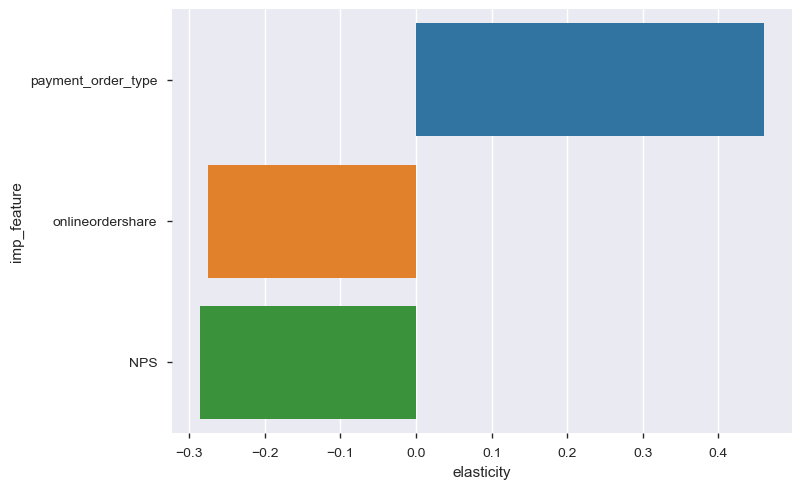

imp_feature   coef  elasticity
0  payment_order_type  0.741       0.460
1    onlineordershare -0.417      -0.275
2                 NPS -0.310      -0.286

In [769]:
elasticity(dlm1,gaming_train_dlm)

Text(0, 0.5, 'y_pred')

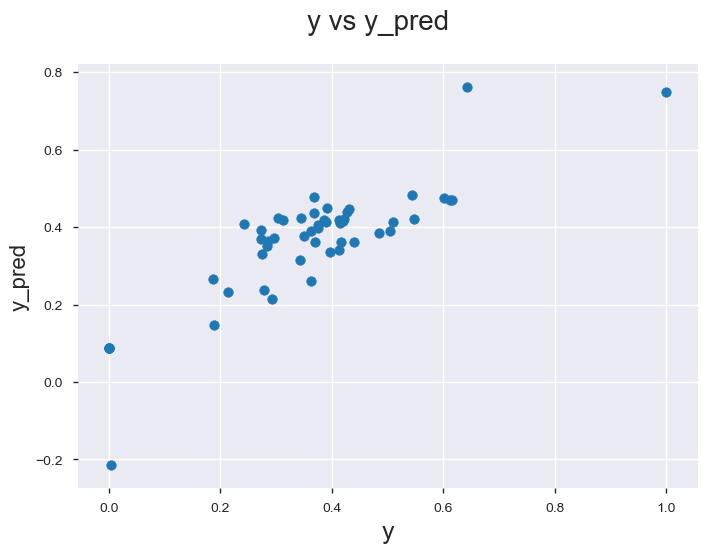

In [770]:
# Plotting y and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y, y_pred)
fig.suptitle('y vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 

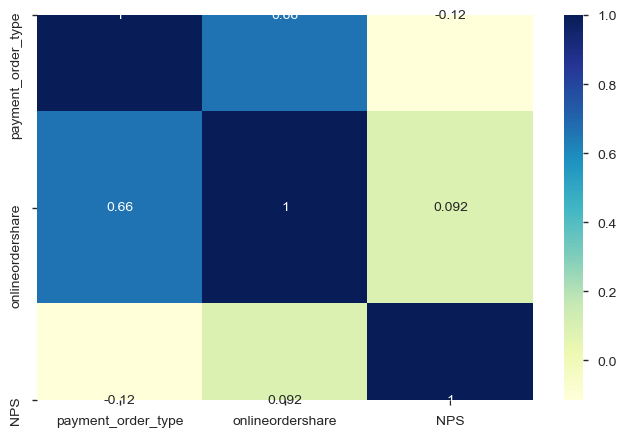

In [771]:
# Figure size
plt.figure(figsize=(8,5))

# Heatmap
sns.heatmap(gaming_train_dlm[features].corr(), cmap="YlGnBu", annot=True)
plt.show()

In [772]:
### Distributed(Multiplicative) Lag Model

In [773]:
weeklygam.columns

Index(['week', 'gmv', 'product_mrp', 'discount', 'sla',
       'product_procurement_sla', 'fsn_id', 'payment_order_type', 'gmvpo',
       'onlineordershare', 'Date', 'Year', 'Month', 'TV_ads',
       'Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'HeatDegDays',
       'CoolDegDays', 'TotalRainMm', 'TotalSnowCm', 'SnowOnGrndCm', 'lag1disc',
       'lag2disc', 'lag3disc', 'lag1NPS', 'lag2NPS', 'lag3NPS',
       'lag1StockIndex', 'lag2StockIndex', 'lag3StockIndex', 'lag1Ssales',
       'lag2Ssales', 'lag3Ssales', 'lag1Pd', 'lag2Pd', 'lag3Pd'],
      dtype='object')

In [775]:
gamingdlmm = weeklygam[['gmv', 'discount', 'sla','product_procurement_sla', 'payment_order_type',
       'onlineordershare', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'HeatDegDays',
       'CoolDegDays', 'TotalRainMm', 'TotalSnowCm', 'SnowOnGrndCm','lag1disc',
       'lag2disc', 'lag3disc','lag1NPS', 'lag2NPS', 'lag3NPS','lag1StockIndex', 'lag2StockIndex', 'lag3StockIndex','lag1Ssales',
       'lag2Ssales', 'lag3Ssales',
       'lag1Pd', 'lag2Pd', 'lag3Pd']]           


gamingdlmm.head()


gmv  discount   sla  product_procurement_sla  payment_order_type  \
0   17466.000     0.220 2.960                    2.400                  25   
1 1435300.000     0.414 5.170                    2.882                 689   
2 1097388.359     0.429 5.115                    2.406                 534   
3 1158166.000     0.352 5.179                    2.191                 425   
4  742062.000     0.363 5.552                    2.158                 246   

   onlineordershare  TV_ads  Sponsorship_ads  Content_marketing_ads  \
0           100.000   0.054            1.854                  0.000   
1            26.208   0.081            2.780                  0.000   
2            22.418   0.081            2.780                  0.000   
3            21.008   0.081            2.780                  0.000   
4            18.880   0.028            1.139                  0.000   

   Online_marketing_ads    NPS  Stock_Index  Special_sales  Payday  \
0                 0.332 54.600     1177.000          0.000   0.200   
1                 0.498 54.600     1177.000          0.000   0.000   
2                 0.498 54.600     1177.000          0.286   0.143   
3                 0.498 54.600     1177.000          0.000   0.000   
4                 0.192 56.139     1185.286          0.000   0.143   

   HeatDegDays  CoolDegDays  TotalRainMm  TotalSnowCm  SnowOnGrndCm  lag1disc  \
0        0.100        1.460        0.000        0.000         0.000     0.414   
1        1.059        2.322        4.155        0.029         0.041     0.429   
2        0.816        4.722        1.569        0.029         0.041     0.352   
3        1.632        4.172        1.141        0.029         0.041     0.363   
4        0.816        5.908        4.341        0.029         0.041     0.535   

   lag2disc  lag3disc  lag1NPS  lag2NPS  lag3NPS  lag1StockIndex  \
0     0.429     0.352   54.600   54.600   54.600        1177.000   
1     0.352     0.363   54.600   54.600   56.139        1177.000   
2     0.363     0.535   54.600   56.139   59.987        1177.000   
3     0.535     0.255   56.139   59.987   59.987        1185.286   
4     0.255     0.490   59.987   59.987   59.987        1206.000   

   lag2StockIndex  lag3StockIndex  lag1Ssales  lag2Ssales  lag3Ssales  lag1Pd  \
0        1177.000        1177.000       0.000       0.286       0.000   0.000   
1        1177.000        1185.286       0.286       0.000       0.000   0.143   
2        1185.286        1206.000       0.000       0.000       0.000   0.000   
3        1206.000        1206.000       0.000       0.000       0.286   0.143   
4        1206.000        1206.000       0.000       0.286       0.143   0.000   

   lag2Pd  lag3Pd  
0   0.143   0.000  
1   0.000   0.143  
2   0.143   0.000  
3   0.000   0.143  
4   0.143   0.000

In [776]:
gamingdlmm['lag1gmv'] = gamingdlmm['gmv'].shift(-1)
gamingdlmm['lag2gmv'] = gamingdlmm['gmv'].shift(-2)
gamingdlmm['lag3gmv'] = gamingdlmm['gmv'].shift(-3)

In [777]:
### Checking NaN

gamingdlmm.isnull().sum()

gmv                        0
discount                   0
sla                        0
product_procurement_sla    0
payment_order_type         0
onlineordershare           0
TV_ads                     1
Sponsorship_ads            1
Content_marketing_ads      1
Online_marketing_ads       1
NPS                        0
Stock_Index                0
Special_sales              0
Payday                     0
HeatDegDays                0
CoolDegDays                0
TotalRainMm                0
TotalSnowCm                0
SnowOnGrndCm               0
lag1disc                   0
lag2disc                   0
lag3disc                   0
lag1NPS                    0
lag2NPS                    0
lag3NPS                    0
lag1StockIndex             0
lag2StockIndex             0
lag3StockIndex             0
lag1Ssales                 0
lag2Ssales                 0
lag3Ssales                 0
lag1Pd                     1
lag2Pd                     0
lag3Pd                     0
lag1gmv       

In [778]:
gamingdlmm = gamingdlmm.fillna(0)

In [779]:
### Applying Log 
gamingdlmm=np.log(gamingdlmm)

gamingdlmm = gamingdlmm.fillna(0)
gamingdlmm = gamingdlmm.replace([np.inf, -np.inf], 0)

In [780]:
gamingdlmm.columns

Index(['gmv', 'discount', 'sla', 'product_procurement_sla',
       'payment_order_type', 'onlineordershare', 'TV_ads', 'Sponsorship_ads',
       'Content_marketing_ads', 'Online_marketing_ads', 'NPS', 'Stock_Index',
       'Special_sales', 'Payday', 'HeatDegDays', 'CoolDegDays', 'TotalRainMm',
       'TotalSnowCm', 'SnowOnGrndCm', 'lag1disc', 'lag2disc', 'lag3disc',
       'lag1NPS', 'lag2NPS', 'lag3NPS', 'lag1StockIndex', 'lag2StockIndex',
       'lag3StockIndex', 'lag1Ssales', 'lag2Ssales', 'lag3Ssales', 'lag1Pd',
       'lag2Pd', 'lag3Pd', 'lag1gmv', 'lag2gmv', 'lag3gmv'],
      dtype='object')

In [782]:
###  Import the StandardScaler()
# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

###  Create a scaling object
# scaler = StandardScaler()
scaler = MinMaxScaler()


###  Create a list of the variables that you need to scale
varlist = ['gmv', 'discount', 'sla','product_procurement_sla', 'payment_order_type',
       'onlineordershare', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'HeatDegDays', 'CoolDegDays', 'TotalRainMm',
       'TotalSnowCm', 'SnowOnGrndCm','lag1disc', 'lag2disc', 'lag3disc','lag1NPS', 'lag2NPS', 'lag3NPS','lag1StockIndex', 'lag2StockIndex',
       'lag3StockIndex','lag1Ssales', 'lag2Ssales', 'lag3Ssales',
       'lag1Pd',
       'lag2Pd', 'lag3Pd']


###  Scale these variables using 'fit_transform'
gamingdlmm[varlist] = scaler.fit_transform(gamingdlmm[varlist])

In [783]:
###  Split the train dataset into X and y
from sklearn.model_selection import train_test_split
x = gamingdlmm.drop('gmv',axis=1)
y = gamingdlmm['gmv']

gaming_train_dlmm = gamingdlmm

In [784]:
print("X = Independent variable & Y = Target variable")
print(x.shape,y.shape)

X = Independent variable & Y = Target variable
(53, 36) (53,)


In [785]:
###  Represent
dlm = LinearRegression()

###  Fit a line
dlm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [786]:
###  Coefficient values

coef = pd.DataFrame(x.columns)
coef['Coefficient'] = pd.Series(dlm.coef_)
coef

0  Coefficient
0                  discount       -0.252
1                       sla        0.040
2   product_procurement_sla       -0.049
3        payment_order_type        1.100
4          onlineordershare       -0.378
5                    TV_ads       -0.125
6           Sponsorship_ads        0.056
7     Content_marketing_ads       -0.098
8      Online_marketing_ads        0.190
9                       NPS       -0.066
10              Stock_Index        0.004
11            Special_sales       -0.031
12                   Payday        0.006
13              HeatDegDays        0.124
14              CoolDegDays        0.056
15              TotalRainMm        0.004
16              TotalSnowCm       -0.059
17             SnowOnGrndCm        0.031
18                 lag1disc        0.157
19                 lag2disc       -0.271
20                 lag3disc       -0.178
21                  lag1NPS       -0.874
22                  lag2NPS       -0.196
23                  lag3NPS        1.850
24           lag1StockIndex        0.575
25           lag2StockIndex       -0.033
26           lag3StockIndex       -1.888
27               lag1Ssales        0.013
28               lag2Ssales       -0.069
29               lag3Ssales       -0.015
30                   lag1Pd        0.018
31                   lag2Pd        0.009
32                   lag3Pd        0.033
33                  lag1gmv        0.018
34                  lag2gmv        0.003
35                  lag3gmv       -0.000

In [787]:
col = x.columns
col

Index(['discount', 'sla', 'product_procurement_sla', 'payment_order_type',
       'onlineordershare', 'TV_ads', 'Sponsorship_ads',
       'Content_marketing_ads', 'Online_marketing_ads', 'NPS', 'Stock_Index',
       'Special_sales', 'Payday', 'HeatDegDays', 'CoolDegDays', 'TotalRainMm',
       'TotalSnowCm', 'SnowOnGrndCm', 'lag1disc', 'lag2disc', 'lag3disc',
       'lag1NPS', 'lag2NPS', 'lag3NPS', 'lag1StockIndex', 'lag2StockIndex',
       'lag3StockIndex', 'lag1Ssales', 'lag2Ssales', 'lag3Ssales', 'lag1Pd',
       'lag2Pd', 'lag3Pd', 'lag1gmv', 'lag2gmv', 'lag3gmv'],
      dtype='object')

In [788]:
#### Model Building - Stepwise selection for feature selection

In [789]:
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [790]:
def stepwise_selection(x, y,
                       initial_list=['discount', 'sla','product_procurement_sla', 'payment_order_type',
       'onlineordershare', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'HeatDegDays', 'CoolDegDays', 'TotalRainMm',
       'TotalSnowCm', 'SnowOnGrndCm','lag1disc', 'lag2disc', 'lag3disc','lag1NPS', 'lag2NPS', 'lag3NPS','lag1StockIndex', 'lag2StockIndex',
       'lag3StockIndex','lag1Ssales', 'lag2Ssales', 'lag3Ssales',
       'lag1Pd',
       'lag2Pd', 'lag3Pd'],
                     threshold_in=0.01,threshold_out = 0.05, verbose=True):
    
    included = list(initial_list)
    while True:
        changed=False
        ###  forward step
        excluded = list(set(x.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
                
                
        ###  backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included]))).fit()
        ###  use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() ###  null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [791]:
import statsmodels.api as sm  

final_features = stepwise_selection(x, y)

print("\n","final_selected_features:",final_features)

Add  lag1gmv                        with p-value 0.00657873
Drop lag2StockIndex                 with p-value 0.938545
Drop Stock_Index                    with p-value 0.868255
Drop TotalRainMm                    with p-value 0.829926
Drop lag3Ssales                     with p-value 0.795525
Drop lag2Pd                         with p-value 0.662173
Drop product_procurement_sla        with p-value 0.512896
Drop lag1Ssales                     with p-value 0.480262
Drop Payday                         with p-value 0.357439
Drop Content_marketing_ads          with p-value 0.295103
Drop SnowOnGrndCm                   with p-value 0.454035
Drop Sponsorship_ads                with p-value 0.52175
Drop Special_sales                  with p-value 0.407006
Drop HeatDegDays                    with p-value 0.316153
Drop TV_ads                         with p-value 0.380077
Drop NPS                            with p-value 0.467662

 final_selected_features: ['discount', 'sla', 'payment_order_type', 'o

In [792]:
###  Import statsmodels
import statsmodels.api as sm  

###  Subsetting training data for 15 selected columns
x_rfe1 = x[final_features]

x_rfe1 = sm.add_constant(x_rfe1)

###  Fitting the model with selected variables
dlm1 = sm.OLS(y, x_rfe1).fit() 

print(dlm1.params)

const                   0.527
discount               -0.207
sla                     0.062
payment_order_type      1.093
onlineordershare       -0.425
Online_marketing_ads    0.125
CoolDegDays             0.037
TotalSnowCm            -0.025
lag1disc                0.127
lag2disc               -0.193
lag3disc               -0.128
lag1NPS                -1.194
lag2NPS                -0.128
lag3NPS                 1.766
lag1StockIndex          0.990
lag3StockIndex         -1.774
lag2Ssales             -0.035
lag1Pd                  0.023
lag3Pd                  0.022
lag1gmv                 0.014
dtype: float64


In [793]:
print(dlm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     412.6
Date:                Sat, 29 Feb 2020   Prob (F-statistic):           8.65e-34
Time:                        23:31:55   Log-Likelihood:                 149.36
No. Observations:                  53   AIC:                            -258.7
Df Residuals:                      33   BIC:                            -219.3
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5268 

In [794]:
###  Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0                  const 911.740
15        lag3StockIndex 764.150
13               lag3NPS 730.700
14        lag1StockIndex 298.160
11               lag1NPS 264.880
3     payment_order_type  36.250
5   Online_marketing_ads  17.550
4       onlineordershare  15.590
19               lag1gmv   8.550
10              lag3disc   7.580
12               lag2NPS   7.240
9               lag2disc   4.570
2                    sla   3.060
1               discount   2.970
8               lag1disc   2.840
17                lag1Pd   2.650
6            CoolDegDays   2.640
18                lag3Pd   2.480
16            lag2Ssales   1.820
7            TotalSnowCm   1.690

In [795]:
x_rfe1.drop('lag3StockIndex', axis = 1, inplace = True)

In [796]:
### Model 2

In [797]:
# Refitting with final selected variables
x_rfe1 = sm.add_constant(x_rfe1)

# Fitting the model with final selected variables
dlm1 = sm.OLS(y, x_rfe1).fit()   
print(dlm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     219.6
Date:                Sat, 29 Feb 2020   Prob (F-statistic):           6.77e-30
Time:                        23:34:53   Log-Likelihood:                 130.54
No. Observations:                  53   AIC:                            -223.1
Df Residuals:                      34   BIC:                            -185.6
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.4562 

In [798]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0                  const 888.670
14        lag1StockIndex 168.960
11               lag1NPS 151.410
3     payment_order_type  26.030
4       onlineordershare  13.480
5   Online_marketing_ads  11.800
13               lag3NPS   7.460
18               lag1gmv   7.160
12               lag2NPS   7.110
10              lag3disc   7.080
9               lag2disc   4.280
2                    sla   3.010
1               discount   2.890
8               lag1disc   2.810
16                lag1Pd   2.640
6            CoolDegDays   2.630
17                lag3Pd   2.470
15            lag2Ssales   1.680
7            TotalSnowCm   1.510

In [799]:
x_rfe1.drop('lag1StockIndex', axis = 1, inplace = True)

In [800]:
### Model 3

In [801]:
# Refitting with final selected variables
x_rfe1 = sm.add_constant(x_rfe1)

# Fitting the model with final selected variables
dlm1 = sm.OLS(y, x_rfe1).fit()   
print(dlm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     235.6
Date:                Sat, 29 Feb 2020   Prob (F-statistic):           5.60e-31
Time:                        23:37:26   Log-Likelihood:                 130.13
No. Observations:                  53   AIC:                            -224.3
Df Residuals:                      35   BIC:                            -188.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.4437 

In [802]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0                  const 864.920
3     payment_order_type  25.860
4       onlineordershare  13.230
5   Online_marketing_ads   9.870
13               lag3NPS   7.400
12               lag2NPS   7.030
10              lag3disc   6.990
17               lag1gmv   6.360
11               lag1NPS   4.610
9               lag2disc   4.190
2                    sla   3.010
1               discount   2.770
8               lag1disc   2.710
15                lag1Pd   2.640
6            CoolDegDays   2.520
16                lag3Pd   2.460
14            lag2Ssales   1.680
7            TotalSnowCm   1.440

In [803]:
x_rfe1.drop('payment_order_type', axis = 1, inplace = True)

In [804]:
### Model 4

In [805]:
# Refitting with final selected variables
x_rfe1 = sm.add_constant(x_rfe1)

# Fitting the model with final selected variables
dlm1 = sm.OLS(y, x_rfe1).fit()   
print(dlm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     27.19
Date:                Sat, 29 Feb 2020   Prob (F-statistic):           2.25e-15
Time:                        23:40:03   Log-Likelihood:                 72.426
No. Observations:                  53   AIC:                            -110.9
Df Residuals:                      36   BIC:                            -77.36
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1913 

In [806]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0                  const 745.490
12               lag3NPS   7.390
11               lag2NPS   7.000
9               lag3disc   6.950
16               lag1gmv   6.140
4   Online_marketing_ads   5.630
10               lag1NPS   4.420
8               lag2disc   4.180
14                lag1Pd   2.640
7               lag1disc   2.560
15                lag3Pd   2.450
3       onlineordershare   2.310
5            CoolDegDays   2.050
2                    sla   2.050
1               discount   1.860
13            lag2Ssales   1.640
6            TotalSnowCm   1.330

In [807]:
x_rfe1.drop('lag3NPS', axis = 1, inplace = True)

In [808]:
### Model 5

In [809]:
# Refitting with final selected variables
x_rfe1 = sm.add_constant(x_rfe1)

# Fitting the model with final selected variables
dlm1 = sm.OLS(y, x_rfe1).fit()   
print(dlm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     29.64
Date:                Sat, 29 Feb 2020   Prob (F-statistic):           4.41e-16
Time:                        23:43:06   Log-Likelihood:                 72.290
No. Observations:                  53   AIC:                            -112.6
Df Residuals:                      37   BIC:                            -81.06
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.2397 

In [810]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0                  const 626.260
11               lag2NPS   6.720
15               lag1gmv   6.000
4   Online_marketing_ads   5.590
10               lag1NPS   4.320
8               lag2disc   4.090
9               lag3disc   3.180
13                lag1Pd   2.620
7               lag1disc   2.530
14                lag3Pd   2.440
3       onlineordershare   2.280
2                    sla   2.050
5            CoolDegDays   1.990
1               discount   1.660
12            lag2Ssales   1.550
6            TotalSnowCm   1.330

In [811]:
x_rfe1.drop('lag2NPS', axis = 1, inplace = True)

In [812]:
### Model 6

In [813]:
# Refitting with final selected variables
x_rfe1 = sm.add_constant(x_rfe1)

# Fitting the model with final selected variables
dlm1 = sm.OLS(y, x_rfe1).fit()   
print(dlm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     32.49
Date:                Sat, 29 Feb 2020   Prob (F-statistic):           8.00e-17
Time:                        23:45:21   Log-Likelihood:                 72.201
No. Observations:                  53   AIC:                            -114.4
Df Residuals:                      38   BIC:                            -84.85
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.2961 

In [814]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0                  const 379.490
14               lag1gmv   5.990
4   Online_marketing_ads   5.570
10               lag1NPS   4.090
9               lag3disc   2.780
12                lag1Pd   2.550
7               lag1disc   2.530
13                lag3Pd   2.400
3       onlineordershare   2.270
2                    sla   2.040
8               lag2disc   1.980
5            CoolDegDays   1.900
1               discount   1.600
11            lag2Ssales   1.400
6            TotalSnowCm   1.320

In [815]:
x_rfe1.drop('lag1gmv', axis = 1, inplace = True)

In [816]:
### Model 7

In [817]:
# Refitting with final selected variables
x_rfe1 = sm.add_constant(x_rfe1)

# Fitting the model with final selected variables
dlm1 = sm.OLS(y, x_rfe1).fit()   
print(dlm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     34.78
Date:                Sat, 29 Feb 2020   Prob (F-statistic):           2.28e-17
Time:                        23:46:40   Log-Likelihood:                 71.417
No. Observations:                  53   AIC:                            -114.8
Df Residuals:                      39   BIC:                            -87.25
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.3027 

In [818]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0                  const 379.110
4   Online_marketing_ads   4.070
10               lag1NPS   2.820
9               lag3disc   2.730
12                lag1Pd   2.520
13                lag3Pd   2.390
7               lag1disc   2.240
3       onlineordershare   2.230
2                    sla   2.030
8               lag2disc   1.950
5            CoolDegDays   1.890
1               discount   1.600
6            TotalSnowCm   1.240
11            lag2Ssales   1.190

In [819]:
x_rfe1.drop('lag1NPS', axis = 1, inplace = True)

In [820]:
### model 8

In [821]:
# Refitting with final selected variables
x_rfe1 = sm.add_constant(x_rfe1)

# Fitting the model with final selected variables
dlm1 = sm.OLS(y, x_rfe1).fit()   
print(dlm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     38.60
Date:                Sat, 29 Feb 2020   Prob (F-statistic):           3.63e-18
Time:                        23:50:10   Log-Likelihood:                 71.391
No. Observations:                  53   AIC:                            -116.8
Df Residuals:                      40   BIC:                            -91.17
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.2696 

In [822]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                  const 91.860
4   Online_marketing_ads  4.000
9               lag3disc  2.710
11                lag1Pd  2.520
12                lag3Pd  2.390
3       onlineordershare  2.220
2                    sla  2.030
5            CoolDegDays  1.890
8               lag2disc  1.600
1               discount  1.590
7               lag1disc  1.340
6            TotalSnowCm  1.220
10            lag2Ssales  1.190

In [823]:
x_rfe1.drop('lag2Ssales', axis = 1, inplace = True)

In [824]:
### Model 9

In [825]:
# Refitting with final selected variables
x_rfe1 = sm.add_constant(x_rfe1)

# Fitting the model with final selected variables
dlm1 = sm.OLS(y, x_rfe1).fit()   
print(dlm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     42.89
Date:                Sat, 29 Feb 2020   Prob (F-statistic):           6.03e-19
Time:                        23:52:30   Log-Likelihood:                 71.235
No. Observations:                  53   AIC:                            -118.5
Df Residuals:                      41   BIC:                            -94.83
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.2613 

In [826]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                  const 88.940
4   Online_marketing_ads  3.970
9               lag3disc  2.710
10                lag1Pd  2.480
11                lag3Pd  2.370
3       onlineordershare  2.180
2                    sla  2.030
5            CoolDegDays  1.880
8               lag2disc  1.590
1               discount  1.570
7               lag1disc  1.300
6            TotalSnowCm  1.200

In [827]:
x_rfe1.drop('lag3Pd', axis = 1, inplace = True)

In [828]:
### Model 10

In [829]:
# Refitting with final selected variables
x_rfe1 = sm.add_constant(x_rfe1)

# Fitting the model with final selected variables
dlm1 = sm.OLS(y, x_rfe1).fit()   
print(dlm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     48.04
Date:                Sat, 29 Feb 2020   Prob (F-statistic):           9.40e-20
Time:                        23:54:12   Log-Likelihood:                 71.088
No. Observations:                  53   AIC:                            -120.2
Df Residuals:                      42   BIC:                            -98.50
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.2469 

In [830]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                  const 79.440
4   Online_marketing_ads  3.970
3       onlineordershare  2.170
2                    sla  1.930
9               lag3disc  1.910
5            CoolDegDays  1.880
1               discount  1.560
8               lag2disc  1.520
7               lag1disc  1.300
10                lag1Pd  1.200
6            TotalSnowCm  1.190

In [832]:
x_rfe1.drop('lag1Pd', axis = 1, inplace = True)

In [833]:
### Model 11

In [834]:
# Refitting with final selected variables
x_rfe1 = sm.add_constant(x_rfe1)

# Fitting the model with final selected variables
dlm1 = sm.OLS(y, x_rfe1).fit()   
print(dlm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     54.03
Date:                Sat, 29 Feb 2020   Prob (F-statistic):           1.54e-20
Time:                        23:58:01   Log-Likelihood:                 70.808
No. Observations:                  53   AIC:                            -121.6
Df Residuals:                      43   BIC:                            -101.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.2315 

In [835]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                 const 73.900
4  Online_marketing_ads  3.960
3      onlineordershare  2.170
2                   sla  1.930
5           CoolDegDays  1.820
9              lag3disc  1.720
8              lag2disc  1.500
1              discount  1.480
7              lag1disc  1.290
6           TotalSnowCm  1.190

In [836]:
x_rfe1.drop('lag3disc', axis = 1, inplace = True)

In [837]:
### Model 12

In [838]:
# Refitting with final selected variables
x_rfe1 = sm.add_constant(x_rfe1)

# Fitting the model with final selected variables
dlm1 = sm.OLS(y, x_rfe1).fit()   
print(dlm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     61.54
Date:                Sat, 29 Feb 2020   Prob (F-statistic):           2.31e-21
Time:                        23:59:02   Log-Likelihood:                 70.550
No. Observations:                  53   AIC:                            -123.1
Df Residuals:                      44   BIC:                            -105.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.2187 

In [839]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                 const 69.740
4  Online_marketing_ads  3.940
3      onlineordershare  2.120
2                   sla  1.870
5           CoolDegDays  1.730
1              discount  1.420
8              lag2disc  1.210
6           TotalSnowCm  1.190
7              lag1disc  1.190

In [840]:
x_rfe1.drop('discount', axis = 1, inplace = True)

In [841]:
### Model 13

In [842]:
# Refitting with final selected variables
x_rfe1 = sm.add_constant(x_rfe1)

# Fitting the model with final selected variables
dlm1 = sm.OLS(y, x_rfe1).fit()   
print(dlm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     70.07
Date:                Sun, 01 Mar 2020   Prob (F-statistic):           4.46e-22
Time:                        00:01:23   Log-Likelihood:                 69.914
No. Observations:                  53   AIC:                            -123.8
Df Residuals:                      45   BIC:                            -108.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1755 

In [843]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                 const 50.990
3  Online_marketing_ads  3.590
1                   sla  1.820
2      onlineordershare  1.810
4           CoolDegDays  1.730
7              lag2disc  1.210
5           TotalSnowCm  1.180
6              lag1disc  1.180

In [844]:
x_rfe1.drop('TotalSnowCm', axis = 1, inplace = True)


In [845]:
### Model 14

In [846]:
# Refitting with final selected variables
x_rfe1 = sm.add_constant(x_rfe1)

# Fitting the model with final selected variables
dlm1 = sm.OLS(y, x_rfe1).fit()   
print(dlm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     78.60
Date:                Sun, 01 Mar 2020   Prob (F-statistic):           1.67e-22
Time:                        00:04:00   Log-Likelihood:                 68.431
No. Observations:                  53   AIC:                            -122.9
Df Residuals:                      46   BIC:                            -109.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1974 

In [847]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                 const 49.000
3  Online_marketing_ads  3.590
1                   sla  1.820
2      onlineordershare  1.810
4           CoolDegDays  1.580
6              lag2disc  1.200
5              lag1disc  1.170

In [848]:
x_rfe1.drop('lag2disc', axis = 1, inplace = True)

In [849]:
### Model 15

In [850]:
# Refitting with final selected variables
x_rfe1 = sm.add_constant(x_rfe1)

# Fitting the model with final selected variables
dlm1 = sm.OLS(y, x_rfe1).fit()   
print(dlm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     91.02
Date:                Sun, 01 Mar 2020   Prob (F-statistic):           5.38e-23
Time:                        00:06:29   Log-Likelihood:                 67.057
No. Observations:                  53   AIC:                            -122.1
Df Residuals:                      47   BIC:                            -110.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.2167 

In [851]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                 const 47.420
3  Online_marketing_ads  3.480
1                   sla  1.810
2      onlineordershare  1.790
4           CoolDegDays  1.540
5              lag1disc  1.030

In [852]:
x_rfe1.drop('lag1disc', axis = 1, inplace = True)

In [853]:
### Model 16

In [854]:
# Refitting with final selected variables
x_rfe1 = sm.add_constant(x_rfe1)

# Fitting the model with final selected variables
dlm1 = sm.OLS(y, x_rfe1).fit()   
print(dlm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     106.8
Date:                Sun, 01 Mar 2020   Prob (F-statistic):           2.89e-23
Time:                        00:08:35   Log-Likelihood:                 65.032
No. Observations:                  53   AIC:                            -120.1
Df Residuals:                      48   BIC:                            -110.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1644 

In [855]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                 const 40.030
3  Online_marketing_ads  3.430
1                   sla  1.810
2      onlineordershare  1.790
4           CoolDegDays  1.530

In [856]:
features = list(x_rfe1.columns)
features.remove('const')
features

['sla', 'onlineordershare', 'Online_marketing_ads', 'CoolDegDays']

In [857]:
###  Model Evaluation on testing data
x_2 = x[features]

###  Predicition with selected features on the test data
y_pred = dlm1.predict(sm.add_constant(x_2))

In [858]:
###  Mean square error (MSE)
mse = np.mean((y_pred - y)**2)
mse


0.005032184915123827

In [859]:
###  Coefficient values

coef = pd.DataFrame(x_rfe1.columns)
coef['Coefficient'] = pd.Series(dlm.coef_)
coef


0  Coefficient
0                 const       -0.252
1                   sla        0.040
2      onlineordershare       -0.049
3  Online_marketing_ads        1.100
4           CoolDegDays       -0.378

In [860]:
###  Using K-Fold Cross validation evaluating on whole dataset

# lm = LinearRegression()
fold = KFold(10,shuffle = True, random_state = 100)

cv_scores = -cross_val_score(dlm,x[features],y,cv=fold,scoring='neg_mean_squared_error')

print("Neg. of MSE:",cv_scores,"\n")
print("Mean of 5 KFold CV - MSE:",cv_scores.mean())

Neg. of MSE: [0.00535958 0.00785752 0.01250634 0.00046603 0.00591226 0.02018896
 0.00275081 0.00376978 0.00686747 0.00929984] 

Mean of 5 KFold CV - MSE: 0.007497858751388071


In [861]:
def elasticity(model,x):
    
    features_df = pd.DataFrame(model.params)
    features_df = features_df.rename(columns={0:'coef'})
    
    features_df['imp_feature'] = model.params.index
    features_df = features_df[features_df.imp_feature != 'const'][['imp_feature','coef']]
    features_df.index = range(len(features_df))
#      features

    elasticity_list = list()
    
    for i in range(len(features_df)):
        elasticity_list.append(((features_df.coef[i] * np.mean(x[features_df.imp_feature[i]])) / np.mean(x['gmv'])))

    features_df['elasticity'] = np.round(elasticity_list,3)
    
    sns.barplot(x='elasticity',y='imp_feature',data=features_df)
    plt.show()
    
    return features_df

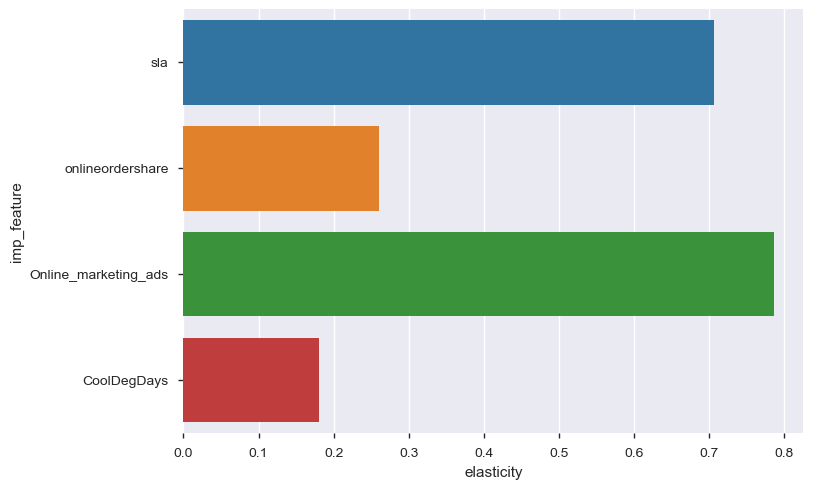

imp_feature  coef  elasticity
0                   sla 0.358       0.706
1      onlineordershare 0.394       0.260
2  Online_marketing_ads 0.476       0.786
3           CoolDegDays 0.197       0.181

In [862]:
elasticity(dlm1,gaming_train_dlm)

Text(0, 0.5, 'y_pred')

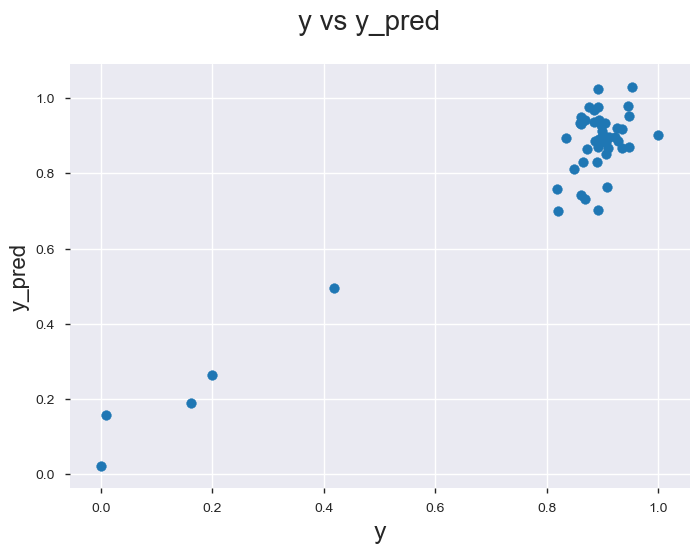

In [863]:
# Plotting y and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y, y_pred)
fig.suptitle('y vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

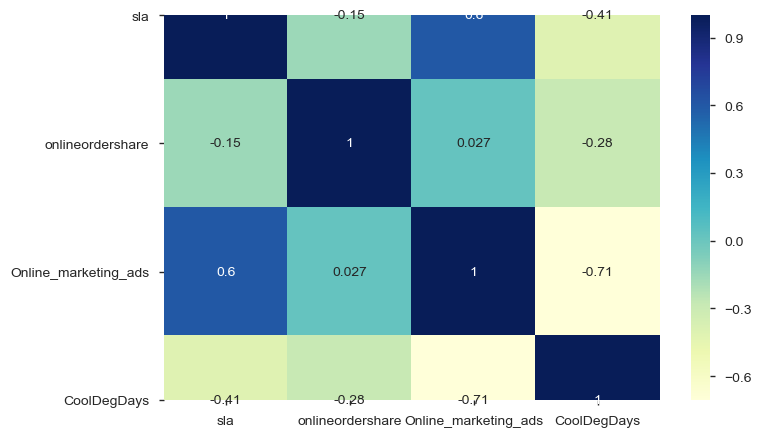

In [864]:
# Figure size
plt.figure(figsize=(8,5))

# Heatmap
sns.heatmap(gaming_train_dlm[features].corr(), cmap="YlGnBu", annot=True)
plt.show()

In [865]:
#Distributed Lag Model (Additive) _ HOme Audio

In [866]:
weeklyhome.columns

Index(['week', 'gmv', 'product_mrp', 'discount', 'sla',
       'product_procurement_sla', 'fsn_id', 'payment_order_type', 'gmvpo',
       'onlineordershare', 'Date', 'Year', 'Month', 'TV_ads',
       'Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'HeatDegDays',
       'CoolDegDays', 'TotalRainMm', 'TotalSnowCm', 'SnowOnGrndCm',
       'lag_1_discount_offer', 'lag_2_discount_offer', 'lag_3_discount_offer',
       'lag_1_NPS', 'lag_2_NPS', 'lag1disc', 'lag2disc', 'lag3disc', 'lag1NPS',
       'lag2NPS', 'lag3NPS', 'lag1StockIndex', 'lag2StockIndex',
       'lag3StockIndex', 'lag1Ssales', 'lag2Ssales', 'lag3Ssales', 'lag1Pd',
       'lag2Pd', 'lag3Pd'],
      dtype='object')

In [867]:
home_dlagm = weeklyhome[['gmv', 'discount', 'sla','product_procurement_sla', 'payment_order_type',
       'onlineordershare', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'HeatDegDays',
       'CoolDegDays', 'TotalRainMm', 'TotalSnowCm', 'SnowOnGrndCm','lag1disc', 'lag2disc', 'lag3disc','lag1NPS',
       'lag2NPS', 'lag3NPS','lag1StockIndex', 'lag2StockIndex',
       'lag3StockIndex','lag1Ssales', 'lag2Ssales', 'lag3Ssales',
       'lag1Pd',
       'lag2Pd', 'lag3Pd']]           


home_dlagm.head()

gmv  discount   sla  product_procurement_sla  payment_order_type  \
0  106915.000     0.374 2.775                    3.225                  39   
1 4508352.133     0.317 7.399                    2.719                 540   
2 5323115.000     0.329 7.052                    2.634                 620   
3 4633371.000     0.320 7.144                    2.723                 509   
4 3411815.000     0.319 7.273                    2.676                 379   

   onlineordershare  TV_ads  Sponsorship_ads  Content_marketing_ads  \
0            97.500   0.054            1.854                  0.000   
1            25.012   0.081            2.780                  0.000   
2            24.574   0.081            2.780                  0.000   
3            22.063   0.081            2.780                  0.000   
4            23.237   0.028            1.139                  0.000   

   Online_marketing_ads    NPS  Stock_Index  Special_sales  Payday  \
0                 0.332 54.600     1177.000          0.000   0.200   
1                 0.498 54.600     1177.000          0.000   0.000   
2                 0.498 54.600     1177.000          0.286   0.143   
3                 0.498 54.600     1177.000          0.000   0.000   
4                 0.192 56.139     1185.286          0.000   0.143   

   HeatDegDays  CoolDegDays  TotalRainMm  TotalSnowCm  SnowOnGrndCm  lag1disc  \
0        0.100        1.460        0.000        0.000         0.000     0.317   
1        1.059        2.322        4.155        0.029         0.041     0.329   
2        0.816        4.722        1.569        0.029         0.041     0.320   
3        1.632        4.172        1.141        0.029         0.041     0.319   
4        0.816        5.908        4.341        0.029         0.041     0.355   

   lag2disc  lag3disc  lag1NPS  lag2NPS  lag3NPS  lag1StockIndex  \
0     0.329     0.320   54.600   54.600   54.600        1177.000   
1     0.320     0.319   54.600   54.600   56.139        1177.000   
2     0.319     0.355   54.600   56.139   48.791        1177.000   
3     0.355     0.356   56.139   48.791   46.925        1185.286   
4     0.356     0.351   48.791   46.925   46.925        1116.000   

   lag2StockIndex  lag3StockIndex  lag1Ssales  lag2Ssales  lag3Ssales  lag1Pd  \
0        1177.000        1177.000       0.000       0.286       0.000   0.000   
1        1177.000        1185.286       0.286       0.000       0.000   0.143   
2        1185.286        1116.000       0.000       0.000       0.000   0.000   
3        1116.000        1101.000       0.000       0.000       0.286   0.143   
4        1101.000        1101.000       0.000       0.286       0.429   0.143   

   lag2Pd  lag3Pd  
0   0.143   0.000  
1   0.000   0.143  
2   0.143   0.143  
3   0.143   0.000  
4   0.000   0.143

In [868]:
home_dlagm['lag1gmv'] = home_dlagm['gmv'].shift(-1)
home_dlagm['lag2gmv'] = home_dlagm['gmv'].shift(-2)
home_dlagm['lag3gmv'] = home_dlagm['gmv'].shift(-3)

In [869]:
### Checking NaN

home_dlagm.isnull().sum()

gmv                        0
discount                   0
sla                        0
product_procurement_sla    0
payment_order_type         0
onlineordershare           0
TV_ads                     1
Sponsorship_ads            1
Content_marketing_ads      1
Online_marketing_ads       1
NPS                        0
Stock_Index                0
Special_sales              0
Payday                     0
HeatDegDays                0
CoolDegDays                0
TotalRainMm                0
TotalSnowCm                0
SnowOnGrndCm               0
lag1disc                   0
lag2disc                   0
lag3disc                   0
lag1NPS                    0
lag2NPS                    0
lag3NPS                    0
lag1StockIndex             0
lag2StockIndex             0
lag3StockIndex             0
lag1Ssales                 0
lag2Ssales                 0
lag3Ssales                 0
lag1Pd                     0
lag2Pd                     0
lag3Pd                     0
lag1gmv       

In [871]:
home_dlagm = home_dlagm.fillna(0)

In [873]:
###  Import the StandardScaler()
# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

###  Create a scaling object
# scaler = StandardScaler()
scaler = MinMaxScaler()


###  Create a list of the variables that you need to scale
varlist = ['gmv', 'discount', 'sla','product_procurement_sla', 'payment_order_type',
       'onlineordershare', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'HeatDegDays',
       'CoolDegDays', 'TotalRainMm', 'TotalSnowCm', 'SnowOnGrndCm','lag1disc', 'lag2disc', 'lag3disc','lag1NPS',
       'lag2NPS', 'lag3NPS','lag1StockIndex', 'lag2StockIndex',
       'lag3StockIndex','lag1Ssales', 'lag2Ssales', 'lag3Ssales',
       'lag1Pd',
       'lag2Pd', 'lag3Pd']


###  Scale these variables using 'fit_transform'
home_dlagm[varlist] = scaler.fit_transform(home_dlagm[varlist])

In [874]:
###  Split the train dataset into X and y
from sklearn.model_selection import train_test_split
x = home_dlagm.drop('gmv',axis=1)
y = home_dlagm['gmv']

home_train_dlm = home_dlagm

In [875]:
print("X = Independent variable & Y = Target variable")
print(x.shape,y.shape)

X = Independent variable & Y = Target variable
(49, 36) (49,)


In [876]:
###  Represent
dlm = LinearRegression()

###  Fit a line
dlm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [877]:
###  Coefficient values

coef = pd.DataFrame(x.columns)
coef['Coefficient'] = pd.Series(dlm.coef_)
coef

0  Coefficient
0                  discount        0.222
1                       sla       -0.228
2   product_procurement_sla       -0.121
3        payment_order_type        0.605
4          onlineordershare       -0.433
5                    TV_ads        0.079
6           Sponsorship_ads        0.029
7     Content_marketing_ads        0.191
8      Online_marketing_ads       -0.274
9                       NPS        0.003
10              Stock_Index        0.088
11            Special_sales        0.052
12                   Payday        0.002
13              HeatDegDays       -0.064
14              CoolDegDays       -0.070
15              TotalRainMm       -0.050
16              TotalSnowCm        0.049
17             SnowOnGrndCm       -0.018
18                 lag1disc        0.298
19                 lag2disc       -0.135
20                 lag3disc        0.229
21                  lag1NPS        0.714
22                  lag2NPS       -0.365
23                  lag3NPS        0.008
24           lag1StockIndex       -0.700
25           lag2StockIndex        0.482
26           lag3StockIndex       -0.175
27               lag1Ssales        0.059
28               lag2Ssales        0.002
29               lag3Ssales       -0.018
30                   lag1Pd        0.002
31                   lag2Pd        0.004
32                   lag3Pd        0.016
33                  lag1gmv       -0.000
34                  lag2gmv        0.000
35                  lag3gmv       -0.000

In [878]:
col = x.columns
col

Index(['discount', 'sla', 'product_procurement_sla', 'payment_order_type',
       'onlineordershare', 'TV_ads', 'Sponsorship_ads',
       'Content_marketing_ads', 'Online_marketing_ads', 'NPS', 'Stock_Index',
       'Special_sales', 'Payday', 'HeatDegDays', 'CoolDegDays', 'TotalRainMm',
       'TotalSnowCm', 'SnowOnGrndCm', 'lag1disc', 'lag2disc', 'lag3disc',
       'lag1NPS', 'lag2NPS', 'lag3NPS', 'lag1StockIndex', 'lag2StockIndex',
       'lag3StockIndex', 'lag1Ssales', 'lag2Ssales', 'lag3Ssales', 'lag1Pd',
       'lag2Pd', 'lag3Pd', 'lag1gmv', 'lag2gmv', 'lag3gmv'],
      dtype='object')

In [879]:
#### Model Building - Stepwise selection for feature selection

In [880]:
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [881]:
def stepwise_selection(x, y,
                       initial_list=['discount', 'sla','product_procurement_sla', 'payment_order_type',
       'onlineordershare', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'HeatDegDays', 'CoolDegDays', 'TotalRainMm',
       'TotalSnowCm', 'SnowOnGrndCm', 'lag1disc', 'lag2disc', 'lag3disc',
       'lag1NPS', 'lag2NPS', 'lag3NPS', 'lag1StockIndex', 'lag2StockIndex',
       'lag3StockIndex', 'lag1Ssales', 'lag2Ssales', 'lag3Ssales', 'lag1Pd',
       'lag2Pd', 'lag3Pd'],
                     threshold_in=0.01,threshold_out = 0.05, verbose=True):
    
    included = list(initial_list)
    while True:
        changed=False
        ###  forward step
        excluded = list(set(x.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
                
                
        ###  backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included]))).fit()
        ###  use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() ###  null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included


In [882]:
import statsmodels.api as sm  

final_features = stepwise_selection(x, y)

print("\n","final_selected_features:",final_features)

Drop lag1Pd                         with p-value 0.985686
Drop lag2Ssales                     with p-value 0.932467
Drop lag3Ssales                     with p-value 0.908112
Drop lag2disc                       with p-value 0.923295
Drop lag2Pd                         with p-value 0.921584
Drop lag1disc                       with p-value 0.899205
Drop Sponsorship_ads                with p-value 0.844819
Drop lag3NPS                        with p-value 0.70166
Drop HeatDegDays                    with p-value 0.60083
Drop CoolDegDays                    with p-value 0.734524
Drop lag3Pd                         with p-value 0.511837
Drop Payday                         with p-value 0.715188
Drop SnowOnGrndCm                   with p-value 0.596386
Drop TotalSnowCm                    with p-value 0.633436
Drop NPS                            with p-value 0.331054
Drop product_procurement_sla        with p-value 0.18384
Drop TotalRainMm                    with p-value 0.232894
Drop lag1Ssales  

In [883]:
###  Import statsmodels
import statsmodels.api as sm  

###  Subsetting training data for 15 selected columns
x_rfe1 = x[final_features]

x_rfe1 = sm.add_constant(x_rfe1)

###  Fitting the model with selected variables
dlm1 = sm.OLS(y, x_rfe1).fit() 

print(dlm1.params)

const                    0.067
discount                 0.278
payment_order_type       0.528
onlineordershare        -0.326
Content_marketing_ads    0.138
Online_marketing_ads    -0.136
Special_sales            0.069
lag1NPS                  0.109
dtype: float64


In [884]:
print(dlm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     77.31
Date:                Sun, 01 Mar 2020   Prob (F-statistic):           1.41e-21
Time:                        00:54:16   Log-Likelihood:                 89.939
No. Observations:                  49   AIC:                            -163.9
Df Residuals:                      41   BIC:                            -148.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.06

In [885]:
###  Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                  const 46.550
5   Online_marketing_ads  2.200
4  Content_marketing_ads  1.770
3       onlineordershare  1.640
2     payment_order_type  1.630
1               discount  1.580
6          Special_sales  1.210
7                lag1NPS  1.100

In [886]:
x_rfe1.drop('lag1NPS', axis = 1, inplace = True)

In [887]:
# Refitting with final selected variables
x_rfe1 = sm.add_constant(x_rfe1)

# Fitting the model with final selected variables
dlm1 = sm.OLS(y, x_rfe1).fit()   
print(dlm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     81.22
Date:                Sun, 01 Mar 2020   Prob (F-statistic):           1.68e-21
Time:                        00:55:14   Log-Likelihood:                 87.016
No. Observations:                  49   AIC:                            -160.0
Df Residuals:                      42   BIC:                            -146.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.15

In [888]:
###  Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                  const 8.400
5   Online_marketing_ads 2.160
4  Content_marketing_ads 1.720
2     payment_order_type 1.630
3       onlineordershare 1.600
1               discount 1.580
6          Special_sales 1.210

In [890]:
x_rfe1.drop('Special_sales', axis = 1, inplace = True)

In [891]:
# Refitting with final selected variables
x_rfe1 = sm.add_constant(x_rfe1)

# Fitting the model with final selected variables
dlm1 = sm.OLS(y, x_rfe1).fit()   
print(dlm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     87.89
Date:                Sun, 01 Mar 2020   Prob (F-statistic):           1.90e-21
Time:                        00:57:06   Log-Likelihood:                 84.167
No. Observations:                  49   AIC:                            -156.3
Df Residuals:                      43   BIC:                            -145.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.15

In [892]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                  const 8.390
5   Online_marketing_ads 2.150
4  Content_marketing_ads 1.710
2     payment_order_type 1.550
3       onlineordershare 1.530
1               discount 1.480

In [893]:
features = list(x_rfe1.columns)
features.remove('const')
features

['discount',
 'payment_order_type',
 'onlineordershare',
 'Content_marketing_ads',
 'Online_marketing_ads']

In [894]:
###  Model Evaluation on testing data
x_2 = x[features]

###  Predicition with selected features on the test data
y_pred = dlm1.predict(sm.add_constant(x_2))

In [895]:
###  Mean square error (MSE)
mse = np.mean((y_pred - y)**2)
mse

0.0018860847559927362

In [896]:
###  Coefficient values

coef = pd.DataFrame(x_rfe1.columns)
coef['Coefficient'] = pd.Series(dlm.coef_)
coef

0  Coefficient
0                  const        0.222
1               discount       -0.228
2     payment_order_type       -0.121
3       onlineordershare        0.605
4  Content_marketing_ads       -0.433
5   Online_marketing_ads        0.079

In [897]:
###  Using K-Fold Cross validation evaluating on whole dataset

# lm = LinearRegression()
fold = KFold(10,shuffle = True, random_state = 100)

cv_scores = -cross_val_score(dlm,x[features],y,cv=fold,scoring='neg_mean_squared_error')

print("Neg. of MSE:",cv_scores,"\n")
print("Mean of 5 KFold CV - MSE:",cv_scores.mean())

Neg. of MSE: [0.00025123 0.00357528 0.01838527 0.00232392 0.00127361 0.00088544
 0.00084141 0.0038508  0.00277668 0.00636304] 

Mean of 5 KFold CV - MSE: 0.0040526666542544465


In [898]:
def elasticity(model,x):
    
    features_df = pd.DataFrame(model.params)
    features_df = features_df.rename(columns={0:'coef'})
    
    features_df['imp_feature'] = model.params.index
    features_df = features_df[features_df.imp_feature != 'const'][['imp_feature','coef']]
    features_df.index = range(len(features_df))
#      features

    elasticity_list = list()
    
    for i in range(len(features_df)):
        elasticity_list.append(((features_df.coef[i] * np.mean(x[features_df.imp_feature[i]])) / np.mean(x['gmv'])))

    features_df['elasticity'] = np.round(elasticity_list,3)
    
    sns.barplot(x='elasticity',y='imp_feature',data=features_df)
    plt.show()
    
    return features_df

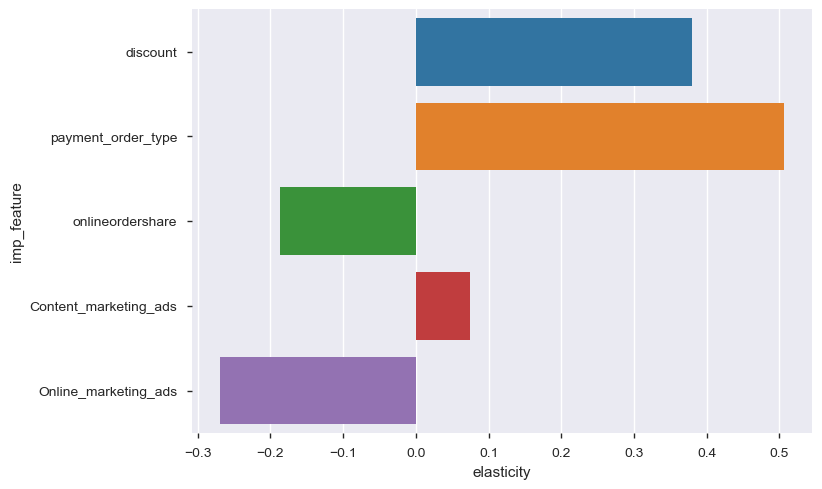

imp_feature   coef  elasticity
0               discount  0.298       0.380
1     payment_order_type  0.551       0.506
2       onlineordershare -0.331      -0.187
3  Content_marketing_ads  0.119       0.074
4   Online_marketing_ads -0.127      -0.269

In [899]:
elasticity(dlm1,home_train_dlm)

Text(0, 0.5, 'y_pred')

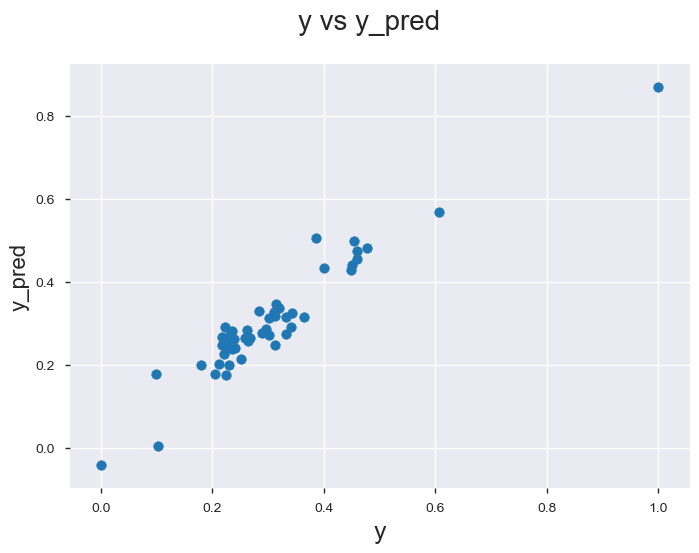

In [900]:
# Plotting y and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y, y_pred)
fig.suptitle('y vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 

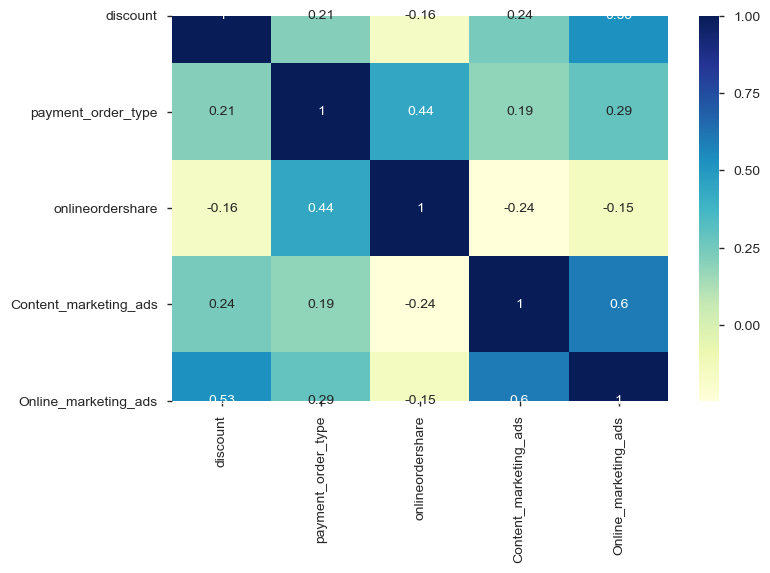

In [901]:
# Figure size
plt.figure(figsize=(8,5))

# Heatmap
sns.heatmap(home_train_dlm[features].corr(), cmap="YlGnBu", annot=True)
plt.show()

In [902]:
### Distributed(Multiplicative) Lag Model

In [903]:
weeklyhome.columns

Index(['week', 'gmv', 'product_mrp', 'discount', 'sla',
       'product_procurement_sla', 'fsn_id', 'payment_order_type', 'gmvpo',
       'onlineordershare', 'Date', 'Year', 'Month', 'TV_ads',
       'Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'HeatDegDays',
       'CoolDegDays', 'TotalRainMm', 'TotalSnowCm', 'SnowOnGrndCm',
       'lag_1_discount_offer', 'lag_2_discount_offer', 'lag_3_discount_offer',
       'lag_1_NPS', 'lag_2_NPS', 'lag1disc', 'lag2disc', 'lag3disc', 'lag1NPS',
       'lag2NPS', 'lag3NPS', 'lag1StockIndex', 'lag2StockIndex',
       'lag3StockIndex', 'lag1Ssales', 'lag2Ssales', 'lag3Ssales', 'lag1Pd',
       'lag2Pd', 'lag3Pd'],
      dtype='object')

In [904]:
homedlmm = weeklyhome[['gmv', 'discount', 'sla','product_procurement_sla', 'payment_order_type',
       'onlineordershare', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'HeatDegDays',
       'CoolDegDays', 'TotalRainMm', 'TotalSnowCm', 'SnowOnGrndCm',
       'lag_1_discount_offer', 'lag_2_discount_offer', 'lag_3_discount_offer',
       'lag_1_NPS', 'lag_2_NPS', 'lag1disc', 'lag2disc', 'lag3disc', 'lag1NPS',
       'lag2NPS', 'lag3NPS', 'lag1StockIndex', 'lag2StockIndex',
       'lag3StockIndex', 'lag1Ssales', 'lag2Ssales', 'lag3Ssales', 'lag1Pd',
       'lag2Pd', 'lag3Pd']]           


homedlmm.head()

gmv  discount   sla  product_procurement_sla  payment_order_type  \
0  106915.000     0.374 2.775                    3.225                  39   
1 4508352.133     0.317 7.399                    2.719                 540   
2 5323115.000     0.329 7.052                    2.634                 620   
3 4633371.000     0.320 7.144                    2.723                 509   
4 3411815.000     0.319 7.273                    2.676                 379   

   onlineordershare  TV_ads  Sponsorship_ads  Content_marketing_ads  \
0            97.500   0.054            1.854                  0.000   
1            25.012   0.081            2.780                  0.000   
2            24.574   0.081            2.780                  0.000   
3            22.063   0.081            2.780                  0.000   
4            23.237   0.028            1.139                  0.000   

   Online_marketing_ads    NPS  Stock_Index  Special_sales  Payday  \
0                 0.332 54.600     1177.000          0.000   0.200   
1                 0.498 54.600     1177.000          0.000   0.000   
2                 0.498 54.600     1177.000          0.286   0.143   
3                 0.498 54.600     1177.000          0.000   0.000   
4                 0.192 56.139     1185.286          0.000   0.143   

   HeatDegDays  CoolDegDays  TotalRainMm  TotalSnowCm  SnowOnGrndCm  \
0        0.100        1.460        0.000        0.000         0.000   
1        1.059        2.322        4.155        0.029         0.041   
2        0.816        4.722        1.569        0.029         0.041   
3        1.632        4.172        1.141        0.029         0.041   
4        0.816        5.908        4.341        0.029         0.041   

   lag_1_discount_offer  lag_2_discount_offer  lag_3_discount_offer  \
0                 0.317                 0.329                 0.320   
1                 0.329                 0.320                 0.319   
2                 0.320                 0.319                 0.355   
3                 0.319                 0.355                 0.356   
4                 0.355                 0.356                 0.351   

   lag_1_NPS  lag_2_NPS  lag1disc  lag2disc  lag3disc  lag1NPS  lag2NPS  \
0     54.600     54.600     0.317     0.329     0.320   54.600   54.600   
1     54.600     54.600     0.329     0.320     0.319   54.600   54.600   
2     54.600     56.139     0.320     0.319     0.355   54.600   56.139   
3     56.139     48.791     0.319     0.355     0.356   56.139   48.791   
4     48.791     46.925     0.355     0.356     0.351   48.791   46.925   

   lag3NPS  lag1StockIndex  lag2StockIndex  lag3StockIndex  lag1Ssales  \
0   54.600        1177.000        1177.000        1177.000       0.000   
1   56.139        1177.000        1177.000        1185.286       0.286   
2   48.791        1177.000        1185.286        1116.000       0.000   
3   46.925        1185.286        1116.000        1101.000       0.000   
4   46.925        1116.000        1101.000        1101.000       0.000   

   lag2Ssales  lag3Ssales  lag1Pd  lag2Pd  lag3Pd  
0       0.286       0.000   0.000   0.143   0.000  
1       0.000       0.000   0.143   0.000   0.143  
2       0.000       0.000   0.000   0.143   0.143  
3       0.000       0.286   0.143   0.143   0.000  
4       0.286       0.429   0.143   0.000   0.143

In [905]:
homedlmm['lag1gmv'] = homedlmm['gmv'].shift(-1)
homedlmm['lag2gmv'] = homedlmm['gmv'].shift(-2)
homedlmm['lag3gmv'] = homedlmm['gmv'].shift(-3)

In [906]:
### Checking NaN

homedlmm.isnull().sum()

gmv                        0
discount                   0
sla                        0
product_procurement_sla    0
payment_order_type         0
onlineordershare           0
TV_ads                     1
Sponsorship_ads            1
Content_marketing_ads      1
Online_marketing_ads       1
NPS                        0
Stock_Index                0
Special_sales              0
Payday                     0
HeatDegDays                0
CoolDegDays                0
TotalRainMm                0
TotalSnowCm                0
SnowOnGrndCm               0
lag_1_discount_offer       0
lag_2_discount_offer       0
lag_3_discount_offer       0
lag_1_NPS                  0
lag_2_NPS                  0
lag1disc                   0
lag2disc                   0
lag3disc                   0
lag1NPS                    0
lag2NPS                    0
lag3NPS                    0
lag1StockIndex             0
lag2StockIndex             0
lag3StockIndex             0
lag1Ssales                 0
lag2Ssales    

In [908]:
homedlmm = homedlmm.fillna(0)

In [909]:
### Applying Log 
homedlmm=np.log(homedlmm)

homedlmm = homedlmm.fillna(0)
homedlmm = homedlmm.replace([np.inf, -np.inf], 0)

In [911]:
###  Import the StandardScaler()
# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

###  Create a scaling object
# scaler = StandardScaler()
scaler = MinMaxScaler()


###  Create a list of the variables that you need to scale
varlist = ['gmv', 'discount', 'sla','product_procurement_sla', 'payment_order_type',
       'onlineordershare', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'HeatDegDays',
       'CoolDegDays', 'TotalRainMm', 'TotalSnowCm', 'SnowOnGrndCm', 'lag1disc', 'lag2disc', 'lag3disc', 'lag1NPS',
       'lag2NPS', 'lag3NPS', 'lag1StockIndex', 'lag2StockIndex',
       'lag3StockIndex', 'lag1Ssales', 'lag2Ssales', 'lag3Ssales', 'lag1Pd',
       'lag2Pd', 'lag3Pd']


###  Scale these variables using 'fit_transform'
homedlmm[varlist] = scaler.fit_transform(homedlmm[varlist])

In [912]:
###  Split the train dataset into X and y
from sklearn.model_selection import train_test_split
x = homedlmm.drop('gmv',axis=1)
y = homedlmm['gmv']

home_train_dlmm = homedlmm

In [913]:
print("X = Independent variable & Y = Target variable")
print(x.shape,y.shape)

X = Independent variable & Y = Target variable
(49, 41) (49,)


In [914]:
###  Represent
dlmm = LinearRegression()

###  Fit a line
dlmm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [915]:
###  Coefficient values

coef = pd.DataFrame(x.columns)
coef['Coefficient'] = pd.Series(dlmm.coef_)
coef

0  Coefficient
0                  discount        0.001
1                       sla       -0.085
2   product_procurement_sla        0.019
3        payment_order_type        0.838
4          onlineordershare       -0.392
5                    TV_ads       -0.026
6           Sponsorship_ads        0.030
7     Content_marketing_ads       -0.058
8      Online_marketing_ads        0.024
9                       NPS       -0.016
10              Stock_Index        0.002
11            Special_sales        0.017
12                   Payday        0.019
13              HeatDegDays       -0.006
14              CoolDegDays        0.026
15              TotalRainMm        0.004
16              TotalSnowCm        0.005
17             SnowOnGrndCm       -0.004
18     lag_1_discount_offer        0.030
19     lag_2_discount_offer        0.009
20     lag_3_discount_offer        0.025
21                lag_1_NPS        0.023
22                lag_2_NPS        0.230
23                 lag1disc        0.025
24                 lag2disc        0.007
25                 lag3disc        0.020
26                  lag1NPS        0.006
27                  lag2NPS        0.057
28                  lag3NPS       -0.949
29           lag1StockIndex       -0.191
30           lag2StockIndex       -1.075
31           lag3StockIndex        1.164
32               lag1Ssales       -0.009
33               lag2Ssales       -0.025
34               lag3Ssales       -0.022
35                   lag1Pd        0.036
36                   lag2Pd        0.028
37                   lag3Pd        0.002
38                  lag1gmv        0.007
39                  lag2gmv        0.010
40                  lag3gmv       -0.012

In [916]:
col = x.columns
col

Index(['discount', 'sla', 'product_procurement_sla', 'payment_order_type',
       'onlineordershare', 'TV_ads', 'Sponsorship_ads',
       'Content_marketing_ads', 'Online_marketing_ads', 'NPS', 'Stock_Index',
       'Special_sales', 'Payday', 'HeatDegDays', 'CoolDegDays', 'TotalRainMm',
       'TotalSnowCm', 'SnowOnGrndCm', 'lag_1_discount_offer',
       'lag_2_discount_offer', 'lag_3_discount_offer', 'lag_1_NPS',
       'lag_2_NPS', 'lag1disc', 'lag2disc', 'lag3disc', 'lag1NPS', 'lag2NPS',
       'lag3NPS', 'lag1StockIndex', 'lag2StockIndex', 'lag3StockIndex',
       'lag1Ssales', 'lag2Ssales', 'lag3Ssales', 'lag1Pd', 'lag2Pd', 'lag3Pd',
       'lag1gmv', 'lag2gmv', 'lag3gmv'],
      dtype='object')

In [917]:
#### Model Building - Stepwise selection for feature selection

In [918]:
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [919]:
def stepwise_selection(x, y,
                       initial_list=['discount', 'sla','product_procurement_sla', 'payment_order_type',
       'onlineordershare', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'HeatDegDays', 'CoolDegDays', 'TotalRainMm',
       'TotalSnowCm', 'SnowOnGrndCm', 'lag1disc', 'lag2disc', 'lag3disc', 'lag1NPS', 'lag2NPS',
       'lag3NPS', 'lag1StockIndex', 'lag2StockIndex', 'lag3StockIndex',
       'lag1Ssales', 'lag2Ssales', 'lag3Ssales', 'lag1Pd', 'lag2Pd', 'lag3Pd'],
                     threshold_in=0.01,threshold_out = 0.05, verbose=True):
    
    included = list(initial_list)
    while True:
        changed=False
        ###  forward step
        excluded = list(set(x.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
                
                
        ###  backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included]))).fit()
        ###  use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() ###  null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [920]:
import statsmodels.api as sm  

final_features = stepwise_selection(x, y)

print("\n","final_selected_features:",final_features)

Drop TotalSnowCm                    with p-value 0.959909
Drop Online_marketing_ads           with p-value 0.949117
Drop lag3disc                       with p-value 0.917548
Drop TV_ads                         with p-value 0.88343
Drop discount                       with p-value 0.714063
Drop lag1StockIndex                 with p-value 0.5899
Add  lag_2_NPS                      with p-value 0.00183022
Drop Stock_Index                    with p-value 0.726848
Drop NPS                            with p-value 0.621825
Drop product_procurement_sla        with p-value 0.573619
Add  lag_2_discount_offer           with p-value 0.00318271
Drop TotalRainMm                    with p-value 0.506524
Drop lag3Pd                         with p-value 0.400003
Drop SnowOnGrndCm                   with p-value 0.435329
Drop lag3Ssales                     with p-value 0.125104
Add  lag_1_discount_offer           with p-value 0.00848666
Drop Special_sales                  with p-value 0.315746
Drop HeatDe

In [921]:
###  Import statsmodels
import statsmodels.api as sm  

###  Subsetting training data for 15 selected columns
x_rfe1 = x[final_features]

x_rfe1 = sm.add_constant(x_rfe1)

###  Fitting the model with selected variables
dlmm1 = sm.OLS(y, x_rfe1).fit() 

print(dlmm1.params)

const                    0.149
sla                     -0.086
payment_order_type       0.817
onlineordershare        -0.399
Sponsorship_ads          0.021
Content_marketing_ads   -0.044
Payday                   0.011
CoolDegDays              0.025
lag1disc                 0.116
lag2disc                 0.106
lag1NPS                  0.041
lag2NPS                  0.037
lag3NPS                 -0.657
lag2StockIndex          -0.567
lag3StockIndex           0.662
lag1Ssales              -0.010
lag2Ssales              -0.016
lag1Pd                   0.023
lag2Pd                   0.018
lag_2_NPS                0.148
lag_2_discount_offer    -0.052
lag_1_discount_offer    -0.040
dtype: float64


In [922]:
print(dlmm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     948.1
Date:                Sun, 01 Mar 2020   Prob (F-statistic):           2.23e-36
Time:                        01:15:01   Log-Likelihood:                 185.77
No. Observations:                  49   AIC:                            -333.5
Df Residuals:                      30   BIC:                            -297.6
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.14

In [923]:
###  Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features      VIF
11                lag2NPS      inf
8                lag1disc      inf
20   lag_2_discount_offer      inf
19              lag_2_NPS      inf
9                lag2disc      inf
21   lag_1_discount_offer      inf
14         lag3StockIndex 2135.720
12                lag3NPS 2091.090
13         lag2StockIndex 1118.990
17                 lag1Pd   14.240
5   Content_marketing_ads    9.410
6                  Payday    6.690
10                lag1NPS    6.650
18                 lag2Pd    6.040
1                     sla    4.150
4         Sponsorship_ads    3.930
3        onlineordershare    3.540
2      payment_order_type    3.430
7             CoolDegDays    2.090
16             lag2Ssales    1.870
15             lag1Ssales    1.480
0                   const    0.000

In [924]:
x_rfe1.drop('lag2NPS', axis = 1, inplace = True)

In [925]:
# Refitting with final selected variables
x_rfe1 = sm.add_constant(x_rfe1)

# Fitting the model with final selected variables
dlmm1 = sm.OLS(y, x_rfe1).fit()   
print(dlmm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     948.1
Date:                Sun, 01 Mar 2020   Prob (F-statistic):           2.23e-36
Time:                        01:19:02   Log-Likelihood:                 185.77
No. Observations:                  49   AIC:                            -333.5
Df Residuals:                      30   BIC:                            -297.6
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.14

In [926]:
###  Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features      VIF
20   lag_1_discount_offer      inf
19   lag_2_discount_offer      inf
8                lag1disc      inf
9                lag2disc      inf
13         lag3StockIndex 2135.720
11                lag3NPS 2091.090
18              lag_2_NPS 1123.120
12         lag2StockIndex 1118.990
16                 lag1Pd   14.240
5   Content_marketing_ads    9.410
6                  Payday    6.690
10                lag1NPS    6.650
17                 lag2Pd    6.040
1                     sla    4.150
4         Sponsorship_ads    3.930
3        onlineordershare    3.540
2      payment_order_type    3.430
7             CoolDegDays    2.090
15             lag2Ssales    1.870
14             lag1Ssales    1.480
0                   const    0.000

In [927]:
x_rfe1.drop('lag_1_discount_offer', axis = 1, inplace = True)

In [928]:
# Refitting with final selected variables
x_rfe1 = sm.add_constant(x_rfe1)

# Fitting the model with final selected variables
dlmm1 = sm.OLS(y, x_rfe1).fit()   
print(dlmm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     948.1
Date:                Sun, 01 Mar 2020   Prob (F-statistic):           2.23e-36
Time:                        01:20:33   Log-Likelihood:                 185.77
No. Observations:                  49   AIC:                            -333.5
Df Residuals:                      30   BIC:                            -297.6
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.17

In [929]:
###  Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features      VIF
19   lag_2_discount_offer      inf
9                lag2disc      inf
13         lag3StockIndex 2135.720
11                lag3NPS 2091.090
18              lag_2_NPS 1123.120
12         lag2StockIndex 1118.990
16                 lag1Pd   14.240
5   Content_marketing_ads    9.410
8                lag1disc    8.180
6                  Payday    6.690
10                lag1NPS    6.650
17                 lag2Pd    6.040
1                     sla    4.150
4         Sponsorship_ads    3.930
3        onlineordershare    3.540
2      payment_order_type    3.430
7             CoolDegDays    2.090
15             lag2Ssales    1.870
14             lag1Ssales    1.480
0                   const    0.000

In [930]:
x_rfe1.drop('lag_2_discount_offer', axis = 1, inplace = True)

In [931]:
# Refitting with final selected variables
x_rfe1 = sm.add_constant(x_rfe1)

# Fitting the model with final selected variables
dlmm1 = sm.OLS(y, x_rfe1).fit()   
print(dlmm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     948.1
Date:                Sun, 01 Mar 2020   Prob (F-statistic):           2.23e-36
Time:                        01:21:27   Log-Likelihood:                 185.77
No. Observations:                  49   AIC:                            -333.5
Df Residuals:                      30   BIC:                            -297.6
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.25

In [932]:
###  Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features      VIF
13         lag3StockIndex 2135.720
11                lag3NPS 2091.090
18              lag_2_NPS 1123.120
12         lag2StockIndex 1118.990
0                   const  881.970
16                 lag1Pd   14.240
5   Content_marketing_ads    9.410
9                lag2disc    8.700
8                lag1disc    8.180
6                  Payday    6.690
10                lag1NPS    6.650
17                 lag2Pd    6.040
1                     sla    4.150
4         Sponsorship_ads    3.930
3        onlineordershare    3.540
2      payment_order_type    3.430
7             CoolDegDays    2.090
15             lag2Ssales    1.870
14             lag1Ssales    1.480

In [933]:
x_rfe1.drop('lag3StockIndex', axis = 1, inplace = True)

In [934]:
# Refitting with final selected variables
x_rfe1 = sm.add_constant(x_rfe1)

# Fitting the model with final selected variables
dlmm1 = sm.OLS(y, x_rfe1).fit()   
print(dlmm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     746.9
Date:                Sun, 01 Mar 2020   Prob (F-statistic):           1.08e-35
Time:                        01:22:36   Log-Likelihood:                 177.74
No. Observations:                  49   AIC:                            -319.5
Df Residuals:                      31   BIC:                            -285.4
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.27

In [935]:
###  Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0                   const 852.280
12         lag2StockIndex 395.330
17              lag_2_NPS 380.720
15                 lag1Pd  11.780
9                lag2disc   8.700
5   Content_marketing_ads   8.470
8                lag1disc   7.280
10                lag1NPS   6.410
6                  Payday   5.900
16                 lag2Pd   5.070
11                lag3NPS   4.230
4         Sponsorship_ads   3.730
1                     sla   3.600
2      payment_order_type   3.180
3        onlineordershare   3.120
7             CoolDegDays   2.090
14             lag2Ssales   1.530
13             lag1Ssales   1.400

In [936]:
x_rfe1.drop('lag2StockIndex', axis = 1, inplace = True)

In [937]:
# Refitting with final selected variables
x_rfe1 = sm.add_constant(x_rfe1)

# Fitting the model with final selected variables
dlmm1 = sm.OLS(y, x_rfe1).fit()   
print(dlmm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     800.4
Date:                Sun, 01 Mar 2020   Prob (F-statistic):           5.36e-37
Time:                        01:23:38   Log-Likelihood:                 177.17
No. Observations:                  49   AIC:                            -320.3
Df Residuals:                      32   BIC:                            -288.2
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.27

In [938]:
###  Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0                   const 851.820
16              lag_2_NPS  14.410
14                 lag1Pd  11.330
9                lag2disc   8.640
8                lag1disc   6.600
10                lag1NPS   6.340
5   Content_marketing_ads   6.270
6                  Payday   5.670
15                 lag2Pd   5.050
11                lag3NPS   4.230
4         Sponsorship_ads   3.640
2      payment_order_type   2.850
3        onlineordershare   2.840
1                     sla   2.760
7             CoolDegDays   2.050
13             lag2Ssales   1.500
12             lag1Ssales   1.170

In [939]:
x_rfe1.drop('lag_2_NPS', axis = 1, inplace = True)

In [940]:
# Refitting with final selected variables
x_rfe1 = sm.add_constant(x_rfe1)

# Fitting the model with final selected variables
dlmm1 = sm.OLS(y, x_rfe1).fit()   
print(dlmm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     763.2
Date:                Sun, 01 Mar 2020   Prob (F-statistic):           1.85e-37
Time:                        01:24:59   Log-Likelihood:                 173.68
No. Observations:                  49   AIC:                            -315.4
Df Residuals:                      33   BIC:                            -285.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.31

In [941]:
###  Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0                   const 609.420
14                 lag1Pd   9.960
8                lag1disc   6.590
10                lag1NPS   5.810
5   Content_marketing_ads   5.650
6                  Payday   5.240
15                 lag2Pd   4.640
11                lag3NPS   4.010
4         Sponsorship_ads   3.090
9                lag2disc   2.870
3        onlineordershare   2.830
2      payment_order_type   2.800
1                     sla   2.680
7             CoolDegDays   1.900
13             lag2Ssales   1.450
12             lag1Ssales   1.170

In [942]:
x_rfe1.drop('lag1Pd', axis = 1, inplace = True)

In [943]:
# Refitting with final selected variables
x_rfe1 = sm.add_constant(x_rfe1)

# Fitting the model with final selected variables
dlmm1 = sm.OLS(y, x_rfe1).fit()   
print(dlmm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     819.5
Date:                Sun, 01 Mar 2020   Prob (F-statistic):           9.89e-39
Time:                        01:25:52   Log-Likelihood:                 173.01
No. Observations:                  49   AIC:                            -316.0
Df Residuals:                      34   BIC:                            -287.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.33

In [944]:
###  Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0                   const 420.620
8                lag1disc   5.690
10                lag1NPS   5.630
5   Content_marketing_ads   4.500
11                lag3NPS   3.050
9                lag2disc   2.760
3        onlineordershare   2.750
1                     sla   2.660
2      payment_order_type   2.580
4         Sponsorship_ads   2.430
6                  Payday   2.210
14                 lag2Pd   1.990
7             CoolDegDays   1.820
13             lag2Ssales   1.370
12             lag1Ssales   1.170

In [945]:
x_rfe1.drop('lag1disc', axis = 1, inplace = True)

In [946]:
# Refitting with final selected variables
x_rfe1 = sm.add_constant(x_rfe1)

# Fitting the model with final selected variables
dlmm1 = sm.OLS(y, x_rfe1).fit()   
print(dlmm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     797.4
Date:                Sun, 01 Mar 2020   Prob (F-statistic):           3.11e-39
Time:                        01:26:48   Log-Likelihood:                 169.82
No. Observations:                  49   AIC:                            -311.6
Df Residuals:                      35   BIC:                            -285.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.36

In [947]:
###  Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0                   const 285.470
5   Content_marketing_ads   3.900
10                lag3NPS   2.940
3        onlineordershare   2.740
8                lag2disc   2.700
1                     sla   2.530
2      payment_order_type   2.510
9                 lag1NPS   2.470
6                  Payday   2.170
4         Sponsorship_ads   2.110
13                 lag2Pd   1.990
7             CoolDegDays   1.790
12             lag2Ssales   1.370
11             lag1Ssales   1.140

In [948]:
x_rfe1.drop('Sponsorship_ads', axis = 1, inplace = True)

In [949]:
# Refitting with final selected variables
x_rfe1 = sm.add_constant(x_rfe1)

# Fitting the model with final selected variables
dlmm1 = sm.OLS(y, x_rfe1).fit()   
print(dlmm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     887.2
Date:                Sun, 01 Mar 2020   Prob (F-statistic):           1.04e-40
Time:                        01:27:47   Log-Likelihood:                 169.78
No. Observations:                  49   AIC:                            -313.6
Df Residuals:                      36   BIC:                            -289.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.36

In [950]:
###  Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0                   const 253.860
9                 lag3NPS   2.740
7                lag2disc   2.620
2      payment_order_type   2.430
4   Content_marketing_ads   2.420
3        onlineordershare   2.310
1                     sla   2.300
5                  Payday   2.160
8                 lag1NPS   2.070
12                 lag2Pd   1.980
6             CoolDegDays   1.780
11             lag2Ssales   1.320
10             lag1Ssales   1.140

In [951]:
x_rfe1.drop('lag1NPS', axis = 1, inplace = True)

In [952]:
# Refitting with final selected variables
x_rfe1 = sm.add_constant(x_rfe1)

# Fitting the model with final selected variables
dlmm1 = sm.OLS(y, x_rfe1).fit()   
print(dlmm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     985.4
Date:                Sun, 01 Mar 2020   Prob (F-statistic):           3.81e-42
Time:                        01:29:17   Log-Likelihood:                 169.55
No. Observations:                  49   AIC:                            -315.1
Df Residuals:                      37   BIC:                            -292.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.36

In [953]:
###  Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0                   const 138.210
8                 lag3NPS   2.650
7                lag2disc   2.280
1                     sla   2.240
2      payment_order_type   2.230
3        onlineordershare   2.200
5                  Payday   2.160
4   Content_marketing_ads   2.150
11                 lag2Pd   1.980
6             CoolDegDays   1.740
10             lag2Ssales   1.320
9              lag1Ssales   1.140

In [954]:
x_rfe1.drop('Payday', axis = 1, inplace = True)

In [955]:
# Refitting with final selected variables
x_rfe1 = sm.add_constant(x_rfe1)

# Fitting the model with final selected variables
dlmm1 = sm.OLS(y, x_rfe1).fit()   
print(dlmm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     1101.
Date:                Sun, 01 Mar 2020   Prob (F-statistic):           1.37e-43
Time:                        01:30:11   Log-Likelihood:                 169.28
No. Observations:                  49   AIC:                            -316.6
Df Residuals:                      38   BIC:                            -295.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.37

In [956]:
###  Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0                   const 136.560
7                 lag3NPS   2.350
2      payment_order_type   2.230
1                     sla   2.210
3        onlineordershare   2.200
4   Content_marketing_ads   2.130
6                lag2disc   2.030
5             CoolDegDays   1.740
9              lag2Ssales   1.180
10                 lag2Pd   1.140
8              lag1Ssales   1.100

In [957]:
x_rfe1.drop('lag2Ssales', axis = 1, inplace = True)

In [958]:
# Refitting with final selected variables
x_rfe1 = sm.add_constant(x_rfe1)

# Fitting the model with final selected variables
dlmm1 = sm.OLS(y, x_rfe1).fit()   
print(dlmm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     1218.
Date:                Sun, 01 Mar 2020   Prob (F-statistic):           6.66e-45
Time:                        01:31:27   Log-Likelihood:                 168.55
No. Observations:                  49   AIC:                            -317.1
Df Residuals:                      39   BIC:                            -298.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.36

In [960]:
x_rfe1.drop('lag2Pd', axis = 1, inplace = True)

In [961]:
# Refitting with final selected variables
x_rfe1 = sm.add_constant(x_rfe1)

# Fitting the model with final selected variables
dlmm1 = sm.OLS(y, x_rfe1).fit()   
print(dlmm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     1366.
Date:                Sun, 01 Mar 2020   Prob (F-statistic):           3.02e-46
Time:                        01:32:30   Log-Likelihood:                 167.85
No. Observations:                  49   AIC:                            -317.7
Df Residuals:                      40   BIC:                            -300.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.37

In [962]:
x_rfe1.drop('lag1Ssales', axis = 1, inplace = True)

In [963]:
# Refitting with final selected variables
x_rfe1 = sm.add_constant(x_rfe1)

# Fitting the model with final selected variables
dlmm1 = sm.OLS(y, x_rfe1).fit()   
print(dlmm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     1544.
Date:                Sun, 01 Mar 2020   Prob (F-statistic):           1.50e-47
Time:                        01:33:04   Log-Likelihood:                 166.98
No. Observations:                  49   AIC:                            -318.0
Df Residuals:                      41   BIC:                            -302.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.36

In [964]:
x_rfe1.drop('lag2disc', axis = 1, inplace = True)

In [965]:
# Refitting with final selected variables
x_rfe1 = sm.add_constant(x_rfe1)

# Fitting the model with final selected variables
dlmm1 = sm.OLS(y, x_rfe1).fit()   
print(dlmm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     1766.
Date:                Sun, 01 Mar 2020   Prob (F-statistic):           8.36e-49
Time:                        01:33:42   Log-Likelihood:                 165.91
No. Observations:                  49   AIC:                            -317.8
Df Residuals:                      42   BIC:                            -304.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.37

In [966]:
x_rfe1.drop('lag3NPS', axis = 1, inplace = True)

In [967]:
# Refitting with final selected variables
x_rfe1 = sm.add_constant(x_rfe1)

# Fitting the model with final selected variables
dlmm1 = sm.OLS(y, x_rfe1).fit()   
print(dlmm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     2021.
Date:                Sun, 01 Mar 2020   Prob (F-statistic):           7.81e-50
Time:                        01:34:32   Log-Likelihood:                 164.17
No. Observations:                  49   AIC:                            -316.3
Df Residuals:                      43   BIC:                            -305.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.38

In [968]:
x_rfe1.drop('Content_marketing_ads', axis = 1, inplace = True)

In [969]:
# Refitting with final selected variables
x_rfe1 = sm.add_constant(x_rfe1)

# Fitting the model with final selected variables
dlmm1 = sm.OLS(y, x_rfe1).fit()   
print(dlmm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     2328.
Date:                Sun, 01 Mar 2020   Prob (F-statistic):           1.42e-50
Time:                        01:35:18   Log-Likelihood:                 161.62
No. Observations:                  49   AIC:                            -313.2
Df Residuals:                      44   BIC:                            -303.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3683      0

In [970]:
features = list(x_rfe1.columns)
features.remove('const')
features

['sla', 'payment_order_type', 'onlineordershare', 'CoolDegDays']

In [971]:
###  Model Evaluation on testing data
x_2 = x[features]

###  Predicition with selected features on the test data
y_pred = dlmm1.predict(sm.add_constant(x_2))

In [972]:
###  Mean square error (MSE)
mse = np.mean((y_pred - y)**2)
mse

7.991669898189462e-05

In [973]:
###  Coefficient values

coef = pd.DataFrame(x_rfe1.columns)
coef['Coefficient'] = pd.Series(dlmm.coef_)
coef

0  Coefficient
0               const        0.001
1                 sla       -0.085
2  payment_order_type        0.019
3    onlineordershare        0.838
4         CoolDegDays       -0.392

In [974]:
###  Using K-Fold Cross validation evaluating on whole dataset

# lm = LinearRegression()
fold = KFold(10,shuffle = True, random_state = 100)

cv_scores = -cross_val_score(dlm,x[features],y,cv=fold,scoring='neg_mean_squared_error')

print("Neg. of MSE:",cv_scores,"\n")
print("Mean of 5 KFold CV - MSE:",cv_scores.mean())

Neg. of MSE: [2.25757736e-04 7.84280285e-05 3.74595191e-04 5.94630666e-05
 9.82820799e-05 9.41942288e-05 4.64031230e-05 4.89191895e-05
 8.55335396e-05 1.95037164e-04] 

Mean of 5 KFold CV - MSE: 0.00013066133461014137


In [975]:
def elasticity(model,x):
    
    features_df = pd.DataFrame(model.params)
    features_df = features_df.rename(columns={0:'coef'})
    
    features_df['imp_feature'] = model.params.index
    features_df = features_df[features_df.imp_feature != 'const'][['imp_feature','coef']]
    features_df.index = range(len(features_df))
#      features

    elasticity_list = list()
    
    for i in range(len(features_df)):
        elasticity_list.append(((features_df.coef[i] * np.mean(x[features_df.imp_feature[i]])) / np.mean(x['gmv'])))

    features_df['elasticity'] = np.round(elasticity_list,3)
    
    sns.barplot(x='elasticity',y='imp_feature',data=features_df)
    plt.show()
    
    return features_df

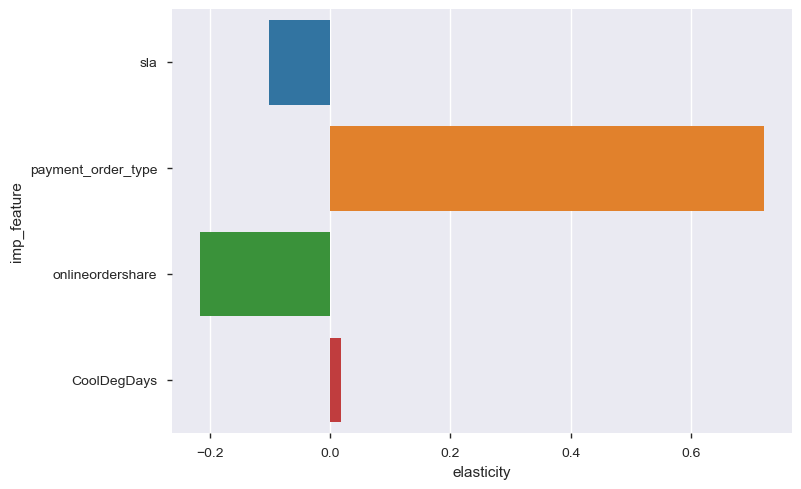

imp_feature   coef  elasticity
0                 sla -0.051      -0.102
1  payment_order_type  0.785       0.720
2    onlineordershare -0.382      -0.216
3         CoolDegDays  0.018       0.018

In [976]:
elasticity(dlmm1,home_train_dlm)

Text(0, 0.5, 'y_pred')

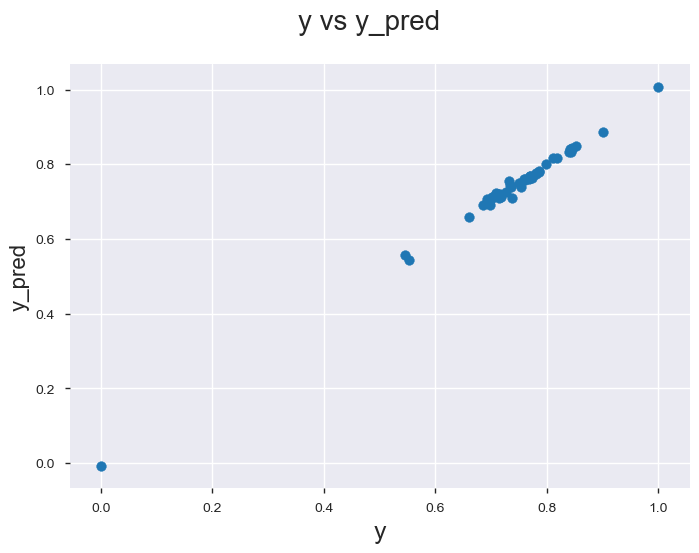

In [977]:
# Plotting y and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y, y_pred)
fig.suptitle('y vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

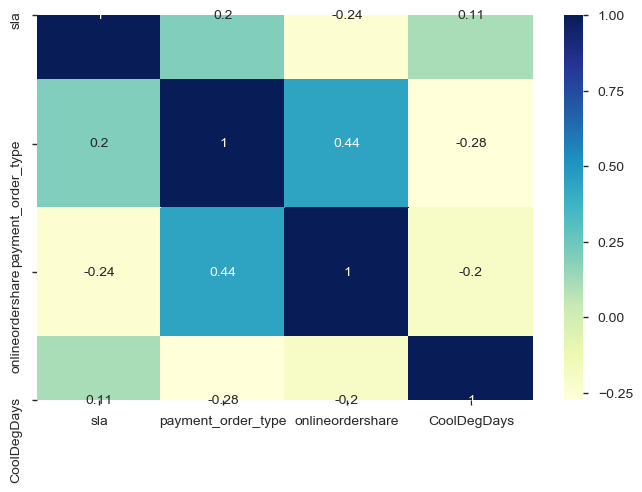

In [978]:
# Figure size
plt.figure(figsize=(8,5))

# Heatmap
sns.heatmap(home_train_dlm[features].corr(), cmap="YlGnBu", annot=True)
plt.show()

# Overall Recommendation

1.Focusing on sales of Premium Products

2.Offer more discounts

3.Completing SLAs on time

4.Focusing on Online Marketing of Camera Accessories

5.Reducing the money spend on other forms of Marketing


# Thank You